Импор необходимых библиоттек.

In [ ]:
from tensorflow import keras
import numpy as np
import tensorflow as tf
from tensorflow import keras
import os
from google.colab.patches import cv2_imshow
import cv2
import json
import urllib.request
import shutil
from PIL import Image

Две функции - создание модели и предсказание по изображению.


In [ ]:
def createModel(modelPath, imageSize=(50, 200)):
  model = keras.models.load_model(modelPath)
  return imageSize, model


def checkPicture(imgPath, imageSize=(50, 200), raw=False):

  img = Image.open(imgPath)
  width, height = img.size

  if height*4 <= width:
    newWidth = height*4
    imgG = img.crop((0, 0, newWidth, height))
  else:
    newHeight = int(width/4)
    bias = (height-newHeight)//2
    imgG = img.crop((0, bias, width, newHeight+bias))
  imgG.save('./judicial.png')

  img = keras.preprocessing.image.load_img('./judicial.png', target_size=imageSize)
  img_array = keras.preprocessing.image.img_to_array(img)
  img_array = tf.expand_dims(img_array, 0)  # Create batch axis

  predictions1 = model1.predict(img_array)
  score1 = predictions1[0]
  # print('score1:', score1)

  predictions2 = model2.predict(img_array)
  score2 = predictions2[0]
  # print('score2:', score2)

  predictions3 = model3.predict(img_array)
  score3 = predictions3[0]
  # print('score3:', score3)

  predictions4 = model4.predict(img_array)
  score4 = predictions4[0]
  # print('score4:', score4)

  predictions5 = model5.predict(img_array)
  score5 = predictions5[0]
  # print('score5:', score5)
  
  predictions6 = model6.predict(img_array)
  score6 = predictions6[0]
  # print('score6:', score6)

  predictions7 = model7.predict(img_array)
  score7 = predictions7[0]
  # print('score7:', score7)
  
  score = np.concatenate((score1, score2, score3, score4, score5, score6, score7), axis=0)
  # print(score)



  classifications = ['0ultralight', '1thin', '2light', '3regular', '4medium', '5semibold', '6bold', '7heavy', '8black']

  answer = str("This image is \n \
          || %6.2f percent IsHandwritten      || %6.2f percent NotHandwritten\n \
          || %6.2f percent Monospace          || %6.2f percent Display\n \
          || %6.2f percent Serif              || %6.2f percent SansSerif\n \
          || %6.2f percent ultralight         || %6.2f percent thin           || %6.2f percent light   || %6.2f percent regular   || %6.2f percent medium    || %6.2f percent semibold    || %6.2f percent bold    || %6.2f percent heavy   || %6.2f percent black\n \
          || %6.2f percent Oblique            || %6.2f percent notOblique\n \
          || %6.2f percent Condensed          || %6.2f percent Narrow         || %6.2f percent Wide\n \
          || %6.2f percent None High Contrast || %6.2f percent High Contrast\n" \
      % (100 * score[0], 100 * (1-score[0]),
         100 * score[1], 100 * (1-score[1]),
         100 * score[2], 100 * (1-score[2]),
         100 * score[3], 100 * score[4], 100 * score[5], 100 * score[6], 100 * score[7], 100 * score[8], 100 * score[9], 100 * score[10], 100 * score[11],
         100 * score[12], 100 * (1-score[12]),
         100 * score[13], 100 * score[14], 100 * score[15],
         100 * score[16], 100 * (1 - score[16]))
  )
  
  # print(score)
  # print(answer)
  if raw:
    return score
  return answer

# Сеть №1 - IsHndwritten

In [ ]:
import urllib.request
logo = urllib.request.urlopen("https://drive.google.com/uc?id=1JlMIZf4QPkAQ0R4tQj7g24YVgNZbo1DS&export=download").read()
f = open("modelIsWandwritten.h5", "wb")
f.write(logo)
f.close()

imageSize, model1 = createModel(
    '/content/modelIsWandwritten.h5'
    )

# Сеть №2 - MonoDisplay

In [ ]:
logo = urllib.request.urlopen("https://drive.google.com/uc?id=1YGqOZ3MIoLKjFs-xGAkcFA6-ZBAVBOms&export=download").read()
f = open("modelIMonoDisplay.h5", "wb")
f.write(logo)
f.close()

imageSize, model2 = createModel(
    '/content/modelIMonoDisplay.h5'
    )

# Сеть №3 - Serif Sans

In [ ]:
logo = urllib.request.urlopen("https://drive.google.com/uc?id=1kBaUsBsnSfekFju22QuPAqP5ncVwXrrd&export=download").read()
f = open("modelSerifSans.h5", "wb")
f.write(logo)
f.close()

imageSize, model3 = createModel(
    '/content/modelSerifSans.h5'
    )

# Сеть №4 - Weight

In [ ]:
logo = urllib.request.urlopen("https://drive.google.com/uc?id=1msBbaJkXcKOD4z3L54eAiY00sr4KOfth&export=download").read()
f = open("modelWeight.h5", "wb")
f.write(logo)
f.close()

imageSize, model4 = createModel(
    '/content/modelWeight.h5'
    )

#old

In [ ]:
import urllib.request
logo = urllib.request.urlopen("https://drive.google.com/uc?id=13tJS3g0FsQjtm5aoyWpu1JJR0zUlHGr3&export=download").read()
f = open("modelClassification.h5", "wb")
f.write(logo)
f.close()

imageSize, model1 = createModel(
    '/content/modelClassification.h5'
    )

# Сеть №5 - slab

In [ ]:
logo = urllib.request.urlopen("https://drive.google.com/uc?id=1-3RgghOiOowuiJPcpTSbzpiV48KbDYfj&export=download").read()
f = open("modelSlab.h5", "wb")
f.write(logo)
f.close()

imageSize, model5 = createModel(
    '/content/modelSlab.h5'
    )

# Сеть №6 - width

In [ ]:
logo = urllib.request.urlopen("https://drive.google.com/uc?id=15yl7yHqMHvB-ESyddY_CQxAKb4zaUCsR&export=download").read()
f = open("modelWidth.h5", "wb")
f.write(logo)
f.close()

imageSize, model6 = createModel(
    '/content/modelWidth.h5'
    )

# Сеть №7 - contrast

In [ ]:
logo = urllib.request.urlopen("https://drive.google.com/uc?id=130f-qNG4_LOla14UdSnrn_A_dT-Kz1aJ&export=download").read()
f = open("modelContrast.h5", "wb")
f.write(logo)
f.close()

imageSize, model7 = createModel(
    '/content/modelContrast.h5'
    )

In [ ]:
!pip install coremltools

     |████████████████████████████████| 1.6 MB 7.6 MB/s 


In [ ]:
import coremltools

arr = [
       '/content/modelSlab.h5',
       '/content/modelSlab.h5',
]
for path in arr:
  coreml_model = coremltools.converters.convert(path)
  coreml_model.save(path[:-3] + '.mlmodel')

Translating MIL ==> NeuralNetwork Ops: 100%|██████████| 235/235 [00:00<00:00, 816.89 ops/s] 


In [ ]:
# imageSize, model = createModel(
#     '/content/drive/MyDrive/colabData/fontData/models/txtClassification/txtClassification_at_76#0.981-0.906.h5'
#     )

This image is 
           ||   0.01 percent IsHandwritten      ||  99.99 percent NotHandwritten
           ||   0.00 percent Monospace          || 100.00 percent Display
           ||   0.73 percent Serif              ||  99.27 percent SansSerif
           ||   0.00 percent ultralight         ||   0.00 percent thin           ||   0.00 percent light   ||   1.47 percent regular   ||   0.29 percent medium    ||   0.00 percent semibold    ||   0.02 percent bold    ||  54.15 percent heavy   ||  44.06 percent black
           ||   0.01 percent Oblique            ||  99.99 percent notOblique
           ||   0.00 percent Condensed          ||   0.00 percent Narrow         || 100.00 percent Wide
           || 100.00 percent None High Contrast ||   0.00 percent High Contrast
 



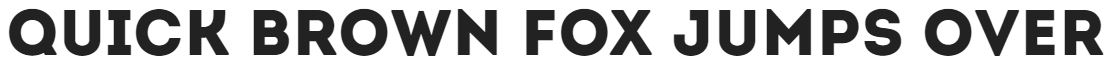

In [ ]:
picturePath = '/content/Capture.JPG'
print(checkPicture(picturePath, imageSize), '\n')
cv2_imshow(cv2.imread(picturePath))

wnload.png This image is 0.00 percent Display || 0.00 percent Handwritten || 0.00 percent Monospaced || 0.00 percent Sans Serif || 100.00 percent Serif. 



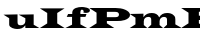

In [ ]:
folder_path = '/content/test'
lenMsg = 10
files = 10
for fname in os.listdir(folder_path)[:files]:
  fname = folder_path +'/'+fname
  print(fname[-lenMsg:], checkPicture(fname, imageSize), '\n')
  cv2_imshow(cv2.imread(fname))

#Извращенство - не запускать

In [ ]:
from PIL import Image, ImageDraw, ImageFont
import numpy as np
from matplotlib import cm
import random
import string
import os, errno

In [ ]:
def generateRandomSample(fontPath, picSize=(200,50)):
  im = Image.new('RGB', picSize, color=('#FFFFFF'))
  font = ImageFont.truetype(fontPath, size=30)
  draw_text = ImageDraw.Draw(im)
  draw_text.text(
      (5, 5),
      generate_random_string(20),
      font=font,
      fill='#000000')
  return im


def generate_random_string(length):
  letters = string.ascii_letters
  rand_string = ''.join(random.choice(letters) for i in range(length))
  # print("Random string of length", length, "is:", rand_string)
  return rand_string


def createCatalog(directory):
    try:
      os.makedirs(directory)
    except OSError as e:
      if e.errno != errno.EEXIST:
          raise

In [ ]:
np.set_printoptions(precision=4, floatmode='fixed')
np.set_printoptions(suppress=True)

In [ ]:
merge = {}

In [ ]:
createCatalog('/content/tmp')
batch = []
js = {}
dataPath = '/content/drive/MyDrive/colabData/fontData/allFonts/'
hallway = [0.2, 0.8]
# weights = np.array([100, 1, 1, 1, 1, 1, 1, 1, 1, 1])
cnt = 0
existList = list(newData)

q = 100
for fname in os.listdir(dataPath):
  if fname not in existList:
    batch = []
    for i in range(q):
      samplePath = '/content/tmp/sample'+str(i)+'.png'
      # print(dataPath+fname)
      generateRandomSample(dataPath+fname).save(samplePath)
      predict = checkPicture(samplePath, imageSize, raw=True)
      # predict = np.multiply(predict, weights)
      # batch.append((predict > 0.5).astype(int))
      batch.append(predict)
    res = np.sum(np.array(batch), axis = 0)/q
    # res[res>hallway[1]] = 1
    # res[res<hallway[0]] = 0
    # print(np.where((res>hallway[0]) & (res<hallway[1])))
    # print(res[(res>hallway[0]) & (res<hallway[1])])
    # res[(res>hallway[0]) & (res<hallway[1])] = 88.88

    
    print(fname, res)
    # js[fname] = list(np.array(res).astype(np.single))
    arr = np.array(res).tolist()
    for idx, elem in enumerate(arr):
      if elem == 0.0:
        arr[idx] = 0
      else:
        arr[idx] = round(elem, 2)
    js[fname] = arr
    cnt+=1
    # print(np.array(batch))
print(js)
print(cnt)


with open('/content/drive/MyDrive/colabData/fontData/mlDataFinal.json', 'a') as f:
    f.write(json.dumps(js))
print('End')

Podkova#800.ttf [0.0085 0.0000 0.9909 0.0000 0.0001 0.0000 0.0446 0.3182 0.2644 0.3673
 0.0053 0.0001 0.0119 0.5663 0.4337 0.0000 0.9995]
Poiret One#regular.ttf [0.6506 0.0007 0.0000 0.0125 0.0065 0.0020 0.0012 0.4729 0.1154 0.3651
 0.0232 0.0011 0.2890 0.0000 0.0146 0.9853 0.9792]
Poly#regular.ttf [0.0000 0.0012 0.9941 0.0000 0.0000 0.0000 0.0001 0.1152 0.0032 0.8815
 0.0000 0.0000 0.2622 0.2718 0.7282 0.0000 0.0137]
Poly#italic.ttf [0.1291 0.0002 0.9712 0.0000 0.0000 0.0000 0.0001 0.1017 0.0012 0.8970
 0.0000 0.0000 1.0000 0.0639 0.9361 0.0000 0.1071]
Pompiere#regular.ttf [0.7491 0.0502 0.0108 0.0211 0.0163 0.4960 0.0299 0.1780 0.1303 0.0694
 0.0564 0.0026 0.0746 0.9171 0.0829 0.0000 0.9906]
Poppins#regular.ttf [0.1578 0.0149 0.0000 0.0000 0.0000 0.0000 0.4401 0.5373 0.0143 0.0082
 0.0000 0.0000 0.0504 0.0480 0.9305 0.0215 0.9988]
Poppins#italic.ttf [0.2419 0.0269 0.0001 0.0000 0.0000 0.0000 0.3810 0.5876 0.0091 0.0223
 0.0000 0.0000 1.0000 0.0151 0.9810 0.0039 0.9968]
Poppins#500.tt

In [ ]:
newData = {
'Noto Sans Meetei Mayek#100.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0009, 0.0282, 0.1293, 0.8393
, 0.0023, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Sans Meetei Mayek#200.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0009, 0.0282, 0.1293, 0.8393
, 0.0023, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Sans Meetei Mayek#300.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0009, 0.0282, 0.1293, 0.8393
, 0.0023, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Sans Meroitic#regular.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0275, 0.8235, 0.0159, 0.1329
, 0.0002, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Sans Miao#regular.ttf':[0.0000, 1.0000, 0.0001, 0.0000, 0.0001, 0.0000, 0.0994, 0.3255, 0.1234, 0.4514
, 0.0001, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.8286],
'Noto Sans Modi#regular.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0110, 0.3345, 0.0096, 0.6449
, 0.0001, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9998],
'Noto Sans Mongolian#regular.ttf':[0.0000, 0.9982, 0.0000, 0.0000, 0.0000, 0.0000, 0.8200, 0.1791, 0.0006, 0.0004
, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Sans Mono#regular.ttf':[0.0000, 0.9989, 0.0000, 0.0000, 0.0000, 0.0000, 0.7517, 0.2183, 0.0154, 0.0146
, 0.0000, 0.0000, 0.0319, 0.1232, 0.8767, 0.0001, 0.9995],
'Noto Sans Mono#500.ttf':[0.0004, 0.9816, 0.0007, 0.0000, 0.0000, 0.0000, 0.3058, 0.5846, 0.0168, 0.0928
, 0.0000, 0.0000, 0.0026, 0.0345, 0.9655, 0.0000, 1.0000],
'Noto Sans Mono#600.ttf':[0.0037, 0.3018, 0.0074, 0.0000, 0.0000, 0.0000, 0.1427, 0.4912, 0.1251, 0.2410
, 0.0000, 0.0000, 0.0004, 0.0103, 0.9897, 0.0000, 1.0000],
'Noto Sans Mono#700.ttf':[0.0000, 0.0009, 0.0129, 0.0000, 0.0000, 0.0000, 0.1324, 0.1209, 0.3812, 0.3650
, 0.0005, 0.0000, 0.0002, 0.0596, 0.9404, 0.0000, 1.0000],
'Noto Sans Mono#800.ttf':[0.0000, 0.0002, 0.0119, 0.0000, 0.0000, 0.0000, 0.1739, 0.0794, 0.4643, 0.2699
, 0.0126, 0.0000, 0.0004, 0.0934, 0.9066, 0.0000, 1.0000],
'Noto Sans Mono#100.ttf':[0.0886, 0.3352, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0907, 0.0027, 0.9066
, 0.0000, 0.0000, 0.0792, 0.0000, 0.4771, 0.5229, 0.6027],
'Noto Sans Mono#200.ttf':[0.0507, 0.7872, 0.0000, 0.0000, 0.0060, 0.0000, 0.0087, 0.3996, 0.3102, 0.2712
, 0.0044, 0.0000, 0.1851, 0.0077, 0.8447, 0.1476, 0.4438],
'Noto Sans Mono#300.ttf':[0.0101, 0.9887, 0.0000, 0.0000, 0.0000, 0.0000, 0.9159, 0.0307, 0.0314, 0.0217
, 0.0002, 0.0000, 0.0376, 0.7652, 0.1938, 0.0410, 0.6138],
'Noto Sans Mro#regular.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0009, 0.0282, 0.1293, 0.8393
, 0.0023, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Sans Multani#regular.ttf':[0.0000, 0.9954, 0.0002, 0.0000, 0.0001, 0.0001, 0.0004, 0.1396, 0.2209, 0.2654
, 0.3735, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9825],
'Noto Sans Myanmar#regular.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0014, 0.7910, 0.1908, 0.0168
, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9998],
'Noto Sans Myanmar#500.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0014, 0.7910, 0.1908, 0.0168
, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9998],
'Noto Sans Myanmar#600.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0014, 0.7910, 0.1908, 0.0168
, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9998],
'Noto Sans Myanmar#700.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0001, 0.0005, 0.0697, 0.7556, 0.1388, 0.0354
, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Sans Myanmar#800.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0001, 0.0005, 0.0697, 0.7556, 0.1388, 0.0354
, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Sans Myanmar#100.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0014, 0.7910, 0.1908, 0.0168
, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9998],
'Noto Sans Myanmar#200.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0014, 0.7910, 0.1908, 0.0168
, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9998],
'Noto Sans Myanmar#300.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0014, 0.7910, 0.1908, 0.0168
, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9998],
'Noto Sans N Ko#regular.ttf':[0.0000, 0.9954, 0.0002, 0.0000, 0.0001, 0.0001, 0.0004, 0.1396, 0.2209, 0.2654
, 0.3735, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9825],
'Noto Sans Nabataean#regular.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0009, 0.0282, 0.1293, 0.8393
, 0.0023, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Sans New Tai Lue#regular.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0009, 0.0282, 0.1293, 0.8393
, 0.0023, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Sans Newa#regular.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0249, 0.1700, 0.2101, 0.5948
, 0.0002, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Sans Nushu#regular.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0009, 0.0282, 0.1293, 0.8393
, 0.0023, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Sans Ogham#regular.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0009, 0.0282, 0.1293, 0.8393
, 0.0023, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Sans Ol Chiki#regular.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0009, 0.0282, 0.1293, 0.8393
, 0.0023, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Sans Ol Chiki#500.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0009, 0.0282, 0.1293, 0.8393
, 0.0023, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Sans Ol Chiki#600.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0009, 0.0282, 0.1293, 0.8393
, 0.0023, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Sans Ol Chiki#700.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0009, 0.0282, 0.1293, 0.8393
, 0.0023, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Sans Old Hungarian#regular.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0076, 0.9540, 0.0004, 0.0380
, 0.0001, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Sans Old Italic#regular.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0009, 0.0282, 0.1293, 0.8393
, 0.0023, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Sans Old North Arabian#regular.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0009, 0.0282, 0.1293, 0.8393
, 0.0023, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Sans Old Permic#regular.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0009, 0.0282, 0.1293, 0.8393
, 0.0023, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Sans Old Persian#regular.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0009, 0.0282, 0.1293, 0.8393
, 0.0023, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Sans Old Sogdian#regular.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0009, 0.0282, 0.1293, 0.8393
, 0.0023, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Sans Old South Arabian#regular.ttf':[0.0000, 0.0000, 0.0000, 0.0684, 0.2879, 0.0745, 0.2388, 0.0916, 0.0375, 0.0244
, 0.0004, 0.1767, 0.0000, 1.0000, 0.0000, 0.0000, 0.0059],
'Noto Sans Old Turkic#regular.ttf':[0.0000, 0.9954, 0.0002, 0.0000, 0.0001, 0.0001, 0.0004, 0.1396, 0.2209, 0.2654
, 0.3735, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9825],
'Noto Sans Oriya#regular.ttf':[0.0070, 0.0001, 0.6823, 0.0000, 0.0000, 0.0000, 0.9522, 0.0339, 0.0102, 0.0036
, 0.0000, 0.0000, 0.0000, 0.0002, 0.0008, 0.9990, 0.9094],
'Noto Sans Oriya#700.ttf':[0.0070, 0.0001, 0.6823, 0.0000, 0.0000, 0.0000, 0.9522, 0.0339, 0.0102, 0.0036
, 0.0000, 0.0000, 0.0000, 0.0002, 0.0008, 0.9990, 0.9094],
'Noto Sans Oriya#100.ttf':[0.0070, 0.0001, 0.6823, 0.0000, 0.0000, 0.0000, 0.9522, 0.0339, 0.0102, 0.0036
, 0.0000, 0.0000, 0.0000, 0.0002, 0.0008, 0.9990, 0.9094],
'Noto Sans Osage#regular.ttf':[0.0000, 0.9954, 0.0002, 0.0000, 0.0001, 0.0001, 0.0004, 0.1396, 0.2209, 0.2654
, 0.3735, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9825],
'Noto Sans Osmanya#regular.ttf':[0.0000, 0.0000, 0.0000, 0.0060, 0.4048, 0.0097, 0.1810, 0.0855, 0.0063, 0.0045
, 0.0000, 0.3021, 0.0000, 0.9999, 0.0001, 0.0000, 0.9612],
'Noto Sans Pahawh Hmong#regular.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0009, 0.0282, 0.1293, 0.8393
, 0.0023, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Sans Palmyrene#regular.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0009, 0.0282, 0.1293, 0.8393
, 0.0023, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Sans Pau Cin Hau#regular.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0009, 0.0282, 0.1293, 0.8393
, 0.0023, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Sans Phags Pa#regular.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0009, 0.0282, 0.1293, 0.8393
, 0.0023, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Sans Phoenician#regular.ttf':[0.0000, 0.0000, 0.0000, 0.0684, 0.2879, 0.0745, 0.2388, 0.0916, 0.0375, 0.0244
, 0.0004, 0.1767, 0.0000, 1.0000, 0.0000, 0.0000, 0.0059],
'Noto Sans Psalter Pahlavi#regular.ttf':[0.0000, 0.9966, 0.0000, 0.0000, 0.0000, 0.0930, 0.0001, 0.5915, 0.0008, 0.3083
, 0.0061, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Sans Rejang#regular.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0009, 0.0282, 0.1293, 0.8393
, 0.0023, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Sans Runic#regular.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0009, 0.0282, 0.1293, 0.8393
, 0.0023, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Sans SC#regular.ttf':[0.0054, 0.0916, 0.0032, 0.0000, 0.0000, 0.0000, 0.8586, 0.1353, 0.0012, 0.0049
, 0.0000, 0.0000, 0.0971, 0.1595, 0.8405, 0.0000, 0.9990],
'Noto Sans SC#500.ttf':[0.0016, 0.0091, 0.0003, 0.0000, 0.0000, 0.0000, 0.1342, 0.7937, 0.0224, 0.0497
, 0.0000, 0.0000, 0.0020, 0.0121, 0.9879, 0.0000, 0.9920],
'Noto Sans SC#700.ttf':[0.0001, 0.0000, 0.0023, 0.0000, 0.0000, 0.0000, 0.0192, 0.0131, 0.8210, 0.1467
, 0.0000, 0.0000, 0.0017, 0.0652, 0.9348, 0.0000, 0.9999],
'Noto Sans SC#100.ttf':[0.2178, 0.0153, 0.0000, 0.0000, 0.0000, 0.0000, 0.0008, 0.5879, 0.2451, 0.1571
, 0.0092, 0.0000, 0.0294, 0.0913, 0.8812, 0.0275, 0.9444],
'Noto Sans SC#300.ttf':[0.1441, 0.1266, 0.0000, 0.0000, 0.0000, 0.0000, 0.9106, 0.0250, 0.0185, 0.0455
, 0.0004, 0.0000, 0.1358, 0.9107, 0.0893, 0.0000, 0.9683],
'Noto Sans Samaritan#regular.ttf':[0.0000, 0.0000, 0.0000, 0.0684, 0.2879, 0.0745, 0.2388, 0.0916, 0.0375, 0.0244
, 0.0004, 0.1767, 0.0000, 1.0000, 0.0000, 0.0000, 0.0059],
'Noto Sans Saurashtra#regular.ttf':[0.0000, 0.9954, 0.0002, 0.0000, 0.0001, 0.0001, 0.0004, 0.1396, 0.2209, 0.2654
, 0.3735, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9825],
'Noto Sans Sharada#regular.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0275, 0.8235, 0.0159, 0.1329
, 0.0002, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Sans Shavian#regular.ttf':[0.0000, 0.0000, 0.0000, 0.0060, 0.4048, 0.0097, 0.1810, 0.0855, 0.0063, 0.0045
, 0.0000, 0.3021, 0.0000, 0.9999, 0.0001, 0.0000, 0.9612],
'Noto Sans Siddham#regular.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.6975, 0.2510, 0.0048, 0.0454
, 0.0013, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Sans Sinhala#regular.ttf':[0.0000, 1.0000, 0.0015, 0.0000, 0.0000, 0.0000, 0.0251, 0.0407, 0.0983, 0.8299
, 0.0059, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9599],
'Noto Sans Sinhala#500.ttf':[0.0000, 1.0000, 0.0015, 0.0000, 0.0000, 0.0000, 0.0251, 0.0407, 0.0983, 0.8299
, 0.0059, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9599],
'Noto Sans Sinhala#600.ttf':[0.0000, 1.0000, 0.0015, 0.0000, 0.0000, 0.0000, 0.0251, 0.0407, 0.0983, 0.8299
, 0.0059, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9599],
'Noto Sans Sinhala#700.ttf':[0.0000, 1.0000, 0.0015, 0.0000, 0.0000, 0.0000, 0.0251, 0.0407, 0.0983, 0.8299
, 0.0059, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9599],
'Noto Sans Sinhala#800.ttf':[0.0000, 1.0000, 0.0015, 0.0000, 0.0000, 0.0000, 0.0251, 0.0407, 0.0983, 0.8299
, 0.0059, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9599],
'Noto Sans Sinhala#100.ttf':[0.0000, 1.0000, 0.0015, 0.0000, 0.0000, 0.0000, 0.0251, 0.0407, 0.0983, 0.8299
, 0.0059, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9599],
'Noto Sans Sinhala#200.ttf':[0.0000, 1.0000, 0.0015, 0.0000, 0.0000, 0.0000, 0.0251, 0.0407, 0.0983, 0.8299
, 0.0059, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9599],
'Noto Sans Sinhala#300.ttf':[0.0000, 1.0000, 0.0015, 0.0000, 0.0000, 0.0000, 0.0251, 0.0407, 0.0983, 0.8299
, 0.0059, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9599],
'Noto Sans Sogdian#regular.ttf':[0.0000, 0.9954, 0.0002, 0.0000, 0.0001, 0.0001, 0.0004, 0.1396, 0.2209, 0.2654
, 0.3735, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9825],
'Noto Sans Sora Sompeng#regular.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0009, 0.0282, 0.1293, 0.8393
, 0.0023, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Sans Sora Sompeng#500.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0009, 0.0282, 0.1293, 0.8393
, 0.0023, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Sans Sora Sompeng#600.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0009, 0.0282, 0.1293, 0.8393
, 0.0023, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Sans Sora Sompeng#700.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0009, 0.0282, 0.1293, 0.8393
, 0.0023, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Sans Soyombo#regular.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.9180, 0.0774, 0.0042, 0.0004
, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9999],
'Noto Sans Sundanese#regular.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0009, 0.0282, 0.1293, 0.8393
, 0.0023, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Sans Sundanese#500.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0009, 0.0282, 0.1293, 0.8393
, 0.0023, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Sans Sundanese#600.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0009, 0.0282, 0.1293, 0.8393
, 0.0023, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Sans Sundanese#700.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0009, 0.0282, 0.1293, 0.8393
, 0.0023, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Sans Syloti Nagri#regular.ttf':[0.0000, 0.9954, 0.0002, 0.0000, 0.0001, 0.0001, 0.0004, 0.1396, 0.2209, 0.2654
, 0.3735, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9825],
'Noto Sans Symbols#regular.ttf':[0.4671, 0.0139, 0.0161, 0.0000, 0.0000, 0.0000, 0.9998, 0.0002, 0.0000, 0.0000
, 0.0000, 0.0000, 0.1376, 0.2620, 0.7380, 0.0000, 0.9938],
'Noto Sans Symbols#500.ttf':[0.3489, 0.0127, 0.0311, 0.0000, 0.0000, 0.0000, 0.8589, 0.1406, 0.0004, 0.0001
, 0.0000, 0.0000, 0.0317, 0.1427, 0.8573, 0.0000, 0.9998],
'Noto Sans Symbols#600.ttf':[0.1756, 0.0001, 0.0008, 0.0000, 0.0000, 0.0000, 0.4256, 0.1014, 0.4677, 0.0053
, 0.0000, 0.0000, 0.0146, 0.0911, 0.9089, 0.0000, 1.0000],
'Noto Sans Symbols#700.ttf':[0.0456, 0.0000, 0.0010, 0.0000, 0.0000, 0.0000, 0.0099, 0.0001, 0.9869, 0.0031
, 0.0000, 0.0000, 0.0088, 0.0706, 0.9294, 0.0000, 1.0000],
'Noto Sans Symbols#800.ttf':[0.0503, 0.0000, 0.0002, 0.0000, 0.0000, 0.0000, 0.0166, 0.0001, 0.9771, 0.0062
, 0.0000, 0.0000, 0.0265, 0.1053, 0.8947, 0.0000, 1.0000],
'Noto Sans Symbols#100.ttf':[0.9493, 0.0004, 0.0356, 0.0000, 0.0000, 0.0000, 0.0001, 0.4782, 0.4125, 0.1092
, 0.0000, 0.0000, 0.0831, 0.0060, 0.5181, 0.4759, 0.7760],
'Noto Sans Symbols#200.ttf':[0.9429, 0.0009, 0.0282, 0.0000, 0.0000, 0.0000, 0.0013, 0.7570, 0.2403, 0.0015
, 0.0000, 0.0000, 0.2076, 0.0386, 0.8508, 0.1106, 0.5939],
'Noto Sans Symbols#300.ttf':[0.7780, 0.0124, 0.0642, 0.0000, 0.0000, 0.0000, 0.9949, 0.0004, 0.0000, 0.0047
, 0.0000, 0.0000, 0.1955, 0.5022, 0.4978, 0.0000, 0.5657],
'Noto Sans Symbols 2#regular.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0008, 0.0279, 0.1231, 0.8452
, 0.0028, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9374],
'Noto Sans Syriac#regular.ttf':[0.0000, 0.9999, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0875, 0.1971, 0.3143
, 0.4010, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Sans Syriac#100.ttf':[0.0000, 0.9999, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0875, 0.1971, 0.3143
, 0.4010, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Sans TC#regular.ttf':[0.0356, 0.0700, 0.0004, 0.0000, 0.0000, 0.0000, 0.8664, 0.1281, 0.0019, 0.0036
, 0.0000, 0.0000, 0.0761, 0.1453, 0.8547, 0.0000, 0.9973],
'Noto Sans TC#500.ttf':[0.0064, 0.0097, 0.0003, 0.0000, 0.0000, 0.0000, 0.1279, 0.7958, 0.0260, 0.0503
, 0.0000, 0.0000, 0.0062, 0.0715, 0.9285, 0.0000, 0.9989],
'Noto Sans TC#700.ttf':[0.0001, 0.0000, 0.0001, 0.0000, 0.0000, 0.0000, 0.0295, 0.0280, 0.7893, 0.1532
, 0.0000, 0.0000, 0.0009, 0.0226, 0.9774, 0.0000, 0.9998],
'Noto Sans TC#100.ttf':[0.2543, 0.0030, 0.0000, 0.0000, 0.0000, 0.0000, 0.0006, 0.6108, 0.2275, 0.1506
, 0.0105, 0.0000, 0.0564, 0.0332, 0.9347, 0.0322, 0.9223],
'Noto Sans TC#300.ttf':[0.0912, 0.0891, 0.0000, 0.0000, 0.0000, 0.0000, 0.9099, 0.0222, 0.0198, 0.0479
, 0.0002, 0.0000, 0.1245, 0.8963, 0.1037, 0.0000, 0.9673],
'Noto Sans Tagalog#regular.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0009, 0.0282, 0.1293, 0.8393
, 0.0023, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Sans Tagbanwa#regular.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0009, 0.0282, 0.1293, 0.8393
, 0.0023, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Sans Tai Le#regular.ttf':[0.0000, 0.9954, 0.0002, 0.0000, 0.0001, 0.0001, 0.0004, 0.1396, 0.2209, 0.2654
, 0.3735, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9825],
'Noto Sans Tai Tham#regular.ttf':[0.0000, 0.0000, 0.0077, 0.0000, 0.0001, 0.0001, 0.5663, 0.0227, 0.3252, 0.0832
, 0.0024, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.4490],
'Noto Sans Tai Tham#500.ttf':[0.0000, 0.0000, 0.0077, 0.0000, 0.0001, 0.0001, 0.5663, 0.0227, 0.3252, 0.0832
, 0.0024, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.4490],
'Noto Sans Tai Tham#600.ttf':[0.0000, 0.0000, 0.0077, 0.0000, 0.0001, 0.0001, 0.5663, 0.0227, 0.3252, 0.0832
, 0.0024, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.4490],
'Noto Sans Tai Tham#700.ttf':[0.0000, 0.0000, 0.0077, 0.0000, 0.0001, 0.0001, 0.5663, 0.0227, 0.3252, 0.0832
, 0.0024, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.4490],
'Noto Sans Tai Viet#regular.ttf':[0.0000, 0.9954, 0.0002, 0.0000, 0.0001, 0.0001, 0.0004, 0.1396, 0.2209, 0.2654
, 0.3735, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9825],
'Noto Sans Takri#regular.ttf':[0.0000, 0.9999, 0.0009, 0.0000, 0.0000, 0.0014, 0.2742, 0.3836, 0.0382, 0.2978
, 0.0047, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9927],
'Noto Sans Tamil#regular.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0110, 0.3345, 0.0096, 0.6449
, 0.0001, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9998],
'Noto Sans Tamil#500.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0110, 0.3345, 0.0096, 0.6449
, 0.0001, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9998],
'Noto Sans Tamil#600.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0110, 0.3345, 0.0096, 0.6449
, 0.0001, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9998],
'Noto Sans Tamil#700.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0110, 0.3345, 0.0096, 0.6449
, 0.0001, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9998],
'Noto Sans Tamil#800.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0110, 0.3345, 0.0096, 0.6449
, 0.0001, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9998],
'Noto Sans Tamil#100.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0110, 0.3345, 0.0096, 0.6449
, 0.0001, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9998],
'Noto Sans Tamil#200.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0110, 0.3345, 0.0096, 0.6449
, 0.0001, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9998],
'Noto Sans Tamil#300.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0110, 0.3345, 0.0096, 0.6449
, 0.0001, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9998],
'Noto Sans Tamil Supplement#regular.ttf':[0.7417, 0.0001, 1.0000, 0.0095, 0.0000, 0.0000, 0.9898, 0.0000, 0.0000, 0.0007
, 0.0000, 0.0000, 0.0005, 0.0000, 0.0207, 0.9793, 1.0000],
'Noto Sans Telugu#regular.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0110, 0.3345, 0.0096, 0.6449
, 0.0001, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9998],
'Noto Sans Telugu#500.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0110, 0.3345, 0.0096, 0.6449
, 0.0001, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9998],
'Noto Sans Telugu#600.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0110, 0.3345, 0.0096, 0.6449
, 0.0001, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9998],
'Noto Sans Telugu#700.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0110, 0.3345, 0.0096, 0.6449
, 0.0001, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9998],
'Noto Sans Telugu#800.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0110, 0.3345, 0.0096, 0.6449
, 0.0001, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9998],
'Noto Sans Telugu#100.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0110, 0.3345, 0.0096, 0.6449
, 0.0001, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9998],
'Noto Sans Telugu#200.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0110, 0.3345, 0.0096, 0.6449
, 0.0001, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9998],
'Noto Sans Telugu#300.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0110, 0.3345, 0.0096, 0.6449
, 0.0001, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9998],
'Noto Sans Thaana#regular.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0009, 0.0282, 0.1293, 0.8393
, 0.0023, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Sans Thaana#500.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0009, 0.0282, 0.1293, 0.8393
, 0.0023, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Sans Thaana#600.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0009, 0.0282, 0.1293, 0.8393
, 0.0023, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Sans Thaana#700.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0009, 0.0282, 0.1293, 0.8393
, 0.0023, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Sans Thaana#800.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0009, 0.0282, 0.1293, 0.8393
, 0.0023, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Sans Thaana#100.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0009, 0.0282, 0.1293, 0.8393
, 0.0023, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Sans Thaana#200.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0009, 0.0282, 0.1293, 0.8393
, 0.0023, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Sans Thaana#300.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0009, 0.0282, 0.1293, 0.8393
, 0.0023, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Sans Thai#regular.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0249, 0.1700, 0.2101, 0.5948
, 0.0002, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Sans Thai#500.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0249, 0.1700, 0.2101, 0.5948
, 0.0002, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Sans Thai#600.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0249, 0.1700, 0.2101, 0.5948
, 0.0002, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Sans Thai#700.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0249, 0.1700, 0.2101, 0.5948
, 0.0002, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Sans Thai#800.ttf':[0.0000, 0.2357, 0.0000, 0.0000, 0.0000, 0.0077, 0.2449, 0.2010, 0.2644, 0.2178
, 0.0641, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Sans Thai#100.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0249, 0.1700, 0.2101, 0.5948
, 0.0002, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Sans Thai#200.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0249, 0.1700, 0.2101, 0.5948
, 0.0002, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Sans Thai#300.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0249, 0.1700, 0.2101, 0.5948
, 0.0002, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Sans Thai Looped#regular.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.9180, 0.0774, 0.0042, 0.0004
, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9999],
'Noto Sans Thai Looped#500.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.9180, 0.0774, 0.0042, 0.0004
, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9999],
'Noto Sans Thai Looped#600.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.9180, 0.0774, 0.0042, 0.0004
, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9999],
'Noto Sans Thai Looped#700.ttf':[0.0000, 0.9942, 0.0000, 0.0000, 0.0000, 0.0001, 0.9880, 0.0087, 0.0005, 0.0029
, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Sans Thai Looped#800.ttf':[0.0000, 0.9942, 0.0000, 0.0000, 0.0000, 0.0001, 0.9880, 0.0087, 0.0005, 0.0029
, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Sans Thai Looped#100.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.9180, 0.0774, 0.0042, 0.0004
, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9999],
'Noto Sans Thai Looped#200.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.9180, 0.0774, 0.0042, 0.0004
, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9999],
'Noto Sans Thai Looped#300.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.9180, 0.0774, 0.0042, 0.0004
, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9999],
'Noto Sans Tifinagh#regular.ttf':[0.0000, 0.9954, 0.0002, 0.0000, 0.0001, 0.0001, 0.0004, 0.1396, 0.2209, 0.2654
, 0.3735, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9825],
'Noto Sans Tirhuta#regular.ttf':[0.0000, 0.9778, 0.0018, 0.0000, 0.0000, 0.0002, 0.0001, 0.0138, 0.1553, 0.2518
, 0.5788, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9805],
'Noto Sans Ugaritic#regular.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0008, 0.0124, 0.8972, 0.0000, 0.0895
, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Sans Vai#regular.ttf':[0.0000, 0.9954, 0.0002, 0.0000, 0.0001, 0.0001, 0.0004, 0.1396, 0.2209, 0.2654
, 0.3735, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9825],
'Noto Sans Wancho#regular.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0009, 0.0282, 0.1293, 0.8393
, 0.0023, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Sans Warang Citi#regular.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0249, 0.1700, 0.2101, 0.5948
, 0.0002, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Sans Yi#regular.ttf':[0.7417, 0.0001, 1.0000, 0.0095, 0.0000, 0.0000, 0.9898, 0.0000, 0.0000, 0.0007
, 0.0000, 0.0000, 0.0005, 0.0000, 0.0207, 0.9793, 1.0000],
'Noto Sans Zanabazar Square#regular.ttf':[0.0008, 0.0384, 0.1805, 0.0000, 0.0000, 0.0000, 0.0001, 0.9721, 0.0188, 0.0090
, 0.0000, 0.0000, 0.0000, 0.9922, 0.0078, 0.0000, 0.0059],
'Noto Serif#regular.ttf':[0.0001, 0.0297, 0.9785, 0.0000, 0.0000, 0.0000, 0.0013, 0.1240, 0.0009, 0.8738
, 0.0000, 0.0000, 0.1395, 0.2293, 0.7707, 0.0000, 0.0000],
'Noto Serif#italic.ttf':[0.0159, 0.0137, 0.8976, 0.0000, 0.0000, 0.0000, 0.0003, 0.2073, 0.0003, 0.7922
, 0.0000, 0.0000, 1.0000, 0.0172, 0.9828, 0.0000, 0.0002],
'Noto Serif#700.ttf':[0.0020, 0.0000, 0.9484, 0.0000, 0.0000, 0.0000, 0.1023, 0.0304, 0.2955, 0.5718
, 0.0000, 0.0000, 0.0077, 0.0749, 0.9251, 0.0000, 0.0001],
'Noto Serif Ahom#regular.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.6975, 0.2510, 0.0048, 0.0454
, 0.0013, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Serif Armenian#regular.ttf':[0.0000, 0.3676, 0.0000, 0.0001, 0.0000, 0.0109, 0.0004, 0.0977, 0.2457, 0.2509
, 0.3943, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0003],
'Noto Serif Armenian#500.ttf':[0.0000, 0.3676, 0.0000, 0.0001, 0.0000, 0.0109, 0.0004, 0.0977, 0.2457, 0.2509
, 0.3943, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0003],
'Noto Serif Armenian#600.ttf':[0.0000, 0.3630, 0.0000, 0.0001, 0.0000, 0.0070, 0.0003, 0.0926, 0.2402, 0.2466
, 0.4132, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0002],
'Noto Serif Armenian#700.ttf':[0.0000, 0.0001, 0.0000, 0.0002, 0.0002, 0.0151, 0.0134, 0.0303, 0.2734, 0.1535
, 0.5140, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.7153],
'Noto Serif Armenian#800.ttf':[0.0000, 0.0002, 0.0000, 0.0001, 0.0002, 0.0124, 0.0223, 0.0382, 0.2710, 0.1743
, 0.4815, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.7316],
'Noto Serif Armenian#100.ttf':[0.0000, 0.3799, 0.0000, 0.0001, 0.0000, 0.0163, 0.0004, 0.1008, 0.2534, 0.2558
, 0.3731, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0004],
'Noto Serif Armenian#200.ttf':[0.0000, 0.3799, 0.0000, 0.0001, 0.0000, 0.0163, 0.0004, 0.1008, 0.2534, 0.2558
, 0.3731, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0004],
'Noto Serif Armenian#300.ttf':[0.0000, 0.3799, 0.0000, 0.0001, 0.0000, 0.0163, 0.0004, 0.1008, 0.2534, 0.2558
, 0.3731, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0004],
'Noto Serif Balinese#regular.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0009, 0.0282, 0.1293, 0.8393
, 0.0023, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Serif Bengali#regular.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0009, 0.0282, 0.1293, 0.8393
, 0.0023, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Serif Bengali#500.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0009, 0.0282, 0.1293, 0.8393
, 0.0023, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Serif Bengali#600.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0009, 0.0282, 0.1293, 0.8393
, 0.0023, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Serif Bengali#700.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0009, 0.0282, 0.1293, 0.8393
, 0.0023, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Serif Bengali#800.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0009, 0.0282, 0.1293, 0.8393
, 0.0023, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Serif Bengali#100.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0009, 0.0282, 0.1293, 0.8393
, 0.0023, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Serif Bengali#200.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0009, 0.0282, 0.1293, 0.8393
, 0.0023, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Serif Bengali#300.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0009, 0.0282, 0.1293, 0.8393
, 0.0023, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Serif Devanagari#regular.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0151, 0.7011, 0.0224, 0.2610
, 0.0004, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Serif Devanagari#500.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0151, 0.7011, 0.0224, 0.2610
, 0.0004, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Serif Devanagari#600.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0151, 0.7011, 0.0224, 0.2610
, 0.0004, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Serif Devanagari#700.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0151, 0.7011, 0.0224, 0.2610
, 0.0004, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Serif Devanagari#800.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0151, 0.7011, 0.0224, 0.2610
, 0.0004, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Serif Devanagari#100.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0151, 0.7011, 0.0224, 0.2610
, 0.0004, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Serif Devanagari#200.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0151, 0.7011, 0.0224, 0.2610
, 0.0004, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Serif Devanagari#300.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0151, 0.7011, 0.0224, 0.2610
, 0.0004, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Serif Display#regular.ttf':[0.0005, 0.0245, 0.9995, 0.0000, 0.0000, 0.0000, 0.2579, 0.5601, 0.0024, 0.1797
, 0.0000, 0.0000, 0.0176, 0.0748, 0.9069, 0.0183, 0.0000],
'Noto Serif Display#italic.ttf':[0.0165, 0.0311, 0.9505, 0.0000, 0.0000, 0.0000, 0.0658, 0.6656, 0.0019, 0.2668
, 0.0000, 0.0000, 0.9903, 0.0191, 0.9802, 0.0007, 0.0001],
'Noto Serif Display#500.ttf':[0.0001, 0.0018, 0.9990, 0.0000, 0.0000, 0.0000, 0.0011, 0.6827, 0.0013, 0.3149
, 0.0000, 0.0000, 0.0083, 0.0524, 0.9263, 0.0212, 0.0000],
'Noto Serif Display#600.ttf':[0.0004, 0.0004, 0.9836, 0.0000, 0.0000, 0.0000, 0.0000, 0.2227, 0.1688, 0.6085
, 0.0000, 0.0000, 0.0140, 0.0138, 0.9652, 0.0210, 0.0001],
'Noto Serif Display#700.ttf':[0.0035, 0.0000, 0.9602, 0.0000, 0.0000, 0.0000, 0.0002, 0.0005, 0.1367, 0.8627
, 0.0000, 0.0000, 0.0004, 0.1079, 0.8902, 0.0019, 0.0108],
'Noto Serif Display#800.ttf':[0.0062, 0.0000, 0.7796, 0.0000, 0.0000, 0.0000, 0.0308, 0.0005, 0.2614, 0.6021
, 0.1051, 0.0000, 0.0104, 0.0296, 0.9443, 0.0262, 0.0163],
'Noto Serif Display#100.ttf':[0.0299, 0.0004, 0.6189, 0.0003, 0.0000, 0.0000, 0.0005, 0.2276, 0.0887, 0.6569
, 0.0260, 0.0000, 0.0017, 0.0181, 0.6099, 0.3719, 0.9885],
'Noto Serif Display#200.ttf':[0.0025, 0.0012, 0.9996, 0.0000, 0.0079, 0.0000, 0.0116, 0.1558, 0.2257, 0.4484
, 0.1502, 0.0003, 0.0373, 0.1676, 0.5768, 0.2557, 0.4502],
'Noto Serif Display#300.ttf':[0.0291, 0.0311, 1.0000, 0.0000, 0.0000, 0.0000, 0.9809, 0.0136, 0.0001, 0.0053
, 0.0001, 0.0000, 0.0332, 0.7668, 0.1924, 0.0408, 0.0000],
'Noto Serif Dogra#regular.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1096, 0.2146, 0.1314, 0.5441
, 0.0003, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Serif Ethiopic#regular.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0009, 0.0282, 0.1293, 0.8393
, 0.0023, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Serif Ethiopic#500.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0009, 0.0282, 0.1293, 0.8393
, 0.0023, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Serif Ethiopic#600.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0009, 0.0282, 0.1293, 0.8393
, 0.0023, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Serif Ethiopic#700.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0009, 0.0282, 0.1293, 0.8393
, 0.0023, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Serif Ethiopic#800.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0009, 0.0282, 0.1293, 0.8393
, 0.0023, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Serif Ethiopic#100.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0009, 0.0282, 0.1293, 0.8393
, 0.0023, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Serif Ethiopic#200.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0009, 0.0282, 0.1293, 0.8393
, 0.0023, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Serif Ethiopic#300.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0009, 0.0282, 0.1293, 0.8393
, 0.0023, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Serif Georgian#regular.ttf':[0.0000, 0.3676, 0.0000, 0.0001, 0.0000, 0.0109, 0.0004, 0.0977, 0.2457, 0.2509
, 0.3943, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0003],
'Noto Serif Georgian#500.ttf':[0.0000, 0.3676, 0.0000, 0.0001, 0.0000, 0.0109, 0.0004, 0.0977, 0.2457, 0.2509
, 0.3943, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0003],
'Noto Serif Georgian#600.ttf':[0.0000, 0.3630, 0.0000, 0.0001, 0.0000, 0.0070, 0.0003, 0.0926, 0.2402, 0.2466
, 0.4132, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0002],
'Noto Serif Georgian#700.ttf':[0.0000, 0.0001, 0.0000, 0.0002, 0.0002, 0.0151, 0.0134, 0.0303, 0.2734, 0.1535
, 0.5140, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.7153],
'Noto Serif Georgian#800.ttf':[0.0000, 0.0002, 0.0000, 0.0001, 0.0002, 0.0124, 0.0223, 0.0382, 0.2710, 0.1743
, 0.4815, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.7316],
'Noto Serif Georgian#100.ttf':[0.0000, 0.3799, 0.0000, 0.0001, 0.0000, 0.0163, 0.0004, 0.1008, 0.2534, 0.2558
, 0.3731, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0004],
'Noto Serif Georgian#200.ttf':[0.0000, 0.3799, 0.0000, 0.0001, 0.0000, 0.0163, 0.0004, 0.1008, 0.2534, 0.2558
, 0.3731, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0004],
'Noto Serif Georgian#300.ttf':[0.0000, 0.3676, 0.0000, 0.0001, 0.0000, 0.0109, 0.0004, 0.0977, 0.2457, 0.2509
, 0.3943, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0003],
'Noto Serif Grantha#regular.ttf':[0.0000, 0.9999, 0.0005, 0.0000, 0.0000, 0.0077, 0.0104, 0.7773, 0.1213, 0.0823
, 0.0010, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.3960],
'Noto Serif Gujarati#regular.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.6322, 0.2455, 0.0073, 0.1128
, 0.0021, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Serif Gujarati#500.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.6322, 0.2455, 0.0073, 0.1128
, 0.0021, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Serif Gujarati#600.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.6322, 0.2455, 0.0073, 0.1128
, 0.0021, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Serif Gujarati#700.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.6322, 0.2455, 0.0073, 0.1128
, 0.0021, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Serif Gujarati#800.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.6322, 0.2455, 0.0073, 0.1128
, 0.0021, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Serif Gujarati#100.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.6322, 0.2455, 0.0073, 0.1128
, 0.0021, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Serif Gujarati#200.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.6322, 0.2455, 0.0073, 0.1128
, 0.0021, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Serif Gujarati#300.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.6322, 0.2455, 0.0073, 0.1128
, 0.0021, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Serif Gurmukhi#regular.ttf':[0.0000, 1.0000, 0.0015, 0.0000, 0.0000, 0.0000, 0.0251, 0.0407, 0.0983, 0.8299
, 0.0059, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9599],
'Noto Serif Gurmukhi#500.ttf':[0.0000, 1.0000, 0.0015, 0.0000, 0.0000, 0.0000, 0.0251, 0.0407, 0.0983, 0.8299
, 0.0059, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9599],
'Noto Serif Gurmukhi#600.ttf':[0.0000, 1.0000, 0.0015, 0.0000, 0.0000, 0.0000, 0.0251, 0.0407, 0.0983, 0.8299
, 0.0059, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9599],
'Noto Serif Gurmukhi#700.ttf':[0.0000, 1.0000, 0.0015, 0.0000, 0.0000, 0.0000, 0.0251, 0.0407, 0.0983, 0.8299
, 0.0059, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9599],
'Noto Serif Gurmukhi#800.ttf':[0.0000, 1.0000, 0.0015, 0.0000, 0.0000, 0.0000, 0.0251, 0.0407, 0.0983, 0.8299
, 0.0059, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9599],
'Noto Serif Gurmukhi#100.ttf':[0.0000, 1.0000, 0.0015, 0.0000, 0.0000, 0.0000, 0.0251, 0.0407, 0.0983, 0.8299
, 0.0059, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9599],
'Noto Serif Gurmukhi#200.ttf':[0.0000, 1.0000, 0.0015, 0.0000, 0.0000, 0.0000, 0.0251, 0.0407, 0.0983, 0.8299
, 0.0059, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9599],
'Noto Serif Gurmukhi#300.ttf':[0.0000, 1.0000, 0.0015, 0.0000, 0.0000, 0.0000, 0.0251, 0.0407, 0.0983, 0.8299
, 0.0059, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9599],
'Noto Serif Hebrew#regular.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0110, 0.3345, 0.0096, 0.6449
, 0.0001, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9998],
'Noto Serif Hebrew#500.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0110, 0.3345, 0.0096, 0.6449
, 0.0001, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9998],
'Noto Serif Hebrew#600.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0110, 0.3345, 0.0096, 0.6449
, 0.0001, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9998],
'Noto Serif Hebrew#700.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0110, 0.3345, 0.0096, 0.6449
, 0.0001, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9998],
'Noto Serif Hebrew#800.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0110, 0.3345, 0.0096, 0.6449
, 0.0001, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9998],
'Noto Serif Hebrew#100.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0110, 0.3345, 0.0096, 0.6449
, 0.0001, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9998],
'Noto Serif Hebrew#200.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0110, 0.3345, 0.0096, 0.6449
, 0.0001, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9998],
'Noto Serif Hebrew#300.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0110, 0.3345, 0.0096, 0.6449
, 0.0001, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9998],
'Noto Serif JP#regular.ttf':[0.0376, 0.2069, 0.9867, 0.0000, 0.0000, 0.0000, 0.4878, 0.3284, 0.0001, 0.1837
, 0.0000, 0.0000, 0.4658, 0.6227, 0.3773, 0.0000, 0.0000],
'Noto Serif JP#500.ttf':[0.0051, 0.0392, 0.9985, 0.0000, 0.0000, 0.0000, 0.0220, 0.3403, 0.0019, 0.6358
, 0.0000, 0.0000, 0.4378, 0.1347, 0.8653, 0.0000, 0.0000],
'Noto Serif JP#600.ttf':[0.0088, 0.0024, 0.9987, 0.0000, 0.0000, 0.0000, 0.0001, 0.4360, 0.0385, 0.5254
, 0.0000, 0.0000, 0.1908, 0.0230, 0.9770, 0.0000, 0.0000],
'Noto Serif JP#700.ttf':[0.0044, 0.0000, 0.9976, 0.0000, 0.0000, 0.0000, 0.0002, 0.0551, 0.3525, 0.5922
, 0.0000, 0.0000, 0.0363, 0.0107, 0.9893, 0.0000, 0.0000],
'Noto Serif JP#200.ttf':[0.0687, 0.2576, 0.9554, 0.0000, 0.0006, 0.0000, 0.5430, 0.3929, 0.0025, 0.0609
, 0.0000, 0.0000, 0.2058, 0.3575, 0.6424, 0.0001, 0.0000],
'Noto Serif JP#300.ttf':[0.0404, 0.2514, 0.9808, 0.0000, 0.0000, 0.0000, 0.7336, 0.2390, 0.0003, 0.0270
, 0.0000, 0.0000, 0.3662, 0.3666, 0.6334, 0.0000, 0.0000],
'Noto Serif KR#regular.ttf':[0.0161, 0.1556, 0.9941, 0.0000, 0.0000, 0.0000, 0.5288, 0.3116, 0.0001, 0.1594
, 0.0000, 0.0000, 0.4634, 0.5659, 0.4341, 0.0000, 0.0000],
'Noto Serif KR#500.ttf':[0.0101, 0.0279, 0.9964, 0.0000, 0.0000, 0.0000, 0.0206, 0.3494, 0.0013, 0.6286
, 0.0000, 0.0000, 0.4555, 0.0770, 0.9230, 0.0000, 0.0000],
'Noto Serif KR#600.ttf':[0.0023, 0.0007, 0.9939, 0.0000, 0.0000, 0.0000, 0.0001, 0.4445, 0.0223, 0.5332
, 0.0000, 0.0000, 0.1640, 0.0238, 0.9762, 0.0000, 0.0000],
'Noto Serif KR#700.ttf':[0.0055, 0.0000, 0.9974, 0.0000, 0.0000, 0.0000, 0.0001, 0.0485, 0.3227, 0.6288
, 0.0000, 0.0000, 0.0358, 0.0104, 0.9896, 0.0000, 0.0000],
'Noto Serif KR#200.ttf':[0.0283, 0.2905, 0.9660, 0.0000, 0.0004, 0.0000, 0.5868, 0.3506, 0.0032, 0.0590
, 0.0000, 0.0000, 0.1877, 0.4030, 0.5970, 0.0000, 0.0000],
'Noto Serif KR#300.ttf':[0.0147, 0.2193, 0.9830, 0.0000, 0.0000, 0.0000, 0.7292, 0.2492, 0.0004, 0.0212
, 0.0000, 0.0000, 0.3544, 0.4859, 0.5141, 0.0000, 0.0000],
'Noto Serif Kannada#regular.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0275, 0.8235, 0.0159, 0.1329
, 0.0002, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Serif Kannada#500.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0230, 0.8046, 0.0163, 0.1558
, 0.0002, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Serif Kannada#600.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0275, 0.8235, 0.0159, 0.1329
, 0.0002, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Serif Kannada#700.ttf':[0.0000, 0.1557, 0.0000, 0.0000, 0.0000, 0.0016, 0.2957, 0.5258, 0.0986, 0.0523
, 0.0259, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Serif Kannada#800.ttf':[0.0000, 0.1557, 0.0000, 0.0000, 0.0000, 0.0016, 0.2957, 0.5258, 0.0986, 0.0523
, 0.0259, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Serif Kannada#100.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0275, 0.8235, 0.0159, 0.1329
, 0.0002, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Serif Kannada#200.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0275, 0.8235, 0.0159, 0.1329
, 0.0002, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Serif Kannada#300.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0275, 0.8235, 0.0159, 0.1329
, 0.0002, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Serif Khmer#regular.ttf':[0.0000, 0.0000, 0.0001, 0.0000, 0.0000, 0.0000, 0.0004, 0.2043, 0.0012, 0.7942
, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0238],
'Noto Serif Khmer#500.ttf':[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.5221, 0.0003, 0.4777
, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.2739],
'Noto Serif Khmer#600.ttf':[0.0000, 0.0000, 0.0102, 0.0000, 0.0000, 0.0000, 0.0000, 0.5468, 0.4358, 0.0174
, 0.0000, 0.0000, 0.0000, 0.5592, 0.4408, 0.0000, 0.9890],
'Noto Serif Khmer#700.ttf':[0.0000, 0.0000, 0.0013, 0.0000, 0.0000, 0.0000, 0.0000, 0.0041, 0.7787, 0.2172
, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.9998],
'Noto Serif Khmer#800.ttf':[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000
, 0.0000, 0.0000, 0.0000, 0.9998, 0.0002, 0.0000, 1.0000],
'Noto Serif Khmer#100.ttf':[0.0000, 0.2920, 0.0001, 0.0000, 0.0000, 0.0000, 0.0000, 0.0483, 0.0020, 0.9497
, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.2344],
'Noto Serif Khmer#200.ttf':[0.0000, 0.0186, 0.0007, 0.0000, 0.0043, 0.0013, 0.0009, 0.5440, 0.2787, 0.0962
, 0.0738, 0.0008, 0.0000, 0.5319, 0.4681, 0.0000, 0.2092],
'Noto Serif Khmer#300.ttf':[0.0000, 0.2473, 0.0003, 0.0000, 0.0000, 0.0000, 0.9933, 0.0064, 0.0002, 0.0001
, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.1806],
'Noto Serif Lao#regular.ttf':[0.0000, 0.0004, 0.0000, 0.0001, 0.5653, 0.0004, 0.4106, 0.0211, 0.0004, 0.0000
, 0.0000, 0.0021, 0.0000, 1.0000, 0.0000, 0.0000, 0.9994],
'Noto Serif Lao#500.ttf':[0.0000, 0.0004, 0.0000, 0.0001, 0.5653, 0.0004, 0.4106, 0.0211, 0.0004, 0.0000
, 0.0000, 0.0021, 0.0000, 1.0000, 0.0000, 0.0000, 0.9994],
'Noto Serif Lao#600.ttf':[0.0000, 0.0004, 0.0000, 0.0001, 0.5653, 0.0004, 0.4106, 0.0211, 0.0004, 0.0000
, 0.0000, 0.0021, 0.0000, 1.0000, 0.0000, 0.0000, 0.9994],
'Noto Serif Lao#700.ttf':[0.0000, 0.0004, 0.0000, 0.0001, 0.5653, 0.0004, 0.4106, 0.0211, 0.0004, 0.0000
, 0.0000, 0.0021, 0.0000, 1.0000, 0.0000, 0.0000, 0.9994],
'Noto Serif Lao#800.ttf':[0.0000, 0.0004, 0.0000, 0.0001, 0.5653, 0.0004, 0.4106, 0.0211, 0.0004, 0.0000
, 0.0000, 0.0021, 0.0000, 1.0000, 0.0000, 0.0000, 0.9994],
'Noto Serif Lao#100.ttf':[0.0000, 0.0004, 0.0000, 0.0001, 0.5653, 0.0004, 0.4106, 0.0211, 0.0004, 0.0000
, 0.0000, 0.0021, 0.0000, 1.0000, 0.0000, 0.0000, 0.9994],
'Noto Serif Lao#200.ttf':[0.0000, 0.0004, 0.0000, 0.0001, 0.5653, 0.0004, 0.4106, 0.0211, 0.0004, 0.0000
, 0.0000, 0.0021, 0.0000, 1.0000, 0.0000, 0.0000, 0.9994],
'Noto Serif Lao#300.ttf':[0.0000, 0.0004, 0.0000, 0.0001, 0.5653, 0.0004, 0.4106, 0.0211, 0.0004, 0.0000
, 0.0000, 0.0021, 0.0000, 1.0000, 0.0000, 0.0000, 0.9994],
'Noto Serif Malayalam#regular.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0076, 0.9540, 0.0004, 0.0380
, 0.0001, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Serif Malayalam#500.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0076, 0.9540, 0.0004, 0.0380
, 0.0001, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Serif Malayalam#600.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0076, 0.9540, 0.0004, 0.0380
, 0.0001, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Serif Malayalam#700.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0076, 0.9540, 0.0004, 0.0380
, 0.0001, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Serif Malayalam#800.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0076, 0.9540, 0.0004, 0.0380
, 0.0001, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Serif Malayalam#100.ttf':[0.0000, 0.0011, 0.0000, 0.0000, 0.0000, 0.0000, 0.2491, 0.7487, 0.0015, 0.0006
, 0.0001, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Serif Malayalam#200.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0076, 0.9540, 0.0004, 0.0380
, 0.0001, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Serif Malayalam#300.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0076, 0.9540, 0.0004, 0.0380
, 0.0001, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Serif Myanmar#regular.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0011, 0.0005, 0.2184, 0.4269, 0.1078, 0.2402
, 0.0050, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Serif Myanmar#500.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0011, 0.0005, 0.2184, 0.4269, 0.1078, 0.2402
, 0.0050, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Serif Myanmar#600.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0011, 0.0005, 0.2184, 0.4269, 0.1078, 0.2402
, 0.0050, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Serif Myanmar#700.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0008, 0.0002, 0.9207, 0.0284, 0.0035, 0.0464
, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Serif Myanmar#800.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0011, 0.0005, 0.2184, 0.4269, 0.1078, 0.2402
, 0.0050, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Serif Myanmar#100.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0011, 0.0005, 0.2184, 0.4269, 0.1078, 0.2402
, 0.0050, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Serif Myanmar#200.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0011, 0.0005, 0.2184, 0.4269, 0.1078, 0.2402
, 0.0050, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Serif Myanmar#300.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0011, 0.0005, 0.2184, 0.4269, 0.1078, 0.2402
, 0.0050, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Serif Nyiakeng Puachue Hmong#regular.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0009, 0.0282, 0.1293, 0.8393
, 0.0023, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Serif Nyiakeng Puachue Hmong#500.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0009, 0.0282, 0.1293, 0.8393
, 0.0023, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Serif Nyiakeng Puachue Hmong#600.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0009, 0.0282, 0.1293, 0.8393
, 0.0023, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Serif Nyiakeng Puachue Hmong#700.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0009, 0.0282, 0.1293, 0.8393
, 0.0023, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Serif SC#regular.ttf':[0.0136, 0.1980, 0.9885, 0.0000, 0.0000, 0.0000, 0.5190, 0.2783, 0.0001, 0.2026
, 0.0000, 0.0000, 0.4813, 0.6073, 0.3927, 0.0000, 0.0000],
'Noto Serif SC#500.ttf':[0.0116, 0.0399, 0.9975, 0.0000, 0.0000, 0.0000, 0.0161, 0.3240, 0.0017, 0.6583
, 0.0000, 0.0000, 0.4102, 0.1076, 0.8924, 0.0000, 0.0000],
'Noto Serif SC#600.ttf':[0.0064, 0.0066, 0.9962, 0.0000, 0.0000, 0.0000, 0.0002, 0.4605, 0.0218, 0.5176
, 0.0000, 0.0000, 0.1683, 0.0108, 0.9892, 0.0000, 0.0000],
'Noto Serif SC#700.ttf':[0.0140, 0.0000, 0.9875, 0.0000, 0.0000, 0.0000, 0.0001, 0.0438, 0.3067, 0.6494
, 0.0000, 0.0000, 0.0701, 0.0347, 0.9653, 0.0000, 0.0000],
'Noto Serif SC#200.ttf':[0.0670, 0.2481, 0.9303, 0.0000, 0.0008, 0.0000, 0.5875, 0.3628, 0.0024, 0.0465
, 0.0000, 0.0000, 0.2053, 0.3059, 0.6941, 0.0000, 0.0000],
'Noto Serif SC#300.ttf':[0.0563, 0.2405, 0.9821, 0.0000, 0.0000, 0.0000, 0.7573, 0.2151, 0.0007, 0.0269
, 0.0000, 0.0000, 0.2838, 0.4627, 0.5373, 0.0000, 0.0000],
'Noto Serif Sinhala#regular.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.6975, 0.2510, 0.0048, 0.0454
, 0.0013, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Serif Sinhala#500.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.6975, 0.2510, 0.0048, 0.0454
, 0.0013, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Serif Sinhala#600.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.6975, 0.2510, 0.0048, 0.0454
, 0.0013, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Serif Sinhala#700.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.6975, 0.2510, 0.0048, 0.0454
, 0.0013, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Serif Sinhala#800.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.6975, 0.2510, 0.0048, 0.0454
, 0.0013, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Serif Sinhala#100.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.6975, 0.2510, 0.0048, 0.0454
, 0.0013, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Serif Sinhala#200.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.6975, 0.2510, 0.0048, 0.0454
, 0.0013, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Serif Sinhala#300.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.6975, 0.2510, 0.0048, 0.0454
, 0.0013, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Serif TC#regular.ttf':[0.0308, 0.1155, 0.9898, 0.0000, 0.0000, 0.0000, 0.5575, 0.2966, 0.0004, 0.1455
, 0.0000, 0.0000, 0.4984, 0.5476, 0.4524, 0.0000, 0.0000],
'Noto Serif TC#500.ttf':[0.0146, 0.0496, 0.9972, 0.0000, 0.0000, 0.0000, 0.0260, 0.3378, 0.0011, 0.6351
, 0.0000, 0.0000, 0.4300, 0.1705, 0.8295, 0.0000, 0.0000],
'Noto Serif TC#600.ttf':[0.0095, 0.0043, 0.9981, 0.0000, 0.0000, 0.0000, 0.0001, 0.4232, 0.0319, 0.5448
, 0.0000, 0.0000, 0.1554, 0.0267, 0.9733, 0.0000, 0.0000],
'Noto Serif TC#700.ttf':[0.0063, 0.0030, 0.9967, 0.0000, 0.0000, 0.0000, 0.0001, 0.0529, 0.3197, 0.6273
, 0.0000, 0.0000, 0.0600, 0.0018, 0.9982, 0.0000, 0.0000],
'Noto Serif TC#200.ttf':[0.0597, 0.2621, 0.9705, 0.0000, 0.0004, 0.0000, 0.5878, 0.3470, 0.0030, 0.0617
, 0.0000, 0.0000, 0.1968, 0.4416, 0.5584, 0.0000, 0.0000],
'Noto Serif TC#300.ttf':[0.0236, 0.2278, 0.9786, 0.0000, 0.0001, 0.0000, 0.7328, 0.2286, 0.0007, 0.0378
, 0.0000, 0.0000, 0.3944, 0.3545, 0.6455, 0.0000, 0.0000],
'Noto Serif Tamil#regular.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0008, 0.0253, 0.1291, 0.8422
, 0.0026, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.8959],
'Noto Serif Tamil#italic.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0008, 0.0253, 0.1291, 0.8422
, 0.0026, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.8959],
'Noto Serif Tamil#500.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0008, 0.0253, 0.1291, 0.8422
, 0.0026, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.8959],
'Noto Serif Tamil#600.ttf':[0.0000, 0.0095, 0.0009, 0.0000, 0.0001, 0.0017, 0.0152, 0.0845, 0.2833, 0.2917
, 0.3235, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9604],
'Noto Serif Tamil#700.ttf':[0.0000, 0.0004, 0.0000, 0.0001, 0.0000, 0.0005, 0.0031, 0.3216, 0.2297, 0.2552
, 0.1897, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.5653],
'Noto Serif Tamil#800.ttf':[0.0000, 0.0095, 0.0009, 0.0000, 0.0001, 0.0017, 0.0152, 0.0845, 0.2833, 0.2917
, 0.3235, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9604],
'Noto Serif Tamil#100.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0008, 0.0253, 0.1291, 0.8422
, 0.0026, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.8959],
'Noto Serif Tamil#200.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0008, 0.0253, 0.1291, 0.8422
, 0.0026, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.8959],
'Noto Serif Tamil#300.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0008, 0.0253, 0.1291, 0.8422
, 0.0026, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.8959],
'Noto Serif Tangut#regular.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0076, 0.9540, 0.0004, 0.0380
, 0.0001, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Serif Telugu#regular.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0110, 0.3345, 0.0096, 0.6449
, 0.0001, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9998],
'Noto Serif Telugu#500.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0110, 0.3345, 0.0096, 0.6449
, 0.0001, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9998],
'Noto Serif Telugu#600.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0110, 0.3345, 0.0096, 0.6449
, 0.0001, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9998],
'Noto Serif Telugu#700.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0110, 0.3345, 0.0096, 0.6449
, 0.0001, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9998],
'Noto Serif Telugu#800.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0110, 0.3345, 0.0096, 0.6449
, 0.0001, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9998],
'Noto Serif Telugu#100.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0110, 0.3345, 0.0096, 0.6449
, 0.0001, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9998],
'Noto Serif Telugu#200.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0110, 0.3345, 0.0096, 0.6449
, 0.0001, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9998],
'Noto Serif Telugu#300.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0110, 0.3345, 0.0096, 0.6449
, 0.0001, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9998],
'Noto Serif Thai#regular.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0249, 0.1700, 0.2101, 0.5948
, 0.0002, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Serif Thai#500.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0249, 0.1700, 0.2101, 0.5948
, 0.0002, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Serif Thai#600.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0249, 0.1700, 0.2101, 0.5948
, 0.0002, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Serif Thai#700.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0249, 0.1700, 0.2101, 0.5948
, 0.0002, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Serif Thai#800.ttf':[0.0000, 0.2357, 0.0000, 0.0000, 0.0000, 0.0077, 0.2449, 0.2010, 0.2644, 0.2178
, 0.0641, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Serif Thai#100.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0249, 0.1700, 0.2101, 0.5948
, 0.0002, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Serif Thai#200.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0249, 0.1700, 0.2101, 0.5948
, 0.0002, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Serif Thai#300.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0249, 0.1700, 0.2101, 0.5948
, 0.0002, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Serif Tibetan#regular.ttf':[0.0000, 0.9997, 0.0000, 0.0000, 0.0000, 0.0000, 0.9992, 0.0008, 0.0000, 0.0000
, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Serif Tibetan#500.ttf':[0.0000, 0.9997, 0.0000, 0.0000, 0.0000, 0.0000, 0.9992, 0.0008, 0.0000, 0.0000
, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Serif Tibetan#600.ttf':[0.0000, 0.9997, 0.0000, 0.0000, 0.0000, 0.0000, 0.9992, 0.0008, 0.0000, 0.0000
, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Serif Tibetan#700.ttf':[0.0000, 0.9997, 0.0000, 0.0000, 0.0000, 0.0000, 0.9992, 0.0008, 0.0000, 0.0000
, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Serif Tibetan#800.ttf':[0.0000, 0.9997, 0.0000, 0.0000, 0.0000, 0.0000, 0.9992, 0.0008, 0.0000, 0.0000
, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Serif Tibetan#100.ttf':[0.0000, 0.9997, 0.0000, 0.0000, 0.0000, 0.0000, 0.9994, 0.0006, 0.0000, 0.0000
, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Serif Tibetan#200.ttf':[0.0000, 0.9997, 0.0000, 0.0000, 0.0000, 0.0000, 0.9994, 0.0006, 0.0000, 0.0000
, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Serif Tibetan#300.ttf':[0.0000, 0.9997, 0.0000, 0.0000, 0.0000, 0.0000, 0.9992, 0.0008, 0.0000, 0.0000
, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Serif Yezidi#regular.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0009, 0.0282, 0.1293, 0.8393
, 0.0023, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Serif Yezidi#500.ttf':[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0009, 0.0282, 0.1293, 0.8393
, 0.0023, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Serif Yezidi#600.ttf':[0.0000, 0.0109, 0.0009, 0.0000, 0.0001, 0.0017, 0.0163, 0.0864, 0.2835, 0.2937
, 0.3182, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9706],
'Noto Serif Yezidi#700.ttf':[0.0000, 0.0005, 0.0000, 0.0001, 0.0000, 0.0005, 0.0031, 0.3264, 0.2306, 0.2563
, 0.1829, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.6225],
'Noto Traditional Nushu#regular.ttf':[0.0177, 0.1629, 0.0001, 0.0000, 0.0000, 0.0000, 0.6828, 0.2950, 0.0089, 0.0133
, 0.0000, 0.0000, 0.0316, 0.3067, 0.6933, 0.0000, 0.9996],
'Nova Cut#regular.ttf':[0.2377, 0.0995, 0.0000, 0.0000, 0.0000, 0.0000, 0.0009, 0.7376, 0.1252, 0.1363
, 0.0000, 0.0000, 0.4239, 0.0624, 0.9376, 0.0000, 0.8938],
'Nova Flat#regular.ttf':[0.0048, 0.0159, 0.0000, 0.0000, 0.0000, 0.0000, 0.1910, 0.6195, 0.0395, 0.1501
, 0.0000, 0.0000, 0.0100, 0.0600, 0.9400, 0.0000, 0.9997],
'Nova Mono#regular.ttf':[0.0016, 0.9981, 0.0000, 0.0000, 0.0000, 0.0000, 0.9864, 0.0071, 0.0056, 0.0009
, 0.0000, 0.0000, 0.0367, 0.9820, 0.0180, 0.0000, 0.9853],
'Nova Oval#regular.ttf':[0.1359, 0.0472, 0.0000, 0.0000, 0.0000, 0.0000, 0.0088, 0.5803, 0.0097, 0.4011
, 0.0000, 0.0000, 0.3929, 0.2957, 0.7043, 0.0000, 0.6673],
'Nova Round#regular.ttf':[0.0808, 0.0054, 0.0000, 0.0000, 0.0000, 0.0000, 0.1197, 0.7275, 0.0301, 0.1227
, 0.0000, 0.0000, 0.0235, 0.0291, 0.9709, 0.0000, 0.9999],
'Nova Script#regular.ttf':[0.3874, 0.0176, 0.0001, 0.0000, 0.0000, 0.0000, 0.0002, 0.7958, 0.0115, 0.1925
, 0.0000, 0.0000, 1.0000, 0.0463, 0.9537, 0.0000, 0.5007],
'Nova Slim#regular.ttf':[0.0052, 0.0507, 0.0000, 0.0000, 0.0000, 0.0000, 0.0067, 0.5204, 0.0162, 0.4566
, 0.0000, 0.0000, 0.0268, 0.4137, 0.5863, 0.0000, 0.6281],
'Nova Square#regular.ttf':[0.0012, 0.0031, 0.0000, 0.0000, 0.0000, 0.0000, 0.1698, 0.6458, 0.0447, 0.1397
, 0.0000, 0.0000, 0.0133, 0.1773, 0.8227, 0.0000, 0.9936],
'Numans#regular.ttf':[0.0267, 0.0234, 0.0000, 0.0000, 0.0000, 0.0000, 0.9422, 0.0534, 0.0028, 0.0016
, 0.0000, 0.0000, 0.0394, 0.1906, 0.7558, 0.0537, 0.9977],
'Nunito#regular.ttf':[0.1777, 0.0486, 0.0000, 0.0000, 0.0000, 0.0000, 0.9044, 0.0887, 0.0062, 0.0007
, 0.0000, 0.0000, 0.0344, 0.2508, 0.7481, 0.0011, 0.9894],
'Nunito#italic.ttf':[0.3421, 0.0364, 0.0000, 0.0000, 0.0000, 0.0000, 0.9077, 0.0831, 0.0082, 0.0009
, 0.0000, 0.0000, 0.9975, 0.1266, 0.8731, 0.0003, 0.9885],
'Nunito#600.ttf':[0.2757, 0.0060, 0.0000, 0.0000, 0.0000, 0.0000, 0.1144, 0.6949, 0.0876, 0.1031
, 0.0000, 0.0000, 0.0136, 0.0171, 0.9701, 0.0128, 0.9855],
'Nunito#700.ttf':[0.3354, 0.0001, 0.0001, 0.0000, 0.0000, 0.0000, 0.0417, 0.6542, 0.1874, 0.1166
, 0.0000, 0.0000, 0.0005, 0.0427, 0.9568, 0.0005, 0.9882],
'Nunito#800.ttf':[0.0985, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0178, 0.1392, 0.7567, 0.0860
, 0.0002, 0.0000, 0.0010, 0.0076, 0.9759, 0.0165, 0.9994],
'Nunito#200.ttf':[0.4923, 0.0100, 0.0000, 0.0000, 0.0172, 0.0001, 0.0126, 0.4751, 0.2090, 0.2331
, 0.0529, 0.0001, 0.0760, 0.1159, 0.6221, 0.2620, 0.9234],
'Nunito#300.ttf':[0.4735, 0.0182, 0.0000, 0.0000, 0.0000, 0.0000, 0.7880, 0.1633, 0.0143, 0.0343
, 0.0001, 0.0000, 0.0737, 0.6554, 0.3433, 0.0013, 0.9794],
'Odibee Sans#regular.ttf':[0.0002, 0.0314, 0.0000, 0.0000, 0.0001, 0.0000, 0.2215, 0.1996, 0.3526, 0.2261
, 0.0000, 0.0000, 0.0001, 0.8420, 0.1580, 0.0001, 0.9997],
'Old Standard TT#regular.ttf':[0.0144, 0.0788, 0.9992, 0.0000, 0.0000, 0.0000, 0.0008, 0.0596, 0.0011, 0.9384
, 0.0000, 0.0000, 0.1786, 0.0006, 0.9989, 0.0006, 0.0000],
'Old Standard TT#italic.ttf':[0.1507, 0.0630, 0.8465, 0.0000, 0.0000, 0.0000, 0.0073, 0.0369, 0.0006, 0.9552
, 0.0000, 0.0000, 1.0000, 0.0000, 0.9999, 0.0000, 0.0000],
'Old Standard TT#700.ttf':[0.0076, 0.0000, 0.9680, 0.0000, 0.0000, 0.0000, 0.0000, 0.0980, 0.0025, 0.8995
, 0.0000, 0.0000, 0.0067, 0.0231, 0.9744, 0.0025, 0.0000],
'Open Sans#regular.ttf':[0.0063, 0.0788, 0.0000, 0.0000, 0.0000, 0.0000, 0.9394, 0.0595, 0.0007, 0.0004
, 0.0000, 0.0000, 0.1196, 0.5384, 0.4616, 0.0000, 0.9961],
'Open Sans#italic.ttf':[0.0201, 0.1420, 0.0000, 0.0000, 0.0000, 0.0000, 0.7242, 0.2338, 0.0210, 0.0210
, 0.0000, 0.0000, 1.0000, 0.3757, 0.6243, 0.0000, 0.9832],
'Open Sans#500.ttf':[0.0118, 0.0357, 0.0000, 0.0000, 0.0000, 0.0000, 0.3007, 0.6548, 0.0044, 0.0401
, 0.0000, 0.0000, 0.0454, 0.0416, 0.9584, 0.0000, 0.9890],
'Open Sans#600.ttf':[0.0009, 0.0002, 0.0002, 0.0000, 0.0000, 0.0000, 0.0950, 0.7219, 0.0160, 0.1671
, 0.0000, 0.0000, 0.0017, 0.0411, 0.9589, 0.0000, 0.9957],
'Open Sans#700.ttf':[0.0000, 0.0000, 0.0001, 0.0000, 0.0000, 0.0000, 0.0239, 0.1688, 0.0231, 0.7842
, 0.0000, 0.0000, 0.0004, 0.9985, 0.0015, 0.0000, 1.0000],
'Open Sans#800.ttf':[0.0000, 0.0000, 0.0001, 0.0000, 0.0000, 0.0000, 0.8293, 0.0542, 0.0240, 0.0167
, 0.0757, 0.0000, 0.0045, 0.0229, 0.9771, 0.0000, 0.9952],
'Open Sans#300.ttf':[0.0171, 0.0254, 0.0001, 0.0002, 0.0003, 0.0012, 0.0049, 0.0980, 0.3231, 0.0865
, 0.4858, 0.0000, 0.0182, 0.9994, 0.0006, 0.0000, 0.8875],
'Oranienbaum#regular.ttf':[0.0070, 0.0943, 1.0000, 0.0000, 0.0000, 0.0000, 0.0621, 0.0214, 0.4194, 0.4971
, 0.0000, 0.0000, 0.1375, 0.9442, 0.0558, 0.0000, 0.0000],
'Orbitron#regular.ttf':[0.0847, 0.0000, 0.0011, 0.0000, 0.0000, 0.0000, 0.9450, 0.0273, 0.0258, 0.0019
, 0.0000, 0.0000, 0.0003, 0.0085, 0.0000, 0.9915, 0.9995],
'Orbitron#500.ttf':[0.0082, 0.0000, 0.0037, 0.0000, 0.0000, 0.0000, 0.0457, 0.5856, 0.3574, 0.0113
, 0.0000, 0.0000, 0.0002, 0.0000, 0.0000, 1.0000, 0.9951],
'Orbitron#600.ttf':[0.0096, 0.0000, 0.0100, 0.0000, 0.0000, 0.0000, 0.0134, 0.5615, 0.3993, 0.0257
, 0.0000, 0.0000, 0.0000, 0.0120, 0.0000, 0.9880, 0.9964],
'Orbitron#700.ttf':[0.0321, 0.0000, 0.0002, 0.0000, 0.0000, 0.0000, 0.0087, 0.3349, 0.5976, 0.0570
, 0.0018, 0.0000, 0.0000, 0.0002, 0.0000, 0.9998, 0.9743],
'Orbitron#800.ttf':[0.0107, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0034, 0.0487, 0.9217, 0.0176
, 0.0086, 0.0000, 0.0000, 0.0287, 0.0000, 0.9713, 0.9677],
'Original Surfer#regular.ttf':[0.1230, 0.0000, 0.1202, 0.0000, 0.0000, 0.0000, 0.0001, 0.4717, 0.0432, 0.4850
, 0.0000, 0.0000, 0.0125, 0.0827, 0.7643, 0.1530, 0.4421],
'Oswald#regular.ttf':[0.0067, 0.0003, 0.0000, 0.0000, 0.0000, 0.0000, 0.0770, 0.6174, 0.0760, 0.2297
, 0.0000, 0.0000, 0.0001, 0.9997, 0.0003, 0.0000, 1.0000],
'Oswald#500.ttf':[0.0003, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0384, 0.0438, 0.1748, 0.7430
, 0.0000, 0.0000, 0.0001, 0.9998, 0.0002, 0.0000, 1.0000],
'Oswald#600.ttf':[0.0003, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.2341, 0.0106, 0.1881, 0.5551
, 0.0120, 0.0000, 0.0002, 0.9994, 0.0006, 0.0000, 1.0000],
'Oswald#700.ttf':[0.0004, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.4595, 0.0337, 0.0561, 0.0456
, 0.4050, 0.0000, 0.0012, 0.9749, 0.0251, 0.0000, 1.0000],
'Oswald#200.ttf':[0.0714, 0.0629, 0.0000, 0.0025, 0.0080, 0.0115, 0.0404, 0.0956, 0.3251, 0.1369
, 0.3793, 0.0006, 0.0091, 0.9998, 0.0002, 0.0000, 0.9289],
'Oswald#300.ttf':[0.0189, 0.0979, 0.0000, 0.0000, 0.0005, 0.0004, 0.5241, 0.1987, 0.1668, 0.0746
, 0.0343, 0.0006, 0.0018, 0.9995, 0.0005, 0.0000, 0.9997],
'Over the Rainbow#regular.ttf':[0.9997, 0.0069, 0.1116, 0.0000, 0.0000, 0.0000, 0.9848, 0.0005, 0.0144, 0.0004
, 0.0000, 0.0000, 0.9580, 0.2156, 0.7367, 0.0477, 0.1742],
'Overlock#regular.ttf':[0.0897, 0.0863, 0.0000, 0.0000, 0.0000, 0.0000, 0.7236, 0.2180, 0.0524, 0.0059
, 0.0000, 0.0000, 0.0401, 0.7356, 0.2644, 0.0000, 0.9984],
'Overlock#italic.ttf':[0.3906, 0.0298, 0.0000, 0.0000, 0.0000, 0.0001, 0.5705, 0.2136, 0.1887, 0.0268
, 0.0002, 0.0000, 1.0000, 0.7843, 0.2157, 0.0000, 0.9755],
'Overlock#700.ttf':[0.0651, 0.0042, 0.0000, 0.0000, 0.0000, 0.0000, 0.0058, 0.3691, 0.0583, 0.5669
, 0.0000, 0.0000, 0.0019, 0.4756, 0.5244, 0.0000, 0.9769],
'Overlock SC#regular.ttf':[0.1096, 0.0770, 0.0000, 0.0000, 0.0000, 0.0000, 0.6758, 0.2413, 0.0759, 0.0070
, 0.0000, 0.0000, 0.0634, 0.8913, 0.1087, 0.0000, 0.9990],
'Overpass#regular.ttf':[0.0213, 0.2596, 0.0000, 0.0000, 0.0000, 0.0000, 0.5005, 0.2840, 0.0836, 0.1320
, 0.0000, 0.0000, 0.0355, 0.3483, 0.6517, 0.0000, 1.0000],
'Overpass#italic.ttf':[0.0238, 0.2431, 0.0000, 0.0000, 0.0000, 0.0000, 0.3932, 0.3055, 0.1873, 0.1139
, 0.0000, 0.0000, 1.0000, 0.3735, 0.6265, 0.0000, 1.0000],
'Overpass#500.ttf':[0.0167, 0.0365, 0.0000, 0.0000, 0.0000, 0.0000, 0.0485, 0.3585, 0.0327, 0.5602
, 0.0000, 0.0000, 0.0207, 0.0132, 0.9868, 0.0000, 1.0000],
'Overpass#600.ttf':[0.0002, 0.0027, 0.0000, 0.0000, 0.0000, 0.0000, 0.0308, 0.3987, 0.0307, 0.5399
, 0.0000, 0.0000, 0.0051, 0.1034, 0.8965, 0.0001, 0.9989],
'Overpass#700.ttf':[0.0005, 0.0001, 0.0000, 0.0000, 0.0000, 0.0000, 0.0121, 0.3879, 0.0853, 0.5147
, 0.0000, 0.0000, 0.0003, 0.2301, 0.7699, 0.0000, 0.9999],
'Overpass#800.ttf':[0.0001, 0.0001, 0.0001, 0.0000, 0.0000, 0.0000, 0.0049, 0.3036, 0.2384, 0.4531
, 0.0000, 0.0000, 0.0028, 0.1032, 0.8967, 0.0000, 1.0000],
'Overpass#100.ttf':[0.0609, 0.0782, 0.0000, 0.0000, 0.0000, 0.0000, 0.0001, 0.5623, 0.0427, 0.1279
, 0.2671, 0.0000, 0.0996, 0.1624, 0.8207, 0.0169, 0.9748],
'Overpass#200.ttf':[0.0604, 0.2500, 0.0000, 0.0000, 0.0290, 0.0000, 0.1189, 0.8033, 0.0183, 0.0257
, 0.0048, 0.0000, 0.1858, 0.8699, 0.1301, 0.0001, 0.9989],
'Overpass#300.ttf':[0.0259, 0.2913, 0.0000, 0.0000, 0.0000, 0.0000, 0.6530, 0.3462, 0.0008, 0.0000
, 0.0000, 0.0000, 0.1337, 0.9073, 0.0925, 0.0002, 0.9998],
'Overpass Mono#regular.ttf':[0.0008, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.7936, 0.1661, 0.0343, 0.0059
, 0.0000, 0.0000, 0.0587, 0.6367, 0.3633, 0.0000, 1.0000],
'Overpass Mono#500.ttf':[0.0065, 0.9999, 0.0001, 0.0000, 0.0000, 0.0000, 0.2363, 0.3827, 0.1343, 0.2466
, 0.0000, 0.0000, 0.0198, 0.0537, 0.9463, 0.0000, 1.0000],
'Overpass Mono#600.ttf':[0.0046, 0.9450, 0.0131, 0.0000, 0.0000, 0.0000, 0.0839, 0.4259, 0.0601, 0.4301
, 0.0000, 0.0000, 0.0017, 0.0080, 0.9920, 0.0000, 1.0000],
'Overpass Mono#700.ttf':[0.0000, 0.5428, 0.0001, 0.0000, 0.0000, 0.0000, 0.0528, 0.3876, 0.0541, 0.5054
, 0.0000, 0.0000, 0.0025, 0.0101, 0.9899, 0.0000, 1.0000],
'Overpass Mono#300.ttf':[0.0032, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.5267, 0.4706, 0.0026, 0.0001
, 0.0000, 0.0000, 0.0938, 0.8555, 0.1429, 0.0017, 1.0000],
'Ovo#regular.ttf':[0.0343, 0.0230, 0.9991, 0.0000, 0.0000, 0.0000, 0.0749, 0.4404, 0.0055, 0.4792
, 0.0000, 0.0000, 0.5439, 0.3143, 0.6857, 0.0000, 0.0135],
'Oxanium#regular.ttf':[0.0002, 0.0927, 0.0000, 0.0000, 0.0000, 0.0000, 0.4884, 0.4164, 0.0101, 0.0851
, 0.0000, 0.0000, 0.0007, 0.8670, 0.1330, 0.0000, 1.0000],
'Oxanium#500.ttf':[0.0007, 0.0183, 0.0000, 0.0000, 0.0000, 0.0000, 0.0098, 0.1130, 0.0053, 0.8719
, 0.0000, 0.0000, 0.0003, 0.0762, 0.9190, 0.0048, 1.0000],
'Oxanium#600.ttf':[0.0001, 0.0000, 0.0000, 0.0000, 0.0002, 0.0000, 0.0157, 0.2592, 0.0228, 0.7021
, 0.0000, 0.0000, 0.0000, 0.0105, 0.9881, 0.0014, 1.0000],
'Oxanium#700.ttf':[0.0000, 0.0000, 0.0000, 0.0000, 0.0001, 0.0000, 0.0018, 0.2087, 0.1054, 0.6839
, 0.0000, 0.0000, 0.0000, 0.0357, 0.9642, 0.0000, 0.9999],
'Oxanium#800.ttf':[0.0000, 0.0000, 0.0000, 0.0000, 0.0003, 0.0000, 0.0026, 0.5502, 0.2876, 0.1576
, 0.0018, 0.0000, 0.0000, 0.0151, 0.9849, 0.0000, 1.0000],
'Oxanium#200.ttf':[0.0091, 0.0224, 0.0000, 0.0021, 0.0322, 0.0101, 0.0011, 0.8395, 0.0076, 0.0996
, 0.0074, 0.0005, 0.0155, 0.1141, 0.6663, 0.2196, 1.0000],
'Oxanium#300.ttf':[0.0003, 0.0541, 0.0000, 0.0000, 0.0000, 0.0000, 0.0803, 0.9195, 0.0000, 0.0002
, 0.0000, 0.0000, 0.0014, 0.8557, 0.1442, 0.0002, 1.0000],
'Oxygen#regular.ttf':[0.0006, 0.0168, 0.0000, 0.0000, 0.0000, 0.0000, 0.7338, 0.2411, 0.0165, 0.0087
, 0.0000, 0.0000, 0.0222, 0.8587, 0.1413, 0.0000, 0.9549],
'Oxygen#700.ttf':[0.0003, 0.0000, 0.0039, 0.0000, 0.0000, 0.0000, 0.0133, 0.5202, 0.1794, 0.2870
, 0.0001, 0.0000, 0.0001, 0.0877, 0.9123, 0.0000, 0.9988],
'Oxygen#300.ttf':[0.0573, 0.0053, 0.0001, 0.0000, 0.0001, 0.0000, 0.6254, 0.2939, 0.0322, 0.0479
, 0.0004, 0.0000, 0.1689, 0.4198, 0.5182, 0.0619, 0.1711],
'Oxygen Mono#regular.ttf':[0.0000, 0.9993, 0.0001, 0.0000, 0.0000, 0.0000, 0.4236, 0.4493, 0.0219, 0.1051
, 0.0000, 0.0000, 0.0038, 0.5263, 0.4724, 0.0013, 0.9599],
'PT Mono#regular.ttf':[0.0001, 1.0000, 0.0040, 0.0000, 0.0000, 0.0000, 0.7672, 0.1817, 0.0256, 0.0255
, 0.0000, 0.0000, 0.0661, 0.3801, 0.6198, 0.0001, 0.9991],
'PT Sans#regular.ttf':[0.0174, 0.1580, 0.0000, 0.0000, 0.0000, 0.0000, 0.6163, 0.2470, 0.1065, 0.0302
, 0.0000, 0.0000, 0.0344, 0.8769, 0.1231, 0.0000, 0.9885],
'PT Sans#italic.ttf':[0.1154, 0.1217, 0.0000, 0.0000, 0.0000, 0.0000, 0.7295, 0.1434, 0.0999, 0.0267
, 0.0005, 0.0000, 1.0000, 0.5529, 0.4471, 0.0000, 0.9954],
'PT Sans#700.ttf':[0.0000, 0.0000, 0.0001, 0.0000, 0.0000, 0.0000, 0.0286, 0.3061, 0.1905, 0.4744
, 0.0003, 0.0000, 0.0007, 0.4155, 0.5845, 0.0000, 0.9998],
'PT Sans Caption#regular.ttf':[0.0106, 0.0385, 0.0002, 0.0000, 0.0000, 0.0000, 0.0957, 0.7713, 0.0127, 0.1202
, 0.0000, 0.0000, 0.0675, 0.1471, 0.8528, 0.0001, 0.7446],
'PT Sans Caption#700.ttf':[0.0092, 0.0000, 0.0031, 0.0000, 0.0000, 0.0000, 0.0288, 0.2068, 0.3894, 0.3750
, 0.0000, 0.0000, 0.0008, 0.0464, 0.9536, 0.0000, 0.9968],
'PT Sans Narrow#regular.ttf':[0.0530, 0.1172, 0.0000, 0.0000, 0.0000, 0.0000, 0.6373, 0.1425, 0.1693, 0.0355
, 0.0152, 0.0001, 0.0217, 0.9831, 0.0169, 0.0000, 0.9996],
'PT Sans Narrow#700.ttf':[0.0143, 0.0000, 0.0066, 0.0000, 0.0000, 0.0000, 0.0262, 0.2233, 0.1285, 0.6220
, 0.0000, 0.0000, 0.0000, 0.9999, 0.0001, 0.0000, 0.9995],
'PT Serif#regular.ttf':[0.0022, 0.0238, 0.9999, 0.0000, 0.0000, 0.0000, 0.0001, 0.1489, 0.0004, 0.8506
, 0.0000, 0.0000, 0.5199, 0.0835, 0.9165, 0.0000, 0.0001],
'PT Serif#italic.ttf':[0.0456, 0.0168, 0.9984, 0.0000, 0.0000, 0.0000, 0.0006, 0.2838, 0.0005, 0.7151
, 0.0000, 0.0000, 1.0000, 0.0147, 0.9853, 0.0000, 0.0023],
'PT Serif#700.ttf':[0.0098, 0.0000, 0.9835, 0.0000, 0.0000, 0.0000, 0.0491, 0.1200, 0.1069, 0.7237
, 0.0002, 0.0000, 0.0235, 0.0763, 0.9237, 0.0000, 0.0004],
'PT Serif Caption#regular.ttf':[0.0000, 0.0097, 0.9762, 0.0000, 0.0000, 0.0000, 0.0000, 0.2890, 0.0031, 0.7079
, 0.0000, 0.0000, 0.1530, 0.0015, 0.9985, 0.0000, 0.0000],
'PT Serif Caption#italic.ttf':[0.0116, 0.0156, 0.8528, 0.0000, 0.0000, 0.0000, 0.0000, 0.4281, 0.0014, 0.5705
, 0.0000, 0.0000, 1.0000, 0.0001, 0.9999, 0.0000, 0.0000],
'Pacifico#regular.ttf':[0.9998, 0.0000, 0.0001, 0.0000, 0.0000, 0.0000, 0.1229, 0.2801, 0.5015, 0.0953
, 0.0003, 0.0000, 0.8457, 0.0538, 0.9457, 0.0005, 0.9360],
'Palanquin#regular.ttf':[0.0752, 0.1267, 0.0013, 0.0000, 0.0000, 0.0000, 0.9860, 0.0000, 0.0001, 0.0139
, 0.0000, 0.0000, 0.0638, 0.2950, 0.7050, 0.0000, 0.9769],
'Palanquin#500.ttf':[0.0287, 0.0422, 0.0001, 0.0000, 0.0000, 0.0000, 0.9364, 0.0629, 0.0006, 0.0001
, 0.0000, 0.0000, 0.0215, 0.0616, 0.9384, 0.0000, 0.8921],
'Palanquin#600.ttf':[0.0716, 0.0009, 0.0019, 0.0000, 0.0000, 0.0000, 0.7535, 0.1956, 0.0497, 0.0012
, 0.0000, 0.0000, 0.0011, 0.0995, 0.9005, 0.0000, 0.9997],
'Palanquin#700.ttf':[0.0494, 0.0000, 0.0015, 0.0000, 0.0000, 0.0000, 0.4063, 0.0948, 0.4574, 0.0415
, 0.0000, 0.0000, 0.0008, 0.2347, 0.7653, 0.0000, 0.9996],
'Palanquin#100.ttf':[0.3970, 0.0338, 0.0001, 0.0000, 0.0000, 0.0000, 0.0020, 0.7783, 0.2096, 0.0102
, 0.0000, 0.0000, 0.1224, 0.2842, 0.7158, 0.0000, 0.1154],
'Palanquin#200.ttf':[0.2780, 0.0318, 0.0005, 0.0000, 0.0000, 0.0000, 0.0668, 0.7651, 0.1090, 0.0591
, 0.0000, 0.0000, 0.1251, 0.4698, 0.5302, 0.0000, 0.0868],
'Palanquin#300.ttf':[0.3570, 0.1227, 0.0000, 0.0000, 0.0000, 0.0000, 0.8164, 0.0001, 0.0010, 0.1825
, 0.0000, 0.0000, 0.1210, 0.6136, 0.3864, 0.0000, 0.9946],
'Palanquin Dark#regular.ttf':[0.0374, 0.0000, 0.0006, 0.0000, 0.0000, 0.0000, 0.4564, 0.0887, 0.4045, 0.0504
, 0.0000, 0.0000, 0.0004, 0.2327, 0.7673, 0.0000, 0.9998],
'Palanquin Dark#500.ttf':[0.0004, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1370, 0.0045, 0.8060, 0.0526
, 0.0000, 0.0000, 0.0047, 0.0564, 0.9436, 0.0000, 0.9999],
'Palanquin Dark#600.ttf':[0.0008, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1504, 0.0021, 0.7079, 0.1396
, 0.0000, 0.0000, 0.0018, 0.0003, 0.9997, 0.0000, 0.9999],
'Palanquin Dark#700.ttf':[0.0014, 0.0000, 0.0002, 0.0000, 0.0000, 0.0000, 0.5828, 0.0038, 0.3019, 0.1106
, 0.0009, 0.0000, 0.0102, 0.0053, 0.9942, 0.0005, 1.0000],
'Paprika#regular.ttf':[0.5366, 0.0075, 0.0001, 0.0000, 0.0000, 0.0000, 0.0020, 0.9016, 0.0066, 0.0898
, 0.0000, 0.0000, 0.9557, 0.3769, 0.6231, 0.0000, 0.6247],
'Parisienne#regular.ttf':[1.0000, 0.0000, 0.0006, 0.0170, 0.0402, 0.3128, 0.3752, 0.0428, 0.1625, 0.0281
, 0.0021, 0.0194, 1.0000, 0.0002, 0.7157, 0.2841, 0.0003],
'Passero One#regular.ttf':[0.0028, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0765, 0.3252, 0.2001, 0.3982
, 0.0000, 0.0000, 0.0000, 0.9959, 0.0041, 0.0000, 0.9950],
'Passion One#regular.ttf':[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0017, 0.0222, 0.0002, 0.0004
, 0.0283, 0.9472, 0.0001, 0.9920, 0.0080, 0.0000, 0.9960],
'Passion One#700.ttf':[0.0001, 0.0000, 0.0004, 0.0000, 0.0000, 0.0001, 0.0241, 0.0109, 0.0001, 0.0000
, 0.0019, 0.9630, 0.0025, 0.9826, 0.0174, 0.0000, 0.9988],
'Passions Conflict#regular.ttf':[0.9991, 0.0000, 0.0000, 0.5536, 0.0717, 0.3408, 0.0005, 0.0012, 0.0004, 0.0002
, 0.0000, 0.0315, 1.0000, 0.6225, 0.0093, 0.3682, 0.4831],
'Patua One#regular.ttf':[0.0031, 0.0000, 0.9200, 0.0000, 0.0000, 0.0000, 0.0281, 0.1093, 0.2162, 0.6406
, 0.0058, 0.0000, 0.0003, 0.6546, 0.3454, 0.0000, 0.9896],
'Peralta#regular.ttf':[0.1138, 0.0000, 0.9774, 0.0000, 0.0000, 0.0000, 0.0261, 0.0859, 0.3548, 0.0820
, 0.4507, 0.0005, 0.0009, 0.0214, 0.6083, 0.3703, 0.1193],
'Permanent Marker#regular.ttf':[0.9410, 0.0000, 0.0046, 0.0000, 0.0000, 0.0000, 0.0565, 0.2763, 0.0591, 0.0157
, 0.5923, 0.0001, 0.9644, 0.0180, 0.9411, 0.0410, 0.9607],
'Petrona#regular.ttf':[0.0350, 0.0504, 1.0000, 0.0000, 0.0000, 0.0000, 0.0036, 0.1404, 0.0134, 0.8426
, 0.0000, 0.0000, 0.6285, 0.2240, 0.7760, 0.0000, 0.0228],
'Petrona#italic.ttf':[0.2070, 0.0307, 0.9986, 0.0000, 0.0000, 0.0000, 0.0282, 0.1323, 0.0263, 0.8132
, 0.0000, 0.0000, 1.0000, 0.7158, 0.2842, 0.0000, 0.2335],
'Petrona#500.ttf':[0.0199, 0.0094, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0520, 0.0007, 0.9473
, 0.0000, 0.0000, 0.6776, 0.1557, 0.8443, 0.0000, 0.0108],
'Petrona#600.ttf':[0.0096, 0.0000, 0.9989, 0.0000, 0.0000, 0.0000, 0.0000, 0.1309, 0.0002, 0.8689
, 0.0000, 0.0000, 0.4632, 0.4152, 0.5847, 0.0000, 0.0400],
'Petrona#700.ttf':[0.0860, 0.0000, 0.9998, 0.0000, 0.0000, 0.0000, 0.0000, 0.3104, 0.0137, 0.6758
, 0.0000, 0.0000, 0.2190, 0.6729, 0.3271, 0.0000, 0.0819],
'Petrona#800.ttf':[0.0961, 0.0000, 0.9750, 0.0000, 0.0002, 0.0000, 0.0087, 0.2781, 0.1006, 0.6105
, 0.0018, 0.0000, 0.1012, 0.2912, 0.7088, 0.0000, 0.1271],
'Petrona#100.ttf':[0.0164, 0.0936, 0.9267, 0.0016, 0.0004, 0.0001, 0.0014, 0.3174, 0.1542, 0.5128
, 0.0119, 0.0000, 0.1219, 0.0606, 0.7959, 0.1435, 0.9887],
'Petrona#200.ttf':[0.0270, 0.0453, 0.9997, 0.0005, 0.0085, 0.0002, 0.0555, 0.3196, 0.0791, 0.5239
, 0.0124, 0.0002, 0.2500, 0.1495, 0.8363, 0.0142, 0.7329],
'Petrona#300.ttf':[0.0402, 0.0539, 0.9975, 0.0000, 0.0001, 0.0000, 0.1177, 0.4955, 0.0051, 0.3815
, 0.0000, 0.0000, 0.5714, 0.3096, 0.6903, 0.0001, 0.1852],
'Philosopher#regular.ttf':[0.0566, 0.0353, 0.0074, 0.0000, 0.0000, 0.0000, 0.0001, 0.0233, 0.3146, 0.6620
, 0.0000, 0.0000, 0.1661, 0.2658, 0.7341, 0.0001, 0.0034],
'Philosopher#italic.ttf':[0.0916, 0.0184, 0.0349, 0.0000, 0.0000, 0.0000, 0.0000, 0.0223, 0.2175, 0.7602
, 0.0000, 0.0000, 1.0000, 0.0477, 0.9523, 0.0000, 0.0027],
'Philosopher#700.ttf':[0.0265, 0.0000, 0.0152, 0.0000, 0.0000, 0.0000, 0.0000, 0.1634, 0.0874, 0.7492
, 0.0000, 0.0000, 0.0085, 0.2518, 0.7480, 0.0002, 0.0248],
'Piedra#regular.ttf':[0.0080, 0.0000, 0.0164, 0.0000, 0.0000, 0.0001, 0.0766, 0.1280, 0.0128, 0.0129
, 0.7634, 0.0062, 0.1554, 0.9629, 0.0370, 0.0001, 0.9994],
'Plaster#regular.ttf':[0.0335, 0.0000, 0.0004, 0.0000, 0.0000, 0.0000, 0.0737, 0.0494, 0.0003, 0.0006
, 0.0058, 0.8702, 0.0122, 0.5473, 0.1583, 0.2944, 0.5128],
'Play#regular.ttf':[0.0001, 0.0276, 0.0000, 0.0000, 0.0000, 0.0000, 0.0370, 0.3014, 0.3249, 0.3368
, 0.0000, 0.0000, 0.0038, 0.5446, 0.4548, 0.0006, 0.8181],
'Play#700.ttf':[0.0014, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0042, 0.0701, 0.4000, 0.5256
, 0.0000, 0.0000, 0.0001, 0.1616, 0.8330, 0.0054, 0.9897],
'Playball#regular.ttf':[0.9532, 0.0001, 0.0869, 0.0000, 0.0000, 0.0000, 0.0011, 0.6759, 0.0852, 0.2378
, 0.0000, 0.0000, 1.0000, 0.0362, 0.9125, 0.0513, 0.0028],
'Playfair Display#regular.ttf':[0.0022, 0.0083, 1.0000, 0.0000, 0.0000, 0.0000, 0.1431, 0.5938, 0.0064, 0.2501
, 0.0065, 0.0000, 0.2108, 0.2808, 0.7189, 0.0003, 0.0000],
'Playfair Display#italic.ttf':[0.1694, 0.0126, 0.9956, 0.0000, 0.0000, 0.0001, 0.1465, 0.5531, 0.0350, 0.2443
, 0.0210, 0.0000, 1.0000, 0.0858, 0.9122, 0.0020, 0.0000],
'Playfair Display#500.ttf':[0.0009, 0.0000, 0.9999, 0.0000, 0.0000, 0.0000, 0.0000, 0.8067, 0.0031, 0.1902
, 0.0000, 0.0000, 0.0669, 0.3255, 0.6745, 0.0000, 0.0000],
'Playfair Display#600.ttf':[0.0018, 0.0000, 0.9902, 0.0000, 0.0000, 0.0000, 0.0000, 0.0357, 0.0807, 0.8835
, 0.0001, 0.0000, 0.0096, 0.4701, 0.5299, 0.0000, 0.0000],
'Playfair Display#700.ttf':[0.0056, 0.0000, 0.9795, 0.0000, 0.0000, 0.0000, 0.0000, 0.0002, 0.0371, 0.9133
, 0.0494, 0.0000, 0.0023, 0.3009, 0.6991, 0.0000, 0.0004],
'Playfair Display#800.ttf':[0.0066, 0.0000, 0.9419, 0.0000, 0.0000, 0.0000, 0.0007, 0.0001, 0.0094, 0.3696
, 0.6202, 0.0000, 0.0074, 0.3692, 0.6308, 0.0000, 0.0015],
'Playfair Display SC#regular.ttf':[0.0043, 0.0110, 1.0000, 0.0000, 0.0000, 0.0000, 0.0048, 0.1139, 0.0048, 0.8765
, 0.0000, 0.0000, 0.1710, 0.0480, 0.9519, 0.0001, 0.0000],
'Playfair Display SC#italic.ttf':[0.0502, 0.0067, 0.9998, 0.0000, 0.0000, 0.0000, 0.0422, 0.4033, 0.0130, 0.5415
, 0.0000, 0.0000, 1.0000, 0.0005, 0.9731, 0.0264, 0.0000],
'Playfair Display SC#700.ttf':[0.0418, 0.0000, 0.9643, 0.0000, 0.0000, 0.0000, 0.0002, 0.0005, 0.0051, 0.9941
, 0.0002, 0.0000, 0.0008, 0.0007, 0.9993, 0.0000, 0.0000],
'Podkova#regular.ttf':[0.0176, 0.0885, 0.9883, 0.0000, 0.0000, 0.0000, 0.4468, 0.2669, 0.0819, 0.2020
, 0.0024, 0.0000, 0.2413, 0.9885, 0.0115, 0.0000, 1.0000],
'Podkova#500.ttf':[0.0174, 0.0378, 0.9974, 0.0000, 0.0000, 0.0000, 0.3292, 0.3266, 0.1059, 0.2370
, 0.0012, 0.0000, 0.1346, 0.9812, 0.0188, 0.0000, 1.0000],
'Podkova#600.ttf':[0.0255, 0.0041, 0.9832, 0.0000, 0.0000, 0.0000, 0.0599, 0.3598, 0.1396, 0.4406
, 0.0001, 0.0000, 0.0324, 0.8288, 0.1711, 0.0000, 1.0000],
'Podkova#700.ttf':[0.0264, 0.0001, 0.9919, 0.0000, 0.0000, 0.0000, 0.0181, 0.3031, 0.1952, 0.4831
, 0.0005, 0.0000, 0.0056, 0.8320, 0.1677, 0.0003, 1.0000],

}

In [ ]:
js

{}

In [ ]:
with open('/content/drive/MyDrive/colabData/fontData/mlDataTmp.json', 'a') as f:
    f.write(json.dumps(merge))
print('End')

End


In [ ]:
jsTmp3 = {
'Noto Sans Arabic#300.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0285],
'Noto Sans Armenian#regular.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Sans Armenian#500.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Sans Armenian#600.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Sans Armenian#700.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Sans Armenian#800.ttf': [0.0000, 0.0000, 0.0000, 0.9998, 0.0002, 0.0000, 1.0000, 0.0000, 0.0000, 0.6225],
'Noto Sans Armenian#100.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Sans Armenian#200.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Sans Armenian#300.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Sans Avestan#regular.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9825],
'Noto Sans Balinese#regular.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0985],
'Noto Sans Balinese#500.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0985],
'Noto Sans Balinese#600.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0985],
'Noto Sans Balinese#700.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0985],
'Noto Sans Bamum#regular.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Sans Bamum#500.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Sans Bamum#600.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Sans Bamum#700.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Sans Bassa Vah#regular.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Sans Batak#regular.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9896],
'Noto Sans Bengali#regular.ttf': [0.0010, 0.0000, 0.0000, 0.9990, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Sans Bengali#500.ttf': [0.0010, 0.0000, 0.0000, 0.9990, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Sans Bengali#600.ttf': [0.0010, 0.0000, 0.0000, 0.9990, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Sans Bengali#700.ttf': [0.0010, 0.0000, 0.0000, 0.9990, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Sans Bengali#800.ttf': [0.0010, 0.0000, 0.0000, 0.9990, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Sans Bengali#100.ttf': [0.0010, 0.0000, 0.0000, 0.9990, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Sans Bengali#200.ttf': [0.0010, 0.0000, 0.0000, 0.9990, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Sans Bengali#300.ttf': [0.0010, 0.0000, 0.0000, 0.9990, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Sans Bhaiksuki#regular.ttf': [0.0330, 0.0000, 0.0000, 0.9638, 0.0032, 0.0000, 1.0000, 0.0000, 0.0000, 0.9927],
'Noto Sans Brahmi#regular.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Sans Buginese#regular.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Sans Buhid#regular.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9825],
'Noto Sans Canadian Aboriginal#regular.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Sans Canadian Aboriginal#500.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Sans Canadian Aboriginal#600.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Sans Canadian Aboriginal#700.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Sans Canadian Aboriginal#800.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Sans Canadian Aboriginal#100.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Sans Canadian Aboriginal#200.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Sans Canadian Aboriginal#300.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Sans Carian#regular.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9999, 0.0001, 0.0000, 0.9612],
'Noto Sans Caucasian Albanian#regular.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Sans Chakma#regular.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9674],
'Noto Sans Cham#regular.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Sans Cham#500.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Sans Cham#600.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Sans Cham#700.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Sans Cham#800.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Sans Cham#100.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Sans Cham#200.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Sans Cham#300.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Sans Cherokee#regular.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Sans Cherokee#500.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Sans Cherokee#600.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Sans Cherokee#700.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Sans Cherokee#800.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Sans Cherokee#100.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Sans Cherokee#200.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Sans Cherokee#300.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Sans Coptic#regular.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9825],
'Noto Sans Cuneiform#regular.ttf': [0.1554, 0.0000, 0.0000, 0.8446, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9192],
'Noto Sans Cypriot#regular.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Sans Deseret#regular.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9825],
'Noto Sans Devanagari#regular.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9999],
'Noto Sans Devanagari#500.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9999],
'Noto Sans Devanagari#600.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9999],
'Noto Sans Devanagari#700.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9999],
'Noto Sans Devanagari#800.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9999],
'Noto Sans Devanagari#100.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9999],
'Noto Sans Devanagari#200.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9999],
'Noto Sans Devanagari#300.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9999],
'Noto Sans Duployan#regular.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Sans Egyptian Hieroglyphs#regular.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9999],
'Noto Sans Elbasan#regular.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Sans Elymaic#regular.ttf': [0.0010, 0.0000, 0.0000, 0.9990, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Sans Georgian#regular.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Sans Georgian#500.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Sans Georgian#600.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Sans Georgian#700.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Sans Georgian#800.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Sans Georgian#100.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Sans Georgian#200.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Sans Georgian#300.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Sans Glagolitic#regular.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9999, 0.0001, 0.0000, 0.9612],
'Noto Sans Gothic#regular.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9825],
'Noto Sans Grantha#regular.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.3960],
'Noto Sans Gujarati#regular.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9999],
'Noto Sans Gujarati#500.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9999],
'Noto Sans Gujarati#600.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9999],
'Noto Sans Gujarati#700.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9999],
'Noto Sans Gujarati#800.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9999],
'Noto Sans Gujarati#100.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9999],
'Noto Sans Gujarati#200.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9999],
'Noto Sans Gujarati#300.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9999],
'Noto Sans Gunjala Gondi#regular.ttf': [0.0113, 0.0000, 0.0000, 0.9845, 0.0042, 0.0005, 0.0000, 0.0207, 0.9793, 1.0000],
'Noto Sans Gurmukhi#regular.ttf': [0.0024, 0.0000, 0.0000, 0.9976, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9998],
'Noto Sans Gurmukhi#500.ttf': [0.0024, 0.0000, 0.0000, 0.9976, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9998],
'Noto Sans Gurmukhi#600.ttf': [0.0024, 0.0000, 0.0000, 0.9976, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9998],
'Noto Sans Gurmukhi#700.ttf': [0.0024, 0.0000, 0.0000, 0.9976, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9998],
'Noto Sans Gurmukhi#800.ttf': [0.0024, 0.0000, 0.0000, 0.9976, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9998],
'Noto Sans Gurmukhi#100.ttf': [0.0024, 0.0000, 0.0000, 0.9976, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9998],
'Noto Sans Gurmukhi#200.ttf': [0.0024, 0.0000, 0.0000, 0.9976, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9998],
'Noto Sans Gurmukhi#300.ttf': [0.0024, 0.0000, 0.0000, 0.9976, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9998],
'Noto Sans HK#regular.ttf': [0.0021, 0.0000, 0.0000, 0.9979, 0.0000, 0.0746, 0.1032, 0.8968, 0.0000, 0.9995],
'Noto Sans HK#500.ttf': [0.0019, 0.0000, 0.0000, 0.9981, 0.0000, 0.0019, 0.0816, 0.9184, 0.0000, 0.9981],
'Noto Sans HK#700.ttf': [0.0024, 0.0000, 0.0000, 0.9973, 0.0002, 0.0004, 0.0439, 0.9561, 0.0000, 0.9999],
'Noto Sans HK#100.ttf': [0.0936, 0.0000, 0.0000, 0.9064, 0.0000, 0.0847, 0.0776, 0.8950, 0.0273, 0.9430],
'Noto Sans HK#300.ttf': [0.0024, 0.0000, 0.0000, 0.9976, 0.0000, 0.1303, 0.8859, 0.1137, 0.0004, 0.9567],
'Noto Sans Hanifi Rohingya#regular.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Sans Hanifi Rohingya#500.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Sans Hanifi Rohingya#600.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Sans Hanifi Rohingya#700.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Sans Hanunoo#regular.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Sans Hatran#regular.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Sans Hebrew#regular.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Sans Hebrew#500.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Sans Hebrew#600.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Sans Hebrew#700.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Sans Hebrew#800.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Sans Hebrew#100.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Sans Hebrew#200.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Sans Hebrew#300.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Sans Imperial Aramaic#regular.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0059],
'Noto Sans Indic Siyaq Numbers#regular.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9867],
'Noto Sans Inscriptional Pahlavi#regular.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Sans Inscriptional Parthian#regular.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Sans JP#regular.ttf': [0.0073, 0.0000, 0.0000, 0.9927, 0.0000, 0.0702, 0.1472, 0.8528, 0.0000, 0.9971],
'Noto Sans JP#500.ttf': [0.0035, 0.0000, 0.0000, 0.9965, 0.0000, 0.0029, 0.0786, 0.9214, 0.0000, 0.9793],
'Noto Sans JP#700.ttf': [0.0004, 0.0000, 0.0000, 0.9996, 0.0000, 0.0006, 0.0124, 0.9876, 0.0000, 0.9999],
'Noto Sans JP#100.ttf': [0.0649, 0.0000, 0.0000, 0.9350, 0.0000, 0.0500, 0.0421, 0.9345, 0.0234, 0.9398],
'Noto Sans JP#300.ttf': [0.0058, 0.0000, 0.0000, 0.9942, 0.0000, 0.1518, 0.9129, 0.0871, 0.0000, 0.9183],
'Noto Sans Javanese#regular.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Sans Javanese#700.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Sans KR#regular.ttf': [0.0149, 0.0000, 0.0000, 0.9851, 0.0000, 0.0746, 0.1164, 0.8836, 0.0000, 0.9981],
'Noto Sans KR#500.ttf': [0.0030, 0.0000, 0.0000, 0.9970, 0.0000, 0.0068, 0.0879, 0.9121, 0.0000, 0.9976],
'Noto Sans KR#700.ttf': [0.0004, 0.0000, 0.0000, 0.9995, 0.0000, 0.0010, 0.0151, 0.9849, 0.0000, 0.9999],
'Noto Sans KR#100.ttf': [0.0952, 0.0001, 0.0000, 0.9047, 0.0000, 0.0679, 0.0452, 0.9204, 0.0344, 0.9699],
'Noto Sans KR#300.ttf': [0.0102, 0.0000, 0.0000, 0.9897, 0.0000, 0.1478, 0.9431, 0.0569, 0.0000, 0.9695],
'Noto Sans Kaithi#regular.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9825],
'Noto Sans Kannada#regular.ttf': [0.1583, 0.0000, 0.0000, 0.8416, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Sans Kannada#500.ttf': [0.1583, 0.0000, 0.0000, 0.8416, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Sans Kannada#600.ttf': [0.1583, 0.0000, 0.0000, 0.8416, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Sans Kannada#700.ttf': [0.1583, 0.0000, 0.0000, 0.8416, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Sans Kannada#800.ttf': [0.1583, 0.0000, 0.0000, 0.8416, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Sans Kannada#100.ttf': [0.1583, 0.0000, 0.0000, 0.8416, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Sans Kannada#200.ttf': [0.1583, 0.0000, 0.0000, 0.8416, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Sans Kannada#300.ttf': [0.1583, 0.0000, 0.0000, 0.8416, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Sans Kayah Li#regular.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Sans Kayah Li#500.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Sans Kayah Li#600.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Sans Kayah Li#700.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Sans Kharoshthi#regular.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Sans Khmer#regular.ttf': [0.0000, 0.0000, 0.0000, 0.9994, 0.0006, 0.0000, 1.0000, 0.0000, 0.0000, 0.0238],
'Noto Sans Khmer#500.ttf': [0.0000, 0.0000, 0.0000, 0.8531, 0.1469, 0.0000, 1.0000, 0.0000, 0.0000, 0.3147],
'Noto Sans Khmer#600.ttf': [0.0000, 0.0000, 0.0000, 0.9997, 0.0003, 0.0000, 0.0001, 0.9999, 0.0000, 0.9983],
'Noto Sans Khmer#700.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.9996],
'Noto Sans Khmer#800.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.9964],
'Noto Sans Khmer#100.ttf': [0.0000, 0.0000, 0.0000, 0.9999, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.8049],
'Noto Sans Khmer#200.ttf': [0.0000, 0.0000, 0.0000, 0.9957, 0.0043, 0.0000, 0.0000, 1.0000, 0.0000, 0.1182],
'Noto Sans Khmer#300.ttf': [0.0000, 0.0000, 0.0000, 0.2402, 0.7598, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000],
'Noto Sans Khojki#regular.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Sans Khudawadi#regular.ttf': [0.0330, 0.0000, 0.0000, 0.9638, 0.0032, 0.0000, 1.0000, 0.0000, 0.0000, 0.9927],
'Noto Sans Lao#regular.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9994],
'Noto Sans Lao#500.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9994],
'Noto Sans Lao#600.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9994],
'Noto Sans Lao#700.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9994],
'Noto Sans Lao#800.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9994],
'Noto Sans Lao#100.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9994],
'Noto Sans Lao#200.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9994],
'Noto Sans Lao#300.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9994],
'Noto Sans Lepcha#regular.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Sans Limbu#regular.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Sans Linear A#regular.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.7904],
'Noto Sans Linear B#regular.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Sans Lisu#regular.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Sans Lisu#500.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Sans Lisu#600.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Sans Lisu#700.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Sans Lycian#regular.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0059],
'Noto Sans Lydian#regular.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0059],
'Noto Sans Mahajani#regular.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Sans Malayalam#regular.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Sans Malayalam#500.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Sans Malayalam#600.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Sans Malayalam#700.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Sans Malayalam#800.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Sans Malayalam#100.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Sans Malayalam#200.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Sans Malayalam#300.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Sans Mandaic#regular.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Sans Manichaean#regular.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Sans Marchen#regular.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Sans Masaram Gondi#regular.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Noto Sans Math#regular.ttf': [0.0006, 0.0000, 0.0000, 0.9994, 0.0000, 0.0513, 0.5380, 0.4620, 0.0000, 0.9992],
'Noto Sans Mayan Numerals#regular.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Sans Medefaidrin#regular.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0060],
'Noto Sans Medefaidrin#500.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0059],
'Noto Sans Medefaidrin#600.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0059],
'Noto Sans Medefaidrin#700.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0059],
'Noto Sans Meetei Mayek#regular.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Sans Meetei Mayek#500.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Sans Meetei Mayek#600.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Sans Meetei Mayek#700.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Noto Sans Meetei Mayek#800.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
'Abril Fatface#regular.ttf': [0.0295, 0.0000, 0.0000, 0.0153, 0.9553, 0.0061, 0.3896, 0.5926, 0.0178, 0.0495],
'Acme#regular.ttf': [0.8580, 0.0012, 0.0000, 0.1408, 0.0001, 0.0042, 0.8325, 0.1675, 0.0000, 0.9895],
'Advent Pro#regular.ttf': [0.0210, 0.0000, 0.0000, 0.9769, 0.0020, 0.0159, 0.9389, 0.0611, 0.0000, 0.9872],
'Advent Pro#500.ttf': [0.0045, 0.0000, 0.0001, 0.9952, 0.0002, 0.0063, 0.9985, 0.0015, 0.0000, 0.9979],
'Advent Pro#600.ttf': [0.0003, 0.0000, 0.0000, 0.9997, 0.0000, 0.0015, 0.8207, 0.1793, 0.0000, 0.9914],
'Advent Pro#700.ttf': [0.0098, 0.0000, 0.0000, 0.9902, 0.0000, 0.0001, 0.9401, 0.0599, 0.0000, 0.9912],
'Advent Pro#100.ttf': [0.0152, 0.0142, 0.0000, 0.9706, 0.0000, 0.0147, 0.0008, 0.0180, 0.9813, 0.9997],
'Advent Pro#200.ttf': [0.0709, 0.0110, 0.0000, 0.9181, 0.0000, 0.0035, 0.0137, 0.3480, 0.6382, 0.8833],
'Advent Pro#300.ttf': [0.0682, 0.0008, 0.0000, 0.9204, 0.0106, 0.0214, 0.7068, 0.2653, 0.0279, 0.8892],
'Aguafina Script#regular.ttf': [0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0047, 0.9950, 0.0003, 0.0037],
'Alata#regular.ttf': [0.3732, 0.0000, 0.0000, 0.6242, 0.0026, 0.0075, 0.0338, 0.9662, 0.0000, 0.9849],
'Alatsi#regular.ttf': [0.1665, 0.0000, 0.0000, 0.8335, 0.0000, 0.0002, 0.9992, 0.0008, 0.0000, 0.9998],
'Alef#regular.ttf': [0.0274, 0.0000, 0.0000, 0.9725, 0.0000, 0.0516, 0.3847, 0.6116, 0.0037, 0.9700],
'Alef#700.ttf': [0.0334, 0.0000, 0.0000, 0.9663, 0.0003, 0.0002, 0.0355, 0.9603, 0.0042, 0.9929],
'Alegreya#regular.ttf': [0.0001, 0.0003, 0.0000, 0.0000, 0.9997, 0.8948, 0.8876, 0.1124, 0.0000, 0.2256],
'Alegreya#italic.ttf': [0.0000, 0.6676, 0.0000, 0.0000, 0.3324, 1.0000, 0.8735, 0.1265, 0.0000, 0.2125],
'Alegreya#500.ttf': [0.0002, 0.0000, 0.0000, 0.0000, 0.9998, 0.5204, 0.9489, 0.0511, 0.0000, 0.3192],
'Alegreya#600.ttf': [0.0001, 0.0000, 0.0000, 0.0000, 0.9999, 0.2149, 0.9749, 0.0251, 0.0000, 0.4907],
'Alegreya#700.ttf': [0.0019, 0.0005, 0.0000, 0.0000, 0.9976, 0.0784, 0.9688, 0.0312, 0.0000, 0.5814],
'Alegreya#800.ttf': [0.0198, 0.0000, 0.0000, 0.0095, 0.9707, 0.0227, 0.6749, 0.3251, 0.0000, 0.7738],
'Alegreya SC#regular.ttf': [0.0000, 0.0002, 0.0000, 0.0000, 0.9998, 0.8748, 0.8930, 0.1070, 0.0000, 0.2813],
'Alegreya SC#italic.ttf': [0.0000, 0.0052, 0.0000, 0.0000, 0.9948, 1.0000, 0.9422, 0.0578, 0.0000, 0.2805],
'Alegreya SC#500.ttf': [0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.5568, 0.7928, 0.2072, 0.0000, 0.2256],
'Alegreya SC#700.ttf': [0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0604, 0.9615, 0.0385, 0.0000, 0.3947],
'Alegreya SC#800.ttf': [0.0004, 0.0000, 0.0000, 0.0008, 0.9987, 0.0233, 0.6177, 0.3823, 0.0000, 0.4651],
'Alegreya Sans#regular.ttf': [0.1425, 0.0000, 0.0142, 0.8427, 0.0007, 0.1548, 0.3132, 0.6868, 0.0000, 0.9864],
'Alegreya Sans#italic.ttf': [0.5301, 0.4071, 0.0020, 0.0605, 0.0003, 1.0000, 0.2668, 0.7331, 0.0000, 0.9919],
'Alegreya Sans#500.ttf': [0.1352, 0.0000, 0.0054, 0.8371, 0.0222, 0.0305, 0.0675, 0.9324, 0.0001, 0.9154],
'Alegreya Sans#700.ttf': [0.0914, 0.0000, 0.0000, 0.9033, 0.0053, 0.0008, 0.4144, 0.5856, 0.0000, 0.9543],
'Alegreya Sans#800.ttf': [0.0166, 0.0000, 0.0000, 0.9829, 0.0004, 0.0006, 0.0810, 0.9190, 0.0000, 0.9957],
'Alegreya Sans#100.ttf': [0.3308, 0.0180, 0.0000, 0.6512, 0.0000, 0.0513, 0.0092, 0.6349, 0.3559, 0.9995],
'Alegreya Sans#300.ttf': [0.2719, 0.0002, 0.0039, 0.7152, 0.0088, 0.1948, 0.0446, 0.9551, 0.0003, 0.9941],
'Alegreya Sans SC#regular.ttf': [0.0292, 0.0004, 0.0365, 0.9334, 0.0005, 0.0825, 0.4090, 0.5907, 0.0003, 0.9839],
'Alegreya Sans SC#italic.ttf': [0.3067, 0.0003, 0.0285, 0.6613, 0.0032, 0.9996, 0.2872, 0.7128, 0.0000, 0.9818],
'Alegreya Sans SC#500.ttf': [0.0463, 0.0000, 0.0080, 0.9345, 0.0112, 0.0117, 0.1311, 0.8675, 0.0014, 0.8671],
'Alegreya Sans SC#700.ttf': [0.0246, 0.0000, 0.0000, 0.9684, 0.0070, 0.0001, 0.1510, 0.8489, 0.0001, 0.9640],
'Alegreya Sans SC#800.ttf': [0.0323, 0.0000, 0.0000, 0.9676, 0.0001, 0.0000, 0.0252, 0.9748, 0.0000, 0.9959],
'Alegreya Sans SC#100.ttf': [0.2979, 0.0036, 0.0000, 0.6985, 0.0000, 0.0354, 0.0194, 0.1921, 0.7885, 0.9908],
'Alegreya Sans SC#300.ttf': [0.3007, 0.0078, 0.0006, 0.6843, 0.0068, 0.0869, 0.1888, 0.8077, 0.0036, 0.9998],
'Aleo#regular.ttf': [0.0002, 0.0000, 0.0000, 0.0001, 0.9996, 0.4980, 0.2372, 0.7627, 0.0001, 0.9958],
'Aleo#italic.ttf': [0.0120, 0.0083, 0.0000, 0.0122, 0.9674, 1.0000, 0.1152, 0.8788, 0.0060, 0.9210],
'Aleo#700.ttf': [0.0127, 0.0000, 0.0000, 0.1156, 0.8717, 0.0005, 0.0093, 0.9884, 0.0023, 0.9788],
'Aleo#300.ttf': [0.0000, 0.0057, 0.0001, 0.0002, 0.9940, 0.4825, 0.1084, 0.7950, 0.0966, 0.9761],
'Alex Brush#regular.ttf': [0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0173, 0.5611, 0.4216, 0.0099],
'Alfa Slab One#regular.ttf': [0.1890, 0.0000, 0.0000, 0.0808, 0.7302, 0.0004, 0.2001, 0.7789, 0.0210, 0.0368],
'ABeeZee#regular.ttf': [0.1778, 0.0000, 0.0000, 0.8222, 0.0000, 0.0845, 0.0628, 0.9366, 0.0006, 0.9744],
'Alice#regular.ttf': [0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.3683, 0.0100, 0.9900, 0.0000, 0.0001],
'Allan#regular.ttf': [0.2009, 0.7464, 0.0003, 0.0522, 0.0002, 1.0000, 0.9588, 0.0412, 0.0000, 0.9987],
'Allan#700.ttf': [0.2218, 0.1302, 0.0050, 0.6371, 0.0059, 1.0000, 0.9281, 0.0718, 0.0001, 0.9950],
'Allerta#regular.ttf': [0.0130, 0.0000, 0.0000, 0.9868, 0.0003, 0.0002, 0.1179, 0.8620, 0.0200, 0.9947],
'Allerta Stencil#regular.ttf': [0.0902, 0.0000, 0.0000, 0.8964, 0.0134, 0.0006, 0.5238, 0.4713, 0.0049, 0.9694],
'Allison#regular.ttf': [0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.1765, 0.4503, 0.3733, 0.2306],
'Allura#regular.ttf': [0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0394, 0.5103, 0.4503, 0.1045],
'Almendra#regular.ttf': [0.0078, 0.6962, 0.0000, 0.0000, 0.2960, 0.9255, 0.8056, 0.1944, 0.0000, 0.2154],
'Almendra#italic.ttf': [0.0900, 0.8799, 0.0000, 0.0016, 0.0285, 0.9997, 0.9963, 0.0037, 0.0000, 0.8352],
'Almendra#700.ttf': [0.0249, 0.0372, 0.0000, 0.0007, 0.9371, 0.2127, 0.9770, 0.0230, 0.0000, 0.3983],
'Almendra Display#regular.ttf': [0.0289, 0.9546, 0.0000, 0.0165, 0.0000, 0.2811, 1.0000, 0.0000, 0.0000, 1.0000],
'Abhaya Libre#700.ttf': [0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0255, 0.6307, 0.3692, 0.0001, 0.0001],
'Abel#regular.ttf': [0.0022, 0.0000, 0.0000, 0.9977, 0.0000, 0.0473, 0.9913, 0.0087, 0.0000, 0.9998],
'Abhaya Libre#regular.ttf': [0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.3135, 0.6109, 0.3891, 0.0000, 0.0001],
'Almendra SC#regular.ttf': [0.1221, 0.2423, 0.0007, 0.0003, 0.6347, 0.7966, 0.9954, 0.0046, 0.0000, 0.1279],
'Abhaya Libre#800.ttf': [0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0053, 0.5962, 0.4034, 0.0003, 0.0035],
'Amarante#regular.ttf': [0.0404, 0.0079, 0.0000, 0.0807, 0.8710, 0.0079, 1.0000, 0.0000, 0.0000, 0.2551],
'Abhaya Libre#500.ttf': [0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.2051, 0.4650, 0.5350, 0.0000, 0.0000],
'ABeeZee#italic.ttf': [0.6925, 0.0026, 0.0000, 0.3029, 0.0019, 1.0000, 0.0006, 0.9994, 0.0000, 0.9327],
'Abhaya Libre#600.ttf': [0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0795, 0.4112, 0.5888, 0.0000, 0.0001],
'Amaranth#regular.ttf': [0.1924, 0.0000, 0.0000, 0.8073, 0.0003, 0.0001, 0.7429, 0.2571, 0.0000, 0.9936],
'Amaranth#italic.ttf': [0.7816, 0.0060, 0.0000, 0.2011, 0.0113, 0.9987, 0.6893, 0.3107, 0.0000, 0.9816],
'Amaranth#700.ttf': [0.0014, 0.0000, 0.0000, 0.9986, 0.0000, 0.0066, 0.6707, 0.3293, 0.0000, 0.9999],
'Amatic SC#regular.ttf': [0.0068, 0.9924, 0.0000, 0.0008, 0.0000, 0.0000, 0.8728, 0.1271, 0.0000, 0.9998],
'Amatic SC#700.ttf': [0.0365, 0.8981, 0.0000, 0.0654, 0.0001, 0.0007, 0.9940, 0.0060, 0.0000, 1.0000],
'Amiko#regular.ttf': [0.0481, 0.0000, 0.0001, 0.9518, 0.0000, 0.0784, 0.1362, 0.8559, 0.0079, 0.9997],
'Amiko#600.ttf': [0.0333, 0.0000, 0.0000, 0.9665, 0.0002, 0.0163, 0.0129, 0.9784, 0.0088, 0.9989],
'Amiko#700.ttf': [0.0354, 0.0000, 0.0000, 0.9644, 0.0002, 0.0013, 0.0100, 0.9900, 0.0001, 0.9996],
'Amita#regular.ttf': [0.9394, 0.0459, 0.0000, 0.0000, 0.0147, 0.9665, 0.4578, 0.5422, 0.0000, 0.6462],
'Amita#700.ttf': [0.7478, 0.1140, 0.0000, 0.0000, 0.1382, 0.6298, 0.5746, 0.4254, 0.0000, 0.8185],
'Andada Pro#regular.ttf': [0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.5260, 0.5464, 0.4536, 0.0000, 0.1500],
'Andada Pro#italic.ttf': [0.0035, 0.0754, 0.0000, 0.0000, 0.9211, 1.0000, 0.2791, 0.7209, 0.0000, 0.1519],
'Andada Pro#500.ttf': [0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.4392, 0.1506, 0.8494, 0.0000, 0.1215],
'Andada Pro#600.ttf': [0.0000, 0.0000, 0.0000, 0.0007, 0.9993, 0.2026, 0.1558, 0.8442, 0.0000, 0.1954],
'Andada Pro#700.ttf': [0.0001, 0.0000, 0.0000, 0.0000, 0.9999, 0.0688, 0.1199, 0.8801, 0.0000, 0.2059],
'Andada Pro#800.ttf': [0.0001, 0.0000, 0.0000, 0.0000, 0.9999, 0.0374, 0.0536, 0.9464, 0.0000, 0.3015],
'Andika#regular.ttf': [0.0373, 0.0000, 0.0000, 0.9627, 0.0000, 0.0888, 0.0329, 0.9671, 0.0000, 0.9430],
'Andika New Basic#regular.ttf': [0.0384, 0.0000, 0.0000, 0.9616, 0.0000, 0.0858, 0.0600, 0.9400, 0.0000, 0.9944],
'Andika New Basic#italic.ttf': [0.4067, 0.0011, 0.0000, 0.5915, 0.0008, 1.0000, 0.0151, 0.9849, 0.0000, 0.9709],
'Andika New Basic#700.ttf': [0.0055, 0.0000, 0.0000, 0.9935, 0.0010, 0.0009, 0.0621, 0.9379, 0.0000, 0.9991],
'Anonymous Pro#regular.ttf': [0.0013, 0.0000, 0.9607, 0.0280, 0.0100, 0.1099, 0.0357, 0.9624, 0.0019, 1.0000],
'Anonymous Pro#italic.ttf': [0.0391, 0.0167, 0.9332, 0.0011, 0.0100, 1.0000, 0.0251, 0.9746, 0.0002, 0.9965],
'Anonymous Pro#700.ttf': [0.0011, 0.0000, 0.1833, 0.8156, 0.0000, 0.0004, 0.0117, 0.9883, 0.0000, 0.9939],
'Antic#regular.ttf': [0.0415, 0.0000, 0.0019, 0.9532, 0.0034, 0.1621, 0.8121, 0.1879, 0.0000, 0.9929],
'Antic Didone#regular.ttf': [0.0018, 0.0000, 0.0000, 0.0867, 0.9115, 0.1617, 0.2773, 0.6766, 0.0461, 0.0000],
'Antic Slab#regular.ttf': [0.0001, 0.0000, 0.0000, 0.0008, 0.9990, 0.6018, 0.9582, 0.0418, 0.0000, 0.9875],
'Antonio#regular.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9552, 0.0448, 0.0000, 1.0000],
'Antonio#500.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9254, 0.0746, 0.0000, 1.0000],
'Antonio#600.ttf': [0.0013, 0.0000, 0.0000, 0.9987, 0.0000, 0.0000, 0.9496, 0.0504, 0.0000, 1.0000],
'Antonio#700.ttf': [0.0006, 0.0000, 0.0000, 0.9994, 0.0000, 0.0000, 0.9517, 0.0483, 0.0000, 1.0000],
'Antonio#100.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9766, 0.0234, 0.0000, 1.0000],
'Antonio#200.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9349, 0.0651, 0.0000, 1.0000],
'Antonio#300.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9662, 0.0338, 0.0000, 1.0000],
'Arapey#regular.ttf': [0.0022, 0.0157, 0.0000, 0.0092, 0.9729, 0.4579, 0.5625, 0.4374, 0.0001, 0.0000],
'Arapey#italic.ttf': [0.0001, 0.8728, 0.0000, 0.0004, 0.1267, 1.0000, 0.3974, 0.6026, 0.0000, 0.0000],
'Arbutus#regular.ttf': [0.9395, 0.0000, 0.0000, 0.0037, 0.0569, 0.0076, 0.0017, 0.9736, 0.0247, 0.1393],
'Arbutus Slab#regular.ttf': [0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.1585, 0.2806, 0.7194, 0.0000, 0.2171],
'Architects Daughter#regular.ttf': [0.4522, 0.4804, 0.0000, 0.0590, 0.0084, 0.3598, 0.0000, 0.1861, 0.8139, 0.8762],
'Archivo#regular.ttf': [0.0372, 0.0000, 0.0000, 0.9628, 0.0000, 0.0624, 0.1467, 0.8526, 0.0006, 0.9995],
'Archivo#italic.ttf': [0.1090, 0.0014, 0.0005, 0.8890, 0.0000, 1.0000, 0.0543, 0.9456, 0.0001, 0.9998],
'Archivo#500.ttf': [0.1311, 0.0000, 0.0000, 0.8689, 0.0000, 0.0105, 0.0342, 0.9650, 0.0008, 0.9981],
'Archivo#600.ttf': [0.0645, 0.0000, 0.0000, 0.9354, 0.0001, 0.0026, 0.0710, 0.9074, 0.0216, 0.9975],
'Archivo#700.ttf': [0.0057, 0.0000, 0.0000, 0.9943, 0.0000, 0.0005, 0.0202, 0.9322, 0.0476, 1.0000],
'Archivo#800.ttf': [0.0021, 0.0000, 0.0000, 0.9979, 0.0000, 0.0046, 0.0004, 0.9778, 0.0218, 0.9923],
'Archivo#100.ttf': [0.0838, 0.0000, 0.0000, 0.9162, 0.0000, 0.1725, 0.2321, 0.5647, 0.2032, 0.9985],
'Archivo#200.ttf': [0.0439, 0.0001, 0.0000, 0.9561, 0.0000, 0.1641, 0.4954, 0.4760, 0.0286, 0.9990],
'Archivo#300.ttf': [0.0131, 0.0000, 0.0000, 0.9869, 0.0000, 0.0842, 0.6003, 0.3997, 0.0001, 0.9997],
'Archivo Black#regular.ttf': [0.0471, 0.0000, 0.0000, 0.9527, 0.0002, 0.0113, 0.0251, 0.8613, 0.1136, 0.9995],
'Archivo Narrow#regular.ttf': [0.0106, 0.0000, 0.0000, 0.9894, 0.0000, 0.0142, 0.3647, 0.6353, 0.0000, 0.9996],
'Archivo Narrow#italic.ttf': [0.2030, 0.0000, 0.0000, 0.7970, 0.0000, 0.9998, 0.3025, 0.6975, 0.0000, 0.9999],
'Archivo Narrow#500.ttf': [0.0462, 0.0000, 0.0000, 0.9538, 0.0000, 0.0113, 0.2458, 0.7542, 0.0000, 0.9999],
'Archivo Narrow#600.ttf': [0.0715, 0.0000, 0.0000, 0.9285, 0.0000, 0.0002, 0.4777, 0.5223, 0.0000, 0.9999],
'Archivo Narrow#700.ttf': [0.0755, 0.0000, 0.0000, 0.9244, 0.0001, 0.0001, 0.5623, 0.4377, 0.0000, 0.9999],
'Are You Serious#regular.ttf': [0.0001, 0.9971, 0.0000, 0.0000, 0.0029, 1.0000, 0.7892, 0.1928, 0.0180, 0.4192],
'Arima Madurai#regular.ttf': [0.0630, 0.0000, 0.0000, 0.8871, 0.0499, 0.1321, 0.8605, 0.1395, 0.0000, 0.0286],
'Arima Madurai#500.ttf': [0.1048, 0.0000, 0.0000, 0.8199, 0.0753, 0.1056, 0.6355, 0.3645, 0.0000, 0.0658],
'Arima Madurai#700.ttf': [0.1445, 0.0000, 0.0000, 0.6707, 0.1847, 0.0024, 0.7882, 0.2118, 0.0000, 0.2946],
'Arima Madurai#800.ttf': [0.1046, 0.0000, 0.0000, 0.6123, 0.2830, 0.0006, 0.9588, 0.0412, 0.0000, 0.4269],
'Arima Madurai#100.ttf': [0.1322, 0.0034, 0.0000, 0.8643, 0.0001, 0.1174, 0.0113, 0.9653, 0.0234, 0.6010],
'Arima Madurai#200.ttf': [0.0705, 0.0003, 0.0000, 0.9290, 0.0001, 0.1357, 0.3579, 0.6421, 0.0000, 0.2449],
'Arima Madurai#300.ttf': [0.0262, 0.0015, 0.0000, 0.9652, 0.0070, 0.1134, 0.8065, 0.1935, 0.0000, 0.0470],
'Arimo#regular.ttf': [0.0539, 0.0000, 0.0000, 0.9461, 0.0000, 0.0807, 0.2859, 0.7071, 0.0071, 0.9953],
'Arimo#italic.ttf': [0.0782, 0.0004, 0.0000, 0.9214, 0.0000, 1.0000, 0.1668, 0.8327, 0.0005, 0.9948],
'Arimo#500.ttf': [0.1100, 0.0000, 0.0000, 0.8899, 0.0001, 0.0103, 0.0785, 0.9168, 0.0047, 0.9972],
'Arimo#600.ttf': [0.2286, 0.0000, 0.0000, 0.7712, 0.0002, 0.0005, 0.0168, 0.9583, 0.0249, 0.9986],
'Arimo#700.ttf': [0.0266, 0.0000, 0.0000, 0.9727, 0.0007, 0.0006, 0.0432, 0.8959, 0.0609, 0.9995],
'Arizonia#regular.ttf': [0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0388, 0.0709, 0.8903, 0.1421],
'Armata#regular.ttf': [0.0260, 0.0000, 0.0000, 0.9740, 0.0000, 0.0121, 0.9921, 0.0079, 0.0000, 0.9957],
'Arsenal#regular.ttf': [0.0008, 0.0000, 0.0000, 0.9992, 0.0000, 0.1090, 0.9446, 0.0554, 0.0000, 0.1183],
'Arsenal#italic.ttf': [0.0468, 0.0000, 0.0000, 0.9532, 0.0000, 1.0000, 0.6737, 0.3263, 0.0000, 0.0638],
'Arsenal#700.ttf': [0.0181, 0.0000, 0.0000, 0.9787, 0.0033, 0.0003, 0.9496, 0.0502, 0.0002, 0.2053],
'Artifika#regular.ttf': [0.0024, 0.0000, 0.0000, 0.0232, 0.9744, 0.0173, 0.0000, 0.9900, 0.0100, 0.0065],
'Arvo#regular.ttf': [0.0001, 0.0000, 0.0000, 0.0076, 0.9923, 0.1098, 0.1486, 0.8451, 0.0063, 0.9918],
'Arvo#italic.ttf': [0.0016, 0.0000, 0.0000, 0.0103, 0.9881, 1.0000, 0.0015, 0.9977, 0.0007, 0.9251],
'Arvo#700.ttf': [0.0999, 0.0000, 0.0000, 0.4404, 0.4597, 0.0072, 0.0125, 0.9874, 0.0000, 0.9170],
'Asap#regular.ttf': [0.0732, 0.0000, 0.0000, 0.9268, 0.0000, 0.0509, 0.6406, 0.3594, 0.0000, 0.9991],
'Asap#italic.ttf': [0.3874, 0.0001, 0.0000, 0.6125, 0.0000, 0.9988, 0.1966, 0.8034, 0.0000, 0.9905],
'Asap#500.ttf': [0.2096, 0.0000, 0.0000, 0.7904, 0.0000, 0.0080, 0.0937, 0.9063, 0.0000, 0.9980],
'Asap#600.ttf': [0.1623, 0.0000, 0.0000, 0.8377, 0.0000, 0.0003, 0.4886, 0.5112, 0.0001, 0.9999],
'Asap#700.ttf': [0.0080, 0.0000, 0.0000, 0.9920, 0.0000, 0.0013, 0.4834, 0.5166, 0.0000, 0.9999],
'Asap Condensed#regular.ttf': [0.0112, 0.0000, 0.0011, 0.9877, 0.0000, 0.0290, 0.9529, 0.0471, 0.0000, 0.9992],
'Asap Condensed#italic.ttf': [0.0919, 0.0000, 0.0001, 0.9078, 0.0001, 0.9986, 0.9031, 0.0969, 0.0000, 0.9994],
'Asap Condensed#500.ttf': [0.0141, 0.0000, 0.0000, 0.9859, 0.0000, 0.0002, 0.9481, 0.0519, 0.0000, 0.9996],
'Asap Condensed#600.ttf': [0.0061, 0.0000, 0.0000, 0.9939, 0.0000, 0.0001, 0.9776, 0.0224, 0.0000, 1.0000],
'Asap Condensed#700.ttf': [0.0001, 0.0000, 0.0000, 0.9999, 0.0000, 0.0017, 0.9975, 0.0025, 0.0000, 1.0000],
'Asset#regular.ttf': [0.0027, 0.0000, 0.0000, 0.0000, 0.9973, 0.0009, 0.0000, 0.0029, 0.9971, 0.9346],
'Assistant#regular.ttf': [0.0098, 0.0000, 0.0000, 0.9902, 0.0000, 0.0655, 0.9259, 0.0741, 0.0000, 0.9940],
'Assistant#500.ttf': [0.0197, 0.0000, 0.0002, 0.9800, 0.0000, 0.0267, 0.7844, 0.2156, 0.0000, 0.9972],
'Assistant#600.ttf': [0.0456, 0.0000, 0.0000, 0.9544, 0.0000, 0.0018, 0.4171, 0.5829, 0.0000, 0.9986],
'Assistant#700.ttf': [0.0290, 0.0000, 0.0000, 0.9710, 0.0000, 0.0001, 0.7536, 0.2464, 0.0000, 0.9998],
'Assistant#800.ttf': [0.0012, 0.0000, 0.0000, 0.9988, 0.0000, 0.0009, 0.3887, 0.6113, 0.0000, 1.0000],
'Assistant#200.ttf': [0.0209, 0.0004, 0.0000, 0.9788, 0.0000, 0.0499, 0.0455, 0.8574, 0.0971, 0.8883],
'Assistant#300.ttf': [0.0127, 0.0000, 0.0000, 0.9873, 0.0000, 0.1389, 0.7691, 0.2309, 0.0000, 0.9069],
'Atkinson Hyperlegible#regular.ttf': [0.0323, 0.0000, 0.0000, 0.9676, 0.0001, 0.0212, 0.0066, 0.9933, 0.0001, 0.9927],
'Atkinson Hyperlegible#italic.ttf': [0.0803, 0.0000, 0.0001, 0.9189, 0.0006, 1.0000, 0.0164, 0.9836, 0.0000, 0.9867],
'Atkinson Hyperlegible#700.ttf': [0.0001, 0.0000, 0.0000, 0.9999, 0.0000, 0.0003, 0.0121, 0.9804, 0.0076, 0.9999],
'Atomic Age#regular.ttf': [0.0038, 0.0000, 0.0000, 0.0329, 0.9633, 0.0017, 0.7727, 0.2273, 0.0000, 0.9785],
'Audiowide#regular.ttf': [0.0033, 0.0000, 0.0000, 0.9967, 0.0000, 0.0012, 0.1493, 0.0130, 0.8376, 0.9985],
'Autour One#regular.ttf': [0.3937, 0.0000, 0.0000, 0.5802, 0.0261, 0.0068, 0.0009, 0.9512, 0.0478, 0.9917],
'Average#regular.ttf': [0.0000, 0.0000, 0.0000, 0.0048, 0.9952, 0.6298, 0.3178, 0.6822, 0.0000, 0.0000],
'Average Sans#regular.ttf': [0.1214, 0.0000, 0.0000, 0.8786, 0.0000, 0.0278, 0.4049, 0.5950, 0.0000, 0.9808],
'Averia Gruesa Libre#regular.ttf': [0.4311, 0.0000, 0.0000, 0.5657, 0.0032, 0.2122, 0.1738, 0.8262, 0.0000, 0.3332],
'Averia Libre#regular.ttf': [0.3042, 0.0000, 0.0000, 0.6810, 0.0147, 0.0197, 0.1839, 0.8161, 0.0000, 0.4890],
'Averia Libre#italic.ttf': [0.4475, 0.0127, 0.0001, 0.3840, 0.1557, 1.0000, 0.0272, 0.9728, 0.0000, 0.1591],
'Averia Libre#700.ttf': [0.0966, 0.0000, 0.0000, 0.8990, 0.0044, 0.0006, 0.1780, 0.8220, 0.0000, 0.9113],
'Averia Libre#300.ttf': [0.3176, 0.0000, 0.0000, 0.6701, 0.0122, 0.1071, 0.5870, 0.4130, 0.0000, 0.3234],
'Averia Sans Libre#regular.ttf': [0.8122, 0.0000, 0.0001, 0.1877, 0.0000, 0.0251, 0.2859, 0.7141, 0.0000, 0.8418],
'Averia Sans Libre#italic.ttf': [0.7887, 0.0014, 0.0000, 0.2098, 0.0000, 1.0000, 0.1774, 0.8226, 0.0000, 0.7991],
'Averia Sans Libre#700.ttf': [0.1552, 0.0000, 0.0000, 0.8448, 0.0000, 0.0001, 0.3262, 0.6738, 0.0000, 0.9867],
'Averia Sans Libre#300.ttf': [0.6196, 0.0000, 0.0000, 0.3804, 0.0000, 0.0280, 0.7224, 0.2776, 0.0000, 0.7077],
'Averia Serif Libre#regular.ttf': [0.0054, 0.0000, 0.0000, 0.5583, 0.4363, 0.1761, 0.2653, 0.7347, 0.0000, 0.0112],
'Averia Serif Libre#italic.ttf': [0.0035, 0.0178, 0.0000, 0.0016, 0.9771, 1.0000, 0.0287, 0.9713, 0.0000, 0.0183],
'Averia Serif Libre#700.ttf': [0.0016, 0.0000, 0.0000, 0.5083, 0.4901, 0.0070, 0.0728, 0.9272, 0.0000, 0.1693],
'Averia Serif Libre#300.ttf': [0.0045, 0.0001, 0.0000, 0.3866, 0.6089, 0.4032, 0.0882, 0.9117, 0.0001, 0.0009],
'Bahiana#regular.ttf': [0.0432, 0.0658, 0.0000, 0.8909, 0.0001, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Bahianita#regular.ttf': [0.0852, 0.0037, 0.0059, 0.9049, 0.0002, 0.0175, 1.0000, 0.0000, 0.0000, 1.0000],
'Baloo 2#regular.ttf': [0.0709, 0.0000, 0.0000, 0.9291, 0.0000, 0.0024, 0.3073, 0.6927, 0.0000, 0.9846],
'Baloo 2#500.ttf': [0.1406, 0.0000, 0.0000, 0.8594, 0.0000, 0.0003, 0.3884, 0.6116, 0.0000, 0.9998],
'Baloo 2#600.ttf': [0.0177, 0.0000, 0.0000, 0.9823, 0.0000, 0.0001, 0.5176, 0.4824, 0.0000, 0.9980],
'Baloo 2#700.ttf': [0.0001, 0.0000, 0.0000, 0.9999, 0.0000, 0.0002, 0.1284, 0.8716, 0.0000, 0.9995],
'Baloo 2#800.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0010, 0.0342, 0.9658, 0.0000, 0.9988],
'Baloo Bhai 2#regular.ttf': [0.0463, 0.0000, 0.0000, 0.9537, 0.0000, 0.0021, 0.2846, 0.7154, 0.0000, 0.9919],
'Baloo Bhai 2#500.ttf': [0.1581, 0.0000, 0.0000, 0.8419, 0.0000, 0.0003, 0.3468, 0.6532, 0.0000, 0.9998],
'Baloo Bhai 2#600.ttf': [0.0417, 0.0000, 0.0000, 0.9583, 0.0000, 0.0001, 0.5962, 0.4038, 0.0000, 0.9991],
'Baloo Bhai 2#700.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0010, 0.0847, 0.9153, 0.0000, 0.9997],
'Baloo Bhai 2#800.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0007, 0.0307, 0.9693, 0.0000, 0.9997],
'Baloo Bhaina 2#regular.ttf': [0.0200, 0.0000, 0.0000, 0.9800, 0.0000, 0.0125, 0.3027, 0.6973, 0.0000, 0.9830],
'Baloo Bhaina 2#500.ttf': [0.0979, 0.0000, 0.0000, 0.9021, 0.0000, 0.0008, 0.1906, 0.8094, 0.0000, 0.9996],
'Baloo Bhaina 2#600.ttf': [0.0156, 0.0000, 0.0000, 0.9844, 0.0000, 0.0001, 0.5985, 0.4015, 0.0000, 0.9999],
'Baloo Bhaina 2#700.ttf': [0.0001, 0.0000, 0.0000, 0.9999, 0.0000, 0.0012, 0.1093, 0.8907, 0.0000, 0.9989],
'Baloo Bhaina 2#800.ttf': [0.0001, 0.0000, 0.0000, 0.9999, 0.0000, 0.0080, 0.0555, 0.9445, 0.0000, 0.9990],
'Baloo Chettan 2#regular.ttf': [0.0498, 0.0000, 0.0000, 0.9502, 0.0000, 0.0083, 0.3397, 0.6603, 0.0000, 0.9773],
'Baloo Chettan 2#500.ttf': [0.1715, 0.0000, 0.0000, 0.8285, 0.0000, 0.0003, 0.3149, 0.6851, 0.0000, 0.9926],
'Baloo Chettan 2#600.ttf': [0.0243, 0.0000, 0.0000, 0.9757, 0.0000, 0.0003, 0.6270, 0.3730, 0.0000, 0.9970],
'Baloo Chettan 2#700.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0002, 0.1230, 0.8770, 0.0000, 0.9992],
'Baloo Chettan 2#800.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0009, 0.0284, 0.9716, 0.0000, 0.9999],
'Baloo Da 2#regular.ttf': [0.0118, 0.0000, 0.0000, 0.9882, 0.0000, 0.0289, 0.5238, 0.4762, 0.0000, 0.9820],
'Baloo Da 2#500.ttf': [0.0156, 0.0000, 0.0000, 0.9844, 0.0000, 0.0004, 0.1133, 0.8867, 0.0000, 0.9949],
'Baloo Da 2#600.ttf': [0.0068, 0.0000, 0.0000, 0.9932, 0.0000, 0.0010, 0.3750, 0.6250, 0.0000, 0.9966],
'Baloo Da 2#700.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0004, 0.1062, 0.8938, 0.0000, 0.9989],
'Baloo Da 2#800.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0026, 0.0571, 0.9429, 0.0000, 0.9998],
'Baloo Paaji 2#regular.ttf': [0.0126, 0.0000, 0.0000, 0.9874, 0.0000, 0.0064, 0.4168, 0.5832, 0.0000, 0.9833],
'Baloo Paaji 2#500.ttf': [0.1519, 0.0000, 0.0000, 0.8481, 0.0000, 0.0002, 0.1616, 0.8384, 0.0000, 0.9911],
'Baloo Paaji 2#600.ttf': [0.1086, 0.0000, 0.0000, 0.8913, 0.0001, 0.0001, 0.6324, 0.3676, 0.0000, 0.9923],
'Baloo Paaji 2#700.ttf': [0.0004, 0.0000, 0.0000, 0.9996, 0.0000, 0.0010, 0.1119, 0.8881, 0.0000, 0.9983],
'Baloo Paaji 2#800.ttf': [0.0004, 0.0000, 0.0000, 0.9996, 0.0000, 0.0062, 0.0521, 0.9479, 0.0000, 0.9989],
'Baloo Tamma 2#regular.ttf': [0.0225, 0.0000, 0.0000, 0.9775, 0.0000, 0.0103, 0.3956, 0.6044, 0.0000, 0.9956],
'Baloo Tamma 2#500.ttf': [0.1438, 0.0000, 0.0000, 0.8562, 0.0000, 0.0002, 0.3495, 0.6504, 0.0000, 0.9974],
'Baloo Tamma 2#600.ttf': [0.0417, 0.0000, 0.0000, 0.9583, 0.0000, 0.0001, 0.6128, 0.3872, 0.0000, 0.9903],
'Baloo Tamma 2#700.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0003, 0.1151, 0.8849, 0.0000, 0.9998],
'Baloo Tamma 2#800.ttf': [0.0001, 0.0000, 0.0000, 0.9999, 0.0000, 0.0017, 0.0347, 0.9650, 0.0003, 0.9998],
'Baloo Tammudu 2#regular.ttf': [0.0129, 0.0000, 0.0000, 0.9871, 0.0000, 0.0065, 0.3142, 0.6858, 0.0000, 0.9918],
'Baloo Tammudu 2#500.ttf': [0.0771, 0.0000, 0.0000, 0.9229, 0.0000, 0.0040, 0.2780, 0.7220, 0.0000, 0.9988],
'Baloo Tammudu 2#600.ttf': [0.0171, 0.0000, 0.0000, 0.9829, 0.0000, 0.0002, 0.6214, 0.3786, 0.0000, 0.9999],
'Baloo Tammudu 2#700.ttf': [0.0003, 0.0000, 0.0000, 0.9997, 0.0000, 0.0010, 0.1108, 0.8892, 0.0000, 0.9960],
'Baloo Tammudu 2#800.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0054, 0.0342, 0.9658, 0.0000, 0.9999],
'Baloo Thambi 2#regular.ttf': [0.0501, 0.0000, 0.0000, 0.9499, 0.0000, 0.0065, 0.3649, 0.6351, 0.0000, 0.9889],
'Baloo Thambi 2#500.ttf': [0.1805, 0.0000, 0.0000, 0.8195, 0.0000, 0.0006, 0.3576, 0.6424, 0.0000, 0.9973],
'Baloo Thambi 2#600.ttf': [0.0292, 0.0000, 0.0000, 0.9708, 0.0000, 0.0001, 0.5885, 0.4115, 0.0000, 0.9993],
'Baloo Thambi 2#700.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0003, 0.1104, 0.8796, 0.0099, 0.9953],
'Baloo Thambi 2#800.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0006, 0.0185, 0.9815, 0.0000, 0.9997],
'Barlow#regular.ttf': [0.0054, 0.0000, 0.0024, 0.9921, 0.0000, 0.0232, 0.9813, 0.0187, 0.0000, 0.9996],
'Barlow#italic.ttf': [0.1344, 0.0000, 0.0001, 0.8655, 0.0000, 0.9998, 0.9380, 0.0620, 0.0000, 0.9975],
'Barlow#500.ttf': [0.0153, 0.0000, 0.0000, 0.9847, 0.0000, 0.0006, 0.4314, 0.5686, 0.0000, 0.9998],
'Barlow#600.ttf': [0.0259, 0.0000, 0.0000, 0.9741, 0.0000, 0.0000, 0.3001, 0.6999, 0.0000, 1.0000],
'Barlow#700.ttf': [0.0016, 0.0000, 0.0000, 0.9984, 0.0000, 0.0001, 0.3671, 0.6329, 0.0000, 1.0000],
'Barlow#800.ttf': [0.0011, 0.0000, 0.0000, 0.9989, 0.0000, 0.0003, 0.2563, 0.7437, 0.0000, 1.0000],
'Barlow#100.ttf': [0.0569, 0.0000, 0.0000, 0.9431, 0.0000, 0.0192, 0.0171, 0.7271, 0.2558, 0.9800],
'Barlow#200.ttf': [0.0490, 0.0000, 0.0000, 0.9510, 0.0000, 0.0439, 0.2113, 0.6925, 0.0962, 0.9882],
'Barlow#300.ttf': [0.0053, 0.0000, 0.0000, 0.9947, 0.0000, 0.0444, 0.9303, 0.0622, 0.0075, 0.9970],
'Barlow Condensed#regular.ttf': [0.0093, 0.0000, 0.0000, 0.9907, 0.0000, 0.0027, 0.9395, 0.0605, 0.0000, 1.0000],
'Barlow Condensed#italic.ttf': [0.0853, 0.0073, 0.0000, 0.9075, 0.0000, 1.0000, 0.9635, 0.0365, 0.0000, 1.0000],
'Barlow Condensed#500.ttf': [0.0004, 0.0000, 0.0000, 0.9996, 0.0000, 0.0000, 0.9174, 0.0825, 0.0000, 1.0000],
'Barlow Condensed#600.ttf': [0.0073, 0.0000, 0.0000, 0.9927, 0.0000, 0.0000, 0.9933, 0.0066, 0.0001, 0.9999],
'Barlow Condensed#700.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9953, 0.0047, 0.0000, 0.9999],
'Barlow Condensed#800.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9966, 0.0034, 0.0000, 0.9998],
'Barlow Condensed#100.ttf': [0.2083, 0.0021, 0.0000, 0.7896, 0.0000, 0.0027, 0.8051, 0.1911, 0.0038, 0.7074],
'Barlow Condensed#200.ttf': [0.1551, 0.0037, 0.0000, 0.8412, 0.0000, 0.0160, 0.9513, 0.0487, 0.0000, 0.8606],
'Barlow Condensed#300.ttf': [0.0281, 0.0032, 0.0000, 0.9686, 0.0000, 0.0036, 0.9869, 0.0131, 0.0000, 0.9988],
'Barlow Semi Condensed#regular.ttf': [0.0011, 0.0000, 0.0001, 0.9988, 0.0000, 0.0166, 0.9976, 0.0024, 0.0000, 0.9995],
'Barlow Semi Condensed#italic.ttf': [0.0821, 0.0000, 0.0025, 0.9154, 0.0000, 1.0000, 0.9845, 0.0155, 0.0000, 0.9996],
'Barlow Semi Condensed#500.ttf': [0.0184, 0.0000, 0.0000, 0.9816, 0.0000, 0.0000, 0.8896, 0.1104, 0.0000, 0.9999],
'Barlow Semi Condensed#600.ttf': [0.0096, 0.0000, 0.0000, 0.9904, 0.0000, 0.0003, 0.9588, 0.0412, 0.0000, 1.0000],
'Barlow Semi Condensed#700.ttf': [0.0003, 0.0000, 0.0000, 0.9997, 0.0000, 0.0000, 0.9580, 0.0420, 0.0000, 0.9998],
'Barlow Semi Condensed#800.ttf': [0.0002, 0.0000, 0.0000, 0.9998, 0.0000, 0.0003, 0.9701, 0.0299, 0.0000, 1.0000],
'Barlow Semi Condensed#100.ttf': [0.0771, 0.0000, 0.0000, 0.9229, 0.0000, 0.0014, 0.2433, 0.7433, 0.0134, 0.7965],
'Barlow Semi Condensed#200.ttf': [0.0299, 0.0000, 0.0000, 0.9701, 0.0000, 0.0158, 0.7193, 0.2735, 0.0072, 0.9317],
'Barlow Semi Condensed#300.ttf': [0.0086, 0.0000, 0.0000, 0.9914, 0.0000, 0.0336, 0.9974, 0.0026, 0.0000, 0.9989],
'Barriecito#regular.ttf': [0.5844, 0.0001, 0.0000, 0.4155, 0.0000, 0.0184, 0.4591, 0.5408, 0.0000, 0.6794],
'Barrio#regular.ttf': [0.9207, 0.0110, 0.0000, 0.0682, 0.0001, 0.0179, 0.0677, 0.9167, 0.0157, 0.7713],
'Basic#regular.ttf': [0.0073, 0.0000, 0.0000, 0.9927, 0.0000, 0.0003, 0.8694, 0.1306, 0.0000, 0.9996],
'Baskervville#regular.ttf': [0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.3257, 0.1055, 0.8917, 0.0028, 0.0000],
'Baskervville#italic.ttf': [0.0000, 0.0905, 0.0000, 0.0000, 0.9095, 1.0000, 0.0485, 0.9515, 0.0000, 0.0000],
'Baumans#regular.ttf': [0.1598, 0.0000, 0.0000, 0.8402, 0.0000, 0.0266, 0.0781, 0.9219, 0.0000, 0.9986],
'Baumans#italic.ttf': [0.3910, 0.0000, 0.0000, 0.6090, 0.0000, 1.0000, 0.0257, 0.9743, 0.0000, 0.9964],
'Baumans#500.ttf': [0.1638, 0.0000, 0.0000, 0.8362, 0.0000, 0.0028, 0.0053, 0.9947, 0.0000, 0.9999],
'Baumans#600.ttf': [0.0424, 0.0000, 0.0000, 0.9571, 0.0006, 0.0002, 0.0114, 0.9886, 0.0000, 0.9992],
'Baumans#700.ttf': [0.0029, 0.0000, 0.0000, 0.9942, 0.0029, 0.0006, 0.0237, 0.9763, 0.0000, 1.0000],
'Baumans#800.ttf': [0.0006, 0.0000, 0.0000, 0.9994, 0.0000, 0.0041, 0.0412, 0.9566, 0.0023, 1.0000],
'Baumans#100.ttf': [0.0287, 0.0003, 0.0000, 0.9710, 0.0000, 0.1276, 0.0001, 0.7225, 0.2774, 0.9904],
'Baumans#300.ttf': [0.0452, 0.0000, 0.0000, 0.9548, 0.0000, 0.1067, 0.3186, 0.6814, 0.0000, 0.9942],
'Be Vietnam Pro#regular.ttf': [0.1182, 0.0000, 0.0000, 0.8818, 0.0000, 0.0069, 0.0189, 0.9633, 0.0178, 0.9997],
'Be Vietnam Pro#italic.ttf': [0.3097, 0.0000, 0.0000, 0.6902, 0.0000, 0.9999, 0.0069, 0.9928, 0.0003, 0.9990],
'Be Vietnam Pro#500.ttf': [0.0969, 0.0000, 0.0000, 0.9030, 0.0001, 0.0009, 0.0238, 0.9211, 0.0550, 0.9994],
'Be Vietnam Pro#600.ttf': [0.0253, 0.0000, 0.0000, 0.9746, 0.0001, 0.0003, 0.0063, 0.9430, 0.0507, 0.9998],
'Be Vietnam Pro#700.ttf': [0.0058, 0.0000, 0.0000, 0.9939, 0.0004, 0.0011, 0.0139, 0.9487, 0.0374, 0.9999],
'Be Vietnam Pro#800.ttf': [0.0202, 0.0000, 0.0000, 0.9794, 0.0004, 0.0009, 0.0149, 0.9284, 0.0567, 0.9999],
'Be Vietnam Pro#100.ttf': [0.0459, 0.0000, 0.0000, 0.9541, 0.0000, 0.1336, 0.0000, 0.4700, 0.5299, 0.9993],
'Be Vietnam Pro#200.ttf': [0.0367, 0.0000, 0.0000, 0.9633, 0.0000, 0.1301, 0.2757, 0.6851, 0.0392, 0.9995],
'Be Vietnam Pro#300.ttf': [0.0703, 0.0000, 0.0000, 0.9297, 0.0000, 0.0609, 0.4820, 0.5112, 0.0069, 0.9997],
'Bebas Neue#regular.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9857, 0.0143, 0.0000, 1.0000],
'Bellefair#regular.ttf': [0.0622, 0.0004, 0.0000, 0.1873, 0.7501, 0.4316, 0.1461, 0.8175, 0.0364, 0.1186],
'Belleza#regular.ttf': [0.2959, 0.0001, 0.0000, 0.7026, 0.0014, 0.1619, 0.0114, 0.9886, 0.0000, 0.0818],
'Bellota#regular.ttf': [0.1835, 0.0122, 0.0010, 0.6897, 0.1136, 0.2024, 0.5780, 0.4179, 0.0041, 0.9955],
'Bellota#italic.ttf': [0.3978, 0.0841, 0.0053, 0.3363, 0.1765, 0.9999, 0.3931, 0.6064, 0.0005, 0.9935],
'Bellota#700.ttf': [0.4738, 0.0066, 0.0002, 0.4519, 0.0675, 0.0289, 0.7101, 0.2898, 0.0001, 0.9999],
'Bellota#300.ttf': [0.2417, 0.0076, 0.0000, 0.7314, 0.0192, 0.1554, 0.0682, 0.7058, 0.2261, 0.9634],
'Bellota Text#regular.ttf': [0.0527, 0.0000, 0.0000, 0.9473, 0.0000, 0.0890, 0.6716, 0.3204, 0.0080, 0.9999],
'Bellota Text#italic.ttf': [0.1600, 0.0000, 0.0000, 0.8400, 0.0000, 0.9995, 0.4854, 0.5146, 0.0000, 0.9994],
'Bellota Text#700.ttf': [0.0632, 0.0000, 0.0000, 0.9368, 0.0000, 0.0242, 0.5875, 0.4125, 0.0000, 1.0000],
'Bellota Text#300.ttf': [0.1080, 0.0000, 0.0000, 0.8919, 0.0000, 0.0957, 0.0545, 0.6959, 0.2496, 0.9928],
'BenchNine#regular.ttf': [0.0779, 0.0162, 0.0000, 0.9059, 0.0000, 0.0012, 0.8838, 0.1160, 0.0002, 0.9998],
'BenchNine#700.ttf': [0.0222, 0.0051, 0.0000, 0.9690, 0.0038, 0.0012, 0.9285, 0.0715, 0.0000, 0.9991],
'BenchNine#300.ttf': [0.2135, 0.0632, 0.0000, 0.7205, 0.0028, 0.0199, 0.9802, 0.0198, 0.0000, 0.9733],
'Benne#regular.ttf': [0.0001, 0.0001, 0.0000, 0.0000, 0.9998, 0.6203, 0.0235, 0.9764, 0.0001, 0.2770],
'Bentham#regular.ttf': [0.0001, 0.0000, 0.0000, 0.0000, 0.9999, 0.3654, 0.1393, 0.8572, 0.0034, 0.0000],
'Besley#regular.ttf': [0.0004, 0.0000, 0.0000, 0.0000, 0.9995, 0.2352, 0.1074, 0.8914, 0.0011, 0.0004],
'Besley#italic.ttf': [0.0048, 0.0903, 0.0000, 0.0000, 0.9049, 1.0000, 0.0011, 0.9989, 0.0000, 0.0010],
'Besley#500.ttf': [0.0017, 0.0000, 0.0000, 0.0001, 0.9982, 0.0511, 0.0462, 0.9527, 0.0011, 0.0099],
'Besley#600.ttf': [0.0019, 0.0000, 0.0000, 0.0001, 0.9980, 0.0206, 0.0339, 0.9620, 0.0041, 0.0349],
'Besley#700.ttf': [0.0331, 0.0000, 0.0000, 0.0245, 0.9424, 0.0172, 0.0113, 0.9886, 0.0001, 0.1043],
'Besley#800.ttf': [0.5186, 0.0001, 0.0000, 0.1093, 0.3719, 0.0082, 0.0020, 0.9880, 0.0100, 0.1726],
'Beth Ellen#regular.ttf': [0.0157, 0.9724, 0.0000, 0.0006, 0.0113, 0.9811, 0.0002, 0.5278, 0.4719, 0.9937],
'Bevan#regular.ttf': [0.8716, 0.0000, 0.0000, 0.0031, 0.1253, 0.0018, 0.0403, 0.9374, 0.0223, 0.0039],
'Big Shoulders Display#regular.ttf': [0.0028, 0.0000, 0.0000, 0.9972, 0.0000, 0.0002, 1.0000, 0.0000, 0.0000, 1.0000],
'Big Shoulders Display#500.ttf': [0.0005, 0.0000, 0.0000, 0.9995, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Big Shoulders Display#600.ttf': [0.0013, 0.0000, 0.0000, 0.9987, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Big Shoulders Display#700.ttf': [0.0008, 0.0000, 0.0000, 0.9992, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Big Shoulders Display#800.ttf': [0.0148, 0.0000, 0.0000, 0.9852, 0.0000, 0.0000, 0.9999, 0.0001, 0.0000, 1.0000],
'Big Shoulders Display#100.ttf': [0.9191, 0.0436, 0.0000, 0.0368, 0.0005, 0.0000, 0.7645, 0.2054, 0.0301, 0.9999],
'Big Shoulders Display#200.ttf': [0.5798, 0.0553, 0.0001, 0.3542, 0.0107, 0.0001, 0.8568, 0.1431, 0.0000, 0.9972],
'Big Shoulders Display#300.ttf': [0.1165, 0.0273, 0.0000, 0.8560, 0.0001, 0.0002, 0.9899, 0.0101, 0.0000, 0.9796],
'Big Shoulders Inline Display#regular.ttf': [0.9447, 0.0047, 0.0000, 0.0506, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9990],
'Big Shoulders Inline Display#500.ttf': [0.9255, 0.0051, 0.0000, 0.0693, 0.0002, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Big Shoulders Inline Display#600.ttf': [0.9723, 0.0020, 0.0000, 0.0256, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Big Shoulders Inline Display#700.ttf': [0.8198, 0.0014, 0.0000, 0.1765, 0.0023, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Big Shoulders Inline Display#800.ttf': [0.6943, 0.0006, 0.0001, 0.1781, 0.1268, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Big Shoulders Inline Display#100.ttf': [0.9629, 0.0229, 0.0000, 0.0142, 0.0000, 0.0000, 0.9995, 0.0004, 0.0001, 1.0000],
'Big Shoulders Inline Display#200.ttf': [0.9674, 0.0295, 0.0000, 0.0031, 0.0000, 0.0000, 0.9920, 0.0060, 0.0020, 1.0000],
'Big Shoulders Inline Display#300.ttf': [0.9360, 0.0457, 0.0000, 0.0183, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9993],
'Big Shoulders Inline Text#regular.ttf': [0.9470, 0.0159, 0.0000, 0.0371, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Big Shoulders Inline Text#500.ttf': [0.9869, 0.0033, 0.0000, 0.0097, 0.0001, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Big Shoulders Inline Text#600.ttf': [0.9830, 0.0022, 0.0000, 0.0144, 0.0003, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Big Shoulders Inline Text#700.ttf': [0.9539, 0.0149, 0.0000, 0.0273, 0.0039, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Big Shoulders Inline Text#800.ttf': [0.6262, 0.0003, 0.0001, 0.1816, 0.1918, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Big Shoulders Inline Text#100.ttf': [0.7218, 0.2315, 0.0000, 0.0467, 0.0000, 0.0000, 0.9843, 0.0157, 0.0000, 1.0000],
'Big Shoulders Inline Text#200.ttf': [0.8290, 0.1197, 0.0000, 0.0513, 0.0000, 0.0000, 0.9998, 0.0002, 0.0000, 0.9994],
'Big Shoulders Inline Text#300.ttf': [0.7857, 0.0460, 0.0000, 0.1679, 0.0004, 0.0000, 0.9999, 0.0001, 0.0000, 0.9955],
'Big Shoulders Stencil Display#regular.ttf': [0.8853, 0.0566, 0.0004, 0.0547, 0.0030, 0.0001, 1.0000, 0.0000, 0.0000, 0.9993],
'Big Shoulders Stencil Display#500.ttf': [0.9035, 0.0617, 0.0001, 0.0331, 0.0016, 0.0000, 1.0000, 0.0000, 0.0000, 0.9998],
'Big Shoulders Stencil Display#600.ttf': [0.8555, 0.0249, 0.0002, 0.1142, 0.0052, 0.0000, 1.0000, 0.0000, 0.0000, 0.9999],
'Big Shoulders Stencil Display#700.ttf': [0.7103, 0.0098, 0.0000, 0.2585, 0.0214, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
'Big Shoulders Stencil Display#800.ttf': [0.2875, 0.0054, 0.0001, 0.6978, 0.0092, 0.0000, 0.9999, 0.0001, 0.0000, 1.0000],
'Big Shoulders Stencil Display#100.ttf': [0.8225, 0.1410, 0.0000, 0.0364, 0.0000, 0.0000, 0.6846, 0.2849, 0.0305, 1.0000],
'Big Shoulders Stencil Display#200.ttf': [0.7501, 0.1669, 0.0002, 0.0823, 0.0005, 0.0001, 0.7695, 0.2297, 0.0008, 0.9969],
'Big Shoulders Stencil Display#300.ttf': [0.6082, 0.1623, 0.0005, 0.2284, 0.0006, 0.0001, 0.9980, 0.0020, 0.0000, 0.9462],
'Big Shoulders Stencil Text#regular.ttf': [0.7167, 0.1855, 0.0001, 0.0236, 0.0742, 0.0000, 1.0000, 0.0000, 0.0000, 0.9996],
'Big Shoulders Stencil Text#500.ttf': [0.7415, 0.1187, 0.0000, 0.0350, 0.1048, 0.0000, 0.9999, 0.0001, 0.0000, 1.0000],
'Big Shoulders Stencil Text#600.ttf': [0.7442, 0.0565, 0.0000, 0.1150, 0.0843, 0.0000, 0.9999, 0.0001, 0.0000, 1.0000],
'Big Shoulders Stencil Text#700.ttf': [0.6279, 0.0120, 0.0000, 0.2818, 0.0783, 0.0000, 0.9901, 0.0099, 0.0000, 1.0000],
'Big Shoulders Stencil Text#800.ttf': [0.2401, 0.0088, 0.0000, 0.6824, 0.0687, 0.0000, 0.9999, 0.0001, 0.0000, 1.0000],
'Big Shoulders Stencil Text#100.ttf': [0.5804, 0.3316, 0.0000, 0.0856, 0.0025, 0.0000, 0.9661, 0.0339, 0.0000, 0.8931],
'Big Shoulders Stencil Text#200.ttf': [0.5516, 0.4223, 0.0000, 0.0251, 0.0009, 0.0008, 0.9913, 0.0087, 0.0000, 0.9572],
'Big Shoulders Stencil Text#300.ttf': [0.7562, 0.2034, 0.0000, 0.0348, 0.0056, 0.0007, 0.9999, 0.0001, 0.0000, 0.9979],
'Big Shoulders Text#regular.ttf': [0.0002, 0.0000, 0.0000, 0.9998, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9999],
'Big Shoulders Text#500.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9999, 0.0001, 0.0000, 1.0000],
'Big Shoulders Text#600.ttf': [0.0026, 0.0000, 0.0000, 0.9974, 0.0000, 0.0003, 0.9999, 0.0001, 0.0000, 0.9998],
'Big Shoulders Text#700.ttf': [0.0023, 0.0000, 0.0000, 0.9977, 0.0000, 0.0000, 0.9981, 0.0019, 0.0000, 0.9999],
'Big Shoulders Text#800.ttf': [0.0089, 0.0000, 0.0000, 0.9910, 0.0000, 0.0000, 0.9992, 0.0008, 0.0000, 1.0000],
'Big Shoulders Text#100.ttf': [0.1871, 0.0564, 0.0000, 0.7562, 0.0003, 0.0000, 0.9831, 0.0169, 0.0000, 0.9589],
'Big Shoulders Text#200.ttf': [0.0365, 0.0084, 0.0000, 0.9550, 0.0000, 0.0001, 0.9998, 0.0002, 0.0000, 0.9853],
'Big Shoulders Text#300.ttf': [0.0026, 0.0000, 0.0000, 0.9974, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9981],
'Bigelow Rules#regular.ttf': [0.8664, 0.0967, 0.0000, 0.0001, 0.0367, 0.0022, 0.9733, 0.0267, 0.0000, 0.3651],
'Bilbo#regular.ttf': [0.0252, 0.9579, 0.0000, 0.0112, 0.0057, 1.0000, 0.0129, 0.4171, 0.5700, 0.2570],
'Bilbo Swash Caps#regular.ttf': [0.0032, 0.9962, 0.0000, 0.0004, 0.0002, 1.0000, 0.0008, 0.2791, 0.7201, 0.1160],
'BioRhyme#regular.ttf': [0.0125, 0.0000, 0.0000, 0.0076, 0.9800, 0.0312, 0.0000, 0.9999, 0.0001, 0.9770],
'BioRhyme#700.ttf': [0.0015, 0.0000, 0.0000, 0.0541, 0.9444, 0.0029, 0.0000, 1.0000, 0.0000, 0.9587],
'BioRhyme#800.ttf': [0.0103, 0.0000, 0.0000, 0.2712, 0.7185, 0.0015, 0.0000, 0.9999, 0.0001, 0.6889],
'BioRhyme#200.ttf': [0.0704, 0.0010, 0.0000, 0.0929, 0.8358, 0.1553, 0.0000, 0.6943, 0.3057, 0.8946],
'BioRhyme#300.ttf': [0.0009, 0.0000, 0.0000, 0.0010, 0.9980, 0.2077, 0.0496, 0.9265, 0.0239, 0.8730],
'BioRhyme Expanded#regular.ttf': [0.0188, 0.0012, 0.0000, 0.0878, 0.8922, 0.0010, 0.0000, 0.0102, 0.9898, 0.9979],
'BioRhyme Expanded#700.ttf': [0.0092, 0.0005, 0.0000, 0.6643, 0.3260, 0.0002, 0.0000, 0.0001, 0.9999, 0.9996],
'BioRhyme Expanded#800.ttf': [0.0023, 0.0001, 0.0000, 0.7799, 0.2177, 0.0001, 0.0000, 0.0414, 0.9586, 0.9487],
'BioRhyme Expanded#200.ttf': [0.2550, 0.0080, 0.0000, 0.1225, 0.6145, 0.0466, 0.0000, 0.0006, 0.9994, 0.8230],
'BioRhyme Expanded#300.ttf': [0.0761, 0.0428, 0.0000, 0.0083, 0.8729, 0.0344, 0.0000, 0.0000, 1.0000, 0.8364],
'Biryani#regular.ttf': [0.1285, 0.0000, 0.0000, 0.8715, 0.0000, 0.0034, 0.0448, 0.9552, 0.0000, 0.9998],
'Biryani#600.ttf': [0.0571, 0.0000, 0.0000, 0.9428, 0.0000, 0.0002, 0.0261, 0.9736, 0.0002, 0.9996],
'Biryani#700.ttf': [0.0128, 0.0000, 0.0000, 0.9858, 0.0014, 0.0001, 0.0047, 0.9948, 0.0006, 0.9983],
'Biryani#800.ttf': [0.0101, 0.0000, 0.0000, 0.9899, 0.0000, 0.0005, 0.0000, 0.9989, 0.0011, 0.9999],
'Biryani#200.ttf': [0.0626, 0.0000, 0.0000, 0.9374, 0.0000, 0.0430, 0.7365, 0.2606, 0.0030, 1.0000],
'Biryani#300.ttf': [0.0338, 0.0000, 0.0000, 0.9662, 0.0000, 0.0353, 0.8629, 0.1368, 0.0002, 0.9996],
'Bitter#regular.ttf': [0.0002, 0.0000, 0.0000, 0.0094, 0.9904, 0.6238, 0.9740, 0.0260, 0.0000, 0.8306],
'Bitter#italic.ttf': [0.0002, 0.0106, 0.0000, 0.0001, 0.9892, 1.0000, 0.8395, 0.1605, 0.0000, 0.8649],
'Bitter#500.ttf': [0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.3721, 0.2976, 0.7024, 0.0000, 0.6530],
'Bitter#600.ttf': [0.0002, 0.0000, 0.0000, 0.0002, 0.9996, 0.0716, 0.3419, 0.6581, 0.0000, 0.8446],
'Bitter#700.ttf': [0.0055, 0.0000, 0.0000, 0.0324, 0.9621, 0.0200, 0.0942, 0.9058, 0.0000, 0.8987],
'Bitter#800.ttf': [0.0765, 0.0000, 0.0000, 0.1643, 0.7593, 0.0074, 0.0675, 0.9325, 0.0000, 0.9208],
'Bitter#100.ttf': [0.0010, 0.0166, 0.0000, 0.0381, 0.9442, 0.0811, 0.0763, 0.4385, 0.4852, 0.9942],
'Bitter#200.ttf': [0.0010, 0.0039, 0.0000, 0.0111, 0.9840, 0.2044, 0.0076, 0.8787, 0.1138, 0.9143],
'Bitter#300.ttf': [0.0001, 0.0051, 0.0000, 0.0258, 0.9689, 0.3459, 0.4356, 0.5541, 0.0103, 0.8436],
'Black And White Picture#regular.ttf': [0.7300, 0.2700, 0.0000, 0.0000, 0.0000, 0.0049, 0.5804, 0.4195, 0.0001, 0.9449],
'Black Han Sans#regular.ttf': [0.0455, 0.0000, 0.0000, 0.9545, 0.0000, 0.0002, 0.0015, 0.9983, 0.0002, 0.9868],
'Black Ops One#regular.ttf': [0.5915, 0.0000, 0.0001, 0.3968, 0.0115, 0.0035, 0.1321, 0.8679, 0.0001, 0.9551],
'Blinker#regular.ttf': [0.0045, 0.0000, 0.0000, 0.9955, 0.0000, 0.0034, 0.3845, 0.6155, 0.0001, 0.9983],
'Blinker#600.ttf': [0.0001, 0.0000, 0.0000, 0.9999, 0.0000, 0.0001, 0.2131, 0.7869, 0.0000, 0.9994],
'Blinker#700.ttf': [0.0001, 0.0000, 0.0000, 0.9999, 0.0000, 0.0004, 0.1742, 0.8258, 0.0000, 0.9995],
'Blinker#800.ttf': [0.0007, 0.0000, 0.0000, 0.9977, 0.0016, 0.0022, 0.4481, 0.5519, 0.0000, 1.0000],
'Blinker#100.ttf': [0.0031, 0.0001, 0.0000, 0.9968, 0.0000, 0.0195, 0.0004, 0.0395, 0.9601, 0.9999],
'Blinker#200.ttf': [0.0010, 0.0000, 0.0000, 0.9990, 0.0000, 0.0172, 0.0009, 0.6168, 0.3823, 0.9308],
'Blinker#300.ttf': [0.0002, 0.0000, 0.0000, 0.9998, 0.0000, 0.0253, 0.6994, 0.3005, 0.0001, 0.9932],
'Bona Nova#regular.ttf': [0.0000, 0.0005, 0.0000, 0.0012, 0.9983, 0.7542, 0.1380, 0.8620, 0.0000, 0.0287],
'Bona Nova#italic.ttf': [0.0003, 0.6124, 0.0000, 0.0000, 0.3873, 0.9999, 0.1853, 0.8147, 0.0000, 0.3532],
'Bona Nova#700.ttf': [0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0319, 0.0335, 0.9665, 0.0000, 0.0091],
'Boogaloo#regular.ttf': [0.6522, 0.3127, 0.0000, 0.0351, 0.0000, 0.0009, 0.9347, 0.0653, 0.0000, 1.0000],
'Bowlby One#regular.ttf': [0.0521, 0.0000, 0.0000, 0.9382, 0.0097, 0.0008, 0.1278, 0.5715, 0.3007, 0.7491],
'Bowlby One SC#regular.ttf': [0.0153, 0.0000, 0.0000, 0.9844, 0.0003, 0.0005, 0.1781, 0.6869, 0.1349, 0.7939],
'Brawler#regular.ttf': [0.0000, 0.0000, 0.0000, 0.0116, 0.9884, 0.2188, 0.4756, 0.5244, 0.0000, 0.0433],
'Bree Serif#regular.ttf': [0.0014, 0.0000, 0.0000, 0.0002, 0.9985, 0.0073, 0.8115, 0.1885, 0.0000, 0.9939],
'Bubblegum Sans#regular.ttf': [0.9263, 0.0447, 0.0000, 0.0221, 0.0070, 0.0097, 0.2457, 0.7543, 0.0000, 0.9449],
'Bubbler One#regular.ttf': [0.9226, 0.0095, 0.0013, 0.0666, 0.0000, 0.0579, 0.6686, 0.3184, 0.0130, 0.9851],
'Bungee#regular.ttf': [0.2043, 0.0000, 0.0000, 0.7957, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 1.0000],
'Bungee Hairline#regular.ttf': [0.8622, 0.0908, 0.0000, 0.0469, 0.0000, 0.0004, 0.9791, 0.0003, 0.0206, 1.0000],
'Bungee Inline#regular.ttf': [0.1777, 0.0000, 0.0000, 0.8223, 0.0000, 0.0000, 0.0000, 0.9970, 0.0030, 1.0000],
'Bungee Outline#regular.ttf': [1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0254, 1.0000, 0.0000, 0.0000, 1.0000],
'Bungee Shade#regular.ttf': [0.4708, 0.1989, 0.0000, 0.2996, 0.0307, 0.0479, 0.1217, 0.4120, 0.4663, 0.9939],
'Cabin#regular.ttf': [0.2016, 0.0000, 0.0000, 0.7984, 0.0000, 0.0576, 0.0898, 0.9102, 0.0000, 0.9997],
'Cabin#italic.ttf': [0.5539, 0.0004, 0.0001, 0.4454, 0.0002, 1.0000, 0.0451, 0.9549, 0.0000, 0.9982],
'Cabin#500.ttf': [0.2090, 0.0000, 0.0000, 0.7910, 0.0000, 0.0082, 0.0511, 0.9448, 0.0041, 0.9987],
'Cabin#600.ttf': [0.2052, 0.0000, 0.0000, 0.7948, 0.0000, 0.0008, 0.0491, 0.9508, 0.0000, 0.9991],
'Cabin#700.ttf': [0.0819, 0.0000, 0.0000, 0.9181, 0.0000, 0.0022, 0.1042, 0.8958, 0.0000, 0.9920],
'Cabin Condensed#regular.ttf': [0.0135, 0.0000, 0.0000, 0.9865, 0.0000, 0.0082, 0.5506, 0.4494, 0.0000, 0.9988],
'Cabin Condensed#500.ttf': [0.0338, 0.0000, 0.0000, 0.9662, 0.0000, 0.0059, 0.6258, 0.3742, 0.0000, 0.9985],
'Cabin Condensed#600.ttf': [0.0459, 0.0000, 0.0000, 0.9540, 0.0001, 0.0031, 0.7622, 0.2378, 0.0000, 0.9960],
'Cabin Condensed#700.ttf': [0.0259, 0.0000, 0.0000, 0.9741, 0.0000, 0.0003, 0.8444, 0.1556, 0.0000, 0.9992],
'Cabin Sketch#regular.ttf': [0.7600, 0.0697, 0.0024, 0.1384, 0.0295, 0.0029, 0.2519, 0.7043, 0.0438, 0.9916],
'Cabin Sketch#700.ttf': [0.2038, 0.2516, 0.0001, 0.0286, 0.5160, 0.0369, 0.8115, 0.1153, 0.0732, 1.0000],
'Cagliostro#regular.ttf': [0.7522, 0.0001, 0.0000, 0.2475, 0.0001, 0.1751, 0.1402, 0.8275, 0.0324, 0.4863],
'Caladea#regular.ttf': [0.0000, 0.0005, 0.0000, 0.0000, 0.9994, 0.6424, 0.9511, 0.0489, 0.0000, 0.0590],
'Caladea#italic.ttf': [0.0000, 0.2231, 0.0000, 0.0000, 0.7769, 1.0000, 0.9276, 0.0724, 0.0000, 0.0503],
'Caladea#700.ttf': [0.0000, 0.0000, 0.0000, 0.0119, 0.9881, 0.0619, 0.8873, 0.1127, 0.0000, 0.1448],
'Calistoga#regular.ttf': [0.0006, 0.0000, 0.0000, 0.0300, 0.9694, 0.0240, 0.7463, 0.2537, 0.0000, 0.4963],
'Calligraffitti#regular.ttf': [0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0319, 0.9490, 0.0191, 0.1963],
'Cambay#regular.ttf': [0.0284, 0.0000, 0.0000, 0.9716, 0.0000, 0.0489, 0.5713, 0.4257, 0.0031, 0.9737],
'Cambay#italic.ttf': [0.1241, 0.0000, 0.0032, 0.8727, 0.0000, 1.0000, 0.3455, 0.6544, 0.0001, 0.9958],
'Cambay#700.ttf': [0.0220, 0.0000, 0.0000, 0.9780, 0.0000, 0.0003, 0.1951, 0.7819, 0.0230, 1.0000],
'Cambo#regular.ttf': [0.0000, 0.0012, 0.0000, 0.0002, 0.9986, 0.5346, 0.6761, 0.3239, 0.0000, 0.0247],
'Candal#regular.ttf': [0.0357, 0.0000, 0.0000, 0.9643, 0.0000, 0.0005, 0.0000, 0.9899, 0.0101, 0.9649],
'Cardo#regular.ttf': [0.0001, 0.0000, 0.0000, 0.0002, 0.9997, 0.6037, 0.0324, 0.9668, 0.0008, 0.0000],
'Cardo#italic.ttf': [0.0000, 0.6606, 0.0000, 0.0001, 0.3394, 1.0000, 0.0110, 0.9860, 0.0030, 0.0004],
'Cardo#700.ttf': [0.0000, 0.0000, 0.0000, 0.0015, 0.9985, 0.0325, 0.0156, 0.9742, 0.0102, 0.0000],
'Carrois Gothic#regular.ttf': [0.0163, 0.0000, 0.0119, 0.9717, 0.0000, 0.0439, 0.9871, 0.0129, 0.0000, 0.9994],
'Carrois Gothic SC#regular.ttf': [0.0257, 0.0000, 0.0297, 0.9445, 0.0000, 0.0484, 0.9887, 0.0113, 0.0000, 0.9959],
'Catamaran#regular.ttf': [0.0342, 0.0000, 0.0000, 0.9658, 0.0000, 0.0755, 0.4601, 0.5399, 0.0000, 0.9962],
'Catamaran#500.ttf': [0.1036, 0.0000, 0.0000, 0.8964, 0.0000, 0.0096, 0.0650, 0.9350, 0.0000, 0.9974],
'Catamaran#600.ttf': [0.1586, 0.0000, 0.0000, 0.8414, 0.0000, 0.0028, 0.1675, 0.8324, 0.0001, 0.9893],
'Catamaran#700.ttf': [0.0994, 0.0000, 0.0000, 0.8995, 0.0012, 0.0015, 0.0976, 0.9023, 0.0001, 0.9992],
'Catamaran#800.ttf': [0.0143, 0.0000, 0.0000, 0.9855, 0.0002, 0.0043, 0.0789, 0.9147, 0.0064, 0.9992],
'Catamaran#100.ttf': [0.0260, 0.0000, 0.0000, 0.9740, 0.0000, 0.1692, 0.4462, 0.5538, 0.0001, 0.7916],
'Catamaran#200.ttf': [0.0441, 0.0000, 0.0000, 0.9559, 0.0000, 0.1058, 0.4499, 0.5501, 0.0000, 0.9172],
'Catamaran#300.ttf': [0.0128, 0.0000, 0.0000, 0.9872, 0.0000, 0.1116, 0.6618, 0.3381, 0.0000, 0.9632],
'Caudex#regular.ttf': [0.0079, 0.0000, 0.0000, 0.1653, 0.8268, 0.2111, 0.0993, 0.8971, 0.0036, 0.0153],
'Caudex#italic.ttf': [0.0292, 0.0094, 0.0000, 0.0710, 0.8905, 1.0000, 0.0398, 0.9559, 0.0043, 0.0109],
'Caudex#700.ttf': [0.0299, 0.0001, 0.0000, 0.0054, 0.9645, 0.0592, 0.1901, 0.8087, 0.0011, 0.1831],
'Caveat#regular.ttf': [0.0351, 0.9647, 0.0000, 0.0000, 0.0002, 1.0000, 0.7177, 0.2822, 0.0001, 0.9980],
'Caveat#500.ttf': [0.0480, 0.9516, 0.0000, 0.0000, 0.0004, 1.0000, 0.7460, 0.2540, 0.0000, 0.9998],
'Caveat#600.ttf': [0.0743, 0.9244, 0.0000, 0.0000, 0.0013, 1.0000, 0.6246, 0.3753, 0.0000, 0.9999],
'Caveat#700.ttf': [0.0668, 0.9324, 0.0000, 0.0000, 0.0008, 1.0000, 0.4619, 0.5381, 0.0001, 0.9999],
'Caveat Brush#regular.ttf': [0.9954, 0.0026, 0.0000, 0.0020, 0.0000, 0.0523, 0.9525, 0.0473, 0.0001, 0.9784],
'Ceviche One#regular.ttf': [0.2003, 0.4610, 0.0100, 0.3256, 0.0031, 0.7545, 0.4278, 0.5665, 0.0058, 0.0681],
'Changa#regular.ttf': [0.0043, 0.0000, 0.0000, 0.9954, 0.0003, 0.0009, 0.8879, 0.1121, 0.0000, 0.9941],
'Changa#500.ttf': [0.0020, 0.0000, 0.0000, 0.9976, 0.0004, 0.0001, 0.9913, 0.0087, 0.0000, 0.9993],
'Changa#600.ttf': [0.0010, 0.0000, 0.0000, 0.9990, 0.0000, 0.0003, 0.6000, 0.4000, 0.0000, 1.0000],
'Changa#700.ttf': [0.0006, 0.0000, 0.0000, 0.9994, 0.0000, 0.0136, 0.2017, 0.7983, 0.0000, 1.0000],
'Changa#800.ttf': [0.0003, 0.0000, 0.0000, 0.9997, 0.0000, 0.0088, 0.4329, 0.5671, 0.0000, 1.0000],
'Changa#200.ttf': [0.0008, 0.0000, 0.0000, 0.9990, 0.0002, 0.0200, 0.9815, 0.0185, 0.0000, 0.9026],
'Changa#300.ttf': [0.0006, 0.0000, 0.0000, 0.9993, 0.0000, 0.0141, 0.9904, 0.0096, 0.0000, 0.9800],
'Changa One#regular.ttf': [0.0510, 0.0000, 0.0000, 0.9478, 0.0012, 0.0045, 0.4136, 0.5864, 0.0000, 0.9997],
'Changa One#italic.ttf': [0.0398, 0.0000, 0.0000, 0.9563, 0.0039, 1.0000, 0.4795, 0.5205, 0.0000, 0.9995],
'Chango#regular.ttf': [0.9519, 0.0000, 0.0000, 0.0478, 0.0003, 0.0021, 0.0307, 0.0360, 0.9333, 0.8763],
'Charm#regular.ttf': [0.0139, 0.8993, 0.0000, 0.0000, 0.0869, 1.0000, 0.9094, 0.0906, 0.0000, 0.2307],
'Charm#700.ttf': [0.0887, 0.7431, 0.0000, 0.0000, 0.1682, 1.0000, 0.5928, 0.4072, 0.0000, 0.7855],
'Charmonman#regular.ttf': [0.0088, 0.9868, 0.0000, 0.0002, 0.0043, 1.0000, 0.0015, 0.9159, 0.0826, 0.3067],
'Charmonman#700.ttf': [0.0321, 0.8788, 0.0000, 0.0016, 0.0875, 1.0000, 0.0084, 0.9911, 0.0005, 0.2036],
'Chathura#regular.ttf': [0.0121, 0.0081, 0.0000, 0.8722, 0.1075, 0.0004, 0.7381, 0.2482, 0.0137, 0.9212],
'Chathura#700.ttf': [0.0147, 0.0034, 0.0000, 0.8755, 0.1064, 0.0015, 0.6386, 0.3471, 0.0143, 0.9875],
'Chathura#800.ttf': [0.0362, 0.0408, 0.0000, 0.7891, 0.1340, 0.0060, 0.6365, 0.3512, 0.0123, 0.9954],
'Chathura#100.ttf': [0.5438, 0.0020, 0.0000, 0.4462, 0.0081, 0.0002, 0.9986, 0.0012, 0.0001, 0.9996],
'Chathura#300.ttf': [0.0164, 0.0048, 0.0000, 0.9360, 0.0429, 0.0002, 0.9199, 0.0703, 0.0097, 0.7993],
'Chau Philomene One#regular.ttf': [0.6170, 0.0000, 0.0000, 0.3829, 0.0000, 0.0001, 0.9907, 0.0093, 0.0000, 1.0000],
'Chau Philomene One#italic.ttf': [0.7460, 0.0140, 0.0000, 0.2401, 0.0000, 0.8735, 0.9217, 0.0783, 0.0000, 1.0000],
'Chela One#regular.ttf': [0.0000, 0.0000, 0.3867, 0.6133, 0.0000, 0.0004, 0.9600, 0.0400, 0.0000, 0.9999],
'Chelsea Market#regular.ttf': [0.8091, 0.0051, 0.0000, 0.1858, 0.0000, 0.0126, 0.1033, 0.8078, 0.0889, 0.9667],
'Chenla#regular.ttf': [0.0132, 0.9856, 0.0000, 0.0012, 0.0000, 0.0000, 0.0000, 0.0001, 0.9999, 1.0000],
'Cherish#regular.ttf': [0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.2601, 0.3137, 0.4262, 0.0383],
'Cherry Cream Soda#regular.ttf': [0.0544, 0.0000, 0.0000, 0.8868, 0.0588, 0.0028, 0.0000, 0.0000, 1.0000, 0.9929],
'Cherry Swash#regular.ttf': [0.0379, 0.0198, 0.0000, 0.0147, 0.9277, 0.0920, 0.9682, 0.0318, 0.0000, 1.0000],
'Cherry Swash#700.ttf': [0.0355, 0.0000, 0.0000, 0.1836, 0.7808, 0.0002, 0.3398, 0.6543, 0.0059, 0.9982],
'Chicle#regular.ttf': [0.1292, 0.7216, 0.0234, 0.0622, 0.0636, 0.0178, 0.9296, 0.0704, 0.0000, 0.9662],
'Chivo#regular.ttf': [0.0019, 0.0000, 0.0017, 0.9960, 0.0005, 0.0473, 0.0211, 0.9789, 0.0000, 0.9844],
'Chivo#italic.ttf': [0.0455, 0.0000, 0.0000, 0.9538, 0.0007, 0.9998, 0.0106, 0.9894, 0.0000, 0.9642],
'Chivo#700.ttf': [0.0026, 0.0000, 0.0000, 0.9974, 0.0000, 0.0004, 0.0856, 0.9144, 0.0000, 0.9997],
'Chivo#300.ttf': [0.0002, 0.0000, 0.0000, 0.9998, 0.0000, 0.1544, 0.6206, 0.3794, 0.0000, 0.9849],
'Cinzel#regular.ttf': [0.0040, 0.0000, 0.0000, 0.3889, 0.6070, 0.3550, 0.2059, 0.4390, 0.3551, 0.0047],
'Cinzel#500.ttf': [0.0099, 0.0000, 0.0000, 0.2624, 0.7277, 0.2700, 0.0123, 0.8913, 0.0964, 0.0000],
'Cinzel#600.ttf': [0.0116, 0.0000, 0.0000, 0.1830, 0.8054, 0.1388, 0.0688, 0.8971, 0.0340, 0.0000],
'Cinzel#700.ttf': [0.0524, 0.0000, 0.0000, 0.0470, 0.9006, 0.0452, 0.0013, 0.8958, 0.1029, 0.0000],
'Cinzel#800.ttf': [0.0910, 0.0000, 0.0000, 0.0475, 0.8615, 0.0376, 0.0294, 0.8906, 0.0801, 0.0009],
'Cinzel Decorative#regular.ttf': [0.0161, 0.0001, 0.0000, 0.1592, 0.8246, 0.3135, 0.2075, 0.3649, 0.4276, 0.0064],
'Cinzel Decorative#700.ttf': [0.0416, 0.0061, 0.0000, 0.0425, 0.9099, 0.1229, 0.0000, 0.8755, 0.1245, 0.0000],
'Coda#regular.ttf': [0.0003, 0.0000, 0.0000, 0.9997, 0.0000, 0.0019, 0.7593, 0.2407, 0.0000, 0.9825],
'Coda#800.ttf': [0.0063, 0.0000, 0.0000, 0.9935, 0.0002, 0.0012, 0.6349, 0.3647, 0.0003, 0.3876],
'Coda Caption#800.ttf': [0.0183, 0.0000, 0.0000, 0.9817, 0.0000, 0.0008, 0.1806, 0.7001, 0.1193, 0.9558],
'Codystar#regular.ttf': [0.9994, 0.0000, 0.0000, 0.0000, 0.0006, 0.3915, 0.9890, 0.0001, 0.0109, 1.0000],
'Codystar#300.ttf': [1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0565, 1.0000, 0.0000, 0.0000, 1.0000],
'Coiny#regular.ttf': [0.2823, 0.0000, 0.0000, 0.7177, 0.0000, 0.0001, 0.0006, 0.9931, 0.0063, 0.9365],
'Combo#regular.ttf': [0.5659, 0.1319, 0.0000, 0.2897, 0.0125, 0.0284, 0.9839, 0.0161, 0.0000, 0.9053],
'Comfortaa#regular.ttf': [0.6321, 0.0015, 0.0000, 0.3664, 0.0000, 0.0866, 0.1656, 0.7906, 0.0438, 1.0000],
'Comfortaa#500.ttf': [0.6148, 0.0000, 0.0000, 0.3852, 0.0000, 0.1200, 0.0427, 0.9204, 0.0369, 1.0000],
'Comfortaa#600.ttf': [0.8458, 0.0000, 0.0000, 0.1542, 0.0000, 0.0698, 0.0113, 0.9487, 0.0399, 0.9998],
'Comfortaa#700.ttf': [0.8874, 0.0007, 0.0000, 0.1119, 0.0000, 0.0243, 0.0000, 0.9638, 0.0362, 0.9987],
'Comfortaa#300.ttf': [0.4370, 0.0000, 0.0000, 0.5630, 0.0000, 0.1079, 0.0641, 0.7362, 0.1997, 1.0000],
'Comforter#regular.ttf': [0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.9996, 0.1300, 0.3602, 0.5098, 0.5955],
'Comforter Brush#regular.ttf': [0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.9994, 0.2257, 0.3441, 0.4302, 0.5440],
'Comic Neue#regular.ttf': [0.5762, 0.0001, 0.0002, 0.4235, 0.0000, 0.5849, 0.5877, 0.4123, 0.0000, 0.9997],
'Comic Neue#italic.ttf': [0.7767, 0.0633, 0.0000, 0.1595, 0.0005, 1.0000, 0.0841, 0.9151, 0.0008, 0.9744],
'Comic Neue#700.ttf': [0.9238, 0.0000, 0.0000, 0.0762, 0.0000, 0.1505, 0.0229, 0.9770, 0.0000, 0.9677],
'Comic Neue#300.ttf': [0.3185, 0.0002, 0.0000, 0.6813, 0.0001, 0.5840, 0.0924, 0.8033, 0.1043, 0.9637],
'Coming Soon#regular.ttf': [0.6216, 0.0002, 0.0000, 0.3782, 0.0000, 0.0157, 0.8461, 0.1032, 0.0508, 0.9999],
'Commissioner#regular.ttf': [0.0357, 0.0000, 0.0000, 0.9643, 0.0000, 0.0531, 0.5117, 0.4876, 0.0008, 0.9941],
'Commissioner#500.ttf': [0.1480, 0.0000, 0.0000, 0.8519, 0.0001, 0.0032, 0.0687, 0.9296, 0.0017, 0.9984],
'Commissioner#600.ttf': [0.0360, 0.0000, 0.0000, 0.9640, 0.0000, 0.0055, 0.0972, 0.8910, 0.0118, 0.9996],
'Commissioner#700.ttf': [0.0052, 0.0000, 0.0000, 0.9944, 0.0004, 0.0004, 0.1190, 0.8809, 0.0001, 0.9903],
'Commissioner#800.ttf': [0.1106, 0.0000, 0.0000, 0.8894, 0.0000, 0.0017, 0.1585, 0.8219, 0.0197, 0.9995],
'Commissioner#100.ttf': [0.0779, 0.0000, 0.0000, 0.9220, 0.0000, 0.1332, 0.0054, 0.2621, 0.7325, 0.9937],
'Commissioner#200.ttf': [0.0423, 0.0000, 0.0000, 0.9577, 0.0000, 0.1602, 0.4709, 0.4637, 0.0654, 0.9791],
'Commissioner#300.ttf': [0.0597, 0.0000, 0.0000, 0.9403, 0.0000, 0.0762, 0.8524, 0.1468, 0.0008, 0.9953],
'Concert One#regular.ttf': [0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0001, 0.9859, 0.0141, 0.0000, 0.9998],
'Condiment#regular.ttf': [0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0199, 0.9801, 0.0000, 0.1531],
'Content#regular.ttf': [0.0132, 0.9856, 0.0000, 0.0012, 0.0000, 0.0000, 0.0000, 0.0001, 0.9999, 1.0000],
'Content#700.ttf': [0.0132, 0.9856, 0.0000, 0.0012, 0.0000, 0.0000, 0.0000, 0.0001, 0.9999, 1.0000],
'Contrail One#regular.ttf': [0.4015, 0.0001, 0.0000, 0.5985, 0.0000, 0.4655, 0.9290, 0.0709, 0.0000, 0.9999],
'Cookie#regular.ttf': [0.0018, 0.9971, 0.0000, 0.0000, 0.0011, 1.0000, 0.6369, 0.3582, 0.0049, 0.8319],
'Copse#regular.ttf': [0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.1422, 0.6156, 0.3844, 0.0000, 0.7726],
'Corben#regular.ttf': [0.0002, 0.0002, 0.0000, 0.0005, 0.9991, 0.3022, 0.0154, 0.9498, 0.0348, 0.0104],
'Corben#700.ttf': [0.9940, 0.0004, 0.0000, 0.0002, 0.0055, 0.0146, 0.0651, 0.8438, 0.0910, 0.0111],
'Cormorant#regular.ttf': [0.0001, 0.0021, 0.0000, 0.0036, 0.9942, 0.1836, 0.1858, 0.7005, 0.1137, 0.0004],
'Cormorant#italic.ttf': [0.0000, 0.4302, 0.0000, 0.0001, 0.5696, 0.9999, 0.3117, 0.6867, 0.0016, 0.0116],
'Cormorant#500.ttf': [0.0000, 0.0014, 0.0000, 0.0103, 0.9882, 0.3133, 0.2841, 0.6925, 0.0234, 0.0001],
'Cormorant#600.ttf': [0.0002, 0.0001, 0.0000, 0.0010, 0.9988, 0.1649, 0.1220, 0.8665, 0.0116, 0.0001],
'Cormorant#700.ttf': [0.0007, 0.0011, 0.0000, 0.0038, 0.9945, 0.1435, 0.2505, 0.7451, 0.0045, 0.0057],
'Cormorant#300.ttf': [0.0005, 0.0026, 0.0000, 0.0087, 0.9881, 0.0726, 0.0560, 0.7805, 0.1635, 0.0007],
'Cormorant Garamond#regular.ttf': [0.0004, 0.0014, 0.0000, 0.0024, 0.9958, 0.1819, 0.1146, 0.8233, 0.0622, 0.0008],
'Cormorant Garamond#italic.ttf': [0.0000, 0.4032, 0.0000, 0.0001, 0.5966, 1.0000, 0.2261, 0.7714, 0.0025, 0.0100],
'Cormorant Garamond#500.ttf': [0.0001, 0.0100, 0.0000, 0.0028, 0.9872, 0.1792, 0.2106, 0.7326, 0.0568, 0.0001],
'Cormorant Garamond#600.ttf': [0.0000, 0.0000, 0.0000, 0.0006, 0.9993, 0.2015, 0.0572, 0.9193, 0.0235, 0.0006],
'Cormorant Garamond#700.ttf': [0.0004, 0.0002, 0.0000, 0.0106, 0.9888, 0.0850, 0.1549, 0.8229, 0.0222, 0.0009],
'Cormorant Garamond#300.ttf': [0.0002, 0.0022, 0.0000, 0.0049, 0.9927, 0.1575, 0.0549, 0.7457, 0.1994, 0.0042],
'Cormorant Infant#regular.ttf': [0.0004, 0.0120, 0.0000, 0.0120, 0.9756, 0.1771, 0.1854, 0.7748, 0.0398, 0.0001],
'Cormorant Infant#italic.ttf': [0.0005, 0.4667, 0.0000, 0.0002, 0.5327, 1.0000, 0.3192, 0.6736, 0.0072, 0.0471],
'Cormorant Infant#500.ttf': [0.0002, 0.0031, 0.0000, 0.0106, 0.9861, 0.2542, 0.2036, 0.7838, 0.0127, 0.0009],
'Cormorant Infant#600.ttf': [0.0058, 0.0037, 0.0000, 0.0050, 0.9855, 0.2585, 0.1094, 0.8804, 0.0102, 0.0001],
'Cormorant Infant#700.ttf': [0.0002, 0.0004, 0.0000, 0.0141, 0.9854, 0.1305, 0.2031, 0.7867, 0.0102, 0.0005],
'Cormorant Infant#300.ttf': [0.0014, 0.0222, 0.0000, 0.0250, 0.9514, 0.1526, 0.0321, 0.7407, 0.2272, 0.0045],
'Cormorant SC#regular.ttf': [0.0000, 0.0001, 0.0000, 0.0159, 0.9841, 0.2198, 0.3409, 0.5973, 0.0618, 0.0005],
'Cormorant SC#500.ttf': [0.0000, 0.0000, 0.0000, 0.0006, 0.9994, 0.2674, 0.3497, 0.6317, 0.0186, 0.0002],
'Cormorant SC#600.ttf': [0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.2673, 0.0921, 0.9013, 0.0066, 0.0000],
'Cormorant SC#700.ttf': [0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.1056, 0.2321, 0.7661, 0.0018, 0.0000],
'Cormorant SC#300.ttf': [0.0000, 0.0002, 0.0000, 0.0035, 0.9963, 0.0669, 0.1142, 0.4229, 0.4630, 0.0116],
'Cormorant Unicase#regular.ttf': [0.0000, 0.0000, 0.0000, 0.0149, 0.9851, 0.1821, 0.1040, 0.7580, 0.1380, 0.0026],
'Cormorant Unicase#500.ttf': [0.0000, 0.0006, 0.0000, 0.0046, 0.9948, 0.2312, 0.0934, 0.8953, 0.0113, 0.0000],
'Cormorant Unicase#600.ttf': [0.0000, 0.0000, 0.0000, 0.0077, 0.9923, 0.1880, 0.0338, 0.9587, 0.0076, 0.0000],
'Cormorant Unicase#700.ttf': [0.0000, 0.0000, 0.0000, 0.0002, 0.9998, 0.0732, 0.0434, 0.9535, 0.0031, 0.0000],
'Cormorant Unicase#300.ttf': [0.0000, 0.0000, 0.0000, 0.0171, 0.9829, 0.0739, 0.0686, 0.4234, 0.5080, 0.0036],
'Cormorant Upright#regular.ttf': [0.0000, 0.0927, 0.0000, 0.0013, 0.9060, 0.3819, 0.2690, 0.6991, 0.0319, 0.0117],
'Cormorant Upright#500.ttf': [0.0000, 0.2301, 0.0000, 0.0014, 0.7685, 0.6549, 0.2126, 0.7871, 0.0004, 0.0010],
'Cormorant Upright#600.ttf': [0.0000, 0.0789, 0.0000, 0.0007, 0.9203, 0.4831, 0.1005, 0.8988, 0.0007, 0.0029],
'Cormorant Upright#700.ttf': [0.0000, 0.0857, 0.0000, 0.0001, 0.9142, 0.3465, 0.0907, 0.9081, 0.0012, 0.0200],
'Cormorant Upright#300.ttf': [0.0004, 0.0975, 0.0000, 0.0070, 0.8951, 0.3417, 0.1322, 0.7983, 0.0695, 0.0440],
'Courgette#regular.ttf': [0.0002, 0.9350, 0.0000, 0.0000, 0.0648, 1.0000, 0.2114, 0.7886, 0.0000, 0.8852],
'Courier Prime#regular.ttf': [0.0000, 0.0000, 0.9019, 0.0000, 0.0981, 0.0559, 0.4987, 0.5007, 0.0006, 1.0000],
'Courier Prime#italic.ttf': [0.0000, 0.0000, 0.8557, 0.0000, 0.1443, 0.9999, 0.1511, 0.8489, 0.0000, 1.0000],
'Courier Prime#700.ttf': [0.0049, 0.0000, 0.1819, 0.4299, 0.3833, 0.0000, 0.0211, 0.9789, 0.0000, 1.0000],
'Cousine#regular.ttf': [0.0000, 0.0000, 0.9880, 0.0120, 0.0000, 0.0240, 0.0282, 0.9718, 0.0001, 0.9953],
'Cousine#italic.ttf': [0.0072, 0.0002, 0.8946, 0.0978, 0.0002, 1.0000, 0.0000, 1.0000, 0.0000, 0.9644],
'Cousine#700.ttf': [0.0028, 0.0000, 0.0600, 0.9372, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 1.0000],
'Coustard#regular.ttf': [0.0011, 0.0000, 0.0000, 0.0028, 0.9961, 0.0178, 0.1013, 0.7890, 0.1097, 0.9555],
'Creepster#regular.ttf': [0.9878, 0.0118, 0.0001, 0.0003, 0.0000, 0.0001, 0.9680, 0.0320, 0.0000, 0.9959],
'Crete Round#regular.ttf': [0.0000, 0.0000, 0.0000, 0.0002, 0.9997, 0.0614, 0.7353, 0.2647, 0.0000, 0.8351],
'Crete Round#italic.ttf': [0.0005, 0.0000, 0.0000, 0.0015, 0.9980, 0.9998, 0.1151, 0.8849, 0.0000, 0.5706],
'Crimson Pro#regular.ttf': [0.0000, 0.0001, 0.0000, 0.0000, 0.9998, 0.5840, 0.5168, 0.4823, 0.0009, 0.0023],
'Crimson Pro#italic.ttf': [0.0000, 0.8649, 0.0000, 0.0000, 0.1351, 1.0000, 0.0391, 0.9605, 0.0003, 0.4215],
'Crimson Pro#500.ttf': [0.0000, 0.0005, 0.0000, 0.0000, 0.9995, 0.4880, 0.9982, 0.0018, 0.0000, 0.1385],
'Crimson Pro#600.ttf': [0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.3205, 0.1564, 0.8415, 0.0021, 0.0470],
'Crimson Pro#700.ttf': [0.0013, 0.0001, 0.0000, 0.0000, 0.9986, 0.1057, 0.1489, 0.8373, 0.0138, 0.0281],
'Crimson Pro#800.ttf': [0.0000, 0.0000, 0.0000, 0.0006, 0.9994, 0.0072, 0.8492, 0.1507, 0.0000, 0.0842],
'Crimson Pro#200.ttf': [0.0001, 0.0296, 0.0000, 0.0000, 0.9702, 0.6660, 0.8562, 0.1437, 0.0002, 0.6723],
'Crimson Pro#300.ttf': [0.0000, 0.0082, 0.0000, 0.0001, 0.9917, 0.7959, 0.9522, 0.0478, 0.0000, 0.4747],
'Croissant One#regular.ttf': [0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0123, 0.0116, 0.9884, 0.0000, 0.0000],
'Dancing Script#regular.ttf': [0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.2620, 0.7376, 0.0004, 0.0418],
'Dancing Script#500.ttf': [0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.2997, 0.6982, 0.0021, 0.0685],
'Dancing Script#600.ttf': [0.0000, 0.9999, 0.0000, 0.0000, 0.0001, 1.0000, 0.2746, 0.7253, 0.0001, 0.0918],
'Dancing Script#700.ttf': [0.0000, 0.9997, 0.0000, 0.0000, 0.0003, 1.0000, 0.2142, 0.7857, 0.0001, 0.1587],
'Darker Grotesque#regular.ttf': [0.0583, 0.0176, 0.0000, 0.9065, 0.0176, 0.1153, 0.0431, 0.4202, 0.5367, 0.4851],
'Darker Grotesque#500.ttf': [0.1496, 0.0002, 0.0000, 0.8438, 0.0064, 0.0732, 0.2084, 0.6926, 0.0990, 0.9001],
'Darker Grotesque#600.ttf': [0.3263, 0.0000, 0.0000, 0.6394, 0.0342, 0.0146, 0.3327, 0.6564, 0.0109, 0.9749],
'Darker Grotesque#700.ttf': [0.4846, 0.0001, 0.0000, 0.4870, 0.0283, 0.0004, 0.2362, 0.7417, 0.0221, 0.9887],
'Darker Grotesque#800.ttf': [0.0535, 0.0000, 0.0000, 0.9285, 0.0180, 0.0001, 0.1329, 0.8670, 0.0000, 0.9979],
'Darker Grotesque#300.ttf': [0.0137, 0.0432, 0.0000, 0.9364, 0.0066, 0.1272, 0.0075, 0.0918, 0.9007, 0.6880],
'Days One#regular.ttf': [0.0003, 0.0000, 0.0000, 0.9997, 0.0000, 0.0047, 0.0061, 0.2632, 0.7307, 0.9995],
'Dela Gothic One#regular.ttf': [0.0462, 0.0000, 0.0000, 0.9538, 0.0000, 0.0016, 0.0334, 0.1077, 0.8590, 0.9990],
'Delius#regular.ttf': [0.9806, 0.0000, 0.0000, 0.0194, 0.0000, 0.2716, 0.8410, 0.1590, 0.0000, 0.9999],
'Delius Swash Caps#regular.ttf': [0.9487, 0.0383, 0.0000, 0.0081, 0.0049, 0.3316, 0.6955, 0.3045, 0.0000, 0.9979],
'Delius Unicase#regular.ttf': [0.9967, 0.0000, 0.0000, 0.0012, 0.0021, 0.1867, 0.1441, 0.8517, 0.0042, 0.9968],
'Delius Unicase#700.ttf': [0.4416, 0.0179, 0.0000, 0.5382, 0.0023, 0.0005, 0.0288, 0.9696, 0.0016, 0.9987],
'Didact Gothic#regular.ttf': [0.0118, 0.0000, 0.0000, 0.9881, 0.0000, 0.0588, 0.1523, 0.8477, 0.0000, 0.9998],
'Diplomata#regular.ttf': [0.1481, 0.0000, 0.0000, 0.0001, 0.8518, 0.0165, 0.0000, 0.0000, 1.0000, 0.0542],
'Diplomata SC#regular.ttf': [0.3107, 0.0000, 0.0000, 0.0108, 0.6785, 0.0377, 0.0000, 0.0000, 1.0000, 0.0069],
'Domine#regular.ttf': [0.0026, 0.0000, 0.0000, 0.0008, 0.9966, 0.4796, 0.2560, 0.7440, 0.0000, 0.0054],
'Domine#500.ttf': [0.0001, 0.0000, 0.0000, 0.0012, 0.9987, 0.3835, 0.2649, 0.7351, 0.0000, 0.0178],
'Domine#600.ttf': [0.0001, 0.0000, 0.0000, 0.0060, 0.9939, 0.1839, 0.1243, 0.8757, 0.0000, 0.0151],
'Domine#700.ttf': [0.0000, 0.0000, 0.0000, 0.0002, 0.9998, 0.0651, 0.1565, 0.8435, 0.0000, 0.0956],
'Donegal One#regular.ttf': [0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.2948, 0.0930, 0.9070, 0.0000, 0.0421],
'Dosis#regular.ttf': [0.2286, 0.0000, 0.0000, 0.7714, 0.0000, 0.0227, 0.9989, 0.0011, 0.0000, 0.9942],
'Dosis#500.ttf': [0.4698, 0.0000, 0.0000, 0.5302, 0.0000, 0.0177, 0.9040, 0.0960, 0.0000, 0.9993],
'Dosis#600.ttf': [0.7265, 0.0000, 0.0000, 0.2735, 0.0000, 0.0003, 0.6218, 0.3782, 0.0000, 0.9961],
'Dosis#700.ttf': [0.4617, 0.0000, 0.0000, 0.5383, 0.0000, 0.0001, 0.6799, 0.3201, 0.0000, 0.9976],
'Dosis#800.ttf': [0.0004, 0.0000, 0.0000, 0.9996, 0.0000, 0.0004, 0.6400, 0.3600, 0.0000, 0.9997],
'Dosis#200.ttf': [0.3620, 0.0000, 0.0000, 0.6378, 0.0001, 0.0160, 0.6141, 0.3733, 0.0126, 0.9519],
'Dosis#300.ttf': [0.3204, 0.0000, 0.0000, 0.6796, 0.0000, 0.0115, 0.9935, 0.0065, 0.0000, 0.9397],
'Duru Sans#regular.ttf': [0.1218, 0.0000, 0.0001, 0.8781, 0.0000, 0.0402, 0.9210, 0.0724, 0.0066, 0.9975],
'Dynalight#regular.ttf': [0.0000, 0.9998, 0.0000, 0.0000, 0.0002, 1.0000, 0.2375, 0.7421, 0.0204, 0.0152],
'East Sea Dokdo#regular.ttf': [0.5592, 0.3627, 0.0000, 0.0001, 0.0781, 0.7057, 0.5238, 0.1485, 0.3277, 0.1550],
'Economica#regular.ttf': [0.0017, 0.0000, 0.0001, 0.9982, 0.0000, 0.0013, 0.9461, 0.0539, 0.0000, 0.9955],
'Economica#italic.ttf': [0.1563, 0.0394, 0.0000, 0.8039, 0.0004, 1.0000, 0.9426, 0.0574, 0.0000, 0.9981],
'Economica#700.ttf': [0.0460, 0.0000, 0.0000, 0.9540, 0.0000, 0.0002, 0.9981, 0.0019, 0.0000, 1.0000],
'Eczar#regular.ttf': [0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.5437, 0.6960, 0.3040, 0.0000, 0.3560],
'Eczar#500.ttf': [0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.1219, 0.6580, 0.3420, 0.0000, 0.1538],
'Eczar#600.ttf': [0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0557, 0.3008, 0.6992, 0.0000, 0.1074],
'Eczar#700.ttf': [0.0023, 0.0000, 0.0000, 0.0034, 0.9943, 0.0643, 0.1649, 0.8351, 0.0000, 0.1749],
'Eczar#800.ttf': [0.1931, 0.0010, 0.0000, 0.0036, 0.8024, 0.0581, 0.1011, 0.8989, 0.0000, 0.1137],
'El Messiri#regular.ttf': [0.0229, 0.0000, 0.0000, 0.9128, 0.0642, 0.0818, 0.1600, 0.8384, 0.0016, 0.0000],
'El Messiri#500.ttf': [0.0756, 0.0000, 0.0000, 0.7323, 0.1921, 0.0602, 0.1602, 0.8331, 0.0067, 0.0001],
'El Messiri#600.ttf': [0.1409, 0.0000, 0.0000, 0.5967, 0.2623, 0.0033, 0.3183, 0.6816, 0.0000, 0.0000],
'El Messiri#700.ttf': [0.1550, 0.0000, 0.0000, 0.3808, 0.4642, 0.0008, 0.3493, 0.6415, 0.0092, 0.0046],
'Electrolize#regular.ttf': [0.0231, 0.0000, 0.0090, 0.9679, 0.0000, 0.0032, 0.6786, 0.3214, 0.0000, 0.9998],
'Elsie#regular.ttf': [0.0003, 0.0104, 0.0000, 0.0001, 0.9893, 0.0319, 0.2712, 0.7288, 0.0000, 0.0000],
'Elsie Swash Caps#regular.ttf': [0.0083, 0.0352, 0.0000, 0.0012, 0.9553, 0.0366, 0.3923, 0.6077, 0.0000, 0.0014],
'Encode Sans#regular.ttf': [0.0574, 0.0000, 0.0000, 0.9426, 0.0000, 0.0320, 1.0000, 0.0000, 0.0000, 0.9972],
'Encode Sans#500.ttf': [0.2303, 0.0001, 0.0000, 0.7696, 0.0000, 0.0094, 0.5789, 0.4100, 0.0111, 0.9981],
'Encode Sans#600.ttf': [0.1234, 0.0000, 0.0000, 0.8754, 0.0012, 0.0001, 0.2827, 0.7015, 0.0158, 0.9997],
'Encode Sans#700.ttf': [0.0110, 0.0000, 0.0000, 0.9889, 0.0000, 0.0003, 0.1696, 0.8268, 0.0036, 0.9998],
'Encode Sans#800.ttf': [0.0989, 0.0000, 0.0000, 0.9005, 0.0006, 0.0061, 0.1156, 0.8822, 0.0022, 1.0000],
'Encode Sans#100.ttf': [0.0088, 0.0000, 0.0000, 0.9912, 0.0000, 0.0799, 0.1285, 0.5820, 0.2895, 0.9748],
'Encode Sans#200.ttf': [0.0137, 0.0000, 0.0000, 0.9863, 0.0000, 0.0463, 0.6201, 0.3097, 0.0702, 0.9679],
'Encode Sans#300.ttf': [0.0313, 0.0000, 0.0000, 0.9687, 0.0000, 0.1375, 0.9990, 0.0010, 0.0000, 0.9960],
'Encode Sans Condensed#regular.ttf': [0.0005, 0.0000, 0.0000, 0.9995, 0.0000, 0.0232, 0.9995, 0.0005, 0.0000, 0.9952],
'Encode Sans Condensed#500.ttf': [0.0119, 0.0000, 0.0000, 0.9881, 0.0000, 0.0079, 0.9227, 0.0773, 0.0000, 0.9979],
'Encode Sans Condensed#600.ttf': [0.0252, 0.0000, 0.0000, 0.9748, 0.0000, 0.0002, 0.8001, 0.1999, 0.0000, 0.9994],
'Encode Sans Condensed#700.ttf': [0.0247, 0.0000, 0.0000, 0.9753, 0.0001, 0.0016, 0.6985, 0.3015, 0.0000, 1.0000],
'Encode Sans Condensed#800.ttf': [0.0129, 0.0000, 0.0000, 0.9871, 0.0000, 0.0015, 0.7065, 0.2935, 0.0000, 1.0000],
'Encode Sans Condensed#100.ttf': [0.1606, 0.0000, 0.0000, 0.8394, 0.0000, 0.0053, 0.6080, 0.3199, 0.0721, 0.9466],
'Encode Sans Condensed#200.ttf': [0.0735, 0.0000, 0.0000, 0.9265, 0.0000, 0.0268, 0.9233, 0.0767, 0.0001, 0.9293],
'Encode Sans Condensed#300.ttf': [0.0286, 0.0000, 0.0000, 0.9714, 0.0000, 0.0509, 0.9991, 0.0009, 0.0000, 0.9947],
'Encode Sans Expanded#regular.ttf': [0.0181, 0.0000, 0.0000, 0.9819, 0.0000, 0.0717, 0.9881, 0.0118, 0.0000, 0.9868],
'Encode Sans Expanded#500.ttf': [0.0428, 0.0000, 0.0000, 0.9571, 0.0001, 0.0069, 0.5280, 0.2883, 0.1837, 0.9844],
'Encode Sans Expanded#600.ttf': [0.0333, 0.0000, 0.0000, 0.9652, 0.0015, 0.0003, 0.0643, 0.5542, 0.3815, 0.9980],
'Encode Sans Expanded#700.ttf': [0.0097, 0.0000, 0.0000, 0.9903, 0.0000, 0.0002, 0.0241, 0.4705, 0.5054, 0.9998],
'Encode Sans Expanded#800.ttf': [0.0833, 0.0000, 0.0000, 0.9152, 0.0015, 0.0007, 0.0299, 0.7083, 0.2618, 0.9998],
'Encode Sans Expanded#100.ttf': [0.0393, 0.0000, 0.0000, 0.9606, 0.0000, 0.0639, 0.0102, 0.3096, 0.6802, 0.9638],
'Encode Sans Expanded#200.ttf': [0.0244, 0.0000, 0.0000, 0.9756, 0.0000, 0.0850, 0.4608, 0.2751, 0.2641, 0.9635],
'Encode Sans Expanded#300.ttf': [0.0131, 0.0000, 0.0000, 0.9869, 0.0000, 0.0988, 0.9996, 0.0003, 0.0001, 0.9866],
'Encode Sans SC#regular.ttf': [0.0673, 0.0000, 0.0000, 0.9327, 0.0000, 0.0526, 0.9957, 0.0028, 0.0015, 0.9963],
'Encode Sans SC#500.ttf': [0.2080, 0.0000, 0.0000, 0.7911, 0.0009, 0.0017, 0.7870, 0.2050, 0.0079, 0.9871],
'Encode Sans SC#600.ttf': [0.1142, 0.0000, 0.0000, 0.8851, 0.0006, 0.0008, 0.6062, 0.3769, 0.0169, 0.9981],
'Encode Sans SC#700.ttf': [0.0091, 0.0000, 0.0000, 0.9907, 0.0002, 0.0004, 0.0343, 0.9140, 0.0517, 0.9995],
'Encode Sans SC#800.ttf': [0.0905, 0.0000, 0.0000, 0.9094, 0.0001, 0.0083, 0.0220, 0.9123, 0.0657, 1.0000],
'Encode Sans SC#100.ttf': [0.0051, 0.0000, 0.0000, 0.9949, 0.0000, 0.0321, 0.0100, 0.3904, 0.5996, 0.9993],
'Encode Sans SC#200.ttf': [0.0068, 0.0000, 0.0000, 0.9932, 0.0000, 0.0922, 0.0642, 0.7412, 0.1946, 0.9975],
'Encode Sans SC#300.ttf': [0.0133, 0.0000, 0.0000, 0.9867, 0.0000, 0.0850, 0.8669, 0.1308, 0.0023, 0.9997],
'Encode Sans Semi Condensed#regular.ttf': [0.0014, 0.0000, 0.0000, 0.9986, 0.0000, 0.0425, 0.9998, 0.0002, 0.0000, 0.9918],
'Encode Sans Semi Condensed#500.ttf': [0.0077, 0.0000, 0.0000, 0.9923, 0.0000, 0.0054, 0.8537, 0.1463, 0.0000, 0.9978],
'Encode Sans Semi Condensed#600.ttf': [0.0483, 0.0000, 0.0000, 0.9517, 0.0000, 0.0001, 0.5710, 0.4273, 0.0017, 0.9996],
'Encode Sans Semi Condensed#700.ttf': [0.0060, 0.0000, 0.0000, 0.9940, 0.0000, 0.0001, 0.5319, 0.4681, 0.0000, 0.9988],
'Encode Sans Semi Condensed#800.ttf': [0.0288, 0.0000, 0.0000, 0.9701, 0.0011, 0.0019, 0.3167, 0.6833, 0.0000, 0.9999],
'Encode Sans Semi Condensed#100.ttf': [0.0564, 0.0000, 0.0000, 0.9436, 0.0000, 0.0264, 0.3805, 0.5719, 0.0476, 0.9647],
'Encode Sans Semi Condensed#200.ttf': [0.0170, 0.0000, 0.0000, 0.9830, 0.0000, 0.0275, 0.8645, 0.1341, 0.0014, 0.9609],
'Encode Sans Semi Condensed#300.ttf': [0.0190, 0.0000, 0.0000, 0.9810, 0.0000, 0.0648, 0.9999, 0.0001, 0.0000, 0.9955],
'Encode Sans Semi Expanded#regular.ttf': [0.0061, 0.0000, 0.0000, 0.9939, 0.0000, 0.0769, 0.9976, 0.0023, 0.0001, 0.9846],
'Encode Sans Semi Expanded#500.ttf': [0.0366, 0.0000, 0.0000, 0.9634, 0.0000, 0.0098, 0.5392, 0.4312, 0.0296, 0.9867],
'Encode Sans Semi Expanded#600.ttf': [0.0411, 0.0000, 0.0000, 0.9539, 0.0050, 0.0004, 0.1518, 0.7774, 0.0707, 0.9995],
'Encode Sans Semi Expanded#700.ttf': [0.0104, 0.0000, 0.0000, 0.9895, 0.0001, 0.0027, 0.0445, 0.8790, 0.0765, 0.9997],
'Encode Sans Semi Expanded#800.ttf': [0.0973, 0.0000, 0.0000, 0.9026, 0.0001, 0.0004, 0.0510, 0.9368, 0.0122, 0.9998],
'Encode Sans Semi Expanded#100.ttf': [0.0219, 0.0002, 0.0000, 0.9779, 0.0000, 0.0565, 0.0697, 0.3207, 0.6095, 0.9370],
'Encode Sans Semi Expanded#200.ttf': [0.0144, 0.0000, 0.0000, 0.9856, 0.0000, 0.0438, 0.6553, 0.2027, 0.1420, 0.9400],
'Encode Sans Semi Expanded#300.ttf': [0.0152, 0.0000, 0.0000, 0.9848, 0.0000, 0.0575, 1.0000, 0.0000, 0.0000, 0.9746],
'Engagement#regular.ttf': [0.0129, 0.9870, 0.0000, 0.0000, 0.0001, 0.9048, 0.4313, 0.5621, 0.0066, 0.9574],
'Englebert#regular.ttf': [0.0427, 0.9282, 0.0001, 0.0288, 0.0002, 0.0098, 0.2245, 0.7754, 0.0001, 0.9685],
'Enriqueta#regular.ttf': [0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.5190, 0.6693, 0.3307, 0.0000, 0.8334],
'Enriqueta#500.ttf': [0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.2045, 0.2879, 0.7121, 0.0000, 0.8624],
'Enriqueta#600.ttf': [0.0002, 0.0000, 0.0000, 0.0013, 0.9985, 0.0078, 0.4676, 0.5324, 0.0000, 0.8623],
'Enriqueta#700.ttf': [0.0065, 0.0000, 0.0000, 0.0565, 0.9370, 0.0006, 0.2831, 0.7169, 0.0000, 0.8872],
'Erica One#regular.ttf': [0.7612, 0.0000, 0.0000, 0.2387, 0.0001, 0.0001, 0.1458, 0.5417, 0.3125, 0.9483],
'Estonia#regular.ttf': [0.0001, 0.9659, 0.0000, 0.0055, 0.0285, 0.9999, 0.5162, 0.3552, 0.1286, 0.2443],
'Euphoria Script#regular.ttf': [0.0004, 0.9996, 0.0000, 0.0000, 0.0000, 1.0000, 0.5326, 0.4670, 0.0003, 0.0000],
'Exo#regular.ttf': [0.0276, 0.0000, 0.0000, 0.9724, 0.0000, 0.0111, 0.9879, 0.0121, 0.0000, 0.9907],
'Exo#italic.ttf': [0.1229, 0.0000, 0.0000, 0.8771, 0.0000, 0.9999, 0.9274, 0.0726, 0.0000, 0.9961],
'Exo#500.ttf': [0.0906, 0.0000, 0.0000, 0.9094, 0.0000, 0.0012, 0.4633, 0.5365, 0.0002, 0.9976],
'Exo#600.ttf': [0.0600, 0.0000, 0.0000, 0.9400, 0.0000, 0.0000, 0.2921, 0.7070, 0.0008, 0.9998],
'Exo#700.ttf': [0.0205, 0.0000, 0.0000, 0.9795, 0.0000, 0.0001, 0.2102, 0.7898, 0.0000, 0.9999],
'Exo#800.ttf': [0.0231, 0.0000, 0.0000, 0.9768, 0.0001, 0.0005, 0.2044, 0.7956, 0.0000, 1.0000],
'Exo#100.ttf': [0.0176, 0.0000, 0.0000, 0.9824, 0.0000, 0.0011, 0.0001, 0.0793, 0.9205, 0.9996],
'Exo#200.ttf': [0.0213, 0.0000, 0.0000, 0.9787, 0.0000, 0.0136, 0.0794, 0.6174, 0.3032, 0.9619],
'Exo#300.ttf': [0.0061, 0.0000, 0.0000, 0.9939, 0.0000, 0.0053, 0.9213, 0.0787, 0.0000, 0.9929],
'Exo 2#regular.ttf': [0.0209, 0.0000, 0.0007, 0.9782, 0.0003, 0.0101, 0.7725, 0.2275, 0.0000, 0.9995],
'Exo 2#italic.ttf': [0.2631, 0.0027, 0.0052, 0.7289, 0.0001, 0.9999, 0.4142, 0.5858, 0.0000, 0.9947],
'Exo 2#500.ttf': [0.0760, 0.0000, 0.0000, 0.9240, 0.0000, 0.0008, 0.2006, 0.7993, 0.0001, 0.9982],
'Exo 2#600.ttf': [0.0722, 0.0000, 0.0000, 0.9277, 0.0000, 0.0001, 0.0927, 0.9073, 0.0000, 0.9992],
'Exo 2#700.ttf': [0.0011, 0.0000, 0.0000, 0.9988, 0.0001, 0.0000, 0.0798, 0.9202, 0.0000, 1.0000],
'Exo 2#800.ttf': [0.0121, 0.0000, 0.0000, 0.9879, 0.0000, 0.0010, 0.0655, 0.9241, 0.0105, 1.0000],
'Exo 2#100.ttf': [0.0024, 0.0006, 0.0000, 0.9970, 0.0000, 0.0203, 0.0084, 0.2639, 0.7277, 0.9984],
'Exo 2#200.ttf': [0.0076, 0.0001, 0.0000, 0.9923, 0.0000, 0.0212, 0.1047, 0.7990, 0.0962, 0.9130],

}

In [ ]:
jsTmp2 = {'Gaegu#regular.ttf': [9.79355752e-01, 1.14234484e-04, 5.79018997e-05, 1.08885160e-02
, 9.58364829e-03, 2.56780922e-01, 3.94858599e-01, 5.82045734e-01
, 2.30959803e-02, 9.82587516e-01],
'Gaegu#700.ttf': [9.9983299e-01, 1.5807682e-06, 2.7969099e-05, 3.1774496e-05, 1.0590843e-04
, 4.7541827e-02, 3.0792907e-02, 7.6216680e-01, 2.0704031e-01, 9.2903131e-01],
'Gaegu#300.ttf': [0.88197654, 0.06480556, 0.00535536, 0.03484246, 0.01302007, 0.53040725
, 0.07081889, 0.809449  , 0.11973207, 0.585815  ],
'Gafata#regular.ttf': [1.6125500e-02, 1.8012237e-08, 2.4888061e-03, 9.8138541e-01, 4.0710520e-07
, 2.1648037e-01, 9.9981761e-01, 1.8249247e-04, 8.6199261e-09, 9.9760264e-01],
'Gelasio#regular.ttf': [1.9979850e-06, 5.9075038e-08, 1.4441531e-09, 9.9207088e-03, 9.9007726e-01
, 3.9934263e-01, 5.9352223e-02, 9.4064784e-01, 3.2368334e-08, 6.6569721e-04],
'Gelasio#italic.ttf': [1.6348847e-06, 6.5647974e-04, 4.4377106e-09, 2.8239042e-04, 9.9905962e-01
, 9.9999160e-01, 6.8634767e-03, 9.9313664e-01, 4.4150035e-08, 1.5372178e-03],
'Gelasio#500.ttf': [4.7306747e-07, 7.5522455e-10, 3.0359797e-09, 7.3055016e-06, 9.9999219e-01
, 7.4023291e-02, 7.2747760e-04, 9.9927247e-01, 1.2599975e-07, 7.2024231e-06],
'Gelasio#600.ttf': [1.4331811e-05, 8.9720702e-09, 2.3387078e-10, 1.3710940e-04, 9.9984860e-01
, 6.3626878e-02, 1.4186226e-05, 9.9998510e-01, 7.6355207e-07, 9.7418123e-08],
'Gelasio#700.ttf': [6.79227596e-05, 8.69872854e-11, 3.84066598e-11, 1.42761728e-05
, 9.99917924e-01, 1.09244645e-01, 1.81507257e-11, 9.99972284e-01
, 2.77143154e-05, 3.54410645e-07],
'Gentium Basic#regular.ttf': [3.4475874e-04, 4.0744906e-03, 7.9053112e-05, 9.1620358e-03, 9.8633981e-01
, 9.2744029e-01, 6.8301833e-01, 3.1697732e-01, 4.2950660e-06, 5.9106154e-03],
'Gentium Basic#italic.ttf': [1.6016286e-02, 5.4950142e-01, 4.9654994e-07, 4.3961805e-05, 4.3443778e-01
, 1.0000000e+00, 8.4305537e-01, 1.5694438e-01, 1.9792556e-07, 6.6172320e-01],
'Gentium Basic#700.ttf': [2.8892698e-08, 1.7967956e-04, 2.2002042e-07, 1.6393386e-03, 9.9818093e-01
, 4.9449468e-01, 8.1368428e-01, 1.8631569e-01, 1.0140041e-08, 1.6192310e-02],
'Gentium Book Basic#regular.ttf': [1.7122983e-04, 2.1750075e-03, 1.6938540e-05, 1.3394096e-03, 9.9629748e-01
, 9.1588217e-01, 5.3144896e-01, 4.6854973e-01, 1.2630120e-06, 3.4563465e-03],
'Gentium Book Basic#italic.ttf': [4.4367914e-03, 4.6508706e-01, 2.0019097e-06, 3.8987146e-06, 5.3047037e-01
, 1.0000000e+00, 7.3811930e-01, 2.6187983e-01, 9.3456305e-07, 4.1856629e-01],
'Gentium Book Basic#700.ttf': [5.4662081e-07, 1.9146685e-06, 6.6503008e-09, 4.2877696e-03, 9.9571002e-01
, 1.9386245e-01, 6.6441894e-01, 3.3558100e-01, 2.0605034e-08, 4.1134443e-02],
'Geo#regular.ttf': [1.8967682e-02, 1.7648551e-06, 1.1633022e-03, 8.7621194e-01, 1.0365537e-01
, 1.8306606e-05, 9.9235272e-01, 7.5752698e-03, 7.1875365e-05, 9.8081619e-01],
'Geo#italic.ttf': [4.00455445e-02, 4.62550452e-06, 1.82448011e-02, 7.01057673e-01
, 2.40647644e-01, 9.99978125e-01, 9.67662275e-01, 3.22300158e-02
, 1.07658554e-04, 9.94841397e-01],
'Georama#regular.ttf': [3.30258794e-02, 1.15052046e-07, 9.76236188e-05, 9.66876447e-01
, 1.20609243e-07, 2.15944666e-02, 8.71489108e-01, 1.28510043e-01
, 8.56108329e-07, 9.91283357e-01],
'Georama#italic.ttf': [2.1397978e-01, 3.6310419e-05, 3.1786066e-04, 7.8566527e-01, 6.0503544e-07
, 9.9999452e-01, 9.2236185e-01, 7.7637523e-02, 7.0840122e-07, 9.9281180e-01],
'Georama#500.ttf': [9.4720572e-02, 1.1514353e-06, 1.3537967e-05, 9.0524185e-01, 2.2902288e-05
, 1.5034243e-03, 3.6724418e-01, 6.1321688e-01, 1.9539088e-02, 9.9470609e-01],
'Georama#600.ttf': [3.17635201e-02, 3.00657604e-07, 1.64762866e-07, 9.68082964e-01
, 1.53013287e-04, 1.15391995e-04, 2.19224393e-01, 7.80631185e-01
, 1.44476449e-04, 9.93407667e-01],
'Georama#700.ttf': [1.13399886e-02, 4.43474597e-12, 1.39867256e-08, 9.88611400e-01
, 4.88345031e-05, 5.27051277e-04, 2.05374703e-01, 7.94353843e-01
, 2.71434430e-04, 9.99970496e-01],
'Georama#800.ttf': [8.9362204e-02, 9.7978399e-09, 9.7913494e-07, 9.1055113e-01, 8.5805863e-05
, 1.5502098e-03, 2.0714657e-01, 7.9285318e-01, 2.2410514e-07, 9.9799609e-01],
'Georama#100.ttf': [3.18217836e-03, 1.46494989e-04, 2.05763984e-09, 9.96671319e-01
, 4.04060287e-08, 3.31071764e-02, 1.16495360e-02, 1.20178275e-02
, 9.76332605e-01, 9.99997377e-01],
'Georama#200.ttf': [7.2875335e-03, 2.6289770e-08, 2.1651782e-07, 9.9271172e-01, 6.7719441e-07
, 2.3521679e-02, 8.9379117e-02, 4.0100253e-01, 5.0961840e-01, 8.9774561e-01],
'Georama#300.ttf': [9.4024613e-03, 4.3701402e-06, 3.2037440e-07, 9.9059296e-01, 3.0740512e-08
, 3.2332536e-02, 7.6557612e-01, 2.3270272e-01, 1.7213027e-03, 9.5926785e-01],
'Geostar#regular.ttf': [1.9040010e-06, 2.1772160e-09, 3.9635461e-13, 2.0951785e-10, 9.9999809e-01
, 8.5069917e-02, 2.0244418e-04, 2.6936310e-05, 9.9977064e-01, 9.9997211e-01],
'Geostar Fill#regular.ttf': [1.8543912e-04, 1.0623172e-14, 8.7562184e-13, 1.8033170e-06, 9.9981284e-01
, 8.0918670e-03, 2.2274691e-24, 5.3788917e-03, 9.9462122e-01, 7.3175493e-11],
'Germania One#regular.ttf': [9.4441259e-01, 4.5407950e-03, 2.1184276e-05, 5.0571322e-02, 4.5407854e-04
, 6.9633606e-05, 8.0581576e-01, 1.9400840e-01, 1.7578383e-04, 9.9998474e-01],
'Girassol#regular.ttf': [1.0343566e-09, 4.3131806e-08, 1.4490896e-13, 2.3802725e-07, 9.9999976e-01
, 3.7316827e-03, 9.9999982e-01, 1.5515698e-07, 7.6324163e-13, 1.4161357e-02],
'Glegoo#regular.ttf': [8.9975561e-05, 5.0992618e-05, 2.2862677e-10, 2.2896040e-02, 9.7696310e-01
, 2.6358873e-01, 9.9958903e-01, 4.1107545e-04, 3.7976636e-12, 6.9505060e-01],
'Glegoo#700.ttf': [4.5256498e-03, 7.0753692e-09, 2.4042934e-11, 1.0351246e-02, 9.8512316e-01
, 3.0637851e-02, 3.9421412e-01, 6.0578579e-01, 3.7015905e-08, 9.5640290e-01],
'Gloria Hallelujah#regular.ttf': [9.9536943e-01, 3.9122072e-03, 6.6237166e-10, 7.1241229e-04, 5.8110290e-06
, 5.2044813e-02, 2.4085822e-02, 9.3830228e-01, 3.7611824e-02, 9.6757627e-01],
'Glory#regular.ttf': [4.9716511e-01, 4.2422569e-05, 1.1034805e-05, 5.0123119e-01, 1.5503637e-03
, 1.8948767e-02, 9.8191905e-01, 1.8080965e-02, 5.8336185e-09, 9.9910706e-01],
'Glory#italic.ttf': [8.4119141e-01, 9.8195914e-03, 2.8138288e-06, 1.4877655e-01, 2.0966418e-04
, 1.0000000e+00, 8.5196787e-01, 1.4803201e-01, 5.1866522e-08, 9.9870628e-01],
'Glory#500.ttf': [4.6536380e-01, 8.6837206e-03, 4.2077368e-06, 5.2563179e-01, 3.1640584e-04
, 2.1343068e-03, 9.0836281e-01, 9.1637328e-02, 3.6310826e-08, 9.9384379e-01],
'Glory#600.ttf': [5.6997144e-01, 2.7630398e-05, 3.4087162e-07, 4.2787910e-01, 2.1213489e-03
, 1.7864570e-04, 8.9260453e-01, 1.0737050e-01, 2.5165547e-05, 9.8421824e-01],
'Glory#700.ttf': [1.7920357e-01, 3.2550943e-06, 1.7524528e-06, 8.1953073e-01, 1.2607720e-03
, 4.7515449e-04, 9.5542580e-01, 4.4574343e-02, 8.7603176e-08, 9.7193176e-01],
'Glory#800.ttf': [1.9613528e-03, 2.0816563e-08, 1.4770980e-09, 9.9801463e-01, 2.4004805e-05
, 3.6978899e-04, 9.1091758e-01, 8.9082412e-02, 1.9031761e-09, 9.9823290e-01],
'Glory#100.ttf': [4.1138884e-01, 1.4250371e-02, 1.6216894e-05, 5.7412678e-01, 2.1764418e-04
, 1.5311208e-02, 1.6534784e-01, 7.7470720e-01, 5.9944902e-02, 9.9924368e-01],
'Glory#200.ttf': [3.9275116e-01, 2.4555763e-03, 2.0034885e-04, 6.0458732e-01, 5.6400540e-06
, 1.4398650e-02, 5.1619494e-01, 4.7726369e-01, 6.5414081e-03, 9.9771327e-01],
'Glory#300.ttf': [3.6590135e-01, 7.3892152e-04, 8.2401722e-04, 6.3235599e-01, 1.7969996e-04
, 3.2970447e-02, 9.8355490e-01, 1.6444873e-02, 3.6108463e-07, 9.9962318e-01],
'Goblin One#regular.ttf': [5.6822676e-02, 7.6633472e-10, 1.7719901e-09, 8.1974335e-02, 8.6120301e-01
, 4.6365481e-02, 4.1029229e-12, 2.8975976e-03, 9.9710250e-01, 5.7685322e-01],
'Gochi Hand#regular.ttf': [6.13255680e-01, 3.70162994e-01, 1.13974296e-04, 3.87495547e-03
, 1.25923743e-02, 1.03679318e-04, 1.09762605e-02, 6.19575441e-01
, 3.69448215e-01, 8.04342866e-01],
'Goldman#regular.ttf': [1.7561479e-02, 2.0866826e-10, 7.1659905e-12, 9.8150069e-01, 9.3779748e-04
, 4.1639429e-05, 1.0756544e-01, 8.0569938e-04, 8.9162898e-01, 9.8990554e-01],
'Goldman#700.ttf': [1.8502420e-02, 2.0161596e-12, 1.0182869e-11, 9.8048019e-01, 1.0176236e-03
, 4.2511965e-03, 3.7554157e-06, 2.6522723e-01, 7.3476911e-01, 9.9953622e-01],
'Gorditas#regular.ttf': [2.0853300e-03, 1.1330957e-12, 2.7111171e-09, 8.2621172e-02, 9.1529357e-01
, 9.9293375e-03, 1.5088664e-02, 9.8459810e-01, 3.1335754e-04, 9.3514061e-01],
'Gorditas#700.ttf': [3.9448115e-01, 1.3568980e-05, 9.6974054e-06, 1.0257121e-01, 5.0292432e-01
, 1.6033359e-02, 1.0006099e-02, 9.8999250e-01, 1.3581174e-06, 9.2208773e-01],
'Gothic A1#regular.ttf': [1.13048546e-01, 1.64601587e-07, 6.38985293e-05, 8.86884630e-01
, 2.98944474e-06, 5.82734495e-02, 3.95177484e-01, 6.04819894e-01
, 2.69022439e-06, 9.99998033e-01],
'Gothic A1#500.ttf': [1.03930734e-01, 3.34355900e-05, 1.64590514e-04, 8.95711005e-01
, 1.60321259e-04, 1.71115361e-02, 1.40338868e-01, 8.59301329e-01
, 3.59942584e-04, 9.87936080e-01],
'Gothic A1#600.ttf': [9.7300984e-02, 2.2156732e-05, 2.1921599e-04, 9.0245527e-01, 2.4548124e-06
, 5.9263948e-03, 8.8853150e-04, 9.9911124e-01, 2.8225651e-07, 9.9999267e-01],
'Gothic A1#700.ttf': [1.20056994e-01, 1.31861428e-08, 1.46336436e-08, 8.79817426e-01
, 1.25676946e-04, 1.32363173e-04, 5.16501861e-03, 9.94833708e-01
, 1.24696726e-06, 9.99971092e-01],
'Gothic A1#800.ttf': [5.6259088e-02, 1.7439068e-07, 9.0690087e-09, 9.4332045e-01, 4.2025163e-04
, 6.1497900e-05, 6.9836478e-06, 9.9999237e-01, 6.1104481e-07, 9.9985445e-01],
'Gothic A1#100.ttf': [4.1931972e-01, 2.7169583e-03, 4.7617332e-06, 5.7795691e-01, 1.7106125e-06
, 1.0810054e-01, 1.1054785e-05, 7.4308914e-01, 2.5689986e-01, 9.9566770e-01],
'Gothic A1#200.ttf': [2.0015526e-01, 7.7110992e-05, 1.9059877e-05, 7.9971367e-01, 3.4863948e-05
, 1.6494967e-01, 2.0779753e-02, 9.3130636e-01, 4.7914032e-02, 9.9235117e-01],
'Gothic A1#300.ttf': [1.8807125e-01, 3.0508147e-07, 8.5868465e-04, 8.1102264e-01, 4.7170037e-05
, 9.4602481e-02, 4.5598292e-01, 5.4379362e-01, 2.2331507e-04, 1.0000000e+00],
'Gotu#regular.ttf': [3.4156972e-01, 4.3287791e-06, 1.0010403e-10, 6.5695781e-01, 1.4683835e-03
, 2.2751218e-01, 2.0996740e-01, 7.9002672e-01, 5.9661338e-06, 8.3232515e-02],
'Goudy Bookletter 1911#regular.ttf': [1.4984459e-04, 3.2003963e-06, 4.9245868e-12, 4.9987966e-03, 9.9484819e-01
, 5.9680009e-01, 2.4391276e-01, 7.3980683e-01, 1.6280368e-02, 7.3095277e-02],
'Gowun Batang#regular.ttf': [4.3828143e-07, 1.4761677e-06, 1.5138028e-11, 1.0414568e-06, 9.9999708e-01
, 6.4359421e-01, 8.5437769e-01, 1.4561947e-01, 2.9221783e-06, 3.1909701e-01],
'Gowun Batang#700.ttf': [2.02667088e-05, 5.51761969e-11, 9.89148954e-12, 2.26807060e-05
, 9.99957025e-01, 4.05969739e-01, 1.38261095e-01, 8.61730039e-01
, 8.96041365e-06, 1.54650165e-02],
'Gowun Dodum#regular.ttf': [1.02276579e-02, 2.86428326e-09, 1.76117922e-07, 9.89772260e-01
, 1.27644491e-08, 1.22267924e-01, 6.95198059e-01, 3.04795325e-01
, 6.55364556e-06, 9.72102642e-01],
'Graduate#regular.ttf': [7.2876730e-08, 8.8854705e-14, 4.1825075e-07, 5.1381664e-07, 9.9999899e-01
, 3.3879798e-02, 8.9571482e-01, 1.0428489e-01, 2.9660671e-07, 9.9464172e-01],
'Grand Hotel#regular.ttf': [1.4384004e-02, 9.8554713e-01, 4.1563530e-06, 7.3483207e-06, 5.7387504e-05
, 5.7112348e-01, 8.7473631e-01, 1.2522072e-01, 4.3018328e-05, 9.9998283e-01],
'Grandstander#regular.ttf': [3.2591879e-01, 2.4014102e-05, 4.3655615e-03, 6.6969055e-01, 1.0676209e-06
, 3.3268664e-04, 3.1808568e-03, 9.9681860e-01, 6.0184703e-07, 9.9879074e-01],
'Grandstander#italic.ttf': [7.9055488e-01, 8.1032693e-02, 7.1023451e-03, 1.2119657e-01, 1.1357337e-04
, 1.0000000e+00, 6.2914078e-09, 9.9999511e-01, 4.9153518e-06, 9.9360365e-01],
'Grandstander#500.ttf': [5.10833502e-01, 9.84957535e-03, 5.32377453e-04, 4.78757292e-01
, 2.75128186e-05, 1.72576929e-05, 8.45303200e-03, 9.91546869e-01
, 1.04646986e-07, 9.99595582e-01],
'Grandstander#600.ttf': [3.9432266e-01, 5.9275312e-04, 1.5763078e-04, 6.0478723e-01, 1.3966121e-04
, 2.7984736e-04, 1.5703719e-02, 9.8429608e-01, 3.1261635e-08, 9.9944198e-01],
'Grandstander#700.ttf': [6.7743815e-02, 1.8368852e-05, 2.6231585e-06, 9.2841166e-01, 3.8233856e-03
, 3.1661845e-04, 2.2744092e-03, 9.9772555e-01, 1.9711182e-07, 9.9976504e-01],
'Grandstander#800.ttf': [9.7880371e-02, 1.8215896e-05, 5.6534918e-06, 9.0203118e-01, 6.4724038e-05
, 7.6619594e-04, 2.2935160e-02, 9.7706485e-01, 1.3451826e-10, 9.9998659e-01],
'Grandstander#100.ttf': [7.0860708e-01, 2.4942322e-02, 1.1893520e-02, 2.5455558e-01, 1.2662308e-06
, 3.9696470e-02, 1.4537939e-02, 9.5575178e-01, 2.9710168e-02, 9.9424034e-01],
'Grandstander#200.ttf': [5.0336874e-01, 8.4009627e-03, 3.8821071e-02, 4.4940716e-01, 2.0086575e-06
, 2.8602427e-02, 3.0213538e-01, 6.9785088e-01, 1.3763351e-05, 9.9998671e-01],
'Grandstander#300.ttf': [3.7123135e-01, 8.4239093e-04, 3.5708688e-02, 5.9195155e-01, 2.6615892e-04
, 2.0513976e-02, 2.2259514e-01, 7.7740347e-01, 1.3857092e-06, 9.9997830e-01],
'Gravitas One#regular.ttf': [3.1984052e-01, 1.7999525e-07, 7.6316418e-11, 4.5948968e-06, 6.8015462e-01
, 3.9504368e-02, 1.2963607e-02, 1.0239537e-01, 8.8464141e-01, 6.3366517e-02],
'Great Vibes#regular.ttf': [3.5449866e-06, 9.9997401e-01, 7.5828795e-11, 3.1929535e-06, 1.9576190e-05
, 1.0000000e+00, 1.6370572e-06, 5.2463335e-01, 4.7536507e-01, 1.1846621e-02],
'Grenze#regular.ttf': [2.3969361e-07, 1.0502701e-04, 2.6160413e-14, 2.5745922e-07, 9.9989450e-01
, 8.9775354e-02, 9.9944192e-01, 5.5822427e-04, 1.5991074e-10, 7.8739393e-01],
'Grenze#italic.ttf': [5.1229478e-09, 5.7874035e-02, 1.3465393e-11, 7.5435901e-11, 9.4212610e-01
, 9.9999982e-01, 9.9418557e-01, 5.8145905e-03, 7.6900951e-11, 7.7467066e-01],
'Grenze#500.ttf': [1.3380323e-07, 5.6569860e-08, 1.6918296e-12, 7.6379418e-09, 9.9999982e-01
, 2.0687548e-02, 9.9957812e-01, 4.2187993e-04, 1.2843298e-09, 6.9730943e-01],
'Grenze#600.ttf': [2.0006934e-07, 2.5725430e-07, 5.7301820e-12, 2.7096846e-07, 9.9999928e-01
, 5.5633951e-03, 9.9952388e-01, 4.7637161e-04, 9.6450278e-11, 8.1569219e-01],
'Grenze#700.ttf': [1.7217030e-06, 3.4355049e-12, 5.5562319e-11, 4.5118218e-06, 9.9999398e-01
, 1.3388208e-03, 9.9933344e-01, 6.6661922e-04, 1.3826306e-12, 7.4348557e-01],
'Grenze#800.ttf': [5.8337475e-05, 4.0746441e-11, 4.8646245e-07, 3.1045733e-05, 9.9991035e-01
, 3.2461369e-03, 9.9599379e-01, 4.0063588e-03, 6.9799912e-12, 7.1102285e-01],
'Grenze#100.ttf': [6.0754927e-04, 4.0937997e-02, 2.2512427e-09, 6.3265115e-02, 8.9518911e-01
, 1.0643247e-01, 3.6153251e-01, 6.3843179e-01, 3.5669491e-05, 6.4218134e-01],
'Grenze#200.ttf': [5.2672844e-05, 2.5793613e-04, 6.2106578e-09, 2.1911182e-02, 9.7777826e-01
, 2.7875882e-01, 8.7839854e-01, 1.2160155e-01, 6.5374963e-09, 2.6882407e-01],
'Grenze#300.ttf': [4.2253587e-06, 5.8745351e-05, 1.0036863e-11, 4.1374774e-03, 9.9579972e-01
, 3.9713180e-01, 9.7500938e-01, 2.4990736e-02, 3.4663959e-08, 3.6810961e-01],
'Grenze Gotisch#regular.ttf': [6.8905014e-01, 4.2636018e-02, 3.4559093e-06, 2.5177998e-05, 2.6828530e-01
, 9.1103306e-03, 9.7669923e-01, 2.3246367e-02, 5.4572458e-05, 9.7146255e-01],
'Grenze Gotisch#500.ttf': [6.2314522e-01, 6.1212038e-03, 4.4415941e-05, 2.5520974e-06, 3.7068656e-01
, 4.3511781e-04, 9.9591005e-01, 4.0898980e-03, 2.9847300e-07, 9.2335320e-01],
'Grenze Gotisch#600.ttf': [4.71740186e-01, 2.99592521e-02, 6.54914402e-05, 1.04962215e-04
, 4.98130023e-01, 4.03568323e-04, 9.97189581e-01, 2.80788471e-03
, 2.72280136e-06, 8.92847359e-01],
'Grenze Gotisch#700.ttf': [2.0478322e-01, 5.5393996e-03, 3.5068428e-04, 1.7529624e-04, 7.8915155e-01
, 5.6392597e-05, 9.4272178e-01, 5.7278223e-02, 1.9310342e-07, 9.6287501e-01],
'Grenze Gotisch#800.ttf': [8.1562497e-02, 9.6344696e-03, 1.9508569e-02, 1.2094890e-02, 8.7719971e-01
, 7.1671748e-05, 9.4857246e-01, 5.1427551e-02, 1.8941860e-07, 9.4826365e-01],
'Grenze Gotisch#100.ttf': [1.5207800e-02, 8.3923548e-01, 1.2812218e-11, 8.0961101e-03, 1.3746060e-01
, 5.3604711e-03, 2.7017137e-01, 7.2932595e-01, 5.0274405e-04, 6.0852164e-01],
'Grenze Gotisch#200.ttf': [8.7643869e-02, 3.3350751e-01, 6.1321295e-08, 1.8737657e-02, 5.6011087e-01
, 1.8336110e-02, 7.3539108e-01, 2.6460847e-01, 4.9750474e-07, 8.0978256e-01],
'Grenze Gotisch#300.ttf': [3.9568886e-01, 1.8997376e-01, 1.1756416e-06, 2.0113878e-03, 4.1232473e-01
, 9.7246943e-03, 8.9802283e-01, 1.0196612e-01, 1.1047545e-05, 9.7360986e-01],
'Grey Qo#regular.ttf': [5.1288134e-06, 9.9998999e-01, 3.6483874e-10, 1.7948794e-07, 4.7328799e-06
, 1.0000000e+00, 7.6282233e-01, 9.7810954e-02, 1.3936685e-01, 6.0391563e-01],
'Griffy#regular.ttf': [2.1734698e-02, 9.4951028e-01, 1.5840891e-10, 1.0304964e-04, 2.8651977e-02
, 6.4084518e-01, 6.5937269e-01, 3.4061632e-01, 1.0938210e-05, 2.0273717e-02],
'Gudea#regular.ttf': [1.6485049e-03, 1.8935999e-08, 4.7427006e-06, 9.9834687e-01, 9.8227140e-08
, 8.1335828e-02, 9.4271278e-01, 5.7287093e-02, 1.2755395e-07, 9.9552512e-01],
'Gudea#italic.ttf': [1.38083711e-01, 1.49829875e-05, 2.34545689e-04, 8.61251533e-01
, 4.15101269e-04, 9.99997079e-01, 9.82108474e-01, 1.78915095e-02
, 9.68122804e-11, 9.97925520e-01],
'Gudea#700.ttf': [1.0273158e-02, 3.3863616e-09, 7.7291581e-08, 9.8971617e-01, 1.0895342e-05
, 2.2037340e-04, 8.4900194e-01, 1.5099820e-01, 1.7519573e-10, 9.9869627e-01],
'Habibi#regular.ttf': [4.4287047e-03, 1.9781662e-06, 2.2180506e-10, 3.6857659e-03, 9.9188370e-01
, 6.0600960e-01, 3.3425859e-01, 6.6216207e-01, 3.5793809e-03, 9.9678570e-03],
'Hanalei#regular.ttf': [7.2283548e-01, 2.2555625e-01, 1.5435819e-04, 5.8201789e-03, 4.5633897e-02
, 7.5250432e-02, 9.9904114e-01, 8.8266871e-04, 7.6200347e-05, 5.1760203e-01],
'Hanalei Fill#regular.ttf': [3.5367104e-01, 6.6406862e-04, 1.2991715e-03, 6.4229584e-01, 2.0698698e-03
, 9.2784185e-03, 8.0244631e-01, 1.9752803e-01, 2.5507456e-05, 9.6847254e-01],
'Handlee#regular.ttf': [8.9180344e-01, 1.8107949e-02, 2.8368169e-10, 9.0081595e-02, 7.1371160e-06
, 4.2737105e-01, 3.5703859e-01, 5.3798097e-01, 1.0498051e-01, 8.3990782e-01],
'Happy Monkey#regular.ttf': [3.6471108e-01, 9.9533063e-04, 1.3040928e-10, 6.3429356e-01, 3.0249339e-08
, 1.3956001e-01, 5.5922042e-03, 5.5245471e-01, 4.4195306e-01, 9.9963892e-01],
'Headland One#regular.ttf': [1.8785449e-04, 3.3270331e-10, 4.3034413e-11, 4.0723759e-04, 9.9940509e-01
, 4.4046086e-01, 2.5747132e-01, 7.4244934e-01, 7.9343183e-05, 2.5837678e-03],
'Heebo#regular.ttf': [1.0964274e-02, 2.4079815e-08, 5.0255171e-08, 9.8903584e-01, 3.2144207e-08
, 1.3356783e-02, 4.9577197e-01, 5.0422698e-01, 9.4465793e-07, 9.9660361e-01],
'Heebo#500.ttf': [6.2286917e-02, 1.7456985e-08, 4.7022077e-08, 9.3771029e-01, 2.7311405e-06
, 1.4011732e-04, 2.1369272e-01, 7.8630584e-01, 1.1922567e-06, 9.9990189e-01],
'Heebo#600.ttf': [1.7131122e-02, 5.1028275e-09, 2.9077716e-09, 9.8286229e-01, 6.5439149e-06
, 8.5839798e-05, 2.0208755e-01, 7.9790121e-01, 1.1003363e-05, 9.9998093e-01],
'Heebo#700.ttf': [7.4284594e-03, 3.7181674e-11, 2.0206101e-09, 9.9257088e-01, 6.7383604e-07
, 4.9270916e-04, 3.0627501e-01, 6.9372499e-01, 5.0053167e-10, 9.9998438e-01],
'Heebo#800.ttf': [7.2028842e-03, 6.7093609e-12, 1.0464395e-09, 9.9279177e-01, 5.3087301e-06
, 3.6949970e-04, 3.9733806e-01, 6.0266131e-01, 6.3408618e-07, 9.9995834e-01],
'Heebo#100.ttf': [1.6472360e-02, 3.2103413e-03, 1.4180011e-12, 9.8031729e-01, 5.6581190e-08
, 8.0118515e-02, 9.7970292e-03, 2.0593928e-01, 7.8426367e-01, 9.5601535e-01],
'Heebo#200.ttf': [7.2042970e-03, 4.6748363e-07, 4.0601297e-11, 9.9279541e-01, 1.0548448e-08
, 9.4373628e-02, 2.7749354e-01, 6.6702276e-01, 5.5483788e-02, 8.5341370e-01],
'Heebo#300.ttf': [8.8827685e-04, 6.6498927e-08, 8.5347940e-10, 9.9911171e-01, 1.2685967e-07
, 1.2059031e-01, 8.9960456e-01, 1.0039533e-01, 1.2856594e-07, 9.2721510e-01],
'Henny Penny#regular.ttf': [1.3822436e-02, 3.6074460e-01, 4.6421969e-14, 7.0523092e-05, 6.2536258e-01
, 9.4822757e-02, 4.5198278e-04, 9.9856508e-01, 9.8290131e-04, 1.3692103e-10],
'Herr Von Muellerhoff#regular.ttf': [7.0714601e-10, 9.9999994e-01, 2.0119434e-13, 6.6876716e-08, 2.3020178e-08
, 1.0000000e+00, 9.4645792e-01, 5.2470136e-02, 1.0720462e-03, 9.1531092e-01],
'Hind#regular.ttf': [1.9079030e-02, 2.3458008e-10, 5.9235310e-09, 9.8092085e-01, 6.1132015e-09
, 2.7980873e-02, 5.8722442e-01, 4.1277558e-01, 1.0046557e-08, 9.9994242e-01],
'Hind#500.ttf': [1.7934052e-02, 7.7215699e-11, 9.5840405e-06, 9.8205590e-01, 7.8565499e-08
, 1.6654998e-03, 6.2121071e-02, 9.3787873e-01, 1.8133836e-07, 9.9997872e-01],
'Hind#600.ttf': [9.34517011e-03, 1.87265897e-11, 6.73755607e-10, 9.90637422e-01
, 1.72329746e-05, 1.21928744e-04, 5.08506969e-02, 9.49149251e-01
, 8.58876419e-08, 9.99853194e-01],
'Hind#700.ttf': [1.3302648e-03, 1.7809195e-14, 6.5850292e-10, 9.9866557e-01, 4.4190647e-06
, 3.7570272e-04, 1.0416972e-01, 8.9583039e-01, 1.1986717e-09, 9.9999064e-01],
'Hind#300.ttf': [1.1426550e-03, 3.7854092e-10, 2.5516410e-08, 9.9885750e-01, 5.7803779e-11
, 8.8574551e-02, 9.4914091e-01, 5.0858922e-02, 6.0975715e-08, 9.9993354e-01],
'Hind Guntur#regular.ttf': [5.7979836e-04, 1.8650022e-09, 7.3976936e-09, 9.9942052e-01, 6.7019266e-09
, 2.2043075e-02, 4.0805617e-01, 5.9194386e-01, 8.2105961e-11, 9.9999464e-01],
'Hind Guntur#500.ttf': [2.22352408e-02, 1.15545025e-10, 6.82942758e-10, 9.77764189e-01
, 6.84322515e-07, 5.93554275e-03, 1.79804806e-02, 9.82019663e-01
, 6.44997940e-08, 9.99892414e-01],
'Hind Guntur#600.ttf': [1.7955014e-02, 3.7345761e-13, 1.5737904e-10, 9.8204267e-01, 2.1046662e-06
, 8.9204805e-05, 8.3476171e-02, 9.1652387e-01, 3.5737826e-09, 9.9988675e-01],
'Hind Guntur#700.ttf': [7.8308163e-04, 5.6068054e-12, 7.3806128e-10, 9.9905664e-01, 1.6018277e-04
, 4.6676875e-04, 8.9283139e-02, 9.1071695e-01, 7.3832024e-11, 9.9994940e-01],
'Hind Guntur#300.ttf': [7.7017280e-04, 4.2241446e-09, 2.3287312e-09, 9.9922991e-01, 1.1775239e-08
, 6.3653149e-02, 8.0344218e-01, 1.9655785e-01, 1.5860215e-10, 9.9998963e-01],
'Hind Madurai#regular.ttf': [8.7022278e-03, 5.7976353e-11, 1.6525473e-06, 9.9129623e-01, 3.6893886e-09
, 2.7771940e-02, 7.3050195e-01, 2.6864988e-01, 8.4835617e-04, 9.9995714e-01],
'Hind Madurai#500.ttf': [3.0732762e-02, 1.2363144e-09, 3.6826219e-05, 9.6922791e-01, 2.5890724e-06
, 3.5333838e-03, 6.9832712e-02, 9.3000054e-01, 1.6679974e-04, 9.9985260e-01],
'Hind Madurai#600.ttf': [6.4130318e-03, 6.4747468e-10, 4.5730754e-08, 9.9358225e-01, 4.7881135e-06
, 2.7892473e-05, 1.7235257e-01, 8.2721692e-01, 4.3051437e-04, 9.9972993e-01],
'Hind Madurai#700.ttf': [4.6678123e-04, 1.6153169e-13, 2.8931557e-10, 9.9953043e-01, 2.9680884e-06
, 1.4905666e-04, 1.9740467e-01, 7.9485667e-01, 7.7387961e-03, 9.9993432e-01],
'Hind Madurai#300.ttf': [6.5434510e-03, 7.6333484e-10, 1.6787479e-06, 9.9345481e-01, 6.4144745e-10
, 7.7596784e-02, 9.3818915e-01, 6.1811052e-02, 2.2299963e-08, 9.9978316e-01],
'Hind Siliguri#regular.ttf': [4.9788533e-03, 3.6040268e-11, 9.8476576e-08, 9.9502009e-01, 1.0927018e-06
, 3.2939363e-02, 4.4994351e-01, 5.5005652e-01, 1.6625283e-11, 9.9999011e-01],
'Hind Siliguri#500.ttf': [1.7929066e-02, 9.3159083e-12, 1.8348869e-07, 9.8207033e-01, 1.6122530e-07
, 5.0428547e-03, 3.6864463e-02, 9.6312553e-01, 9.9464742e-06, 9.9976784e-01],
'Hind Siliguri#600.ttf': [1.17168045e-02, 7.64497632e-11, 3.36584605e-09, 9.88253355e-01
, 2.97686620e-05, 4.81236821e-05, 6.50489032e-02, 9.34951186e-01
, 2.11207288e-10, 9.99763310e-01],
'Hind Siliguri#700.ttf': [3.6458857e-04, 2.3751086e-13, 1.5947250e-09, 9.9961317e-01, 2.2359311e-05
, 1.5857496e-03, 9.2112809e-02, 9.0788740e-01, 1.9675059e-09, 9.9998182e-01],
'Hind Siliguri#300.ttf': [1.2948865e-03, 1.4837275e-07, 2.9422625e-07, 9.9870467e-01, 2.0608364e-07
, 7.2787486e-02, 8.6809814e-01, 1.3190182e-01, 2.4917497e-09, 9.9998987e-01],
'Hind Vadodara#regular.ttf': [1.66334736e-03, 1.56668220e-11, 3.23937632e-09, 9.98336792e-01
, 1.34429445e-08, 5.02411798e-02, 4.10758376e-01, 5.89241683e-01
, 3.00427105e-09, 9.99985099e-01],
'Hind Vadodara#500.ttf': [8.13631900e-03, 3.32277567e-10, 1.80850126e-08, 9.91863489e-01
, 1.46784975e-08, 1.44758227e-03, 4.58480418e-02, 9.54151988e-01
, 7.48101303e-10, 9.99899089e-01],
'Hind Vadodara#600.ttf': [6.1339680e-03, 7.1822891e-12, 1.0684125e-09, 9.9384230e-01, 2.3887127e-05
, 9.4181582e-05, 7.4643433e-02, 9.2535663e-01, 9.4781236e-13, 9.9993634e-01],
'Hind Vadodara#700.ttf': [5.6496798e-04, 3.4840278e-14, 3.7211717e-10, 9.9943399e-01, 1.2687409e-06
, 1.6535306e-04, 1.0223518e-01, 8.9776492e-01, 2.5979257e-09, 9.9986929e-01],
'Hind Vadodara#300.ttf': [7.0319986e-03, 2.1836586e-06, 9.3778429e-10, 9.9296588e-01, 6.1878380e-10
, 9.9136889e-02, 8.4088737e-01, 1.5911263e-01, 3.0993788e-10, 9.9999064e-01],
'Homemade Apple#regular.ttf': [8.6903049e-07, 9.9999028e-01, 6.0439892e-15, 4.3219233e-09, 8.8235356e-06
, 9.9999994e-01, 2.1216778e-01, 6.9487882e-01, 9.2953369e-02, 9.4709170e-01],
'Homenaje#regular.ttf': [6.9320679e-04, 3.7830905e-05, 2.8244699e-07, 9.9865621e-01, 6.1269064e-04
, 1.0112977e-02, 9.8760462e-01, 1.2395493e-02, 4.1228144e-08, 9.9993837e-01],
'IBM Plex Mono#regular.ttf': [3.9378315e-04, 1.9120889e-09, 3.7758533e-02, 9.6181142e-01, 3.6321373e-05
, 8.9246836e-03, 4.0009511e-01, 5.9797007e-01, 1.9349169e-03, 9.9825430e-01],
'IBM Plex Mono#italic.ttf': [0.31028932, 0.07056331, 0.17420463, 0.4310683 , 0.01387452, 0.9998856
, 0.17408147, 0.8219357 , 0.00398296, 0.9839472 ],
'IBM Plex Mono#500.ttf': [3.4147303e-04, 2.2120732e-10, 3.1329986e-02, 9.6832246e-01, 6.0648254e-06
, 1.3524505e-04, 1.2701898e-02, 9.8729599e-01, 2.1466808e-06, 9.9988484e-01],
'IBM Plex Mono#600.ttf': [1.2489524e-03, 3.6714112e-10, 3.3060282e-03, 9.9525291e-01, 1.9201901e-04
, 1.8821145e-05, 6.1859120e-02, 9.3804580e-01, 9.5146563e-05, 9.9995208e-01],
'IBM Plex Mono#700.ttf': [6.7934586e-04, 2.7441244e-12, 1.3780000e-06, 9.9910337e-01, 2.1579037e-04
, 8.7627930e-05, 5.9904240e-02, 9.4009584e-01, 1.7465673e-09, 9.9988127e-01],
'IBM Plex Mono#100.ttf': [9.9907748e-02, 2.9139868e-03, 4.7969888e-06, 8.8950378e-01, 7.6695811e-03
, 3.3447161e-02, 7.1500647e-03, 6.2823468e-01, 3.6461514e-01, 9.3429667e-01],
'IBM Plex Mono#200.ttf': [1.2713203e-02, 5.6133704e-04, 1.1519465e-05, 9.7697204e-01, 9.7419592e-03
, 8.0935068e-02, 4.3237232e-02, 7.9425585e-01, 1.6250691e-01, 8.4339452e-01],
'IBM Plex Mono#300.ttf': [3.6450338e-02, 1.9494388e-07, 3.3281252e-02, 9.3023193e-01, 3.6308087e-05
, 2.5795584e-03, 5.3931528e-01, 4.5781112e-01, 2.8735679e-03, 9.9998862e-01],
'IBM Plex Sans#regular.ttf': [3.4249615e-04, 3.3861902e-12, 4.7587882e-08, 9.9965769e-01, 6.4810877e-09
, 2.2623204e-02, 4.8492128e-01, 5.1507801e-01, 8.4911773e-07, 9.9614596e-01],
'IBM Plex Sans#italic.ttf': [1.8608032e-01, 4.9414408e-05, 4.4366266e-04, 8.0186105e-01, 1.1565504e-02
, 9.9999970e-01, 2.8135651e-01, 7.1864241e-01, 9.9043507e-07, 9.9204153e-01],
'IBM Plex Sans#500.ttf': [1.5998302e-02, 3.3296743e-10, 1.8227371e-07, 9.8397940e-01, 2.2241440e-05
, 3.9394400e-03, 7.5732268e-02, 9.2426360e-01, 3.9914762e-06, 9.9932379e-01],
'IBM Plex Sans#600.ttf': [1.0105462e-02, 2.3123418e-11, 4.0565187e-09, 9.8975241e-01, 1.4216070e-04
, 5.8551017e-05, 1.3860919e-01, 8.6137062e-01, 2.0154836e-05, 9.9729657e-01],
'IBM Plex Sans#700.ttf': [1.4699730e-02, 9.9076934e-11, 1.7309464e-09, 9.8261088e-01, 2.6895714e-03
, 8.2283943e-05, 1.5530606e-01, 8.4463525e-01, 5.8632675e-05, 9.9683303e-01],
'IBM Plex Sans#100.ttf': [7.9770535e-02, 2.4457737e-03, 5.3638660e-10, 9.1763759e-01, 1.4613265e-04
, 1.4188623e-02, 1.0885986e-04, 6.2796837e-01, 3.7192273e-01, 9.6334672e-01],
'IBM Plex Sans#200.ttf': [1.81777198e-02, 1.65912734e-05, 1.13084785e-10, 9.81805444e-01
, 3.91452119e-07, 6.72117025e-02, 2.49802489e-02, 8.46014380e-01
, 1.29005417e-01, 8.92947078e-01],
'IBM Plex Sans#300.ttf': [1.9723298e-04, 1.4219305e-08, 3.5585195e-11, 9.9978209e-01, 2.0694190e-05
, 7.7741235e-02, 4.5800662e-01, 5.4105967e-01, 9.3387486e-04, 2.0639755e-01],
'IBM Plex Sans Arabic#regular.ttf': [2.4713238e-04, 1.4725291e-12, 3.2368135e-09, 9.9965370e-01, 9.9194309e-05
, 7.6093003e-02, 4.3412316e-01, 5.6587672e-01, 3.2544759e-07, 9.8910773e-01],
'IBM Plex Sans Arabic#500.ttf': [1.99135486e-02, 1.17707285e-11, 2.33563089e-08, 9.79905188e-01
, 1.81242955e-04, 3.97029379e-03, 4.33848016e-02, 9.56611931e-01
, 3.28647320e-06, 9.98178661e-01],
'IBM Plex Sans Arabic#600.ttf': [1.1733656e-02, 1.8425871e-12, 1.1529635e-08, 9.7528207e-01, 1.2984140e-02
, 5.4978998e-04, 4.8728246e-02, 9.5127183e-01, 2.8023864e-08, 9.9550682e-01],
'IBM Plex Sans Arabic#700.ttf': [9.5319579e-04, 6.3898485e-14, 1.8252183e-10, 9.9142134e-01, 7.6254252e-03
, 1.9610219e-03, 7.7340990e-02, 9.2265892e-01, 1.0516470e-08, 9.9468428e-01],
'IBM Plex Sans Arabic#100.ttf': [2.1230537e-02, 4.7447085e-03, 2.6856822e-10, 9.7220558e-01, 1.8192535e-03
, 1.2542018e-02, 2.0699408e-05, 8.0886346e-01, 1.9111559e-01, 9.3633425e-01],
'IBM Plex Sans Arabic#200.ttf': [8.8588987e-03, 1.3307135e-05, 1.6741166e-11, 9.9096590e-01, 1.6189924e-04
, 1.3513580e-01, 2.5293835e-02, 8.6585772e-01, 1.0884846e-01, 7.3212028e-01],
'IBM Plex Sans Arabic#300.ttf': [8.2229644e-06, 4.5521496e-08, 1.6865584e-10, 9.9968362e-01, 3.0817659e-04
, 1.3731788e-01, 2.9508275e-01, 7.0001733e-01, 4.8999903e-03, 1.1634231e-01],
'IBM Plex Sans Condensed#regular.ttf': [1.1283793e-03, 5.7948030e-12, 5.9744799e-08, 9.9887133e-01, 5.1889617e-07
, 1.3409896e-02, 8.5283804e-01, 1.4716196e-01, 1.0717544e-09, 9.9897742e-01],
'IBM Plex Sans Condensed#italic.ttf': [1.6518959e-01, 5.3147938e-05, 2.2853413e-04, 8.3369058e-01, 8.3815702e-04
, 1.0000000e+00, 6.1955321e-01, 3.8044688e-01, 7.6375677e-11, 9.9891609e-01],
'IBM Plex Sans Condensed#500.ttf': [2.0286329e-02, 2.0903772e-11, 7.7944615e-06, 9.7969991e-01, 6.2772074e-06
, 6.8945269e-04, 3.4627706e-01, 6.5371627e-01, 6.7483834e-06, 9.9868059e-01],
'IBM Plex Sans Condensed#600.ttf': [2.9150205e-02, 8.8443414e-10, 1.2997796e-07, 9.7076434e-01, 8.5306812e-05
, 3.5219415e-05, 5.7242823e-01, 4.2757037e-01, 1.3240053e-06, 9.9911547e-01],
'IBM Plex Sans Condensed#700.ttf': [4.8551019e-03, 1.7372660e-10, 1.0857992e-08, 9.9481535e-01, 3.2955621e-04
, 1.7697104e-05, 5.6131971e-01, 4.3868026e-01, 5.5012720e-08, 9.9940181e-01],
'IBM Plex Sans Condensed#100.ttf': [6.5799870e-02, 3.5546415e-03, 3.6658965e-10, 9.3048608e-01, 1.5936424e-04
, 5.3933901e-03, 3.5162609e-02, 9.0942365e-01, 5.5413809e-02, 9.1852999e-01],
'IBM Plex Sans Condensed#200.ttf': [6.5467614e-03, 8.4313666e-05, 3.5317521e-07, 9.9335688e-01, 1.1807029e-05
, 4.3790177e-02, 1.4749669e-01, 8.3948654e-01, 1.3017040e-02, 8.6040336e-01],
'IBM Plex Sans Condensed#300.ttf': [2.4620121e-04, 1.7057385e-08, 7.9866175e-10, 9.9971044e-01, 4.3492986e-05
, 8.2143441e-02, 6.7616045e-01, 3.2371598e-01, 1.2364239e-04, 1.8275099e-01],
'IBM Plex Sans Devanagari#regular.ttf': [1.3800508e-03, 9.5778378e-11, 6.3833823e-09, 9.9858767e-01, 3.2488548e-05
, 5.5966679e-02, 3.4616238e-01, 6.5383667e-01, 1.1049369e-06, 9.8114294e-01],
'IBM Plex Sans Devanagari#500.ttf': [2.1663375e-02, 7.4430503e-11, 8.0450846e-09, 9.6564943e-01, 1.2687222e-02
, 2.2499689e-03, 2.6192671e-02, 9.7380143e-01, 5.8836818e-06, 9.9735945e-01],
'IBM Plex Sans Devanagari#600.ttf': [1.1506723e-02, 6.5978503e-09, 3.3004061e-10, 9.8077333e-01, 7.7200276e-03
, 2.4356342e-04, 1.0865243e-01, 8.9130408e-01, 4.3541528e-05, 9.9212807e-01],
'IBM Plex Sans Devanagari#700.ttf': [1.03465421e-03, 2.58353289e-13, 1.59837621e-09, 9.93720174e-01
, 5.24523482e-03, 2.92663899e-04, 1.01878196e-01, 8.98121774e-01
, 4.15209058e-08, 9.89622116e-01],
'IBM Plex Sans Devanagari#100.ttf': [2.91492231e-02, 2.64249509e-03, 3.67770181e-12, 9.49754119e-01
, 1.84540804e-02, 3.86406444e-02, 1.19656806e-06, 8.76665711e-01
, 1.23333186e-01, 9.11744535e-01],
'IBM Plex Sans Devanagari#200.ttf': [5.9223906e-03, 8.7442950e-06, 6.3433859e-12, 9.8476028e-01, 9.3083801e-03
, 6.2566563e-02, 2.0838283e-02, 9.3565077e-01, 4.3510959e-02, 7.7852988e-01],
'IBM Plex Sans Devanagari#300.ttf': [2.75146103e-05, 1.18884436e-09, 6.35109965e-10, 9.99733984e-01
, 2.38601468e-04, 1.02806576e-01, 3.15402031e-01, 6.83210433e-01
, 1.38752372e-03, 1.20042756e-01],
'IBM Plex Sans Hebrew#regular.ttf': [3.6483079e-03, 1.4235848e-13, 1.8743693e-08, 9.9630976e-01, 4.1924472e-05
, 1.9976564e-02, 3.7394267e-01, 6.2605661e-01, 6.3035890e-07, 9.9600428e-01],
'IBM Plex Sans Hebrew#500.ttf': [1.5646707e-02, 5.4937888e-10, 4.2679312e-07, 9.8429418e-01, 5.8627425e-05
, 1.2029714e-03, 4.3123636e-02, 9.5687604e-01, 2.5169922e-07, 9.9940443e-01],
'IBM Plex Sans Hebrew#600.ttf': [2.33721323e-02, 1.72767314e-10, 6.30585895e-09, 9.76514995e-01
, 1.12590191e-04, 1.05808147e-04, 1.24242775e-01, 8.75755310e-01
, 2.06411983e-06, 9.98452783e-01],
'IBM Plex Sans Hebrew#700.ttf': [1.4407783e-02, 8.7196916e-13, 1.5780625e-08, 9.8231673e-01, 3.2755469e-03
, 6.4498134e-05, 1.2767793e-01, 8.7184471e-01, 4.7731330e-04, 9.8002535e-01],
'IBM Plex Sans Hebrew#100.ttf': [7.8815110e-02, 4.2492949e-04, 8.7066236e-11, 9.2074752e-01, 1.2231038e-05
, 4.5362137e-02, 7.0198323e-03, 5.2832609e-01, 4.6465406e-01, 9.7021616e-01],
'IBM Plex Sans Hebrew#200.ttf': [1.7359817e-02, 1.2563832e-05, 3.4125296e-11, 9.8258090e-01, 4.6801641e-05
, 6.2608808e-02, 7.8303397e-02, 7.5304812e-01, 1.6864863e-01, 8.7683988e-01],
'IBM Plex Sans Hebrew#300.ttf': [1.8767711e-04, 1.3980422e-08, 1.8251728e-09, 9.9981207e-01, 2.6287364e-07
, 1.1314706e-01, 4.4316089e-01, 5.4744130e-01, 9.3977740e-03, 2.1996023e-01],
'IBM Plex Sans KR#regular.ttf': [1.2602789e-03, 3.2334790e-12, 7.6819781e-08, 9.9873590e-01, 3.6933175e-06
, 4.9942069e-02, 3.3312511e-01, 6.6687495e-01, 5.7466476e-09, 9.8527664e-01],
'IBM Plex Sans KR#500.ttf': [1.6828584e-02, 2.7750008e-10, 3.0966198e-08, 9.8276895e-01, 4.0239227e-04
, 2.1818806e-03, 3.7652150e-02, 9.6234781e-01, 3.0683445e-09, 9.9885798e-01],
'IBM Plex Sans KR#600.ttf': [4.15860815e-03, 5.57448662e-12, 1.26745336e-09, 9.92672443e-01
, 3.16883181e-03, 3.08655697e-04, 5.36515377e-02, 9.46348727e-01
, 1.09722365e-08, 9.87330675e-01],
'IBM Plex Sans KR#700.ttf': [3.7102881e-04, 1.1892299e-13, 5.0905785e-10, 9.9681419e-01, 2.8151348e-03
, 3.2416594e-03, 6.8818875e-02, 9.3118125e-01, 8.2566647e-09, 9.8808676e-01],
'IBM Plex Sans KR#100.ttf': [6.1390181e-03, 2.4341524e-03, 1.8979753e-13, 9.9142677e-01, 4.3659160e-08
, 4.9539510e-02, 3.9836811e-03, 3.0395207e-01, 6.9206405e-01, 9.5701987e-01],
'IBM Plex Sans KR#200.ttf': [3.0202027e-03, 9.4709749e-06, 3.9146767e-12, 9.9664855e-01, 3.2168321e-04
, 1.1125460e-01, 5.0532311e-02, 8.7027764e-01, 7.9190060e-02, 7.5857651e-01],
'IBM Plex Sans KR#300.ttf': [7.2132090e-05, 1.7238242e-09, 1.8709212e-09, 9.9952585e-01, 4.0211418e-04
, 1.4817514e-01, 3.8114300e-01, 6.1259067e-01, 6.2663578e-03, 1.4095612e-01],
'IBM Plex Sans Thai#regular.ttf': [2.5126498e-02, 1.3672046e-09, 3.5020719e-07, 9.7181392e-01, 3.0594980e-03
, 6.4603753e-02, 4.2372891e-01, 5.7627118e-01, 1.2078196e-08, 9.9890816e-01],
'IBM Plex Sans Thai#500.ttf': [4.6541680e-02, 2.6011146e-10, 2.9016517e-08, 9.5340210e-01, 5.6363908e-05
, 1.4207244e-03, 6.1223365e-02, 9.3877661e-01, 2.1951887e-09, 9.9997020e-01],
'IBM Plex Sans Thai#600.ttf': [7.0821270e-02, 7.1422818e-08, 6.2705069e-10, 9.2468375e-01, 4.4950955e-03
, 7.2974515e-05, 6.4697117e-02, 9.3530303e-01, 5.9853306e-08, 9.9984705e-01],
'IBM Plex Sans Thai#700.ttf': [4.6340209e-03, 3.6112045e-13, 9.5718045e-11, 9.8853576e-01, 6.8303323e-03
, 3.5799507e-04, 2.8787434e-02, 9.7121269e-01, 1.9716101e-10, 9.9973106e-01],
'IBM Plex Sans Thai#100.ttf': [4.7752552e-02, 5.6369533e-03, 3.8317759e-11, 9.4655383e-01, 5.6822355e-05
, 2.3938054e-02, 1.4476522e-03, 6.8075460e-01, 3.1779784e-01, 9.9146849e-01],
'IBM Plex Sans Thai#200.ttf': [1.2038864e-02, 6.7911633e-06, 1.3210907e-10, 9.8792702e-01, 2.7411093e-05
, 6.5000415e-02, 1.0869426e-02, 8.6147630e-01, 1.2765415e-01, 9.4476998e-01],
'IBM Plex Sans Thai#300.ttf': [3.0398479e-04, 4.0048384e-10, 2.2030381e-12, 9.9969566e-01, 5.3164331e-07
, 8.5925624e-02, 4.4206160e-01, 5.5771524e-01, 2.2320308e-04, 2.1140508e-01],
'IBM Plex Sans Thai Looped#regular.ttf': [2.1716123e-02, 8.0822264e-09, 9.7733491e-08, 9.7586411e-01, 2.4196589e-03
, 6.0631808e-02, 3.6783111e-01, 6.3216805e-01, 7.1092757e-07, 9.9941993e-01],
'IBM Plex Sans Thai Looped#500.ttf': [7.3966771e-02, 2.3593043e-09, 1.3340278e-08, 9.2544156e-01, 5.9174903e-04
, 4.8843124e-03, 5.5069990e-02, 9.4489205e-01, 3.8020167e-05, 9.9995697e-01],
'IBM Plex Sans Thai Looped#600.ttf': [9.5202357e-02, 6.9595880e-09, 2.4907615e-10, 8.9937091e-01, 5.4270877e-03
, 1.0553913e-04, 1.3973787e-01, 8.6026210e-01, 1.1359725e-07, 9.9976975e-01],
'IBM Plex Sans Thai Looped#700.ttf': [8.4978150e-04, 6.2181603e-14, 6.3927141e-11, 9.9873352e-01, 4.1675346e-04
, 1.7400048e-04, 1.0889047e-01, 8.9110965e-01, 6.5627148e-09, 9.9973798e-01],
'IBM Plex Sans Thai Looped#100.ttf': [6.7314699e-02, 3.7708541e-03, 1.2883969e-11, 9.2882818e-01, 8.6378641e-05
, 2.2014931e-02, 1.1256448e-05, 7.2922385e-01, 2.7076489e-01, 9.9276352e-01],
'IBM Plex Sans Thai Looped#200.ttf': [1.5715584e-02, 2.0268280e-05, 8.9497264e-11, 9.8426431e-01, 9.9831560e-08
, 3.7899420e-02, 1.5399656e-03, 9.1130060e-01, 8.7159544e-02, 9.3767899e-01],
'IBM Plex Sans Thai Looped#300.ttf': [1.2828728e-04, 5.1005378e-09, 2.3565280e-10, 9.9986053e-01, 1.1379452e-05
, 7.8585722e-02, 3.7511569e-01, 6.2234181e-01, 2.5423407e-03, 2.1628746e-01],
'IBM Plex Serif#regular.ttf': [1.92469156e-06, 2.51909658e-08, 4.85825234e-11, 5.67248499e-05
, 9.99941349e-01, 3.27323258e-01, 5.25154829e-01, 4.74844933e-01
, 1.17465106e-07, 7.59001315e-01],
'IBM Plex Serif#italic.ttf': [4.8265561e-06, 2.8257647e-01, 9.5398978e-10, 4.4879442e-08, 7.1741867e-01
, 1.0000000e+00, 5.1456296e-01, 4.8543671e-01, 2.7735317e-07, 7.9257637e-01],
'IBM Plex Serif#500.ttf': [1.29538185e-08, 4.01217660e-13, 2.68841481e-12, 6.79482691e-05
, 9.99932110e-01, 5.84179051e-02, 2.00845972e-01, 7.99153745e-01
, 2.01784034e-09, 8.52870867e-02],
'IBM Plex Serif#600.ttf': [5.6002318e-07, 6.2737177e-12, 1.9078367e-13, 2.1589491e-05, 9.9997789e-01
, 1.2212991e-02, 1.6011928e-01, 8.3988070e-01, 6.0815033e-09, 3.9997615e-02],
'IBM Plex Serif#700.ttf': [3.3449058e-07, 1.7738731e-11, 1.3434352e-10, 7.7189702e-07, 9.9999899e-01
, 6.7133345e-03, 1.0022202e-01, 8.9977801e-01, 4.2127794e-11, 5.5751942e-02],
'IBM Plex Serif#100.ttf': [6.0738142e-07, 2.3990760e-02, 4.1989814e-11, 7.9820328e-04, 9.7521073e-01
, 1.6146190e-01, 6.0159188e-02, 8.0436397e-01, 1.3547711e-01, 8.5121590e-01],
'IBM Plex Serif#200.ttf': [4.0453491e-05, 1.3764138e-02, 5.7906409e-13, 2.0793781e-03, 9.8411620e-01
, 2.3680633e-01, 1.2934306e-01, 8.3352900e-01, 3.7127838e-02, 7.6360106e-01],
'IBM Plex Serif#300.ttf': [5.4026454e-09, 3.1243526e-05, 4.8078572e-12, 5.0419309e-05, 9.9991834e-01
, 3.3375603e-01, 5.5796522e-01, 4.4201621e-01, 1.8462071e-05, 8.3959773e-03],
'IM Fell DW Pica#regular.ttf': [1.4735728e-03, 4.1906492e-07, 5.2323944e-12, 3.1923712e-05, 9.9849421e-01
, 2.8507459e-01, 1.8189970e-01, 8.1808043e-01, 1.9929155e-05, 7.2709754e-02],
'IM Fell DW Pica#italic.ttf': [5.1269967e-06, 4.5275337e-01, 1.0381345e-08, 4.7657831e-08, 5.4724139e-01
, 1.0000000e+00, 3.4980737e-02, 9.6396083e-01, 1.0585561e-03, 2.3873316e-01],
'IM Fell DW Pica SC#regular.ttf': [3.1285913e-06, 8.9413568e-08, 2.2840021e-08, 6.8099112e-06, 9.9998999e-01
, 3.0157879e-01, 2.1212764e-01, 7.8709394e-01, 7.7848689e-04, 1.0826070e-01],
'IM Fell Double Pica#regular.ttf': [2.9227952e-04, 6.4957635e-06, 9.8598777e-13, 1.3895483e-05, 9.9968743e-01
, 1.8135192e-01, 1.1607519e-02, 9.8809958e-01, 2.9299897e-04, 1.6638636e-05],
'IM Fell Double Pica#italic.ttf': [8.4957270e-07, 4.9750903e-01, 3.5274937e-08, 2.3981737e-08, 5.0248998e-01
, 1.0000000e+00, 1.0994424e-04, 9.9980807e-01, 8.2133403e-05, 8.6641489e-03],
'IM Fell Double Pica SC#regular.ttf': [5.4530074e-07, 8.1481244e-10, 1.6711181e-12, 1.0267111e-06, 9.9999857e-01
, 1.7146364e-01, 2.2770166e-04, 9.9958169e-01, 1.9080238e-04, 1.3475297e-06],
'IM Fell English#regular.ttf': [1.5881454e-04, 1.3377673e-06, 1.1403744e-09, 8.3694776e-04, 9.9900305e-01
, 3.3335018e-01, 2.4888083e-02, 9.7474700e-01, 3.6498596e-04, 1.4406648e-02],
'IM Fell English#italic.ttf': [2.9523797e-05, 4.9388531e-01, 1.8353338e-09, 1.8545855e-08, 5.0608516e-01
, 1.0000000e+00, 4.1479964e-02, 9.5797873e-01, 5.4131920e-04, 5.2737676e-02],
'IM Fell English SC#regular.ttf': [1.4794950e-04, 2.3173153e-07, 3.5071487e-10, 6.0451275e-04, 9.9924761e-01
, 3.5512307e-01, 1.0076103e-02, 9.8936486e-01, 5.5913674e-04, 5.0383760e-03],
'IM Fell French Canon#regular.ttf': [3.1854386e-05, 9.7388795e-07, 4.0132671e-09, 6.4009037e-06, 9.9996096e-01
, 2.0751676e-01, 3.3891491e-05, 9.9995565e-01, 1.0467068e-05, 7.9760795e-08],
'IM Fell French Canon#italic.ttf': [2.3670347e-07, 6.4990515e-01, 4.0403958e-08, 1.0293037e-07, 3.5009441e-01
, 1.0000000e+00, 7.2819050e-05, 9.9990869e-01, 1.8542827e-05, 9.3260454e-03],
'IM Fell French Canon SC#regular.ttf': [3.5639903e-07, 3.4351006e-06, 9.9586095e-13, 3.8988883e-06, 9.9999243e-01
, 1.1462699e-01, 1.3710298e-06, 9.9627364e-01, 3.7250868e-03, 6.1552399e-08],
'IM Fell Great Primer#regular.ttf': [5.4427455e-06, 1.2111006e-07, 4.8954100e-12, 1.2438401e-06, 9.9999326e-01
, 3.2257885e-01, 3.1322893e-02, 9.6865958e-01, 1.7493621e-05, 1.2847665e-04],
'IM Fell Great Primer#italic.ttf': [1.4418493e-06, 5.7819480e-01, 1.6853675e-10, 2.1111771e-06, 4.2180166e-01
, 1.0000000e+00, 3.3705868e-02, 9.6629304e-01, 1.1170315e-06, 2.2417256e-03],
'IM Fell Great Primer SC#regular.ttf': [1.8116294e-06, 2.0180297e-08, 2.7788544e-11, 4.9197058e-07, 9.9999762e-01
, 3.1690606e-01, 4.7322825e-02, 9.5159370e-01, 1.0835123e-03, 7.9334031e-06],
'Imbue#regular.ttf': [9.0565011e-02, 1.0221601e-02, 1.7812155e-08, 2.3016334e-02, 8.7619704e-01
, 1.1298378e-03, 9.9999976e-01, 3.1829808e-07, 4.8742253e-11, 4.0431333e-01],
'Imbue#500.ttf': [1.2478696e-01, 5.8030118e-03, 4.3778430e-09, 1.8138669e-02, 8.5127115e-01
, 1.0792195e-04, 9.9997550e-01, 2.4783594e-05, 2.5714493e-09, 2.3577988e-01],
'Imbue#600.ttf': [9.5569305e-02, 5.0360709e-03, 1.1479064e-09, 9.4287330e-03, 8.8996589e-01
, 6.3488398e-05, 9.8934561e-01, 1.0635216e-02, 1.9256031e-05, 3.1521723e-01],
'Imbue#700.ttf': [1.1457011e-01, 2.6215409e-04, 2.6660052e-09, 4.7901957e-03, 8.8037759e-01
, 6.8015899e-05, 9.8872489e-01, 1.1262012e-02, 1.3444473e-05, 4.9619162e-01],
'Imbue#800.ttf': [5.0788350e-02, 5.0025978e-05, 2.5839624e-08, 1.2625006e-02, 9.3653661e-01
, 4.0173079e-05, 9.7888190e-01, 2.1112960e-02, 5.2944297e-06, 4.6799579e-01],
'Imbue#100.ttf': [3.3179325e-01, 2.7004695e-02, 1.6921327e-05, 1.5846189e-03, 6.3960057e-01
, 3.4832145e-04, 9.9951202e-01, 4.8805491e-04, 1.4665899e-07, 9.5712692e-01],
'Imbue#200.ttf': [2.6352772e-01, 3.4870882e-02, 5.1941521e-07, 3.5556850e-03, 6.9804525e-01
, 9.3722390e-04, 9.9998200e-01, 1.8226394e-05, 3.2900477e-10, 8.2019562e-01],
'Imbue#300.ttf': [1.06871270e-01, 7.75007671e-03, 5.54812118e-07, 7.90988002e-03
, 8.77468288e-01, 1.99139095e-03, 9.99897301e-01, 1.02817074e-04
, 1.34349487e-09, 4.75033373e-01],
'Inconsolata#regular.ttf': [2.1187620e-02, 3.9263396e-06, 9.5993596e-01, 1.7975071e-02, 8.9754490e-04
, 2.8454456e-02, 8.6774707e-01, 1.3225256e-01, 5.8163636e-07, 9.9993896e-01],
'Inconsolata#500.ttf': [6.7639738e-02, 1.3129684e-06, 8.4762353e-01, 8.3939627e-02, 7.9566846e-04
, 2.1276474e-02, 6.8920565e-01, 3.1079394e-01, 5.3107510e-07, 9.9983621e-01],
'Inconsolata#600.ttf': [1.6492668e-01, 3.8721618e-07, 4.3161374e-01, 3.9885956e-01, 4.5995992e-03
, 1.3224289e-03, 6.3603884e-01, 3.6386451e-01, 9.6560128e-05, 9.9958181e-01],
'Inconsolata#700.ttf': [8.71962458e-02, 2.35554944e-06, 6.82631209e-02, 8.28647673e-01
, 1.58906337e-02, 1.11035432e-03, 8.94066393e-01, 1.05926245e-01
, 7.72471503e-06, 9.90853190e-01],
'Inconsolata#800.ttf': [5.17899878e-02, 7.21847812e-07, 1.05109345e-02, 9.16720986e-01
, 2.09775940e-02, 2.94852100e-04, 9.13583517e-01, 8.64161104e-02
, 3.64054841e-07, 9.98868167e-01],
'Inconsolata#200.ttf': [0.30756447, 0.04435197, 0.25001487, 0.39591736, 0.00215125, 0.02035627
, 0.02166985, 0.57929415, 0.3990361 , 0.9264336 ],
'Inconsolata#300.ttf': [0.12698558, 0.00214228, 0.81210405, 0.05569713, 0.00307102, 0.04680407
, 0.54486746, 0.45340338, 0.00172919, 0.9988266 ],
'Inder#regular.ttf': [4.5265347e-02, 1.3689535e-09, 9.0814559e-03, 9.4564867e-01, 4.7256676e-06
, 2.4763780e-02, 8.4311150e-02, 9.1568410e-01, 4.8235861e-06, 9.7918153e-01],
'Indie Flower#regular.ttf': [2.6423800e-01, 6.1610287e-01, 1.4824552e-05, 1.1489144e-01, 4.7527677e-03
, 1.4261148e-04, 2.5974816e-01, 4.0125787e-01, 3.3899391e-01, 9.9503875e-01],
'Inknut Antiqua#regular.ttf': [2.5771279e-03, 3.0217393e-06, 2.1123187e-08, 3.9614859e-04, 9.9702376e-01
, 1.2725605e-01, 6.5068586e-09, 4.8082870e-01, 5.1917124e-01, 1.7380703e-02],
'Inknut Antiqua#500.ttf': [5.65480217e-02, 1.39610611e-05, 1.36197613e-07, 1.14260390e-02
, 9.32012081e-01, 1.11019805e-01, 2.60835153e-09, 5.98067284e-01
, 4.01932746e-01, 5.20915538e-02],
'Inknut Antiqua#600.ttf': [5.74132241e-02, 2.67560499e-05, 1.94108196e-07, 1.13060782e-02
, 9.31253672e-01, 9.12049189e-02, 3.33754552e-12, 5.90325534e-01
, 4.09674466e-01, 1.17629945e-01],
'Inknut Antiqua#700.ttf': [3.0478466e-01, 4.4388752e-04, 2.1050382e-06, 4.4965979e-02, 6.4980340e-01
, 4.2905599e-02, 2.2915977e-12, 6.1650926e-01, 3.8349071e-01, 3.3871827e-01],
'Inknut Antiqua#800.ttf': [6.1560065e-01, 6.2153451e-03, 2.6121538e-06, 7.7028811e-02, 3.0115271e-01
, 7.1849823e-02, 5.5656608e-11, 7.0624757e-01, 2.9375258e-01, 5.8932459e-01],
'Inknut Antiqua#300.ttf': [6.3052927e-03, 9.0442718e-06, 3.4218704e-08, 3.8385123e-04, 9.9330169e-01
, 2.1596242e-01, 8.5812346e-10, 4.1050708e-01, 5.8949316e-01, 9.3649216e-03],
'Inria Sans#regular.ttf': [2.6987042e-02, 4.1174766e-09, 2.6894296e-03, 9.7032285e-01, 6.0470268e-07
, 3.3538233e-02, 9.3327254e-01, 6.6727847e-02, 1.6855900e-09, 9.9871969e-01],
'Inria Sans#italic.ttf': [2.5260627e-01, 8.1052706e-03, 2.9306621e-03, 7.3613334e-01, 2.2428449e-04
, 9.9999887e-01, 6.7478669e-01, 3.2521325e-01, 3.6334878e-08, 9.9945468e-01],
'Inria Sans#700.ttf': [8.1241289e-03, 6.1283105e-12, 2.5356513e-07, 9.9187523e-01, 3.4624708e-07
, 8.9218251e-05, 8.3685595e-01, 1.6314419e-01, 4.9237219e-09, 9.9989456e-01],
'Inria Sans#300.ttf': [6.0089724e-03, 6.1338925e-09, 3.8460490e-05, 9.9395269e-01, 7.3649566e-08
, 7.4277431e-02, 9.9998063e-01, 1.9305975e-05, 3.6643977e-09, 9.9978554e-01],
'Inria Serif#regular.ttf': [1.9931179e-09, 2.3727069e-09, 1.6139587e-09, 6.5348635e-05, 9.9993479e-01
, 1.9548286e-01, 8.2566649e-01, 1.7433362e-01, 4.9508234e-08, 6.6874186e-08],
'Inria Serif#italic.ttf': [4.8630223e-05, 1.2078388e-02, 9.1755629e-07, 3.4315588e-05, 9.8783791e-01
, 9.9999946e-01, 4.3702546e-01, 5.6297433e-01, 1.2241193e-08, 4.4900844e-08],
'Inria Serif#700.ttf': [4.4491196e-07, 1.8620101e-09, 3.3854546e-09, 5.6101163e-03, 9.9438947e-01
, 9.8827397e-03, 8.0593437e-01, 1.9406562e-01, 1.4672990e-07, 1.2945729e-11],
'Inria Serif#300.ttf': [1.5738254e-06, 3.5854598e-08, 1.1972903e-10, 1.0829110e-02, 9.8916936e-01
, 1.9626898e-01, 9.8787844e-01, 1.2121780e-02, 1.9243421e-08, 3.4884122e-04],
'Inter#regular.ttf': [9.1882916e-03, 3.2041796e-09, 5.2958518e-07, 9.9081099e-01, 2.9160612e-08
, 8.0767386e-02, 6.4273286e-01, 3.5725975e-01, 7.4258219e-06, 9.9834251e-01],
'Inter#500.ttf': [9.4261706e-02, 9.7923394e-09, 5.5049022e-06, 9.0572786e-01, 4.7976860e-06
, 3.5761693e-03, 1.5414499e-02, 9.8330170e-01, 1.2837811e-03, 9.9907380e-01],
'Inter#600.ttf': [1.07233174e-01, 1.75571631e-06, 1.37620724e-08, 8.92753422e-01
, 1.15853281e-05, 4.35992668e-04, 2.14336570e-02, 9.76292431e-01
, 2.27383478e-03, 9.99901652e-01],
'Inter#700.ttf': [1.2374610e-03, 6.4310757e-12, 3.4456132e-10, 9.9876231e-01, 3.2453448e-07
, 1.5130367e-03, 9.3593439e-03, 9.8466563e-01, 5.9750127e-03, 9.9997032e-01],
'Inter#800.ttf': [2.5968868e-02, 3.1911118e-10, 5.7151994e-10, 9.7402984e-01, 1.3851769e-06
, 2.1682163e-03, 8.4514460e-03, 9.9154806e-01, 4.6217158e-07, 9.9972755e-01],
'Inter#100.ttf': [4.4959277e-02, 3.2339387e-05, 1.0311979e-10, 9.5500815e-01, 3.4357470e-07
, 1.0166598e-01, 1.9926149e-02, 1.6251965e-01, 8.1755424e-01, 9.9992996e-01],
'Inter#200.ttf': [1.8026156e-02, 1.6845360e-06, 4.7240238e-08, 9.8197192e-01, 1.6804456e-07
, 2.4578062e-01, 2.5461474e-01, 6.9946319e-01, 4.5922138e-02, 9.9537486e-01],
'Inter#300.ttf': [1.2265773e-02, 5.4937574e-09, 8.1101389e-06, 9.8772621e-01, 2.9400349e-09
, 1.0247421e-01, 8.7928915e-01, 1.2071010e-01, 7.5712376e-07, 9.9866354e-01],
'Istok Web#regular.ttf': [3.2723933e-03, 7.3848705e-12, 6.7862853e-09, 9.9672747e-01, 4.2164214e-09
, 1.4036209e-02, 1.4434984e-01, 8.5511023e-01, 5.3985650e-04, 9.3309927e-01],
'Istok Web#italic.ttf': [2.8352451e-01, 1.8330491e-06, 7.2029042e-07, 7.1634829e-01, 1.2478128e-04
, 9.9999124e-01, 4.3825675e-02, 9.5579606e-01, 3.7838079e-04, 8.4471983e-01],
'Istok Web#700.ttf': [2.7803064e-03, 1.7685709e-13, 1.7536462e-11, 9.9721938e-01, 5.3328961e-07
, 9.9066710e-05, 1.4900243e-01, 8.5051256e-01, 4.8519095e-04, 9.9953198e-01],
'Italiana#regular.ttf': [1.1951392e-02, 7.1016220e-06, 2.0907993e-07, 9.8804116e-01, 3.0109092e-07
, 4.7368310e-02, 3.0646533e-01, 2.6219934e-01, 4.3133527e-01, 3.8561532e-01],
'Italianno#regular.ttf': [6.5924587e-06, 9.9995416e-01, 2.4547091e-08, 1.5242388e-06, 3.7760485e-05
, 1.0000000e+00, 1.3644296e-01, 5.9088314e-01, 2.7267385e-01, 5.5562396e-02],
'Jacques Francois#regular.ttf': [6.5328915e-10, 4.8967287e-08, 8.8903114e-14, 1.0552172e-07, 9.9999982e-01
, 2.1671757e-01, 3.9520593e-05, 9.9267328e-01, 7.2872220e-03, 3.0496110e-05],
'Jacques Francois Shadow#regular.ttf': [1.6332116e-02, 3.0186119e-02, 2.5968256e-09, 9.4660893e-05, 9.5338684e-01
, 9.7122133e-02, 1.4522326e-01, 5.4461640e-01, 3.1016052e-01, 3.6793586e-02],
'JetBrains Mono#regular.ttf': [9.9082501e-04, 8.7015328e-10, 5.2177733e-01, 4.7722971e-01, 2.3635037e-06
, 2.1885750e-03, 8.0801910e-01, 1.9197105e-01, 9.7289167e-06, 9.9994677e-01],
'JetBrains Mono#italic.ttf': [3.6037859e-02, 6.7083150e-05, 7.5883466e-01, 1.9957265e-01, 5.4877629e-03
, 9.9976486e-01, 4.5237175e-01, 5.4762793e-01, 2.2127576e-07, 9.9742591e-01],
'JetBrains Mono#500.ttf': [8.5080806e-03, 5.7588045e-07, 2.2972132e-01, 7.6175833e-01, 1.1478123e-05
, 3.6740927e-05, 1.2386389e-01, 8.7612671e-01, 9.6144640e-06, 9.9992585e-01],
'JetBrains Mono#600.ttf': [3.6259297e-02, 1.8118857e-07, 1.4011674e-01, 8.2347262e-01, 1.5123976e-04
, 2.0708212e-05, 1.2752521e-01, 8.7247175e-01, 2.9952291e-06, 9.9997765e-01],
'JetBrains Mono#700.ttf': [7.6680019e-02, 5.0095565e-07, 5.8702610e-02, 8.6456060e-01, 5.6297424e-05
, 7.3534407e-06, 1.4744686e-01, 8.5255301e-01, 1.5515146e-09, 9.9999732e-01],
'JetBrains Mono#800.ttf': [3.0920261e-03, 2.1104784e-08, 3.7608726e-05, 9.9686760e-01, 2.9661439e-06
, 8.2879051e-06, 1.8116422e-01, 8.1858033e-01, 2.5566551e-04, 9.9999255e-01],
'JetBrains Mono#100.ttf': [1.4236431e-01, 1.2958393e-04, 2.2957708e-01, 6.2723923e-01, 6.8986719e-04
, 1.3325369e-02, 9.0701425e-01, 7.0683196e-02, 2.2302471e-02, 7.9704034e-01],
'JetBrains Mono#200.ttf': [1.18108444e-01, 1.03273873e-04, 5.30481637e-01, 3.51119071e-01
, 1.87864716e-04, 3.82535229e-03, 9.73954380e-01, 2.59955376e-02
, 5.01002141e-05, 9.98907089e-01],
'JetBrains Mono#300.ttf': [7.0509543e-03, 7.4619075e-09, 5.0232261e-01, 4.9004081e-01, 5.8550062e-04
, 1.3122058e-02, 9.9646586e-01, 3.5339957e-03, 2.0153522e-07, 9.9974680e-01],
'Jockey One#regular.ttf': [1.1901011e-05, 2.5130898e-15, 1.2898203e-11, 9.9998784e-01, 3.2884455e-07
, 3.9556049e-05, 9.9994493e-01, 5.5121636e-05, 8.0164746e-12, 9.9981987e-01],
'Jolly Lodger#regular.ttf': [4.7464143e-02, 9.5253557e-01, 2.7169480e-07, 2.6504162e-07, 2.2053357e-09
, 3.9033897e-05, 9.9832106e-01, 1.6791213e-03, 4.0196674e-08, 9.9965316e-01],
'Jomhuria#regular.ttf': [1.14286512e-01, 1.42313745e-02, 5.20088361e-04, 4.13596392e-01
, 4.57365811e-01, 6.60002406e-05, 9.99713004e-01, 2.72246180e-05
, 2.59887223e-04, 7.58686960e-01],
'Josefin Sans#regular.ttf': [4.41137224e-01, 5.19080140e-06, 1.14055835e-02, 5.43526411e-01
, 3.92565085e-03, 6.70220628e-02, 3.41727147e-10, 9.99867022e-01
, 1.33044960e-04, 9.28778470e-01],
'Josefin Sans#italic.ttf': [6.06663644e-01, 2.11549946e-03, 1.60489435e-04, 3.85122985e-01
, 5.93747851e-03, 9.38661277e-01, 1.07075096e-16, 9.99997020e-01
, 3.04160994e-06, 9.43688750e-01],
'Josefin Sans#500.ttf': [5.9188837e-01, 1.0374398e-04, 8.1516671e-05, 4.0618879e-01, 1.7374393e-03
, 2.0331994e-02, 1.6063037e-13, 9.9998873e-01, 1.1290083e-05, 9.7360718e-01],
'Josefin Sans#600.ttf': [5.0984281e-01, 3.1030490e-06, 3.7817804e-07, 4.6721578e-01, 2.2937959e-02
, 2.4368865e-03, 2.9781928e-13, 9.9389422e-01, 6.1057121e-03, 9.7054327e-01],
'Josefin Sans#700.ttf': [2.9079348e-01, 2.0880208e-05, 3.9185078e-08, 6.9787163e-01, 1.1313934e-02
, 2.6691877e-04, 1.0231983e-08, 9.9931550e-01, 6.8462931e-04, 9.6732187e-01],
'Josefin Sans#100.ttf': [6.0501426e-01, 4.7843354e-03, 2.0865309e-07, 3.9020106e-01, 1.8417309e-08
, 1.6670437e-01, 5.3184148e-02, 1.2135868e-01, 8.2545722e-01, 9.9943143e-01],
'Josefin Sans#200.ttf': [5.8600903e-01, 1.6822305e-04, 7.6493761e-06, 4.1379660e-01, 1.8622004e-05
, 1.9600283e-01, 5.1336873e-08, 6.3445944e-01, 3.6554053e-01, 9.9294358e-01],
'Josefin Sans#300.ttf': [5.3576273e-01, 7.1395314e-03, 7.0209797e-05, 4.5701936e-01, 8.2094812e-06
, 1.7286949e-01, 2.1335949e-05, 9.1833627e-01, 8.1642434e-02, 9.9835157e-01],
'Josefin Slab#regular.ttf': [3.3936225e-02, 4.8495857e-03, 1.9975566e-06, 1.2708499e-04, 9.6108538e-01
, 5.4858613e-01, 1.0406103e-03, 7.5993937e-01, 2.3902005e-01, 9.9998671e-01],
'Josefin Slab#italic.ttf': [4.4880747e-03, 1.3851945e-02, 1.5108095e-06, 2.0416410e-06, 9.8165643e-01
, 9.9912852e-01, 3.2367193e-06, 8.0581713e-01, 1.9417962e-01, 9.9989301e-01],
'Josefin Slab#500.ttf': [1.3022844e-03, 3.8143323e-04, 3.6862914e-06, 4.9730573e-07, 9.9831223e-01
, 5.2629507e-01, 5.4645509e-02, 8.7583947e-01, 6.9515154e-02, 9.9999064e-01],
'Josefin Slab#600.ttf': [2.2905241e-03, 2.8389288e-05, 1.8035651e-07, 6.4742278e-05, 9.9761611e-01
, 5.1999259e-01, 2.4271269e-01, 7.4710250e-01, 1.0184619e-02, 9.9999982e-01],
'Josefin Slab#700.ttf': [5.7244776e-03, 5.6047633e-09, 1.2742759e-08, 8.5883275e-06, 9.9426711e-01
, 2.3476896e-01, 1.9693312e-01, 7.9359901e-01, 9.4680367e-03, 9.9999946e-01],
'Josefin Slab#100.ttf': [7.6864618e-01, 7.1296088e-02, 2.7563106e-06, 1.7088680e-02, 1.4296667e-01
, 1.7077975e-01, 8.2936406e-01, 1.9633302e-03, 1.6867261e-01, 9.9999410e-01],
'Josefin Slab#200.ttf': [1.6544192e-01, 3.6637317e-02, 3.2857460e-07, 1.5907692e-02, 7.8201276e-01
, 2.4159332e-01, 3.2281514e-02, 7.9974540e-02, 8.8774401e-01, 9.9817735e-01],
'Josefin Slab#300.ttf': [3.0433577e-02, 1.2918179e-02, 4.9761462e-07, 2.3588582e-03, 9.5428896e-01
, 2.8431496e-01, 1.8770741e-05, 2.6530161e-01, 7.3467958e-01, 9.9860364e-01],
'Jost#regular.ttf': [2.1493743e-01, 2.8835918e-06, 4.8966045e-09, 7.8505951e-01, 6.0363611e-08
, 4.9980655e-02, 1.7780808e-01, 8.2198489e-01, 2.0698371e-04, 9.9932742e-01],
'Jost#italic.ttf': [4.8974502e-01, 1.1773507e-04, 3.8065796e-08, 5.1009285e-01, 4.4420347e-05
, 9.9998701e-01, 5.0594397e-02, 9.4940317e-01, 2.4955734e-06, 9.9907094e-01],
'Jost#500.ttf': [5.2109116e-01, 1.4148109e-05, 6.5017658e-10, 4.7884229e-01, 5.2361811e-05
, 2.1713055e-03, 5.0923105e-02, 9.4907522e-01, 1.8993816e-06, 9.8639381e-01],
'Jost#600.ttf': [2.9250154e-01, 5.0607207e-05, 3.3009687e-10, 7.0469087e-01, 2.7573123e-03
, 2.3429513e-03, 1.5284884e-02, 9.7495276e-01, 9.7622732e-03, 9.8611522e-01],
'Jost#700.ttf': [1.3372889e-01, 6.9321842e-08, 4.3653675e-10, 8.6598176e-01, 2.8923227e-04
, 9.2702471e-03, 2.5213664e-02, 9.5757705e-01, 1.7209304e-02, 9.9791694e-01],
'Jost#800.ttf': [1.6877779e-01, 8.8995412e-06, 5.1953325e-10, 8.3030653e-01, 9.0659893e-04
, 3.0701067e-02, 8.9366166e-03, 9.6067542e-01, 3.0388085e-02, 9.9867654e-01],
'Jost#100.ttf': [1.63024276e-01, 2.03654692e-01, 5.69079117e-10, 6.33321166e-01
, 3.21698912e-09, 1.01597365e-02, 9.89195704e-01, 4.06701030e-04
, 1.03975991e-02, 1.00000000e+00],
'Jost#200.ttf': [1.6096296e-02, 1.3681714e-03, 3.5922725e-12, 9.8253560e-01, 3.4129982e-08
, 1.3033929e-01, 1.0255336e-02, 6.6318125e-01, 3.2656348e-01, 9.1909349e-01],
'Jost#300.ttf': [9.2111208e-02, 1.6677964e-06, 1.4569920e-10, 9.0788549e-01, 1.5117656e-06
, 1.9866842e-01, 1.2390828e-01, 8.5455590e-01, 2.1535710e-02, 9.7863299e-01],
'Judson#regular.ttf': [1.2042027e-07, 1.0532692e-05, 9.4824570e-10, 1.0687912e-04, 9.9988252e-01
, 2.8967866e-01, 2.8186107e-01, 7.1799111e-01, 1.4805522e-04, 1.1835626e-04],
'Judson#italic.ttf': [1.4289613e-04, 1.3860231e-02, 1.1120300e-07, 1.2450987e-04, 9.8587251e-01
, 9.9999219e-01, 4.0822908e-02, 9.5917696e-01, 2.3384525e-08, 2.6431843e-04],
'Judson#700.ttf': [1.1628801e-09, 3.1734537e-08, 2.0642901e-11, 2.1757251e-05, 9.9997830e-01
, 2.6347669e-02, 2.0571171e-01, 7.9210192e-01, 2.1863258e-03, 7.4871205e-06],
'Julius Sans One#regular.ttf': [3.8218242e-01, 3.6796157e-06, 1.9731397e-07, 6.1536181e-01, 2.4519439e-03
, 1.2879127e-01, 3.2663617e-02, 6.7076027e-01, 2.9657620e-01, 9.9988627e-01],
'Junge#regular.ttf': [9.4891489e-05, 7.0895330e-05, 5.2317528e-08, 1.7515946e-02, 9.8231840e-01
, 2.3298255e-01, 1.4665258e-01, 8.4634209e-01, 7.0053525e-03, 3.6212089e-06],
'Jura#regular.ttf': [5.4793586e-03, 9.8925866e-06, 1.3330735e-09, 9.9451035e-01, 6.0454391e-07
, 6.9399513e-02, 3.7971771e-01, 6.0662389e-01, 1.3658307e-02, 9.9557817e-01],
'Jura#500.ttf': [4.8952106e-02, 4.9197617e-05, 1.3007592e-07, 9.5099854e-01, 8.8971944e-08
, 3.0919617e-02, 7.2012591e-01, 2.7963966e-01, 2.3427635e-04, 9.9890745e-01],
'Jura#600.ttf': [1.4935423e-01, 6.5492700e-06, 1.5580347e-06, 8.5063738e-01, 2.3549501e-07
, 2.5941364e-02, 7.7661383e-01, 2.2322595e-01, 1.6019445e-04, 9.9910986e-01],
'Jura#700.ttf': [3.1014082e-01, 6.2784062e-07, 1.0928765e-04, 6.8962777e-01, 1.2145338e-04
, 4.0907059e-03, 4.9097469e-01, 5.0351232e-01, 5.5129784e-03, 9.9814439e-01],
'Jura#300.ttf': [1.07916435e-02, 4.47092816e-06, 2.33007356e-08, 9.89196777e-01
, 7.10963695e-06, 8.68023559e-02, 1.56761408e-02, 8.63002181e-01
, 1.21321909e-01, 9.96513069e-01],
'Just Another Hand#regular.ttf': [6.9995867e-03, 9.9298674e-01, 1.4628541e-06, 6.3809571e-06, 6.1541941e-06
, 2.0026906e-04, 9.0020949e-01, 9.9526733e-02, 2.6379211e-04, 9.9906981e-01],
'Just Me Again Down Here#regular.ttf': [2.7591353e-02, 9.7070611e-01, 3.7637091e-10, 7.0252159e-04, 1.0001874e-03
, 5.2018917e-01, 7.9828155e-01, 1.9984673e-01, 1.8716417e-03, 9.9012941e-01],
'Kalam#regular.ttf': [9.9973786e-01, 2.4228383e-04, 1.0351829e-08, 1.8065910e-05, 1.8494968e-06
, 9.9999899e-01, 1.3310254e-01, 8.6689115e-01, 6.2679487e-06, 9.9978304e-01],
'Kalam#700.ttf': [6.6526103e-01, 3.1550810e-01, 4.9873402e-06, 1.9225912e-02, 1.0789742e-07
, 9.9635077e-01, 8.4002823e-02, 9.1599727e-01, 1.3573783e-08, 9.9410224e-01],
'Kalam#300.ttf': [7.3404944e-01, 2.6476708e-01, 2.2223232e-07, 1.8277642e-04, 1.0005205e-03
, 1.0000000e+00, 2.4949385e-01, 7.5050551e-01, 4.7276782e-07, 9.8510003e-01],
'Kameron#regular.ttf': [4.9325411e-07, 1.0577107e-03, 1.3126505e-05, 2.8765821e-03, 9.9605209e-01
, 6.3470203e-01, 4.1628522e-01, 5.8362061e-01, 9.4363524e-05, 3.0706286e-01],
'Kameron#700.ttf': [4.3792483e-05, 7.4301595e-14, 6.4143735e-10, 1.0687794e-02, 9.8926848e-01
, 4.7987014e-02, 1.8831035e-04, 9.9946547e-01, 3.4634219e-04, 2.3295069e-01],
'Kanit#regular.ttf': [9.30724898e-04, 1.23469665e-10, 1.36771625e-08, 9.97539222e-01
, 1.53014658e-03, 9.77361109e-04, 9.72996186e-03, 9.89308834e-01
, 9.61141486e-04, 9.98309851e-01],
'Kanit#italic.ttf': [3.9686486e-02, 5.4160569e-06, 1.1515152e-06, 9.5252508e-01, 7.7817701e-03
, 9.9993277e-01, 1.4895099e-08, 1.0000000e+00, 1.1120598e-09, 9.8980719e-01],
'Kanit#500.ttf': [2.1151708e-04, 2.0096195e-14, 1.4652373e-09, 9.9977982e-01, 8.7512180e-06
, 1.1301509e-03, 5.9271201e-02, 9.4072700e-01, 1.8406115e-06, 9.9277884e-01],
'Kanit#600.ttf': [1.9823141e-05, 7.2577923e-19, 6.4211613e-12, 9.9997866e-01, 1.5546528e-06
, 9.1548107e-04, 4.0719355e-03, 9.9587202e-01, 5.6132554e-05, 9.9985993e-01],
'Kanit#700.ttf': [6.3824761e-03, 8.6867034e-17, 2.7333147e-10, 9.9322921e-01, 3.8844455e-04
, 4.8113088e-03, 2.1956295e-03, 9.9780118e-01, 3.2648279e-06, 9.9977934e-01],
'Kanit#800.ttf': [1.9651048e-02, 3.5556156e-14, 2.0558424e-09, 9.8016703e-01, 1.8168979e-04
, 1.9364075e-03, 5.0156623e-02, 9.4763976e-01, 2.2036771e-03, 9.9992961e-01],
'Kanit#100.ttf': [5.4220133e-03, 5.9522106e-04, 1.8891251e-11, 9.9398160e-01, 1.2372255e-06
, 2.1535454e-02, 8.5137053e-06, 3.0790395e-01, 6.9208753e-01, 9.6516633e-01],
'Kanit#200.ttf': [2.0748582e-03, 2.0326008e-05, 1.6067775e-08, 9.9768823e-01, 2.1681454e-04
, 1.7563418e-02, 4.0874383e-01, 5.9011757e-01, 1.1386049e-03, 9.8739052e-01],
'Kanit#300.ttf': [1.5048990e-02, 3.3780736e-08, 2.8459021e-07, 9.8462516e-01, 3.2579471e-04
, 1.2929090e-02, 1.6219105e-01, 8.3780539e-01, 3.4913692e-06, 9.9945486e-01],
'Karantina#regular.ttf': [2.7436388e-01, 3.1543309e-03, 3.0890286e-03, 6.9890052e-01, 2.0492159e-02
, 1.4591236e-04, 9.9999893e-01, 1.0235416e-06, 5.5435087e-11, 1.0000000e+00],
'Karantina#700.ttf': [1.4184041e-02, 4.1896436e-07, 1.1190082e-05, 9.8312497e-01, 2.6794972e-03
, 7.5739199e-06, 9.9948800e-01, 5.1230181e-04, 2.9589224e-08, 9.9978471e-01],
'Karantina#300.ttf': [3.5699612e-01, 1.5094374e-01, 1.7019678e-02, 4.6681553e-01, 8.2249288e-03
, 1.1851806e-02, 8.6502665e-01, 1.3398284e-01, 9.9067681e-04, 1.0000000e+00],
'Karla#regular.ttf': [9.1697581e-02, 6.9319441e-08, 1.1414916e-02, 8.9511222e-01, 1.7752125e-03
, 9.8878644e-02, 3.0770686e-01, 6.9229311e-01, 2.0594831e-07, 9.8732316e-01],
'Karla#italic.ttf': [3.6102799e-01, 5.4584239e-06, 1.2774002e-02, 6.2617266e-01, 1.9855543e-05
, 9.9774879e-01, 9.0088254e-01, 9.9117666e-02, 2.0136878e-10, 9.9987656e-01],
'Karla#500.ttf': [1.2474877e-01, 1.2718590e-07, 5.1723481e-03, 8.7007225e-01, 6.6438479e-06
, 6.7381924e-03, 3.5077438e-02, 9.6492225e-01, 3.2996869e-07, 9.9724936e-01],
'Karla#600.ttf': [9.2249863e-02, 2.8351394e-07, 9.5632748e-04, 9.0675354e-01, 3.9854509e-05
, 4.8368718e-03, 2.0466529e-02, 9.7953171e-01, 1.9614126e-06, 9.8227644e-01],
'Karla#700.ttf': [4.8521727e-02, 2.7508827e-07, 9.3888462e-05, 9.5098472e-01, 3.9946806e-04
, 3.2897878e-03, 5.3263593e-02, 9.4673586e-01, 5.8157934e-07, 9.9594545e-01],
'Karla#800.ttf': [9.2623560e-03, 1.8569722e-08, 1.6308218e-09, 9.9071485e-01, 2.2725917e-05
, 3.9658081e-03, 1.9442755e-03, 9.9767339e-01, 3.8219232e-04, 9.9988645e-01],
'Karla#200.ttf': [4.6871573e-02, 6.6884163e-06, 7.2089417e-05, 9.5304930e-01, 3.6593414e-07
, 2.2050169e-01, 6.8851851e-02, 9.2572993e-01, 5.4185539e-03, 8.3997363e-01],
'Karla#300.ttf': [3.84789146e-02, 2.73913179e-06, 8.90256092e-03, 9.52513576e-01
, 1.02103186e-04, 2.08442137e-01, 6.47925198e-01, 3.52074265e-01
, 5.63869946e-07, 9.95833576e-01],
'Karma#regular.ttf': [6.7159483e-05, 9.2732589e-06, 1.5883739e-06, 1.0628501e-03, 9.9885917e-01
, 6.8370467e-01, 9.7763181e-01, 2.2368081e-02, 1.8001026e-07, 5.4800528e-01],
'Karma#500.ttf': [1.3063935e-07, 8.1234998e-07, 4.8591236e-08, 7.3923969e-05, 9.9992526e-01
, 7.2389692e-01, 9.6739709e-01, 3.2603089e-02, 4.5619477e-09, 4.5325333e-01],
'Karma#600.ttf': [1.2516981e-05, 1.5219134e-08, 1.5441659e-05, 2.0877348e-04, 9.9976331e-01
, 4.3202531e-01, 8.4048432e-01, 1.5951568e-01, 2.2129534e-09, 5.4446554e-01],
'Karma#700.ttf': [1.02929276e-04, 9.44722078e-10, 7.12325532e-10, 1.43556870e-04
, 9.99753356e-01, 5.08821979e-02, 8.88457477e-01, 1.11542538e-01
, 1.74226251e-08, 3.99530381e-01],
'Karma#300.ttf': [3.1410805e-06, 1.2036053e-05, 5.3790682e-06, 1.0217322e-02, 9.8976219e-01
, 4.4254535e-01, 7.5617880e-01, 2.4381772e-01, 3.4311968e-06, 6.7889106e-01],
'Kaushan Script#regular.ttf': [9.5355056e-02, 9.0419662e-01, 7.9932704e-14, 1.8236741e-04, 2.6591073e-04
, 1.0000000e+00, 1.3362480e-02, 9.8662919e-01, 8.3655023e-06, 3.0885234e-01],
'Kavivanar#regular.ttf': [9.9570227e-01, 9.7930490e-07, 3.1518637e-09, 4.2968257e-03, 2.8211333e-10
, 9.9846566e-01, 7.8750753e-01, 2.1234384e-01, 1.4862558e-04, 7.9894567e-01],
'Kavoon#regular.ttf': [1.02025056e-02, 6.01671636e-01, 2.43253652e-02, 2.61278540e-01
, 1.02521926e-01, 6.08648581e-04, 4.24891889e-01, 5.75107515e-01
, 5.47313675e-07, 9.57892478e-01],
'Kelly Slab#regular.ttf': [5.7068096e-08, 2.4450521e-05, 2.8233555e-06, 2.7911488e-08, 9.9997258e-01
, 3.8829693e-01, 9.9882460e-01, 1.1755078e-03, 6.8434575e-10, 9.9965477e-01],
'Khula#regular.ttf': [1.7657945e-02, 3.9621202e-07, 2.8414315e-06, 9.8233885e-01, 2.0225970e-08
, 5.2642211e-02, 6.3131177e-01, 3.6868802e-01, 1.7378737e-07, 9.9447250e-01],
'Khula#600.ttf': [2.6523320e-02, 1.1038886e-08, 1.8247336e-07, 9.7346824e-01, 8.4341909e-06
, 3.3129186e-03, 2.0759304e-01, 7.9240698e-01, 4.6697032e-08, 9.9745047e-01],
'Khula#700.ttf': [1.4739068e-03, 1.0955227e-12, 1.4396098e-09, 9.9852526e-01, 8.2262414e-07
, 7.7611439e-05, 5.3580821e-01, 4.6418956e-01, 2.2813329e-06, 9.9924487e-01],
'Khula#800.ttf': [2.1329988e-02, 1.0560397e-10, 8.5401389e-08, 9.7741091e-01, 1.2589197e-03
, 8.7169930e-04, 2.4741007e-01, 7.5258756e-01, 2.4027358e-06, 9.9998885e-01],
'Khula#300.ttf': [1.5593908e-02, 5.3995691e-06, 9.8081237e-08, 9.8439974e-01, 9.1965057e-07
, 8.4790662e-02, 1.0199005e-01, 8.4757513e-01, 5.0435018e-02, 9.9020141e-01],
'Kings#regular.ttf': [1.9738587e-02, 8.2911021e-01, 3.6266240e-07, 1.0532611e-03, 1.5009767e-01
, 1.0000000e+00, 2.7858757e-03, 9.9656922e-01, 6.4492127e-04, 3.5808725e-06],
'Kirang Haerang#regular.ttf': [9.4496763e-01, 5.2894442e-04, 3.7596164e-05, 5.2886482e-02, 1.5794791e-03
, 1.4581457e-03, 1.9581269e-01, 5.8654356e-01, 2.1764381e-01, 2.0564161e-01],
'Kotta One#regular.ttf': [1.0178962e-03, 2.2610681e-02, 5.2373448e-09, 2.0607522e-06, 9.7636932e-01
, 9.9999815e-01, 3.8543901e-01, 6.1456090e-01, 1.6242058e-10, 8.8829511e-01],
'Kreon#regular.ttf': [8.6437649e-04, 1.6172239e-10, 1.0089247e-05, 9.5359492e-04, 9.9817199e-01
, 5.4316401e-02, 9.8607910e-01, 1.3921052e-02, 2.1475142e-09, 9.9790108e-01],
'Kreon#500.ttf': [3.6991939e-03, 3.3910627e-08, 2.3207852e-08, 2.0992572e-03, 9.9420148e-01
, 5.1599395e-02, 9.9478132e-01, 5.2187834e-03, 1.7092696e-09, 9.5192122e-01],
'Kreon#600.ttf': [1.42168731e-03, 1.21780195e-08, 5.27437543e-08, 9.06135014e-04
, 9.97672319e-01, 7.73574226e-03, 9.58452165e-01, 4.15478460e-02
, 6.37946362e-11, 9.61138010e-01],
'Kreon#700.ttf': [1.0948474e-02, 2.8638187e-08, 3.2601932e-08, 4.8998748e-03, 9.8415184e-01
, 4.5127445e-03, 9.3801439e-01, 6.1985828e-02, 4.7679172e-10, 9.1211653e-01],
'Kreon#300.ttf': [8.1631134e-04, 1.7508818e-04, 3.2936622e-08, 3.1290296e-04, 9.9869573e-01
, 5.0808173e-01, 9.9999428e-01, 5.8444170e-06, 1.5641466e-11, 9.9892181e-01],
'Kristi#regular.ttf': [1.8825644e-05, 9.9997252e-01, 9.9182401e-08, 8.4927779e-06, 3.5245216e-07
, 1.0000000e+00, 7.3239189e-01, 2.5172341e-01, 1.5884696e-02, 1.8757643e-01],
'Krona One#regular.ttf': [1.5894297e-04, 4.6114938e-11, 8.7296240e-13, 9.9984014e-01, 9.0527055e-07
, 1.0396058e-03, 8.5279971e-06, 1.4315486e-06, 9.9998999e-01, 9.9890906e-01],
'Kurale#regular.ttf': [5.1001965e-08, 6.6260363e-06, 5.5118493e-11, 2.3822824e-07, 9.9999315e-01
, 5.9801340e-01, 6.8657464e-01, 3.1342542e-01, 2.7145524e-09, 4.1409835e-02],
'Lalezar#regular.ttf': [8.7049055e-05, 2.3825304e-14, 1.7342485e-08, 9.9990004e-01, 1.2831043e-05
, 7.2087301e-04, 6.5280288e-01, 3.4717932e-01, 1.7865053e-05, 9.9834472e-01],
'Langar#regular.ttf': [7.1650618e-01, 1.5767585e-01, 4.2315821e-07, 8.3878910e-04, 1.2497882e-01
, 7.9884911e-03, 2.8128233e-02, 9.7187179e-01, 6.0995786e-09, 9.7087228e-01],
'Lateef#regular.ttf': [8.3215042e-08, 1.7770014e-06, 1.7874292e-11, 6.7005772e-06, 9.9999166e-01
, 6.8860799e-02, 7.3479110e-01, 2.4661611e-01, 1.8592739e-02, 1.5729602e-02],
'Lato#regular.ttf': [4.7760524e-02, 9.7589918e-07, 9.9061310e-07, 9.5223647e-01, 1.1635884e-06
, 3.4353636e-02, 4.0943250e-01, 5.9045130e-01, 1.1617395e-04, 9.8313653e-01],
'Lato#italic.ttf': [5.8643126e-01, 2.6666871e-03, 1.5032342e-06, 4.1089755e-01, 2.9928069e-06
, 9.9973792e-01, 2.7081922e-01, 7.2918069e-01, 1.9343054e-07, 9.9225962e-01],
'Lato#700.ttf': [5.6166548e-02, 7.7668605e-10, 4.3846100e-09, 9.4382524e-01, 8.0260388e-06
, 2.5556693e-04, 1.7796491e-01, 7.9956084e-01, 2.2474201e-02, 9.9949950e-01],
'Lato#100.ttf': [5.7478976e-01, 3.3259785e-03, 6.1271521e-08, 4.2187241e-01, 1.1828032e-05
, 5.9967108e-02, 5.4744996e-02, 2.1448423e-01, 7.3077071e-01, 9.9926674e-01],
'Lato#300.ttf': [1.0078469e-02, 2.6017272e-08, 1.8506150e-09, 9.8992157e-01, 7.1666420e-08
, 1.6663893e-01, 4.1179627e-02, 5.4135400e-01, 4.1746643e-01, 6.7842519e-01],
'League Script#regular.ttf': [3.1216934e-03, 9.9674916e-01, 3.1574268e-07, 1.0774747e-04, 2.1277056e-05
, 1.0000000e+00, 1.0000000e+00, 5.2566018e-10, 1.4060088e-09, 9.9692953e-01],
'Leckerli One#regular.ttf': [1.3614280e-05, 9.6742475e-01, 4.3153268e-09, 1.8196035e-05, 3.2543518e-02
, 9.9506128e-01, 9.2782520e-02, 8.9725274e-01, 9.9646933e-03, 9.8925710e-01],
'Ledger#regular.ttf': [5.5762212e-06, 2.0763384e-09, 5.9274187e-14, 2.2480601e-06, 9.9999219e-01
, 2.4534632e-01, 9.8571054e-06, 9.8637658e-01, 1.3613518e-02, 1.2618137e-10],
'Lekton#regular.ttf': [2.4169595e-03, 2.6944790e-06, 9.8588598e-01, 1.1605984e-02, 8.8323228e-05
, 2.5367541e-02, 9.5738900e-01, 4.2600323e-02, 1.0771825e-05, 9.9996889e-01],
'Lekton#italic.ttf': [1.9167367e-01, 2.0416828e-02, 7.7900201e-01, 4.6545314e-03, 4.2529628e-03
, 9.9998909e-01, 7.5078994e-01, 2.4863118e-01, 5.7890167e-04, 9.9967647e-01],
'Lekton#700.ttf': [2.5870001e-01, 3.1330130e-06, 1.3901667e-01, 5.9685135e-01, 5.4288083e-03
, 1.8269398e-05, 3.4914124e-01, 6.5075934e-01, 9.9227422e-05, 9.9899942e-01],
'Lemon#regular.ttf': [6.7688185e-01, 1.1247883e-01, 2.5967300e-05, 2.1035515e-01, 2.5802309e-04
, 8.8461095e-01, 1.0801544e-02, 9.4822484e-01, 4.0973611e-02, 8.4768099e-01],
'Lemonada#regular.ttf': [9.2134905e-01, 5.6152237e-03, 2.3949398e-11, 1.8409980e-03, 7.1194574e-02
, 7.4871832e-01, 2.7868910e-02, 9.7210479e-01, 2.6323334e-05, 6.3754171e-01],
'Lemonada#500.ttf': [2.2953779e-01, 3.7045494e-02, 4.3670770e-08, 1.7377743e-01, 5.5963933e-01
, 6.9440371e-01, 2.8117938e-02, 9.6996504e-01, 1.9170949e-03, 8.5152155e-01],
'Lemonada#600.ttf': [2.3798329e-01, 8.8043861e-02, 2.8413669e-07, 5.4903704e-01, 1.2493549e-01
, 8.2403916e-01, 1.5307836e-02, 9.8333800e-01, 1.3541615e-03, 8.8970840e-01],
'Lemonada#700.ttf': [6.0778409e-01, 1.0935602e-01, 3.9886229e-04, 2.8224316e-01, 2.1770694e-04
, 8.9828253e-01, 9.5427372e-03, 9.8864728e-01, 1.8100758e-03, 9.1236389e-01],
'Lemonada#300.ttf': [9.7733903e-01, 1.1641915e-03, 3.5767615e-11, 1.3567118e-03, 2.0140275e-02
, 9.7580796e-01, 1.0767425e-02, 9.8914969e-01, 8.2980179e-05, 4.1921696e-01],
'Libre Barcode 128#regular.ttf': [5.9492153e-01, 3.5219347e-07, 8.0067309e-07, 4.0475750e-01, 3.1974047e-04
, 7.6940296e-08, 2.4476379e-01, 7.5427854e-01, 9.5756957e-04, 9.9721473e-01],
'Libre Barcode 128 Text#regular.ttf': [8.4706634e-01, 2.2982750e-02, 6.5533414e-09, 1.2900236e-01, 9.4847096e-04
, 1.1311341e-07, 7.3001921e-01, 2.6998079e-01, 5.1258833e-09, 9.7664261e-01],
'Libre Barcode 39#regular.ttf': [1.1016717e-01, 6.5207617e-10, 2.5570825e-08, 8.8982874e-01, 4.0162172e-06
, 1.4102582e-06, 9.7868228e-01, 2.1236839e-02, 8.1024766e-05, 9.9999428e-01],
'Libre Barcode 39 Extended#regular.ttf': [3.4284180e-01, 1.1505722e-07, 4.8354758e-07, 6.5615112e-01, 1.0064318e-03
, 3.5016421e-07, 7.9715937e-01, 2.0215026e-01, 6.9026375e-04, 9.9959648e-01],
'Libre Barcode 39 Extended Text#regular.ttf': [7.7530932e-01, 8.1030019e-03, 2.5959670e-07, 1.9282696e-01, 2.3760576e-02
, 1.6353567e-07, 9.4758606e-01, 5.2411426e-02, 2.8307966e-06, 9.9934191e-01],
'Libre Barcode 39 Text#regular.ttf': [5.7097566e-01, 8.2036611e-03, 9.1359226e-10, 4.2078131e-01, 3.9491984e-05
, 5.4287824e-07, 9.9995506e-01, 4.5205721e-05, 1.3321186e-08, 9.9995023e-01],
'Libre Barcode EAN13 Text#regular.ttf': [2.1231377e-01, 3.4299377e-02, 6.7281087e-07, 3.6484271e-01, 3.8854358e-01
, 8.7770801e-05, 1.3074012e-01, 5.6945866e-01, 2.9980123e-01, 9.9976242e-01],
'Libre Baskerville#regular.ttf': [4.1968283e-06, 1.2566588e-10, 9.9284400e-12, 5.5740367e-07, 9.9999535e-01
, 2.3061985e-01, 9.4022909e-03, 9.3000770e-01, 6.0589880e-02, 3.7017665e-07],
'Libre Baskerville#italic.ttf': [3.4079170e-03, 2.0404582e-01, 9.3011304e-10, 8.5548470e-07, 7.9254532e-01
, 1.0000000e+00, 4.0635136e-06, 9.9999475e-01, 1.1981449e-06, 7.9907550e-05],
'Libre Baskerville#700.ttf': [1.5759061e-04, 3.5948139e-12, 2.0622845e-10, 1.2475732e-04, 9.9971765e-01
, 6.9240287e-02, 7.0336252e-04, 9.6515787e-01, 3.4138985e-02, 3.0927010e-06],
'Libre Caslon Display#regular.ttf': [2.9777447e-04, 1.3315988e-04, 3.5567241e-12, 1.6111286e-03, 9.9795806e-01
, 1.0509805e-01, 7.1979988e-01, 2.1237360e-01, 6.7826383e-02, 7.2967978e-03],
'Libre Caslon Text#regular.ttf': [6.3226861e-04, 4.7102596e-08, 1.2782630e-13, 1.3186303e-05, 9.9935454e-01
, 1.3952939e-01, 4.2749152e-02, 9.5717371e-01, 7.7282115e-05, 2.8817595e-07],
'Libre Caslon Text#italic.ttf': [1.2331437e-03, 2.8016904e-01, 7.5089679e-10, 2.9373399e-05, 7.1856833e-01
, 1.0000000e+00, 2.3956590e-11, 9.9999982e-01, 2.0650397e-07, 1.3627115e-06],
'Libre Caslon Text#700.ttf': [7.1829185e-05, 1.4056138e-10, 8.6254138e-12, 3.7750881e-06, 9.9992454e-01
, 7.0009291e-02, 9.8609969e-05, 9.9313211e-01, 6.7692273e-03, 3.3326145e-10],
'Life Savers#regular.ttf': [7.67907454e-03, 2.10422848e-04, 4.29519545e-11, 7.16588926e-03
, 9.84944582e-01, 2.54498184e-01, 1.12673473e-02, 8.83690953e-01
, 1.05041645e-01, 2.24709049e-01],
'Life Savers#700.ttf': [2.86507449e-04, 2.56985877e-05, 2.03829009e-10, 1.06547355e-04
, 9.99581277e-01, 2.23777682e-01, 7.97177494e-01, 2.01698989e-01
, 1.12355198e-03, 9.26573515e-01],
'Life Savers#800.ttf': [9.22568433e-04, 1.98336764e-07, 9.87945906e-11, 6.81542733e-05
, 9.99009192e-01, 9.77945551e-02, 1.44569919e-01, 8.55322480e-01
, 1.07725115e-04, 8.97028983e-01],
'Limelight#regular.ttf': [5.1477760e-01, 7.1869796e-04, 1.7407723e-07, 4.8377594e-01, 7.2767871e-04
, 7.5574755e-03, 6.5282708e-05, 8.3199525e-01, 1.6793953e-01, 2.9559145e-02],
'Linden Hill#regular.ttf': [2.0485233e-04, 6.9378614e-03, 3.2084768e-10, 4.0589770e-05, 9.9281693e-01
, 8.9833701e-01, 3.7478551e-01, 6.1996865e-01, 5.2456893e-03, 1.0377857e-02],
'Linden Hill#italic.ttf': [1.9721345e-05, 5.8555585e-01, 8.0297081e-11, 2.2268744e-06, 4.1442215e-01
, 9.9622226e-01, 2.7643684e-01, 7.2248435e-01, 1.0789040e-03, 2.9628759e-02],
'Literata#regular.ttf': [7.3015258e-07, 7.5383415e-09, 6.8635988e-13, 9.3469416e-06, 9.9998993e-01
, 4.1866222e-01, 5.3116079e-02, 9.4688189e-01, 1.9413178e-06, 1.0624878e-02],
'Literata#italic.ttf': [3.0605656e-03, 5.2126255e-03, 4.0365680e-11, 6.9585548e-07, 9.9172622e-01
, 9.6468389e-01, 4.8892263e-01, 5.1107728e-01, 1.1895703e-08, 1.2473897e-01],
'Literata#500.ttf': [4.41672728e-06, 4.37932069e-12, 1.12089456e-13, 7.18725403e-07
, 9.99994814e-01, 1.19378664e-01, 1.77982505e-02, 9.82201815e-01
, 6.48194254e-09, 1.47908216e-03],
'Literata#600.ttf': [7.2870280e-06, 3.9920588e-11, 3.7567163e-13, 2.5079755e-05, 9.9996763e-01
, 5.6710243e-02, 3.0757263e-02, 9.6924269e-01, 4.7021487e-11, 1.3771910e-02],
'Literata#700.ttf': [1.2917285e-02, 4.1361718e-09, 2.8055197e-12, 2.3298613e-03, 9.8475301e-01
, 2.8796945e-02, 1.6860962e-02, 9.8313910e-01, 4.5856086e-11, 1.1728933e-01],
'Literata#800.ttf': [5.5588824e-01, 4.2792637e-04, 1.1396417e-07, 1.4737982e-02, 4.2894569e-01
, 2.7683498e-02, 4.9450926e-02, 9.5044076e-01, 1.0828632e-04, 8.0144785e-02],
'Literata#200.ttf': [1.7561839e-05, 3.1722445e-04, 3.3718054e-14, 7.4991500e-03, 9.9216622e-01
, 3.5083276e-01, 4.0017474e-01, 5.9982467e-01, 4.5454249e-07, 6.1608601e-01],
'Literata#300.ttf': [5.5080960e-07, 4.0006921e-06, 4.5424806e-15, 3.1578202e-05, 9.9996394e-01
, 4.4949669e-01, 7.7092153e-01, 2.2907849e-01, 3.9395642e-09, 1.4555732e-02],
'Lobster#regular.ttf': [1.8337466e-03, 9.3724000e-01, 1.1111000e-06, 5.1287393e-04, 6.0412589e-02
, 9.9995595e-01, 7.8945559e-01, 2.1025449e-01, 2.8997392e-04, 6.7902976e-01],
'Lobster Two#regular.ttf': [6.2203124e-02, 9.1025025e-01, 1.0123360e-06, 1.9641928e-02, 7.9036662e-03
, 8.8471614e-02, 7.6309103e-01, 2.3677793e-01, 1.3083099e-04, 1.9727266e-01],
'Lobster Two#italic.ttf': [3.93639843e-04, 9.98681843e-01, 1.65400369e-08, 1.07170035e-05
, 9.13780881e-04, 9.99999762e-01, 3.27020526e-01, 6.72940016e-01
, 3.94591625e-05, 1.21897630e-01],
'Lobster Two#700.ttf': [1.35311648e-01, 3.87121469e-01, 1.39611257e-05, 1.07018135e-01
, 3.70534778e-01, 2.11695246e-02, 8.94391179e-01, 9.58636925e-02
, 9.74493660e-03, 7.42895126e-01],
'Londrina Outline#regular.ttf': [9.9999774e-01, 3.9204306e-08, 7.8978299e-09, 2.4460305e-06, 1.7679046e-09
, 3.9689224e-03, 9.9999994e-01, 4.8052524e-08, 1.1665760e-08, 1.0000000e+00],
'Londrina Shadow#regular.ttf': [9.0122396e-01, 4.1835276e-07, 5.8154988e-08, 3.4733901e-03, 9.5302269e-02
, 2.0685044e-01, 9.4362760e-01, 5.6065861e-02, 3.0671828e-04, 3.4180591e-01],
'Londrina Sketch#regular.ttf': [9.9688512e-01, 1.9646593e-04, 1.1025894e-06, 6.6776591e-04, 2.2494500e-03
, 2.9280290e-02, 4.3110409e-01, 3.7403774e-01, 1.9485813e-01, 9.4750839e-01],
'Londrina Solid#regular.ttf': [3.4309571e-06, 1.7572152e-17, 6.1794592e-10, 9.9999666e-01, 2.1503139e-14
, 6.5892942e-05, 9.7302508e-01, 2.6975062e-02, 8.4999829e-09, 8.1340981e-01],
'Londrina Solid#100.ttf': [1.5468797e-01, 1.3391678e-01, 1.0714217e-04, 6.9958586e-01, 1.1702204e-02
, 4.8205514e-02, 9.7729951e-02, 3.4330964e-01, 5.5896032e-01, 7.6456296e-01],
'Londrina Solid#300.ttf': [4.5182839e-02, 1.3775508e-06, 1.7412753e-05, 9.5479810e-01, 5.9044545e-08
, 4.8657339e-03, 6.6231185e-01, 3.3768815e-01, 1.2784545e-07, 9.5881760e-01],
'Lora#regular.ttf': [6.8065674e-07, 2.2684587e-06, 3.3871374e-11, 7.2969466e-05, 9.9992418e-01
, 7.3256385e-01, 3.7388718e-01, 6.1788535e-01, 8.2274377e-03, 1.7223042e-04],
'Lora#italic.ttf': [2.4991194e-04, 4.7949292e-02, 1.6421609e-09, 6.1154999e-05, 9.5173949e-01
, 9.9933451e-01, 3.7735289e-01, 6.2263191e-01, 1.5016991e-05, 1.9430434e-03],
'Lora#500.ttf': [5.2132542e-08, 1.0655224e-08, 1.3228655e-12, 1.6916428e-07, 9.9999994e-01
, 4.4259590e-01, 5.1044160e-01, 4.8951408e-01, 4.4244523e-05, 1.5563660e-04],
'Lora#600.ttf': [1.3065477e-06, 1.4119426e-08, 5.9060562e-10, 4.1544008e-06, 9.9999458e-01
, 1.2871401e-01, 5.3877133e-01, 4.6122527e-01, 3.3801232e-06, 1.1974147e-02],
'Lora#700.ttf': [9.8551045e-06, 4.0256345e-10, 1.4939713e-10, 2.4156411e-06, 9.9998778e-01
, 2.2323657e-02, 3.0094188e-01, 6.9905734e-01, 7.0282300e-07, 8.3203271e-02],
'Love Ya Like A Sister#regular.ttf': [3.13690513e-01, 1.13966726e-01, 3.50679402e-05, 6.47681067e-03
, 5.65830827e-01, 2.45772973e-01, 7.04774678e-01, 2.94299990e-01
, 9.25004657e-04, 9.89878058e-01],
'Loved by the King#regular.ttf': [1.4454478e-02, 9.8458910e-01, 3.5720902e-11, 9.5655932e-04, 6.7128569e-09
, 8.9979339e-01, 9.7124147e-01, 2.8758541e-02, 1.7400330e-07, 7.8708124e-01],
'Lovers Quarrel#regular.ttf': [3.9665574e-07, 9.9999923e-01, 1.6142303e-08, 7.6911422e-10, 3.7226397e-07
, 1.0000000e+00, 3.2863903e-01, 5.7730101e-02, 6.1363095e-01, 2.2313291e-01],
'Luckiest Guy#regular.ttf': [8.8882941e-01, 4.4820859e-05, 8.1210994e-05, 1.1016723e-01, 8.7707880e-04
, 3.3875345e-03, 1.2743050e-01, 8.7243599e-01, 1.3345934e-04, 9.9941367e-01],
'M PLUS 1#regular.ttf': [8.7767448e-03, 1.2466852e-09, 1.9604525e-09, 9.9122351e-01, 2.0443299e-08
, 5.7093099e-02, 3.8024879e-01, 6.0836363e-01, 1.1387519e-02, 9.9891746e-01],
'M PLUS 1#500.ttf': [2.2249119e-02, 7.6122619e-10, 4.8706638e-12, 9.7775084e-01, 3.1159917e-08
, 1.3539585e-03, 4.3401127e-03, 9.6550781e-01, 3.0152297e-02, 9.9979758e-01],
'M PLUS 1#600.ttf': [1.1116521e-02, 5.4665885e-09, 5.0063187e-13, 9.8887652e-01, 7.1699569e-06
, 2.6116046e-04, 4.4525363e-02, 9.5184416e-01, 3.6306030e-03, 9.9981672e-01],
'M PLUS 1#700.ttf': [6.5544886e-03, 1.2922550e-08, 5.6160399e-14, 9.9338144e-01, 6.4221349e-05
, 3.8227835e-04, 2.1760423e-02, 9.2754316e-01, 5.0696746e-02, 9.9979019e-01],
'M PLUS 1#800.ttf': [1.2425766e-03, 3.0561897e-11, 3.9596789e-12, 9.9875742e-01, 1.0880196e-07
, 3.5224527e-03, 4.7398683e-02, 9.4940948e-01, 3.1918199e-03, 9.9998385e-01],
'M PLUS 1#100.ttf': [5.6729250e-02, 1.4884339e-02, 1.0651152e-13, 9.2838633e-01, 1.8806141e-09
, 2.7526531e-02, 4.0020957e-04, 8.4775657e-04, 9.9875212e-01, 9.9945557e-01],
'M PLUS 1#200.ttf': [1.4114362e-02, 2.8088531e-05, 1.1793637e-13, 9.8585737e-01, 5.8415573e-08
, 1.3072649e-01, 9.7496252e-07, 1.9398735e-01, 8.0601174e-01, 9.3433839e-01],
'M PLUS 1#300.ttf': [1.0976590e-02, 8.9691156e-08, 1.3051842e-08, 9.8902351e-01, 8.8661366e-08
, 2.0008408e-01, 1.4045936e-01, 4.7695857e-01, 3.8258210e-01, 9.7719741e-01],
'M PLUS 1 Code#regular.ttf': [3.2641795e-03, 2.1141408e-10, 3.5664961e-03, 9.9316919e-01, 3.7652153e-08
, 8.6345064e-04, 9.9971336e-01, 2.8639653e-04, 3.0808059e-07, 9.9980664e-01],
'M PLUS 1 Code#500.ttf': [1.6800563e-03, 5.3775441e-13, 5.0377021e-05, 9.9826980e-01, 1.7418677e-09
, 1.0559273e-05, 9.4871789e-01, 5.1282033e-02, 1.1774227e-07, 9.9998802e-01],
'M PLUS 1 Code#600.ttf': [2.9837436e-03, 8.3098389e-12, 1.1526671e-06, 9.9701262e-01, 2.4614483e-06
, 2.5359027e-06, 9.7228301e-01, 2.7716696e-02, 4.6139598e-07, 9.9991971e-01],
'M PLUS 1 Code#700.ttf': [8.1289189e-05, 1.4947832e-13, 8.3938524e-08, 9.9991870e-01, 1.8530127e-08
, 2.9410905e-06, 9.9184662e-01, 8.1536733e-03, 6.3233716e-09, 9.9999666e-01],
'M PLUS 1 Code#100.ttf': [1.36122614e-01, 7.79318111e-03, 1.24427315e-05, 8.55894387e-01
, 1.77224050e-04, 2.70342361e-03, 3.34306583e-02, 4.33642894e-01
, 5.32926500e-01, 9.88008440e-01],
'M PLUS 1 Code#200.ttf': [1.0538262e-01, 1.0318273e-03, 8.4978150e-05, 8.8398933e-01, 9.5112817e-03
, 3.8118355e-03, 1.9971187e-01, 7.2239852e-01, 7.7889599e-02, 7.9776788e-01],
'M PLUS 1 Code#300.ttf': [6.9547864e-03, 1.8933569e-06, 1.9019548e-03, 9.9095607e-01, 1.8536521e-04
, 9.7955307e-03, 9.8030066e-01, 3.0394683e-03, 1.6659923e-02, 9.9941272e-01],
'M PLUS 1p#regular.ttf': [8.5184798e-03, 1.3889670e-08, 9.0742633e-06, 9.9147189e-01, 4.9251889e-07
, 9.7352393e-02, 6.4399803e-01, 3.5470650e-01, 1.2953493e-03, 9.8457360e-01],
'M PLUS 1p#500.ttf': [2.5623098e-02, 2.5831776e-11, 1.0788650e-08, 9.7437590e-01, 1.0362709e-06
, 5.7306890e-03, 4.2696267e-02, 9.5729685e-01, 6.9658099e-06, 9.9954063e-01],
'M PLUS 1p#700.ttf': [2.5149570e-03, 4.1038905e-11, 5.5357102e-10, 9.9748319e-01, 1.6654834e-06
, 1.6209602e-04, 1.8998945e-02, 9.8052698e-01, 4.7396141e-04, 9.9972832e-01],
'M PLUS 1p#800.ttf': [2.3284236e-03, 3.9267382e-13, 1.4540337e-09, 9.9766701e-01, 4.7258200e-06
, 1.1946190e-03, 3.6161421e-03, 9.9636114e-01, 2.2678363e-05, 9.9997336e-01],
'M PLUS 1p#100.ttf': [1.5908258e-02, 1.0893866e-03, 1.5687869e-12, 9.8300201e-01, 1.1522691e-07
, 1.0408388e-01, 3.1911012e-02, 6.2347218e-02, 9.0574175e-01, 9.9998558e-01],
'M PLUS 1p#300.ttf': [1.2285910e-02, 3.8153149e-07, 6.0952007e-11, 9.8771167e-01, 2.1780843e-06
, 2.1898678e-01, 2.6357880e-01, 6.4157748e-01, 9.4843760e-02, 9.3215150e-01],
'M PLUS 2#regular.ttf': [1.8112866e-02, 1.2818988e-07, 1.5015413e-09, 9.8188698e-01, 4.3747750e-08
, 6.8716921e-02, 3.3411554e-01, 6.6316259e-01, 2.7220033e-03, 9.9734533e-01],
'M PLUS 2#500.ttf': [2.1213422e-02, 2.7423167e-10, 4.3280158e-12, 9.7878665e-01, 7.0009416e-09
, 2.1275498e-03, 1.7873510e-03, 9.7661024e-01, 2.1602487e-02, 9.9985772e-01],
'M PLUS 2#600.ttf': [6.7516728e-03, 2.3896349e-10, 6.7245222e-13, 9.9324721e-01, 1.2072668e-06
, 5.2101427e-04, 1.0681981e-02, 9.7088021e-01, 1.8437894e-02, 9.9969375e-01],
'M PLUS 2#700.ttf': [2.1237008e-02, 3.2985870e-09, 2.7332608e-10, 9.7870833e-01, 5.4922872e-05
, 1.0895350e-03, 2.1604119e-02, 9.3953305e-01, 3.8862810e-02, 9.9953866e-01],
'M PLUS 2#800.ttf': [7.4220095e-03, 1.9300152e-12, 5.0045055e-12, 9.9253744e-01, 4.0817493e-05
, 4.8090466e-03, 3.7808347e-02, 9.6216333e-01, 2.8398601e-05, 9.9992770e-01],
'M PLUS 2#100.ttf': [7.4922025e-02, 1.0006597e-02, 1.0658407e-13, 9.1507155e-01, 1.0237069e-08
, 5.9366476e-02, 9.1358395e-03, 1.8725874e-03, 9.8899168e-01, 9.9990213e-01],
'M PLUS 2#200.ttf': [3.3959106e-02, 1.6034133e-04, 8.2308466e-13, 9.6588057e-01, 3.0812284e-08
, 1.4291441e-01, 2.4073417e-05, 1.9558932e-01, 8.0438650e-01, 9.0662813e-01],
'M PLUS 2#300.ttf': [4.2129564e-03, 9.2708551e-06, 5.5031207e-13, 9.9577761e-01, 3.3717063e-07
, 1.9679879e-01, 1.4047995e-01, 5.9020251e-01, 2.6931754e-01, 9.6719611e-01],
'M PLUS Code Latin#regular.ttf': [1.9188742e-04, 3.4696985e-12, 1.8418150e-02, 9.8138982e-01, 8.7797813e-10
, 4.5481071e-04, 9.9998915e-01, 1.0992484e-05, 3.0772460e-10, 9.9996412e-01],
'M PLUS Code Latin#500.ttf': [1.3401574e-03, 4.1798759e-11, 5.7703326e-04, 9.9808264e-01, 8.3619945e-08
, 1.6301965e-05, 9.5786738e-01, 4.2132620e-02, 2.0162049e-07, 9.9997604e-01],
'M PLUS Code Latin#600.ttf': [1.5561676e-03, 1.3745930e-11, 2.5822219e-06, 9.9844068e-01, 5.3270628e-07
, 5.7289667e-06, 9.9189520e-01, 8.1030373e-03, 1.7501968e-06, 9.9999076e-01],
'M PLUS Code Latin#700.ttf': [8.5119595e-05, 5.0137151e-15, 6.1069369e-07, 9.9991441e-01, 2.5822310e-08
, 2.5583087e-05, 9.9959528e-01, 4.0445753e-04, 3.2602921e-07, 9.9998879e-01],
'M PLUS Code Latin#100.ttf': [1.2225210e-01, 6.3559008e-03, 3.4678986e-05, 8.6968786e-01, 1.6694569e-03
, 1.4742819e-04, 7.8224137e-02, 5.6726098e-01, 3.5451481e-01, 9.9790740e-01],
'M PLUS Code Latin#200.ttf': [1.1269171e-01, 1.2084648e-04, 2.2615509e-03, 8.8388848e-01, 1.0376634e-03
, 5.3185103e-03, 4.1083598e-01, 5.7431960e-01, 1.4844406e-02, 8.8204420e-01],
'M PLUS Code Latin#300.ttf': [1.1004975e-02, 4.6589730e-06, 2.6303360e-02, 9.6264058e-01, 4.6221841e-05
, 3.0783194e-03, 9.9242967e-01, 5.7841372e-03, 1.7862377e-03, 9.8651940e-01],
'M PLUS Rounded 1c#regular.ttf': [5.9963059e-02, 2.9931564e-09, 5.5752686e-08, 9.4003713e-01, 7.1618528e-10
, 4.0513586e-02, 8.3741742e-01, 1.6245735e-01, 1.2519954e-04, 9.8836714e-01],
'M PLUS Rounded 1c#500.ttf': [3.4325492e-01, 9.3457520e-10, 1.0926923e-07, 6.5674472e-01, 5.1988614e-08
, 2.0861714e-03, 6.5132797e-02, 9.3486714e-01, 4.1109174e-09, 9.9906766e-01],
'M PLUS Rounded 1c#700.ttf': [4.9112946e-02, 3.2886244e-10, 6.7663568e-09, 9.5088696e-01, 1.1172838e-08
, 1.8038007e-04, 2.2150254e-02, 9.7784978e-01, 3.2069820e-09, 9.9997407e-01],
'M PLUS Rounded 1c#800.ttf': [1.5351729e-04, 1.6853572e-13, 9.0738839e-10, 9.9984652e-01, 2.1498887e-09
, 7.0173881e-04, 2.4522314e-02, 9.7547781e-01, 8.2748226e-09, 9.9998564e-01],
'M PLUS Rounded 1c#100.ttf': [3.2502296e-03, 4.8389632e-04, 7.0225228e-11, 9.9626619e-01, 5.8987992e-09
, 3.6592636e-02, 1.8129593e-02, 9.6978754e-02, 8.8489181e-01, 9.9992633e-01],
'M PLUS Rounded 1c#300.ttf': [8.9016594e-03, 1.0509327e-07, 5.8944499e-10, 9.9109811e-01, 2.5231537e-07
, 2.0633794e-01, 2.8071052e-01, 6.9992864e-01, 1.9360898e-02, 8.7573653e-01],
'Macondo#regular.ttf': [9.8655128e-01, 5.8645331e-03, 7.6063322e-10, 1.4071106e-03, 6.1772247e-03
, 3.7467822e-01, 1.8771248e-01, 8.1216979e-01, 1.1787727e-04, 9.6697104e-01],
'Macondo Swash Caps#regular.ttf': [9.9594808e-01, 3.0231245e-03, 1.5039358e-08, 9.0275065e-04, 1.2605888e-04
, 4.6551046e-01, 1.7679678e-01, 8.2167244e-01, 1.5306368e-03, 9.7512460e-01],
'Magra#regular.ttf': [3.8080141e-02, 2.1079778e-09, 7.3704607e-04, 9.6118283e-01, 2.4268658e-08
, 6.2218793e-03, 9.2883873e-01, 7.1161292e-02, 1.0754258e-10, 9.9893957e-01],
'Magra#700.ttf': [6.20067492e-03, 3.62954972e-10, 3.17158623e-07, 9.93708789e-01
, 9.01626627e-05, 3.38088576e-04, 8.75229061e-01, 1.24771394e-01
, 8.24896651e-10, 9.99424875e-01],
'Maiden Orange#regular.ttf': [9.8066866e-02, 2.3112848e-02, 7.8577870e-08, 3.2603843e-03, 8.7555969e-01
, 8.0172280e-03, 9.9440730e-01, 5.5928528e-03, 1.4768096e-10, 9.9999982e-01],
'Major Mono Display#regular.ttf': [9.5953125e-01, 3.1075444e-05, 1.0675020e-13, 4.0424585e-02, 1.3214967e-05
, 3.7321012e-02, 5.9879857e-10, 3.7244731e-01, 6.2755257e-01, 9.4420701e-01],
'Mako#regular.ttf': [2.2320191e-03, 2.0098642e-10, 8.4346357e-07, 9.9776286e-01, 4.2782999e-06
, 1.2886421e-02, 3.7235177e-01, 6.2764835e-01, 1.6367817e-07, 9.9419492e-01],
'Mali#regular.ttf': [8.5369277e-01, 2.6699794e-05, 3.0539957e-09, 1.3326699e-01, 1.3013600e-02
, 5.2979156e-02, 3.7812951e-01, 6.2185377e-01, 1.6659968e-05, 9.9734342e-01],
'Mali#italic.ttf': [9.5972705e-01, 5.1639078e-04, 1.6843556e-10, 3.5230368e-02, 4.5261709e-03
, 9.9998528e-01, 1.3593362e-01, 8.6388212e-01, 1.8422348e-04, 9.9128425e-01],
'Mali#500.ttf': [9.0452951e-01, 1.0308050e-04, 1.2565007e-08, 7.2344221e-02, 2.3023285e-02
, 1.6619647e-02, 7.1632480e-03, 9.9278122e-01, 5.5519533e-05, 9.8529547e-01],
'Mali#600.ttf': [8.3591890e-01, 1.1120013e-04, 4.5782933e-09, 1.5318450e-01, 1.0785613e-02
, 4.6113902e-03, 1.6473629e-02, 9.8350573e-01, 2.0653468e-05, 9.8617971e-01],
'Mali#700.ttf': [1.3678698e-01, 6.7153786e-07, 1.0089752e-08, 8.5817039e-01, 5.0420803e-03
, 1.5247092e-03, 2.6236840e-02, 9.7366023e-01, 1.0294398e-04, 9.9871558e-01],
'Mali#200.ttf': [1.4615232e-01, 8.5952938e-02, 1.6635611e-12, 7.4806428e-01, 1.9830324e-02
, 1.8885811e-01, 2.7062127e-08, 3.0470902e-01, 6.9529074e-01, 8.8355756e-01],
'Mali#300.ttf': [6.6580611e-01, 5.0726887e-03, 4.1521374e-12, 2.9785019e-01, 3.1270947e-02
, 9.9990241e-02, 1.6725600e-01, 8.2948804e-01, 3.2558686e-03, 9.9907935e-01],
'Mandali#regular.ttf': [1.3440976e-01, 2.9103711e-08, 2.3488754e-08, 8.6557829e-01, 1.1819340e-05
, 1.5851094e-01, 1.1145240e-01, 8.8852346e-01, 2.4166740e-05, 8.3986700e-01],
'Manrope#regular.ttf': [4.7350358e-02, 9.0942613e-09, 2.6115916e-09, 9.5264977e-01, 2.9394273e-10
, 5.1923133e-02, 8.2188165e-01, 1.7782186e-01, 2.9652703e-04, 9.9744529e-01],
'Manrope#500.ttf': [5.0213009e-02, 6.7228800e-09, 7.2532758e-09, 9.4978690e-01, 1.1053631e-09
, 2.1888334e-02, 3.3944070e-01, 6.5959311e-01, 9.6643716e-04, 9.9915832e-01],
'Manrope#600.ttf': [1.4684056e-01, 2.2658814e-07, 3.9747611e-08, 8.5315931e-01, 5.8486398e-09
, 3.2570022e-03, 3.8793068e-02, 9.5388818e-01, 7.3189251e-03, 9.9940062e-01],
'Manrope#700.ttf': [9.8331898e-02, 3.6243216e-07, 6.9332331e-09, 9.0166366e-01, 4.0387285e-06
, 4.9371837e-04, 1.7531807e-02, 9.8001105e-01, 2.4573950e-03, 9.9969375e-01],
'Manrope#800.ttf': [2.5415054e-02, 1.0109268e-08, 1.1362133e-11, 9.7458482e-01, 8.4522789e-08
, 2.4970531e-04, 1.9989237e-02, 9.7747248e-01, 2.5383227e-03, 9.9960345e-01],
'Manrope#200.ttf': [6.6247731e-02, 2.7289636e-05, 4.7051644e-11, 9.3372476e-01, 2.3949484e-10
, 8.0967762e-02, 8.0827087e-02, 9.1503419e-02, 8.2766944e-01, 9.6861821e-01],
'Manrope#300.ttf': [2.8601265e-02, 1.6640670e-06, 8.5412744e-10, 9.7139704e-01, 1.7239799e-08
, 1.2609425e-01, 5.6113321e-01, 3.0744365e-01, 1.3142312e-01, 9.9022454e-01],
'Mansalva#regular.ttf': [7.9552901e-01, 1.3834867e-01, 1.5470555e-08, 2.0987980e-02, 4.5134254e-02
, 5.5191809e-01, 2.3920574e-04, 9.0584725e-01, 9.3913577e-02, 9.3051511e-01],
'Manuale#regular.ttf': [1.6400336e-06, 6.6010870e-08, 8.9384322e-08, 2.8394649e-03, 9.9715883e-01
, 3.3304679e-01, 9.9883598e-01, 1.1641389e-03, 1.0596055e-11, 1.9355290e-02],
'Manuale#italic.ttf': [1.75024179e-05, 1.21782325e-01, 1.11545319e-06, 4.18826539e-06
, 8.78194869e-01, 1.00000000e+00, 9.92592454e-01, 7.40766805e-03
, 1.94127003e-09, 1.74068198e-01],
'Manuale#500.ttf': [9.8923980e-10, 1.8365611e-08, 1.2369316e-07, 2.7185425e-03, 9.9728131e-01
, 1.0575156e-01, 9.9223173e-01, 7.7682175e-03, 5.7337468e-10, 3.6767926e-02],
'Manuale#600.ttf': [1.8283281e-06, 2.5822615e-09, 8.3669008e-08, 9.3936389e-05, 9.9990410e-01
, 4.1677833e-02, 9.9621332e-01, 3.7867352e-03, 9.3513166e-12, 3.4146335e-02],
'Manuale#700.ttf': [1.5094885e-07, 6.1312797e-08, 2.0176692e-08, 2.4283120e-06, 9.9999726e-01
, 2.1049327e-03, 9.9372828e-01, 6.2717670e-03, 8.6097601e-11, 9.5919237e-02],
'Manuale#800.ttf': [2.0187126e-05, 1.4929731e-11, 4.3561098e-08, 2.2007607e-05, 9.9995780e-01
, 9.5424487e-04, 9.5810336e-01, 4.1896790e-02, 4.3813864e-10, 8.2132429e-02],
'Manuale#300.ttf': [6.10904252e-08, 9.29197358e-06, 2.69234619e-07, 1.97264744e-05
, 9.99970555e-01, 3.10080230e-01, 9.99888361e-01, 1.11885725e-04
, 3.74416383e-12, 7.08000585e-02],
'Marcellus#regular.ttf': [8.3183959e-02, 1.2714210e-07, 4.3022976e-09, 9.1477174e-01, 2.0443599e-03
, 2.1798113e-01, 2.5994176e-01, 7.2274756e-01, 1.7310763e-02, 2.6177362e-02],
'Marcellus SC#regular.ttf': [5.9190974e-02, 2.6455380e-06, 5.4694096e-06, 9.3637496e-01, 4.4259182e-03
, 2.8691790e-01, 2.5288618e-01, 6.8752587e-01, 5.9587967e-02, 1.8351002e-02],
'Marck Script#regular.ttf': [1.00248235e-05, 9.99772847e-01, 1.82663051e-10, 1.29740796e-08
, 2.17128545e-04, 1.00000000e+00, 3.27825509e-02, 9.67095017e-01
, 1.22450874e-04, 6.07312977e-01],
'Martel Sans#regular.ttf': [3.1472517e-03, 2.2035398e-11, 8.9538979e-08, 9.9682295e-01, 2.9775902e-05
, 5.4761961e-02, 2.0354927e-01, 7.9643762e-01, 1.3086159e-05, 8.4435225e-01],
'Martel Sans#600.ttf': [3.4569728e-03, 8.1021752e-11, 1.7012372e-08, 9.9641806e-01, 1.2492896e-04
, 1.6408040e-03, 2.2024570e-01, 7.7176613e-01, 7.9882573e-03, 6.0524416e-01],
'Martel Sans#700.ttf': [5.5341148e-03, 1.8364797e-10, 6.7320011e-11, 9.9445868e-01, 7.1759714e-06
, 5.8534660e-04, 2.0304874e-02, 9.7959030e-01, 1.0490400e-04, 9.9605149e-01],
'Martel Sans#800.ttf': [1.4476472e-04, 1.1055847e-10, 6.0284104e-11, 9.9973112e-01, 1.2420432e-04
, 3.3441097e-03, 1.4417687e-02, 9.8553979e-01, 4.2482799e-05, 9.8005968e-01],
'Martel Sans#200.ttf': [1.28235653e-04, 1.37216425e-08, 1.91428512e-10, 9.99871731e-01
, 8.66760672e-08, 2.44728833e-01, 2.62648433e-01, 7.31683433e-01
, 5.66822663e-03, 3.96548361e-01],
'Martel Sans#300.ttf': [1.1945881e-04, 1.8038652e-11, 2.3408149e-09, 9.9987906e-01, 1.6175342e-06
, 1.3941164e-01, 7.5774038e-01, 2.4224465e-01, 1.4936355e-05, 9.8876435e-01],
'Marvel#regular.ttf': [1.23379990e-01, 2.49185487e-05, 9.13600903e-04, 8.75681520e-01
, 4.26257287e-08, 2.47051567e-02, 9.99022603e-01, 9.77351912e-04
, 1.41109675e-08, 9.99834895e-01],
'Marvel#italic.ttf': [3.2783315e-01, 2.2316689e-02, 4.4612723e-05, 6.4961547e-01, 1.9014374e-04
, 1.0000000e+00, 9.4117349e-01, 5.8826175e-02, 6.1372255e-08, 9.9914408e-01],
'Marvel#700.ttf': [1.18996106e-01, 4.38380885e-05, 1.70377753e-05, 8.80942702e-01
, 9.52666124e-09, 7.34560750e-03, 9.99679029e-01, 3.21304426e-04
, 8.29703528e-10, 9.99997199e-01],
'Mate#regular.ttf': [7.8070563e-09, 1.2861883e-04, 1.4079340e-09, 4.0605434e-07, 9.9987113e-01
, 7.3013449e-01, 7.6219177e-01, 2.3780821e-01, 1.3502438e-08, 6.5317350e-03],
'Mate#italic.ttf': [1.9423484e-03, 5.3310311e-01, 4.1374154e-08, 3.0771847e-07, 4.6495429e-01
, 1.0000000e+00, 5.7367671e-01, 4.2632332e-01, 4.2045301e-08, 8.4237479e-02],
'Mate SC#regular.ttf': [1.5363217e-07, 5.8263297e-05, 7.5587545e-09, 1.0137682e-05, 9.9993157e-01
, 6.1877477e-01, 8.4471619e-01, 1.5524912e-01, 3.4422690e-05, 3.7638456e-02],
'Maven Pro#regular.ttf': [1.2844506e-02, 2.0221353e-08, 9.8820748e-03, 9.7727358e-01, 1.0609723e-09
, 6.5701425e-02, 8.3946645e-01, 1.6052571e-01, 7.9734300e-06, 9.9126130e-01],
'Maven Pro#500.ttf': [1.2505025e-01, 2.9621772e-08, 3.8456583e-06, 8.7481147e-01, 1.3430366e-04
, 5.0799185e-03, 2.8203707e-02, 9.6998876e-01, 1.8074998e-03, 9.8904365e-01],
'Maven Pro#600.ttf': [5.7017904e-02, 2.5355151e-09, 9.4562672e-08, 9.4295967e-01, 2.2383751e-05
, 2.3279403e-04, 2.8411258e-02, 9.7154945e-01, 3.9330964e-05, 9.9058080e-01],
'Maven Pro#700.ttf': [1.2079737e-03, 5.8044802e-13, 3.4244504e-10, 9.9878365e-01, 8.4387057e-06
, 5.1213370e-04, 7.5511378e-03, 9.9244750e-01, 1.3147113e-06, 9.9994802e-01],
'Maven Pro#800.ttf': [3.01448698e-03, 1.01820045e-11, 6.33331831e-10, 9.96985257e-01
, 5.68470227e-07, 1.18662987e-03, 1.03072859e-02, 9.89692450e-01
, 2.17817416e-07, 9.99997497e-01],
'MedievalSharp#regular.ttf': [9.3355089e-01, 1.8893890e-02, 7.2067318e-04, 3.4485877e-02, 1.2348896e-02
, 1.2565188e-01, 2.1999951e-01, 7.7986437e-01, 1.3613807e-04, 9.7984624e-01],
'Merienda#regular.ttf': [9.9566621e-01, 1.3984608e-03, 1.1479614e-11, 7.1539037e-04, 2.2200462e-03
, 8.9657342e-01, 6.8188265e-02, 9.3181199e-01, 3.3615957e-10, 7.3715854e-01],
'Merienda#700.ttf': [7.2140449e-01, 2.5307491e-01, 2.9407696e-09, 9.9932600e-04, 2.4521222e-02
, 4.6522182e-01, 1.0671661e-01, 8.9328337e-01, 1.1763266e-11, 8.7933207e-01],
'Merienda One#regular.ttf': [8.4715104e-01, 1.4078721e-01, 5.2207394e-09, 1.9797096e-03, 1.0081995e-02
, 4.7668570e-01, 1.1753671e-01, 8.8246328e-01, 1.6834198e-09, 8.8132930e-01],
'Merriweather#regular.ttf': [1.0346910e-07, 5.1457101e-09, 2.1391009e-11, 1.1361979e-06, 9.9999881e-01
, 1.5258916e-01, 2.9219842e-01, 7.0776659e-01, 3.5148343e-05, 2.0206850e-02],
'Merriweather#italic.ttf': [3.2758267e-05, 1.3540730e-04, 1.0315226e-07, 1.3741313e-05, 9.9981809e-01
, 9.9971318e-01, 2.0571183e-01, 7.9428804e-01, 4.8605570e-10, 3.5391044e-02],
'Merriweather#700.ttf': [2.3825314e-07, 2.7083522e-12, 3.1155734e-11, 1.2091054e-03, 9.9879080e-01
, 1.4900223e-02, 1.9404012e-01, 8.0595970e-01, 1.1284209e-10, 1.9262150e-03],
'Merriweather#300.ttf': [5.0085641e-06, 1.9270252e-09, 3.9513615e-09, 3.8332590e-03, 9.9616182e-01
, 4.1069850e-01, 8.8948721e-01, 1.1051169e-01, 1.0727616e-06, 5.8372248e-02],
'Merriweather Sans#regular.ttf': [1.0338270e-01, 5.5801385e-05, 9.6276983e-07, 8.9646649e-01, 9.4040530e-05
, 9.8979787e-04, 4.5498490e-01, 5.4499370e-01, 2.1331356e-05, 9.8389316e-01],
'Merriweather Sans#italic.ttf': [6.7593497e-01, 4.0953432e-04, 4.8318282e-07, 3.2258025e-01, 1.0749378e-03
, 9.9653685e-01, 2.1891814e-01, 7.8108031e-01, 1.5730021e-06, 9.9118853e-01],
'Merriweather Sans#500.ttf': [1.2819104e-01, 1.6896868e-06, 8.2880376e-07, 8.7108505e-01, 7.2152622e-04
, 1.3595526e-03, 2.2270732e-01, 7.7507049e-01, 2.2220241e-03, 9.7434896e-01],
'Merriweather Sans#600.ttf': [1.55611625e-02, 1.43589034e-07, 3.09975725e-08, 9.84432161e-01
, 6.19444700e-06, 1.39054056e-04, 1.24445885e-01, 8.75554025e-01
, 3.26720198e-08, 9.97400582e-01],
'Merriweather Sans#700.ttf': [1.9462012e-02, 2.2854447e-08, 1.8261433e-07, 9.8044831e-01, 8.9560359e-05
, 1.9608592e-03, 5.1954821e-02, 9.4804347e-01, 1.7616112e-06, 9.9878919e-01],
'Merriweather Sans#800.ttf': [3.4484994e-02, 1.5667798e-08, 2.7530657e-08, 9.6551353e-01, 1.3919124e-06
, 1.3081902e-03, 2.6513577e-02, 9.7348601e-01, 5.2995279e-07, 9.9957734e-01],
'Merriweather Sans#300.ttf': [2.2566225e-02, 1.5430774e-09, 1.6962462e-06, 9.7741401e-01, 1.8055782e-05
, 1.1683375e-01, 9.5295250e-01, 4.7047224e-02, 2.2341625e-07, 9.5124537e-01],
'Metal#regular.ttf': [2.6316058e-05, 9.0451103e-01, 3.5296223e-15, 8.6364160e-09, 9.5462464e-02
, 9.9999994e-01, 3.0829710e-01, 6.9170207e-01, 7.2729063e-07, 3.4009083e-04],
'Metal Mania#regular.ttf': [5.3850913e-01, 9.6086934e-02, 6.9017551e-07, 3.1322245e-02, 3.3408093e-01
, 2.9750452e-03, 9.8667443e-01, 1.3313752e-02, 1.2007597e-05, 9.6589422e-01],
'Metamorphous#regular.ttf': [3.1593796e-03, 5.4141857e-08, 3.3107811e-12, 4.8083329e-04, 9.9635994e-01
, 2.4116959e-01, 1.9406836e-01, 8.0561996e-01, 3.1154521e-04, 6.0019391e-03],
'Metrophobic#regular.ttf': [8.3398732e-04, 2.4702768e-12, 8.0982588e-08, 9.9916285e-01, 3.3867050e-06
, 1.1114215e-02, 6.4547372e-01, 3.5450774e-01, 1.8362047e-05, 9.3256432e-01],
'Michroma#regular.ttf': [9.9926777e-02, 8.0992817e-07, 8.1282359e-14, 8.9940399e-01, 6.6827337e-04
, 7.4410886e-03, 3.7394879e-10, 2.0857176e-07, 9.9999982e-01, 8.7510085e-01],
'Miniver#regular.ttf': [6.2544013e-06, 9.9723595e-01, 3.8280917e-11, 4.4454874e-11, 2.7578906e-03
, 1.0000000e+00, 5.2258772e-01, 4.7568488e-01, 1.7273723e-03, 9.9923760e-01],
'Mitr#regular.ttf': [7.8717610e-03, 1.0735230e-09, 1.9368970e-10, 9.9212348e-01, 4.7283042e-06
, 1.6842539e-03, 2.5318747e-02, 9.5078087e-01, 2.3900546e-02, 9.9856150e-01],
'Mitr#500.ttf': [7.9951272e-04, 1.3636253e-10, 2.7716475e-11, 9.9919271e-01, 7.8826679e-06
, 9.4866334e-03, 8.6599048e-03, 9.9103910e-01, 3.0095680e-04, 9.9981123e-01],
'Mitr#600.ttf': [4.0974755e-02, 1.3049438e-09, 3.9002643e-10, 9.5660812e-01, 2.4172210e-03
, 9.2863254e-03, 1.5165852e-02, 9.8483187e-01, 2.3104958e-06, 9.9992120e-01],
'Mitr#700.ttf': [1.5122341e-01, 5.6877370e-06, 2.0102020e-08, 8.4294027e-01, 5.8304733e-03
, 1.6392915e-03, 7.9154931e-03, 9.8580241e-01, 6.2822010e-03, 9.9992430e-01],
'Mitr#200.ttf': [1.32097695e-02, 4.69876750e-06, 6.32994742e-13, 9.86774802e-01
, 1.08136401e-05, 8.37339684e-02, 5.46119437e-02, 7.91958451e-01
, 1.53429776e-01, 9.64103341e-01],
'Mitr#300.ttf': [1.0558345e-01, 1.3943070e-08, 1.9318200e-08, 8.9435458e-01, 6.2031017e-05
, 3.7827548e-03, 2.1421872e-02, 9.5134491e-01, 2.7233155e-02, 9.9750429e-01],
'Modak#regular.ttf': [8.5012031e-01, 1.4151704e-04, 5.2385009e-04, 1.4768863e-01, 1.5256545e-03
, 2.6128226e-04, 5.6104028e-01, 3.9204997e-01, 4.6909720e-02, 9.9997354e-01],
'Modern Antiqua#regular.ttf': [1.4866301e-04, 1.9410346e-04, 1.3602862e-08, 2.0025165e-03, 9.9765468e-01
, 4.2943943e-01, 4.7650474e-01, 5.2349353e-01, 1.6242979e-06, 2.4987111e-04],
'Mohave#regular.ttf': [2.8609151e-02, 4.4898414e-08, 4.6695811e-07, 9.7139037e-01, 3.5758583e-09
, 2.1417814e-03, 9.9999601e-01, 3.9712013e-06, 1.7436363e-10, 9.9999022e-01],
'Mohave#italic.ttf': [2.50683904e-01, 7.33077526e-03, 1.12743955e-07, 7.41984785e-01
, 2.17817600e-07, 9.99999404e-01, 9.98522997e-01, 1.47297140e-03
, 4.19326079e-06, 9.99987543e-01],
'Mohave#500.ttf': [1.06553994e-01, 3.33221720e-07, 6.67524036e-09, 8.93445432e-01
, 1.39661768e-10, 2.52407597e-04, 9.94573832e-01, 5.42539638e-03
, 9.69750317e-07, 9.99992907e-01],
'Mohave#600.ttf': [4.38695371e-01, 2.86990598e-06, 1.13026977e-10, 5.61301708e-01
, 1.08300576e-07, 3.58908460e-06, 9.81510878e-01, 1.84732284e-02
, 1.61164389e-05, 9.99969304e-01],
'Mohave#700.ttf': [2.0682055e-01, 8.2745739e-09, 1.6807988e-08, 7.9317933e-01, 3.8825455e-08
, 3.6108725e-06, 9.9748695e-01, 2.4746589e-03, 3.8394817e-05, 9.9988085e-01],
'Mohave#300.ttf': [7.8176096e-02, 7.4951611e-03, 1.1815607e-05, 9.0807694e-01, 6.2400969e-03
, 2.3497457e-02, 9.9999952e-01, 4.9099418e-07, 2.7896730e-12, 9.9994951e-01],
'Molengo#regular.ttf': [3.2282576e-02, 1.2341628e-06, 1.3384427e-03, 9.6607244e-01, 3.0555372e-04
, 2.6650652e-01, 4.5695695e-01, 5.4299158e-01, 5.1548832e-05, 9.6399885e-01],
'Monofett#regular.ttf': [9.98505533e-01, 1.21653674e-08, 7.50529580e-06, 7.74535991e-04
, 7.12327426e-04, 6.87337206e-06, 9.14677501e-01, 1.92735824e-05
, 8.53031650e-02, 1.24864236e-01],
'Monoton#regular.ttf': [4.7806129e-02, 7.4249594e-03, 4.9303553e-06, 2.5106871e-01, 6.9369513e-01
, 7.3125871e-04, 5.6963038e-02, 8.4053976e-03, 9.3463171e-01, 9.9999833e-01],
'Montez#regular.ttf': [4.0420312e-02, 9.5930612e-01, 1.8274682e-09, 8.6137239e-05, 1.8754177e-04
, 8.8366300e-01, 6.8438387e-01, 3.1163034e-01, 3.9858613e-03, 1.5365390e-01],
'Montserrat#regular.ttf': [9.6328221e-02, 8.2002612e-07, 9.0761404e-08, 9.0367103e-01, 1.4266501e-08
, 1.3418707e-01, 3.1867316e-01, 5.6146252e-01, 1.1986437e-01, 9.9159151e-01],
'Montserrat#italic.ttf': [1.8239197e-01, 3.9528139e-05, 2.3146645e-08, 8.1756860e-01, 7.4706712e-09
, 9.9999100e-01, 1.7892823e-01, 7.3583442e-01, 8.5237570e-02, 9.9400032e-01],
'Montserrat#500.ttf': [1.6426681e-01, 4.3780965e-08, 4.9377626e-09, 8.3572936e-01, 4.0442806e-06
, 2.9097032e-02, 1.7047172e-02, 6.0291415e-01, 3.8003871e-01, 9.9943823e-01],
'Montserrat#600.ttf': [2.2708736e-02, 1.8964393e-11, 1.0835855e-10, 9.7728926e-01, 1.8727059e-06
, 1.8406847e-04, 2.8127031e-03, 3.4884238e-01, 6.4834487e-01, 9.9812508e-01],
'Montserrat#700.ttf': [4.2917072e-03, 1.1871717e-11, 5.9209547e-11, 9.9570727e-01, 1.2408516e-06
, 6.4412685e-04, 7.8940121e-03, 7.5292426e-01, 2.3918173e-01, 9.9981874e-01],
'Montserrat#800.ttf': [7.1451142e-02, 7.9029328e-10, 6.9895094e-09, 9.2854559e-01, 3.5264793e-06
, 3.5897731e-03, 1.9820032e-03, 7.7365059e-01, 2.2436734e-01, 9.9991083e-01],
'Montserrat#100.ttf': [5.1221356e-02, 3.8349119e-04, 1.2781551e-13, 9.4839478e-01, 2.1495262e-07
, 1.6837528e-01, 2.6780505e-02, 1.9915709e-03, 9.7122812e-01, 9.9999720e-01],
'Montserrat#200.ttf': [6.1198540e-02, 1.7823056e-07, 2.3396207e-14, 9.3880129e-01, 2.3719329e-09
, 1.4835897e-01, 1.8108851e-07, 1.4215726e-02, 9.8578423e-01, 9.9826735e-01],
'Montserrat#300.ttf': [3.0015318e-02, 4.0617710e-05, 1.7055380e-06, 9.6994203e-01, 2.1432966e-07
, 1.5692084e-01, 7.9486869e-02, 2.4688178e-01, 6.7363137e-01, 9.9922580e-01],
'Montserrat Alternates#regular.ttf': [1.5468143e-01, 1.1044595e-07, 6.2602346e-09, 8.4528244e-01, 3.6091467e-05
, 4.0423393e-02, 2.5238708e-01, 7.3640996e-01, 1.1203088e-02, 9.8185301e-01],
'Montserrat Alternates#italic.ttf': [2.2055164e-01, 2.8964812e-03, 1.5931159e-06, 7.7399099e-01, 2.5593163e-03
, 9.9999201e-01, 9.8845273e-02, 8.7620628e-01, 2.4948634e-02, 9.8086649e-01],
'Montserrat Alternates#500.ttf': [2.2938667e-01, 2.7893259e-09, 9.8826458e-09, 7.7035272e-01, 2.6078103e-04
, 1.7443040e-03, 1.0170842e-02, 8.1303877e-01, 1.7679049e-01, 9.9749923e-01],
'Montserrat Alternates#600.ttf': [2.0719742e-02, 8.4521131e-12, 4.9501497e-12, 9.7925538e-01, 2.4645065e-05
, 5.8739353e-04, 1.7384486e-02, 4.6205437e-01, 5.2056116e-01, 9.9861968e-01],
'Montserrat Alternates#700.ttf': [1.04757200e-03, 1.01500466e-13, 2.73121074e-11, 9.98945534e-01
, 6.96131883e-06, 1.45113061e-03, 9.30807646e-03, 8.46021295e-01
, 1.44670770e-01, 9.98909712e-01],
'Montserrat Alternates#800.ttf': [7.1948841e-02, 1.0958607e-11, 7.2284534e-10, 9.2804343e-01, 7.6708120e-06
, 9.1776677e-04, 8.1535205e-03, 9.1587579e-01, 7.5970791e-02, 9.9942607e-01],
'Montserrat Alternates#100.ttf': [6.5114573e-02, 1.9212433e-03, 3.1057618e-14, 9.3296278e-01, 1.3605917e-06
, 1.0159028e-01, 1.1009745e-02, 1.5587431e-03, 9.8743165e-01, 9.9999046e-01],
'Montserrat Alternates#200.ttf': [6.7814991e-02, 1.1911799e-05, 3.2401683e-14, 9.3217170e-01, 1.2521035e-06
, 1.2973773e-01, 6.9504858e-12, 6.2035695e-02, 9.3796438e-01, 9.9335104e-01],
'Montserrat Alternates#300.ttf': [9.6601397e-02, 4.5393585e-06, 1.1381512e-12, 9.0326607e-01, 1.2784051e-04
, 1.6373001e-01, 3.0093813e-02, 6.1714029e-01, 3.5276580e-01, 9.9743521e-01],
'Montserrat Subrayada#regular.ttf': [1.7070260e-02, 5.8429222e-13, 8.7220800e-11, 4.7427627e-01, 5.0865370e-01
, 2.0518554e-03, 7.3896204e-03, 6.6174144e-01, 3.3086908e-01, 8.7603450e-01],
'Montserrat Subrayada#700.ttf': [6.8966620e-02, 2.4837032e-14, 8.7710471e-11, 6.4091951e-01, 2.9011393e-01
, 6.7024224e-04, 2.2257493e-04, 9.8774582e-01, 1.2031662e-02, 9.1010261e-01],
'Mountains of Christmas#regular.ttf': [2.0129206e-03, 8.7832564e-01, 5.6043230e-12, 6.1624662e-05, 1.1959984e-01
, 5.2517325e-01, 8.0098099e-01, 1.9820212e-01, 8.1690430e-04, 4.8808143e-02],
'Mountains of Christmas#700.ttf': [1.5327307e-05, 3.8735476e-01, 1.9692752e-12, 2.8379645e-06, 6.1262697e-01
, 2.8000554e-01, 7.7779299e-01, 2.2220659e-01, 2.8860322e-07, 7.1120407e-03],
'Mouse Memoirs#regular.ttf': [5.7207209e-01, 6.4023249e-02, 3.3457542e-04, 3.6297548e-01, 5.9466227e-04
, 8.8473738e-05, 1.0000000e+00, 8.9134446e-08, 1.1299157e-11, 9.9999994e-01],
'Mr Dafoe#regular.ttf': [5.3336817e-06, 9.9999464e-01, 2.9943384e-13, 5.7073049e-09, 2.2020263e-08
, 1.0000000e+00, 4.5752969e-02, 7.8664428e-01, 1.6760279e-01, 8.8697618e-01],
'Mr De Haviland#regular.ttf': [9.7628901e-09, 1.0000000e+00, 3.4708819e-10, 3.0433450e-10, 4.0933624e-08
, 1.0000000e+00, 7.1512252e-01, 1.2472384e-01, 1.6015352e-01, 5.2607477e-01],
'Mukta#regular.ttf': [6.3058414e-02, 3.7586949e-05, 8.7095367e-07, 9.3687552e-01, 2.7612426e-05
, 2.1811403e-02, 2.4934433e-01, 7.5065565e-01, 2.9494139e-08, 9.9007964e-01],
'Mukta#500.ttf': [3.4367513e-02, 3.1840103e-10, 9.7359161e-09, 9.6498388e-01, 6.4856268e-04
, 1.1876820e-03, 1.8717274e-01, 8.1282717e-01, 1.5972188e-07, 9.9949640e-01],
'Mukta#600.ttf': [4.2734828e-02, 9.3035251e-09, 1.8639787e-08, 9.5670736e-01, 5.5777474e-04
, 1.2002136e-03, 4.1913837e-01, 5.8086163e-01, 5.6054068e-11, 9.9929065e-01],
'Mukta#700.ttf': [4.9945945e-03, 4.1479854e-11, 5.8836165e-11, 9.9498457e-01, 2.0978074e-05
, 5.2618620e-04, 5.0377834e-01, 4.9622166e-01, 1.3037525e-08, 9.9967939e-01],
'Mukta#800.ttf': [3.6236728e-04, 5.5971102e-13, 3.7934253e-11, 9.9961275e-01, 2.4868488e-05
, 2.8648772e-04, 5.3352833e-01, 4.6647170e-01, 1.3358061e-09, 9.9982107e-01],
'Mukta#200.ttf': [2.41343267e-02, 2.10800226e-05, 5.04321473e-10, 9.75841820e-01
, 2.52283189e-06, 1.00829706e-01, 1.08990304e-01, 8.91005635e-01
, 4.28911608e-06, 8.96998286e-01],
'Mukta#300.ttf': [7.73903122e-03, 2.41776479e-06, 2.65639954e-07, 9.92257595e-01
, 7.31676039e-07, 6.31433278e-02, 5.65227985e-01, 4.34771895e-01
, 1.15474975e-07, 9.94123757e-01],
'Mukta Mahee#regular.ttf': [6.2553279e-02, 7.3373315e-08, 2.5444888e-07, 9.3740219e-01, 4.4545424e-05
, 2.0773623e-02, 2.6726881e-01, 7.3273116e-01, 9.6051401e-08, 9.8780364e-01],
'Mukta Mahee#500.ttf': [3.5147831e-02, 3.7062429e-09, 1.3877134e-09, 9.6442389e-01, 4.2821933e-04
, 1.8161669e-03, 2.1559069e-01, 7.8439313e-01, 1.6185535e-05, 9.9709976e-01],
'Mukta Mahee#600.ttf': [1.3372133e-02, 2.6411356e-11, 1.3199916e-09, 9.8658508e-01, 4.2733314e-05
, 9.5615564e-05, 4.5060447e-01, 5.4939371e-01, 1.7236314e-06, 9.9837554e-01],
'Mukta Mahee#700.ttf': [5.58449514e-03, 1.96228278e-09, 1.49022336e-10, 9.94307339e-01
, 1.08259854e-04, 1.86967649e-04, 5.53724229e-01, 4.46275711e-01
, 1.12418812e-08, 9.99535382e-01],
'Mukta Mahee#800.ttf': [6.1748945e-04, 2.9214055e-13, 1.3073116e-10, 9.9928808e-01, 9.4442898e-05
, 8.1811158e-04, 4.6007153e-01, 5.3992522e-01, 3.2053424e-06, 9.9967909e-01],
'Mukta Mahee#200.ttf': [1.19403591e-02, 3.53564828e-05, 1.93141214e-09, 9.87908304e-01
, 1.16190706e-04, 1.06279708e-01, 1.46881998e-01, 8.52944255e-01
, 1.73873457e-04, 9.50209677e-01],
'Mukta Mahee#300.ttf': [9.5905382e-03, 4.5178505e-03, 9.0149776e-08, 9.8588270e-01, 8.9742271e-06
, 7.8484997e-02, 4.6234730e-01, 5.3765273e-01, 7.0347511e-08, 9.9044418e-01],
'Mukta Malar#regular.ttf': [4.9301192e-02, 1.4286984e-07, 1.2719347e-08, 9.5066696e-01, 3.1787400e-05
, 3.7883412e-02, 2.4944061e-01, 7.5055933e-01, 6.5442755e-08, 9.8222536e-01],
'Mukta Malar#500.ttf': [4.0720984e-02, 3.8254502e-09, 2.2843276e-08, 9.5920891e-01, 7.0108777e-05
, 3.5792675e-03, 2.1960448e-01, 7.8039056e-01, 4.9699725e-06, 9.9206388e-01],
'Mukta Malar#600.ttf': [1.5920531e-02, 3.2349443e-11, 7.4639395e-10, 9.8221719e-01, 1.8624103e-03
, 1.4794985e-04, 4.0536088e-01, 5.9463918e-01, 5.0165880e-08, 9.9959284e-01],
'Mukta Malar#700.ttf': [1.0585597e-02, 4.8112531e-10, 7.5169801e-12, 9.8941201e-01, 2.6433745e-06
, 2.1330951e-04, 5.9858060e-01, 4.0141940e-01, 8.1122501e-08, 9.9957675e-01],
'Mukta Malar#800.ttf': [8.8341808e-04, 4.3072074e-12, 5.9906941e-11, 9.9895144e-01, 1.6541894e-04
, 1.3640218e-03, 5.2495021e-01, 4.7504982e-01, 2.7485902e-10, 9.9996948e-01],
'Mukta Malar#200.ttf': [1.5101597e-03, 7.6981123e-05, 3.4124856e-10, 9.9841094e-01, 2.0153511e-06
, 9.9478491e-02, 1.4924371e-01, 8.5057068e-01, 1.8544041e-04, 9.0963221e-01],
'Mukta Malar#300.ttf': [6.5520103e-03, 5.0986984e-07, 2.3216657e-08, 9.9344617e-01, 1.2195380e-06
, 1.0283730e-01, 5.6784075e-01, 4.3215048e-01, 8.7630542e-06, 9.9568087e-01],
'Mukta Vaani#regular.ttf': [6.9495969e-02, 3.9392927e-07, 9.8867998e-09, 9.3044966e-01, 5.3781867e-05
, 2.6852429e-02, 3.1655595e-01, 6.8344200e-01, 2.0673419e-06, 9.8854333e-01],
'Mukta Vaani#500.ttf': [3.0208224e-02, 3.2973160e-09, 3.2423335e-09, 9.6971917e-01, 7.2748218e-05
, 1.5953738e-03, 2.0274331e-01, 7.9725671e-01, 2.4546475e-08, 9.9956405e-01],
'Mukta Vaani#600.ttf': [2.20788568e-02, 3.56293506e-09, 1.13027876e-09, 9.77540612e-01
, 3.80479818e-04, 1.56235939e-04, 5.40801108e-01, 4.59198922e-01
, 1.09155245e-07, 9.99475121e-01],
'Mukta Vaani#700.ttf': [1.5836853e-03, 2.7548833e-10, 2.6280526e-11, 9.9749839e-01, 9.1822044e-04
, 1.7158754e-04, 4.8141503e-01, 5.1858503e-01, 4.4130442e-09, 9.9964476e-01],
'Mukta Vaani#800.ttf': [2.7497732e-03, 4.5421561e-10, 8.3405574e-11, 9.9722010e-01, 3.0345931e-05
, 4.7129169e-04, 4.9948817e-01, 5.0051188e-01, 2.1920814e-10, 9.9987513e-01],
'Mukta Vaani#200.ttf': [7.0460495e-03, 3.5323981e-06, 6.4551045e-09, 9.9294764e-01, 2.8783982e-06
, 4.4760216e-02, 2.0803317e-01, 7.9193693e-01, 2.9853476e-05, 9.2834747e-01],
'Mukta Vaani#300.ttf': [1.1590416e-02, 4.6510454e-06, 9.4391126e-09, 9.8840451e-01, 5.9437764e-07
, 4.4434465e-02, 4.7465584e-01, 5.2534407e-01, 1.0947056e-07, 9.9448395e-01],
'Mulish#regular.ttf': [2.4342451e-02, 6.2387386e-08, 3.2383664e-08, 9.7565752e-01, 2.1867490e-09
, 6.3533626e-02, 5.9599274e-01, 4.0279296e-01, 1.2141442e-03, 9.9780536e-01],
'Mulish#italic.ttf': [1.45982996e-01, 1.08023676e-04, 2.37904838e-03, 8.51529777e-01
, 2.08129620e-07, 9.99604106e-01, 2.99987257e-01, 6.99856937e-01
, 1.55830407e-04, 9.97108102e-01],
'Mulish#500.ttf': [1.4148548e-01, 2.6351475e-07, 1.4525343e-06, 8.5851240e-01, 2.0601294e-07
, 3.4238864e-02, 1.4563900e-01, 8.4272885e-01, 1.1632103e-02, 9.9833608e-01],
'Mulish#600.ttf': [2.0369740e-01, 1.6271730e-05, 1.3716048e-07, 7.9628593e-01, 9.1770815e-08
, 6.2153595e-03, 7.6403014e-02, 9.0458000e-01, 1.9017180e-02, 9.9914849e-01],
'Mulish#700.ttf': [8.6756773e-02, 2.3710290e-06, 2.3424997e-09, 9.1312528e-01, 1.1547711e-04
, 1.7030952e-03, 2.7268864e-02, 9.2992234e-01, 4.2808946e-02, 9.9959642e-01],
'Mulish#800.ttf': [1.9452833e-03, 1.3144694e-09, 8.2542790e-09, 9.9532479e-01, 2.7298860e-03
, 4.5486372e-03, 5.9390590e-02, 9.0278918e-01, 3.7820254e-02, 9.9989641e-01],
'Mulish#200.ttf': [1.7805405e-02, 8.2662467e-08, 1.7508361e-11, 9.8219436e-01, 7.5465252e-09
, 1.6567607e-01, 2.6973980e-02, 5.0324637e-01, 4.6977970e-01, 9.9131238e-01],
'Mulish#300.ttf': [2.9983459e-02, 9.5509215e-08, 1.2481287e-07, 9.7001630e-01, 3.9567063e-08
, 1.0111312e-01, 7.3648393e-01, 2.4803552e-01, 1.5480654e-02, 9.8234606e-01],
'MuseoModerno#regular.ttf': [1.9368950e-01, 2.5426215e-04, 7.2409745e-10, 8.0605233e-01, 4.0522132e-06
, 2.8144172e-03, 3.4442130e-02, 9.6441185e-01, 1.1461235e-03, 9.9595171e-01],
'MuseoModerno#500.ttf': [1.57656312e-01, 2.61375976e-06, 2.28443695e-10, 8.41878831e-01
, 4.62102704e-04, 1.10364985e-04, 6.75869212e-02, 9.20695961e-01
, 1.17172683e-02, 9.99476373e-01],
'MuseoModerno#600.ttf': [5.6336451e-02, 3.0102679e-05, 3.1597330e-10, 9.4278508e-01, 8.4818929e-04
, 3.3936911e-04, 4.4813756e-02, 9.5513093e-01, 5.5279805e-05, 9.9975830e-01],
'MuseoModerno#700.ttf': [2.6539678e-03, 6.9248194e-09, 8.3980121e-11, 9.9713922e-01, 2.0696290e-04
, 1.5231998e-02, 2.4298580e-02, 9.7569817e-01, 3.2967641e-06, 9.9985552e-01],
'MuseoModerno#800.ttf': [8.8082403e-03, 4.1171962e-08, 2.3354869e-09, 9.9115592e-01, 3.5799079e-05
, 6.1664116e-03, 4.4637017e-02, 9.5535684e-01, 6.2242302e-06, 9.9995184e-01],
'MuseoModerno#100.ttf': [3.9024409e-02, 3.8665734e-02, 4.8564033e-15, 9.2230898e-01, 7.2128938e-07
, 8.6777121e-02, 1.5128721e-04, 5.7284411e-02, 9.4256431e-01, 9.9418497e-01],
'MuseoModerno#200.ttf': [1.44487709e-01, 5.38567314e-04, 5.83112050e-14, 8.54868770e-01
, 1.05167564e-04, 1.24615088e-01, 2.91457120e-02, 8.99437785e-01
, 7.14167133e-02, 8.19739819e-01],
'MuseoModerno#300.ttf': [1.4478628e-01, 6.7539025e-07, 7.9687109e-13, 8.5521162e-01, 1.4174508e-06
, 6.6646874e-02, 2.9079482e-01, 7.0906240e-01, 1.4295364e-04, 9.9249166e-01],
'Nanum Brush Script#regular.ttf': [9.1293776e-01, 8.6788438e-02, 1.9136279e-09, 1.2327167e-06, 2.7266802e-04
, 1.1553854e-01, 4.3738866e-01, 1.1334103e-01, 4.4927034e-01, 9.0029001e-01],
'Nanum Gothic#regular.ttf': [1.3344638e-02, 4.5794003e-08, 2.7213769e-06, 9.8665243e-01, 4.0739888e-08
, 1.5445271e-01, 9.1480887e-01, 8.4150277e-02, 1.0411404e-03, 9.9974692e-01],
'Nanum Gothic#700.ttf': [4.8558824e-03, 1.2249522e-11, 2.2619651e-07, 9.9508554e-01, 5.8279693e-05
, 1.2260363e-02, 1.8098190e-01, 8.1900847e-01, 9.6536151e-06, 5.9456581e-01],
'Nanum Gothic#800.ttf': [2.93067936e-03, 6.39269453e-13, 1.18849099e-08, 9.97059345e-01
, 1.00578545e-05, 5.02390205e-04, 1.65814206e-01, 8.34185362e-01
, 5.98066492e-07, 9.92987812e-01],
'Nanum Gothic Coding#regular.ttf': [8.2961912e-04, 1.5426503e-08, 9.9505103e-01, 4.1140947e-03, 5.4209954e-06
, 3.9473776e-02, 6.2552118e-01, 3.7447891e-01, 9.2000057e-08, 9.9997592e-01],
'Nanum Gothic Coding#700.ttf': [6.1349693e-04, 1.8693065e-07, 4.6806496e-01, 5.0092679e-01, 3.0394638e-02
, 1.8007687e-04, 6.0156929e-01, 3.9772907e-01, 7.0158730e-04, 8.0162245e-01],
'Nanum Myeongjo#regular.ttf': [1.9964263e-04, 1.0000152e-04, 3.1555722e-09, 2.1418964e-03, 9.9755824e-01
, 4.2739514e-01, 8.2295418e-02, 8.9554900e-01, 2.2155492e-02, 4.1399826e-03],
'Nanum Myeongjo#700.ttf': [2.9079025e-04, 5.9742712e-07, 4.0129050e-12, 1.6919173e-03, 9.9801672e-01
, 5.9135282e-01, 8.7418139e-02, 9.1200006e-01, 5.8200920e-04, 1.9734339e-01],
'Nanum Myeongjo#800.ttf': [1.6924349e-05, 3.8645293e-08, 4.4867794e-12, 6.6898072e-05, 9.9991626e-01
, 3.1899470e-01, 8.7021410e-02, 9.1296226e-01, 1.6463899e-05, 2.7054614e-01],
'Nanum Pen Script#regular.ttf': [9.9933034e-01, 2.0761263e-04, 4.2263321e-11, 2.6126052e-06, 4.5945932e-04
, 4.8784427e-02, 6.6906244e-01, 1.3947000e-01, 1.9146763e-01, 9.9302191e-01],
'Neuton#regular.ttf': [7.5336125e-08, 3.2580763e-07, 3.2344257e-12, 2.6926475e-07, 9.9999928e-01
, 4.9192500e-01, 9.1432822e-01, 8.3896615e-02, 1.7751831e-03, 6.1972409e-02],
'Neuton#italic.ttf': [5.0676440e-06, 2.7076525e-03, 3.8144203e-09, 9.1673922e-07, 9.9728656e-01
, 9.9993891e-01, 5.2463406e-01, 4.7534013e-01, 2.5834515e-05, 8.7923054e-03],
'Neuton#700.ttf': [2.98332598e-04, 6.41560156e-12, 9.02149189e-11, 1.29248274e-05
, 9.99688745e-01, 1.07703125e-02, 9.01143789e-01, 9.87761691e-02
, 8.02422219e-05, 4.47411001e-01],
'Neuton#800.ttf': [5.2992762e-03, 1.1051959e-10, 9.8141228e-08, 9.6420674e-03, 9.8505837e-01
, 1.5842501e-03, 3.7406787e-01, 6.2314928e-01, 2.7829437e-03, 3.7910607e-01],
'Neuton#200.ttf': [1.7048274e-05, 8.2127983e-03, 2.6265401e-11, 2.3143885e-04, 9.9153870e-01
, 2.2900574e-01, 4.7531423e-01, 5.1390141e-01, 1.0784395e-02, 1.7675778e-02],
'Neuton#300.ttf': [1.6536267e-06, 2.2814102e-05, 5.4552914e-11, 2.1148404e-05, 9.9995446e-01
, 5.8644944e-01, 7.3036301e-01, 2.6963410e-01, 2.9134158e-06, 1.1342125e-02],
'New Rocker#regular.ttf': [1.47572383e-01, 1.74272895e-01, 8.59218974e-10, 8.11958307e-05
, 6.78073406e-01, 2.94267107e-03, 1.20511904e-01, 8.79481673e-01
, 6.34290564e-06, 9.46971297e-01],
'New Tegomin#regular.ttf': [1.0036583e-05, 7.9383783e-05, 3.2375409e-09, 1.5735580e-03, 9.9833727e-01
, 4.4687936e-01, 6.9937587e-01, 3.0062151e-01, 2.6132705e-06, 1.8805695e-01],
'News Cycle#regular.ttf': [2.2596544e-02, 8.1949503e-07, 6.6958702e-11, 9.7740275e-01, 3.1966149e-10
, 8.3607644e-02, 8.4225762e-01, 1.5774249e-01, 3.9878845e-08, 9.4630128e-01],
'News Cycle#700.ttf': [5.0301086e-02, 3.4031029e-07, 1.0828428e-11, 9.4969857e-01, 3.7916571e-08
, 5.6963187e-04, 4.5104393e-01, 5.4895604e-01, 5.6847567e-09, 9.9998099e-01],
'Newsreader#regular.ttf': [1.7255534e-05, 4.4122964e-05, 1.2614097e-10, 1.9426730e-07, 9.9993849e-01
, 6.0294992e-01, 6.7401454e-02, 9.3178606e-01, 8.1249664e-04, 2.0800881e-01],
'Newsreader#italic.ttf': [1.68893801e-03, 7.86783576e-01, 1.05199439e-10, 1.17795615e-07
, 2.11527497e-01, 1.00000000e+00, 5.21570630e-03, 9.94736731e-01
, 4.75377637e-05, 2.87736714e-01],
'Newsreader#500.ttf': [6.9169597e-05, 2.2873151e-05, 3.2405759e-10, 8.9013966e-08, 9.9990791e-01
, 2.4108374e-01, 2.6362350e-03, 9.9680817e-01, 5.5580231e-04, 1.5077494e-02],
'Newsreader#600.ttf': [1.7228608e-06, 4.2488924e-08, 3.1115249e-11, 1.2240754e-04, 9.9987596e-01
, 3.7827607e-02, 2.9352812e-02, 9.7057587e-01, 7.1401919e-05, 1.0884833e-02],
'Newsreader#700.ttf': [2.0401966e-04, 1.8356836e-08, 6.3317712e-10, 6.3901200e-05, 9.9973196e-01
, 2.6136585e-02, 1.1657853e-02, 9.8821974e-01, 1.2226070e-04, 1.2403014e-03],
'Newsreader#800.ttf': [3.4793109e-01, 3.7344511e-05, 6.0995208e-06, 5.8754082e-03, 6.4614999e-01
, 2.0701729e-02, 1.6587779e-04, 9.7170824e-01, 2.8125932e-02, 1.9115928e-04],
'Newsreader#200.ttf': [1.0431826e-03, 4.7609124e-02, 4.0183073e-07, 2.4119025e-02, 9.2722845e-01
, 1.0162697e-01, 2.1318000e-04, 6.0796440e-01, 3.9182252e-01, 6.3433355e-01],
'Newsreader#300.ttf': [8.2265167e-04, 7.8224955e-04, 2.0138706e-09, 1.3290674e-03, 9.9706620e-01
, 2.3950671e-01, 1.1832821e-02, 9.7416598e-01, 1.4001262e-02, 5.0599664e-01],
'Niconne#regular.ttf': [2.6256055e-06, 9.9985826e-01, 2.1537899e-10, 5.7751913e-07, 1.3878442e-04
, 1.0000000e+00, 4.7691856e-02, 9.3193978e-01, 2.0368544e-02, 4.1776620e-02],
'Nixie One#regular.ttf': [4.5607383e-03, 7.8724124e-02, 2.9329394e-10, 1.0031658e-02, 9.0668350e-01
, 4.7719824e-01, 8.4874616e-04, 3.2542461e-01, 6.7372656e-01, 9.7986621e-01],
'Nobile#regular.ttf': [2.8012955e-01, 9.3204231e-04, 6.6011919e-05, 7.1864778e-01, 2.2442412e-04
, 3.4321617e-02, 4.9563217e-01, 5.0152230e-01, 2.8455579e-03, 9.9759191e-01],
'Nobile#italic.ttf': [1.8085666e-01, 1.4062242e-04, 7.3934999e-08, 8.1900054e-01, 2.0769335e-06
, 9.9991447e-01, 7.6546407e-01, 2.3453577e-01, 4.8464997e-08, 9.9497557e-01],
'Nobile#500.ttf': [1.4332713e-01, 7.1386012e-07, 1.5419380e-09, 8.4280580e-01, 1.3866406e-02
, 1.3321372e-04, 8.3194323e-02, 9.1572404e-01, 1.0817242e-03, 9.9675715e-01],
'Nobile#700.ttf': [9.4781533e-02, 2.9564896e-07, 5.4248646e-09, 9.0431207e-01, 9.0605055e-04
, 4.5867587e-04, 1.4300732e-04, 9.9985480e-01, 2.1609726e-06, 9.9935210e-01],
'Nosifer#regular.ttf': [9.9549377e-01, 8.4977461e-07, 2.7869939e-12, 4.1760220e-03, 3.2927617e-04
, 8.6182123e-04, 9.2281206e-03, 4.0609594e-03, 9.8671097e-01, 9.9923444e-01],
'Notable#regular.ttf': [8.4003675e-01, 3.2725407e-06, 1.0919853e-09, 1.3285379e-01, 2.7106373e-02
, 1.8352732e-03, 2.3663804e-02, 9.0954907e-02, 8.8538134e-01, 2.0726563e-01],
'Nothing You Could Do#regular.ttf': [2.2981072e-05, 9.9988848e-01, 1.8307428e-10, 1.3284805e-05, 7.5306198e-05
, 1.0000000e+00, 6.0247625e-03, 7.1298265e-01, 2.8099275e-01, 4.9398383e-01],
'Noticia Text#regular.ttf': [1.0270272e-06, 1.2565290e-10, 3.7871510e-09, 1.4920277e-04, 9.9984986e-01
, 4.8846272e-01, 9.6425050e-01, 3.5749525e-02, 2.2830078e-12, 7.9544342e-01],
'Noticia Text#italic.ttf': [1.8644101e-06, 6.8785535e-05, 6.9413708e-10, 1.7700047e-07, 9.9992913e-01
, 9.9999923e-01, 5.1020736e-01, 4.8979264e-01, 1.3377062e-12, 3.2557720e-01],
'Noticia Text#700.ttf': [1.2169960e-07, 1.1278788e-13, 6.9405814e-09, 6.4786496e-03, 9.9352133e-01
, 1.8829675e-02, 5.0305116e-01, 4.9694875e-01, 2.0817675e-12, 1.4486335e-01],
'Noto Kufi Arabic#regular.ttf': [7.1412692e-06, 1.5686531e-12, 1.4462689e-18, 9.9999243e-01, 1.1794276e-18
, 1.2589568e-08, 2.0048054e-34, 1.0042876e-27, 1.0000000e+00, 9.6907103e-01],
'Noto Kufi Arabic#500.ttf': [7.1412692e-06, 1.5686531e-12, 1.4462689e-18, 9.9999243e-01, 1.1794276e-18
, 1.2589568e-08, 2.0048054e-34, 1.0042876e-27, 1.0000000e+00, 9.6907103e-01],
'Noto Kufi Arabic#600.ttf': [7.1412692e-06, 1.5686531e-12, 1.4462689e-18, 9.9999243e-01, 1.1794276e-18
, 1.2589568e-08, 2.0048054e-34, 1.0042876e-27, 1.0000000e+00, 9.6907103e-01],
'Noto Kufi Arabic#700.ttf': [7.1412692e-06, 1.5686531e-12, 1.4462689e-18, 9.9999243e-01, 1.1794276e-18
, 1.2589568e-08, 2.0048054e-34, 1.0042876e-27, 1.0000000e+00, 9.6907103e-01],
'Noto Kufi Arabic#800.ttf': [7.1412692e-06, 1.5686531e-12, 1.4462689e-18, 9.9999243e-01, 1.1794276e-18
, 1.2589568e-08, 2.0048054e-34, 1.0042876e-27, 1.0000000e+00, 9.6907103e-01],
'Noto Kufi Arabic#100.ttf': [7.1412692e-06, 1.5686531e-12, 1.4462689e-18, 9.9999243e-01, 1.1794276e-18
, 1.2589568e-08, 2.0048054e-34, 1.0042876e-27, 1.0000000e+00, 9.6907103e-01],
'Noto Kufi Arabic#200.ttf': [7.1412692e-06, 1.5686531e-12, 1.4462689e-18, 9.9999243e-01, 1.1794276e-18
, 1.2589568e-08, 2.0048054e-34, 1.0042876e-27, 1.0000000e+00, 9.6907103e-01],
'Noto Kufi Arabic#300.ttf': [7.1412692e-06, 1.5686531e-12, 1.4462689e-18, 9.9999243e-01, 1.1794276e-18
, 1.2589568e-08, 2.0048054e-34, 1.0042876e-27, 1.0000000e+00, 9.6907103e-01],
'Noto Music#regular.ttf': [1.12986127e-10, 1.87305922e-21, 1.37054240e-17, 1.00000000e+00
, 1.20078506e-23, 1.95427940e-08, 1.00000000e+00, 1.90060277e-11
, 2.20241733e-20, 9.99998033e-01],
'Noto Naskh Arabic#regular.ttf': [1.09312566e-10, 3.09694956e-12, 1.00149237e-23, 1.00000000e+00
, 1.25734544e-26, 1.38467131e-08, 9.99999940e-01, 8.63043823e-08
, 8.44592506e-20, 9.97434258e-01],
'Noto Naskh Arabic#500.ttf': [1.09312566e-10, 3.09694956e-12, 1.00149237e-23, 1.00000000e+00
, 1.25734544e-26, 1.38467131e-08, 9.99999940e-01, 8.63043823e-08
, 8.44592506e-20, 9.97434258e-01],
'Noto Naskh Arabic#600.ttf': [1.09312566e-10, 3.09694956e-12, 1.00149237e-23, 1.00000000e+00
, 1.25734544e-26, 1.38467131e-08, 9.99999940e-01, 8.63043823e-08
, 8.44592506e-20, 9.97434258e-01],
'Noto Naskh Arabic#700.ttf': [1.09312566e-10, 3.09694956e-12, 1.00149237e-23, 1.00000000e+00
, 1.25734544e-26, 1.38467131e-08, 9.99999940e-01, 8.63043823e-08
, 8.44592506e-20, 9.97434258e-01],
'Noto Nastaliq Urdu#regular.ttf': [9.8554748e-01, 4.2570126e-05, 5.4613878e-22, 1.4411339e-02, 4.8148271e-15
, 8.3929376e-07, 1.4398274e-34, 4.5829192e-19, 1.0000000e+00, 9.9939668e-01],
'Noto Nastaliq Urdu#700.ttf': [9.8554748e-01, 4.2570126e-05, 5.4613878e-22, 1.4411339e-02, 4.8148271e-15
, 8.3929376e-07, 1.4398274e-34, 4.5829192e-19, 1.0000000e+00, 9.9939668e-01],
'Noto Rashi Hebrew#regular.ttf': [1.6447748e-07, 1.1228664e-13, 1.0381252e-11, 9.9999994e-01, 9.3766781e-09
, 1.9938361e-10, 1.0000000e+00, 2.3618447e-18, 1.0256470e-24, 9.9999046e-01],
'Noto Rashi Hebrew#500.ttf': [1.6447748e-07, 1.1228664e-13, 1.0381252e-11, 9.9999994e-01, 9.3766781e-09
, 1.9938361e-10, 1.0000000e+00, 2.3618447e-18, 1.0256470e-24, 9.9999046e-01],
'Noto Rashi Hebrew#600.ttf': [1.6447748e-07, 1.1228664e-13, 1.0381252e-11, 9.9999994e-01, 9.3766781e-09
, 1.9938361e-10, 1.0000000e+00, 2.3618447e-18, 1.0256470e-24, 9.9999046e-01],
'Noto Rashi Hebrew#700.ttf': [1.6447748e-07, 1.1228664e-13, 1.0381252e-11, 9.9999994e-01, 9.3766781e-09
, 1.9938361e-10, 1.0000000e+00, 2.3618447e-18, 1.0256470e-24, 9.9999046e-01],
'Noto Rashi Hebrew#800.ttf': [1.6447748e-07, 1.1228664e-13, 1.0381252e-11, 9.9999994e-01, 9.3766781e-09
, 1.9938361e-10, 1.0000000e+00, 2.3618447e-18, 1.0256470e-24, 9.9999046e-01],
'Noto Rashi Hebrew#100.ttf': [1.6447748e-07, 1.1228664e-13, 1.0381252e-11, 9.9999994e-01, 9.3766781e-09
, 1.9938361e-10, 1.0000000e+00, 2.3618447e-18, 1.0256470e-24, 9.9999046e-01],
'Noto Rashi Hebrew#200.ttf': [1.6447748e-07, 1.1228664e-13, 1.0381252e-11, 9.9999994e-01, 9.3766781e-09
, 1.9938361e-10, 1.0000000e+00, 2.3618447e-18, 1.0256470e-24, 9.9999046e-01],
'Noto Rashi Hebrew#300.ttf': [1.6447748e-07, 1.1228664e-13, 1.0381252e-11, 9.9999994e-01, 9.3766781e-09
, 1.9938361e-10, 1.0000000e+00, 2.3618447e-18, 1.0256470e-24, 9.9999046e-01],
'Noto Sans#regular.ttf': [2.9643156e-04, 4.9324170e-11, 8.7706636e-10, 9.9969953e-01, 4.2640577e-06
, 4.8129052e-02, 2.8332922e-01, 7.1631920e-01, 3.5161563e-04, 9.9508256e-01],
'Noto Sans#italic.ttf': [1.4053439e-01, 3.5498181e-06, 1.3443858e-07, 8.5718560e-01, 2.2763920e-03
, 1.0000000e+00, 1.5875655e-01, 8.4124374e-01, 6.0414602e-09, 9.9298567e-01],
'Noto Sans#700.ttf': [2.1822399e-03, 2.4248271e-15, 2.9306160e-12, 9.9637854e-01, 1.4395189e-03
, 1.2206024e-03, 2.3311269e-02, 9.7668886e-01, 2.5267197e-09, 9.9986857e-01],
'Noto Sans Adlam#regular.ttf': [7.4743731e-08, 2.9796257e-10, 1.9547411e-18, 9.9998671e-01, 1.2407588e-05
, 5.3425669e-08, 1.1221881e-09, 9.9999756e-01, 3.7387069e-06, 7.9971331e-01],
'Noto Sans Adlam#500.ttf': [1.4469533e-07, 7.1382171e-12, 1.1393372e-18, 9.9987257e-01, 1.2649217e-04
, 9.3196860e-08, 3.2148540e-01, 6.7851532e-01, 3.6419365e-10, 2.6962161e-04],
'Noto Sans Adlam#600.ttf': [7.32902305e-14, 1.59430712e-24, 2.47015889e-23, 9.99884963e-01
, 1.15805604e-04, 2.96178109e-06, 6.23886049e-01, 3.76113921e-01
, 7.97533053e-18, 1.32169947e-01],
'Noto Sans Adlam#700.ttf': [9.2899072e-08, 5.7163877e-16, 1.6677877e-14, 9.9999803e-01, 2.5431063e-06
, 2.3379305e-09, 1.0000000e+00, 1.3977512e-10, 1.0458844e-21, 9.3412036e-01],
'Noto Sans Adlam Unjoined#regular.ttf': [7.4743731e-08, 2.9796257e-10, 1.9547411e-18, 9.9998671e-01, 1.2407588e-05
, 5.3425669e-08, 1.1221881e-09, 9.9999756e-01, 3.7387069e-06, 7.9971331e-01],
'Noto Sans Adlam Unjoined#500.ttf': [1.4469533e-07, 7.1382171e-12, 1.1393372e-18, 9.9987257e-01, 1.2649217e-04
, 9.3196860e-08, 3.2148540e-01, 6.7851532e-01, 3.6419365e-10, 2.6962161e-04],
'Noto Sans Adlam Unjoined#600.ttf': [7.32902305e-14, 1.59430712e-24, 2.47015889e-23, 9.99884963e-01
, 1.15805604e-04, 2.96178109e-06, 6.23886049e-01, 3.76113921e-01
, 7.97533053e-18, 1.32169947e-01],
'Noto Sans Adlam Unjoined#700.ttf': [9.2899072e-08, 5.7163877e-16, 1.6677877e-14, 9.9999803e-01, 2.5431063e-06
, 2.3379305e-09, 1.0000000e+00, 1.3977512e-10, 1.0458844e-21, 9.3412036e-01],
'Noto Sans Anatolian Hieroglyphs#regular.ttf': [1.39898704e-10, 7.58131463e-18, 1.10922263e-18, 1.00000000e+00
, 7.12991948e-14, 1.05888642e-09, 1.00000000e+00, 1.01746285e-11
, 1.45793622e-21, 8.28575194e-01],
'Noto Sans Arabic#regular.ttf': [1.12986127e-10, 1.87305922e-21, 1.37054240e-17, 1.00000000e+00
, 1.20078506e-23, 1.95427940e-08, 1.00000000e+00, 1.90060277e-11
, 2.20241733e-20, 9.99998033e-01],
'Noto Sans Arabic#500.ttf': [1.12986127e-10, 1.87305922e-21, 1.37054240e-17, 1.00000000e+00
, 1.20078506e-23, 1.95427940e-08, 1.00000000e+00, 1.90060277e-11
, 2.20241733e-20, 9.99998033e-01],
'Noto Sans Arabic#600.ttf': [1.12986127e-10, 1.87305922e-21, 1.37054240e-17, 1.00000000e+00
, 1.20078506e-23, 1.95427940e-08, 1.00000000e+00, 1.90060277e-11
, 2.20241733e-20, 9.99998033e-01],
'Noto Sans Arabic#700.ttf': [1.12986127e-10, 1.87305922e-21, 1.37054240e-17, 1.00000000e+00
, 1.20078506e-23, 1.95427940e-08, 1.00000000e+00, 1.90060277e-11
, 2.20241733e-20, 9.99998033e-01],
'Noto Sans Arabic#800.ttf': [1.12986127e-10, 1.87305922e-21, 1.37054240e-17, 1.00000000e+00
, 1.20078506e-23, 1.95427940e-08, 1.00000000e+00, 1.90060277e-11
, 2.20241733e-20, 9.99998033e-01],
'Noto Sans Arabic#100.ttf': [5.8519543e-04, 2.0326697e-14, 6.7125634e-24, 9.9941444e-01, 3.9410500e-13
, 1.9481011e-07, 3.1127045e-12, 1.0000000e+00, 8.1654655e-11, 5.4892018e-02],
'Noto Sans Arabic#200.ttf': [7.8813372e-11, 1.0770210e-26, 6.5376252e-24, 1.0000000e+00, 5.5468927e-22
, 5.5663236e-07, 4.2704940e-11, 1.0000000e+00, 9.8618266e-11, 8.9903333e-05],
}

In [ ]:
# a = {"a":[0,1]}
# b = {"b":[0,1]}
merge = {**jsTmp, **jsTmp2}
merge = {**merge, **jsTmp3}


In [ ]:
jsTmp = {"Noto Sans Meetei Mayek#100.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
"Noto Sans Meetei Mayek#200.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
"Noto Sans Meetei Mayek#300.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
"Noto Sans Meroitic#regular.ttf":[0.0010, 0.0000, 0.0000, 0.9990, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
"Noto Sans Miao#regular.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.8286],
"Noto Sans Modi#regular.ttf":[0.0024, 0.0000, 0.0000, 0.9976, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9998],
"Noto Sans Mongolian#regular.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
"Noto Sans Mono#regular.ttf":[0.0073, 0.0000, 0.0088, 0.9839, 0.0000, 0.0263, 0.2428, 0.7572, 0.0000, 0.9999],
"Noto Sans Mono#500.ttf":[0.0010, 0.0000, 0.0072, 0.9918, 0.0001, 0.0067, 0.0416, 0.9584, 0.0000, 1.0000],
"Noto Sans Mono#600.ttf":[0.0012, 0.0000, 0.0000, 0.9987, 0.0001, 0.0001, 0.0255, 0.9720, 0.0026, 1.0000],
"Noto Sans Mono#700.ttf":[0.0001, 0.0000, 0.0000, 0.9999, 0.0000, 0.0002, 0.0473, 0.9522, 0.0004, 1.0000],
"Noto Sans Mono#800.ttf":[0.0001, 0.0000, 0.0000, 0.9998, 0.0001, 0.0004, 0.0618, 0.9382, 0.0000, 1.0000],
"Noto Sans Mono#100.ttf":[0.0032, 0.0038, 0.0000, 0.9918, 0.0012, 0.0843, 0.0000, 0.5517, 0.4483, 0.6237],
"Noto Sans Mono#200.ttf":[0.0097, 0.0000, 0.0000, 0.9901, 0.0001, 0.1302, 0.0070, 0.8444, 0.1486, 0.4477],
"Noto Sans Mono#300.ttf":[0.0250, 0.0000, 0.0243, 0.9229, 0.0278, 0.0541, 0.7448, 0.2362, 0.0190, 0.6817],
"Noto Sans Mro#regular.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
"Noto Sans Multani#regular.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9825],
"Noto Sans Myanmar#regular.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9998],
"Noto Sans Myanmar#500.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9998],
"Noto Sans Myanmar#600.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9998],
"Noto Sans Myanmar#700.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
"Noto Sans Myanmar#800.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
"Noto Sans Myanmar#100.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9998],
"Noto Sans Myanmar#200.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9998],
"Noto Sans Myanmar#300.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9998],
"Noto Sans N Ko#regular.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9825],
"Noto Sans Nabataean#regular.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
"Noto Sans New Tai Lue#regular.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
"Noto Sans Newa#regular.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
"Noto Sans Nushu#regular.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
"Noto Sans Ogham#regular.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
"Noto Sans Ol Chiki#regular.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
"Noto Sans Ol Chiki#500.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
"Noto Sans Ol Chiki#600.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
"Noto Sans Ol Chiki#700.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
"Noto Sans Old Hungarian#regular.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
"Noto Sans Old Italic#regular.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
"Noto Sans Old North Arabian#regular.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
"Noto Sans Old Permic#regular.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
"Noto Sans Old Persian#regular.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
"Noto Sans Old Sogdian#regular.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
"Noto Sans Old South Arabian#regular.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0059],
"Noto Sans Old Turkic#regular.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9825],
"Noto Sans Oriya#regular.ttf":[0.0000, 0.0000, 0.0000, 0.8909, 0.1091, 0.0000, 0.0002, 0.0008, 0.9990, 0.9094],
"Noto Sans Oriya#700.ttf":[0.0000, 0.0000, 0.0000, 0.8909, 0.1091, 0.0000, 0.0002, 0.0008, 0.9990, 0.9094],
"Noto Sans Oriya#100.ttf":[0.0000, 0.0000, 0.0000, 0.8909, 0.1091, 0.0000, 0.0002, 0.0008, 0.9990, 0.9094],
"Noto Sans Osage#regular.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9825],
"Noto Sans Osmanya#regular.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9999, 0.0001, 0.0000, 0.9612],
"Noto Sans Pahawh Hmong#regular.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
"Noto Sans Palmyrene#regular.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
"Noto Sans Pau Cin Hau#regular.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
"Noto Sans Phags Pa#regular.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
"Noto Sans Phoenician#regular.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0059],
"Noto Sans Psalter Pahlavi#regular.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
"Noto Sans Rejang#regular.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
"Noto Sans Runic#regular.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
"Noto Sans SC#regular.ttf":[0.0093, 0.0000, 0.0000, 0.9907, 0.0000, 0.0845, 0.0776, 0.9224, 0.0000, 0.9963],
"Noto Sans SC#500.ttf":[0.0011, 0.0000, 0.0000, 0.9989, 0.0000, 0.0049, 0.0904, 0.9096, 0.0000, 0.9910],
"Noto Sans SC#700.ttf":[0.0007, 0.0000, 0.0000, 0.9993, 0.0000, 0.0011, 0.0624, 0.9376, 0.0000, 0.9999],
"Noto Sans SC#100.ttf":[0.0738, 0.0000, 0.0000, 0.9262, 0.0000, 0.0669, 0.0861, 0.8702, 0.0437, 0.9351],
"Noto Sans SC#300.ttf":[0.0058, 0.0000, 0.0000, 0.9942, 0.0000, 0.1209, 0.9423, 0.0577, 0.0000, 0.9624],
"Noto Sans Samaritan#regular.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0059],
"Noto Sans Saurashtra#regular.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9825],
"Noto Sans Sharada#regular.ttf":[0.0010, 0.0000, 0.0000, 0.9990, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
"Noto Sans Shavian#regular.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9999, 0.0001, 0.0000, 0.9612],
"Noto Sans Siddham#regular.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
"Noto Sans Sinhala#regular.ttf":[0.0000, 0.0000, 0.0000, 0.9999, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9599],
"Noto Sans Sinhala#500.ttf":[0.0000, 0.0000, 0.0000, 0.9999, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9599],
"Noto Sans Sinhala#600.ttf":[0.0000, 0.0000, 0.0000, 0.9999, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9599],
"Noto Sans Sinhala#700.ttf":[0.0000, 0.0000, 0.0000, 0.9999, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9599],
"Noto Sans Sinhala#800.ttf":[0.0000, 0.0000, 0.0000, 0.9999, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9599],
"Noto Sans Sinhala#100.ttf":[0.0000, 0.0000, 0.0000, 0.9999, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9599],
"Noto Sans Sinhala#200.ttf":[0.0000, 0.0000, 0.0000, 0.9999, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9599],
"Noto Sans Sinhala#300.ttf":[0.0000, 0.0000, 0.0000, 0.9999, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9599],
"Noto Sans Sogdian#regular.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9825],
"Noto Sans Sora Sompeng#regular.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
"Noto Sans Sora Sompeng#500.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
"Noto Sans Sora Sompeng#600.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
"Noto Sans Sora Sompeng#700.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
"Noto Sans Soyombo#regular.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9999],
"Noto Sans Sundanese#regular.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
"Noto Sans Sundanese#500.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
"Noto Sans Sundanese#600.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
"Noto Sans Sundanese#700.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
"Noto Sans Syloti Nagri#regular.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9825],
"Noto Sans Symbols#regular.ttf":[0.4312, 0.0001, 0.0000, 0.5684, 0.0003, 0.1162, 0.2280, 0.7720, 0.0000, 0.9960],
"Noto Sans Symbols#500.ttf":[0.5926, 0.0000, 0.0000, 0.4065, 0.0008, 0.0179, 0.1574, 0.8426, 0.0000, 0.9997],
"Noto Sans Symbols#600.ttf":[0.5574, 0.0002, 0.0000, 0.4419, 0.0005, 0.0051, 0.1034, 0.8966, 0.0000, 0.9999],
"Noto Sans Symbols#700.ttf":[0.0748, 0.0003, 0.0000, 0.9244, 0.0005, 0.0182, 0.1285, 0.8715, 0.0000, 1.0000],
"Noto Sans Symbols#800.ttf":[0.0166, 0.0001, 0.0000, 0.9833, 0.0001, 0.0240, 0.0772, 0.9228, 0.0000, 1.0000],
"Noto Sans Symbols#100.ttf":[0.2141, 0.0592, 0.0000, 0.7267, 0.0001, 0.0560, 0.0016, 0.4837, 0.5147, 0.8021],
"Noto Sans Symbols#200.ttf":[0.0555, 0.0105, 0.0000, 0.9338, 0.0001, 0.2520, 0.0507, 0.8391, 0.1102, 0.5160],
"Noto Sans Symbols#300.ttf":[0.1218, 0.0032, 0.0000, 0.8743, 0.0007, 0.2479, 0.4379, 0.5619, 0.0001, 0.5055],
"Noto Sans Symbols 2#regular.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9374],
"Noto Sans Syriac#regular.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
"Noto Sans Syriac#100.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
"Noto Sans TC#regular.ttf":[0.0042, 0.0000, 0.0000, 0.9958, 0.0000, 0.0631, 0.1222, 0.8778, 0.0000, 0.9994],
"Noto Sans TC#500.ttf":[0.0047, 0.0000, 0.0000, 0.9952, 0.0001, 0.0021, 0.0224, 0.9776, 0.0000, 0.9873],
"Noto Sans TC#700.ttf":[0.0017, 0.0000, 0.0000, 0.9983, 0.0000, 0.0016, 0.0501, 0.9499, 0.0000, 0.9999],
"Noto Sans TC#100.ttf":[0.0787, 0.0000, 0.0000, 0.9213, 0.0000, 0.0456, 0.0489, 0.9225, 0.0287, 0.9588],
"Noto Sans TC#300.ttf":[0.0182, 0.0000, 0.0000, 0.9818, 0.0000, 0.1066, 0.9174, 0.0826, 0.0000, 0.9380],
"Noto Sans Tagalog#regular.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
"Noto Sans Tagbanwa#regular.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
"Noto Sans Tai Le#regular.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9825],
"Noto Sans Tai Tham#regular.ttf":[0.0000, 0.0000, 0.0000, 0.9819, 0.0181, 0.0000, 1.0000, 0.0000, 0.0000, 0.4490],
"Noto Sans Tai Tham#500.ttf":[0.0000, 0.0000, 0.0000, 0.9819, 0.0181, 0.0000, 1.0000, 0.0000, 0.0000, 0.4490],
"Noto Sans Tai Tham#600.ttf":[0.0000, 0.0000, 0.0000, 0.9819, 0.0181, 0.0000, 1.0000, 0.0000, 0.0000, 0.4490],
"Noto Sans Tai Tham#700.ttf":[0.0000, 0.0000, 0.0000, 0.9819, 0.0181, 0.0000, 1.0000, 0.0000, 0.0000, 0.4490],
"Noto Sans Tai Viet#regular.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9825],
"Noto Sans Takri#regular.ttf":[0.0330, 0.0000, 0.0000, 0.9638, 0.0032, 0.0000, 1.0000, 0.0000, 0.0000, 0.9927],
"Noto Sans Tamil#regular.ttf":[0.0024, 0.0000, 0.0000, 0.9976, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9998],
"Noto Sans Tamil#500.ttf":[0.0024, 0.0000, 0.0000, 0.9976, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9998],
"Noto Sans Tamil#600.ttf":[0.0024, 0.0000, 0.0000, 0.9976, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9998],
"Noto Sans Tamil#700.ttf":[0.0024, 0.0000, 0.0000, 0.9976, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9998],
"Noto Sans Tamil#800.ttf":[0.0024, 0.0000, 0.0000, 0.9976, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9998],
"Noto Sans Tamil#100.ttf":[0.0024, 0.0000, 0.0000, 0.9976, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9998],
"Noto Sans Tamil#200.ttf":[0.0024, 0.0000, 0.0000, 0.9976, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9998],
"Noto Sans Tamil#300.ttf":[0.0024, 0.0000, 0.0000, 0.9976, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9998],
"Noto Sans Tamil Supplement#regular.ttf":[0.0113, 0.0000, 0.0000, 0.9845, 0.0042, 0.0005, 0.0000, 0.0207, 0.9793, 1.0000],
"Noto Sans Telugu#regular.ttf":[0.0024, 0.0000, 0.0000, 0.9976, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9998],
"Noto Sans Telugu#500.ttf":[0.0024, 0.0000, 0.0000, 0.9976, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9998],
"Noto Sans Telugu#600.ttf":[0.0024, 0.0000, 0.0000, 0.9976, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9998],
"Noto Sans Telugu#700.ttf":[0.0024, 0.0000, 0.0000, 0.9976, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9998],
"Noto Sans Telugu#800.ttf":[0.0024, 0.0000, 0.0000, 0.9976, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9998],
"Noto Sans Telugu#100.ttf":[0.0024, 0.0000, 0.0000, 0.9976, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9998],
"Noto Sans Telugu#200.ttf":[0.0024, 0.0000, 0.0000, 0.9976, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9998],
"Noto Sans Telugu#300.ttf":[0.0024, 0.0000, 0.0000, 0.9976, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9998],
"Noto Sans Thaana#regular.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
"Noto Sans Thaana#500.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
"Noto Sans Thaana#600.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
"Noto Sans Thaana#700.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
"Noto Sans Thaana#800.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
"Noto Sans Thaana#100.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
"Noto Sans Thaana#200.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
"Noto Sans Thaana#300.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
"Noto Sans Thai#regular.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
"Noto Sans Thai#500.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
"Noto Sans Thai#600.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
"Noto Sans Thai#700.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
"Noto Sans Thai#800.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
"Noto Sans Thai#100.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
"Noto Sans Thai#200.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
"Noto Sans Thai#300.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
"Noto Sans Thai Looped#regular.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9999],
"Noto Sans Thai Looped#500.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9999],
"Noto Sans Thai Looped#600.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9999],
"Noto Sans Thai Looped#700.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
"Noto Sans Thai Looped#800.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
"Noto Sans Thai Looped#100.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9999],
"Noto Sans Thai Looped#200.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9999],
"Noto Sans Thai Looped#300.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9999],
"Noto Sans Tifinagh#regular.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9825],
"Noto Sans Tirhuta#regular.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9805],
"Noto Sans Ugaritic#regular.ttf":[0.0096, 0.0000, 0.0000, 0.9903, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
"Noto Sans Vai#regular.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9825],
"Noto Sans Wancho#regular.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
"Noto Sans Warang Citi#regular.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
"Noto Sans Yi#regular.ttf":[0.0113, 0.0000, 0.0000, 0.9845, 0.0042, 0.0005, 0.0000, 0.0207, 0.9793, 1.0000],
"Noto Sans Zanabazar Square#regular.ttf":[0.7459, 0.0000, 0.0000, 0.2541, 0.0000, 0.0000, 0.9922, 0.0078, 0.0000, 0.0059],
"Noto Serif#regular.ttf":[0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.1954, 0.1943, 0.8057, 0.0000, 0.0000],
"Noto Serif#italic.ttf":[0.0000, 0.0006, 0.0000, 0.0000, 0.9994, 1.0000, 0.0610, 0.9390, 0.0000, 0.0000],
"Noto Serif#700.ttf":[0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0163, 0.0650, 0.9350, 0.0000, 0.0002],
"Noto Serif Ahom#regular.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
"Noto Serif Armenian#regular.ttf":[0.0000, 0.0000, 0.0000, 0.9997, 0.0003, 0.0000, 1.0000, 0.0000, 0.0000, 0.0003],
"Noto Serif Armenian#500.ttf":[0.0000, 0.0000, 0.0000, 0.9997, 0.0003, 0.0000, 1.0000, 0.0000, 0.0000, 0.0003],
"Noto Serif Armenian#600.ttf":[0.0000, 0.0000, 0.0000, 0.9998, 0.0002, 0.0000, 1.0000, 0.0000, 0.0000, 0.0002],
"Noto Serif Armenian#700.ttf":[0.0000, 0.0000, 0.0000, 0.9924, 0.0076, 0.0000, 1.0000, 0.0000, 0.0000, 0.7153],
"Noto Serif Armenian#800.ttf":[0.0000, 0.0000, 0.0000, 0.9887, 0.0113, 0.0000, 1.0000, 0.0000, 0.0000, 0.7316],
"Noto Serif Armenian#100.ttf":[0.0000, 0.0000, 0.0000, 0.9996, 0.0004, 0.0000, 1.0000, 0.0000, 0.0000, 0.0004],
"Noto Serif Armenian#200.ttf":[0.0000, 0.0000, 0.0000, 0.9996, 0.0004, 0.0000, 1.0000, 0.0000, 0.0000, 0.0004],
"Noto Serif Armenian#300.ttf":[0.0000, 0.0000, 0.0000, 0.9996, 0.0004, 0.0000, 1.0000, 0.0000, 0.0000, 0.0004],
"Noto Serif Balinese#regular.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
"Noto Serif Bengali#regular.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
"Noto Serif Bengali#500.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
"Noto Serif Bengali#600.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
"Noto Serif Bengali#700.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
"Noto Serif Bengali#800.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
"Noto Serif Bengali#100.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
"Noto Serif Bengali#200.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
"Noto Serif Bengali#300.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
"Noto Serif Devanagari#regular.ttf":[0.0018, 0.0000, 0.0000, 0.9982, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
"Noto Serif Devanagari#500.ttf":[0.0018, 0.0000, 0.0000, 0.9982, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
"Noto Serif Devanagari#600.ttf":[0.0018, 0.0000, 0.0000, 0.9982, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
"Noto Serif Devanagari#700.ttf":[0.0018, 0.0000, 0.0000, 0.9982, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
"Noto Serif Devanagari#800.ttf":[0.0018, 0.0000, 0.0000, 0.9982, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
"Noto Serif Devanagari#100.ttf":[0.0018, 0.0000, 0.0000, 0.9982, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
"Noto Serif Devanagari#200.ttf":[0.0018, 0.0000, 0.0000, 0.9982, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
"Noto Serif Devanagari#300.ttf":[0.0018, 0.0000, 0.0000, 0.9982, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
"Noto Serif Display#regular.ttf":[0.0003, 0.0000, 0.0000, 0.0024, 0.9972, 0.0213, 0.0322, 0.9663, 0.0015, 0.0000],
"Noto Serif Display#italic.ttf":[0.0158, 0.0666, 0.0000, 0.0089, 0.9087, 0.9995, 0.0284, 0.9715, 0.0001, 0.0000],
"Noto Serif Display#500.ttf":[0.0067, 0.0000, 0.0000, 0.0005, 0.9927, 0.0066, 0.1037, 0.8742, 0.0220, 0.0000],
"Noto Serif Display#600.ttf":[0.0000, 0.0000, 0.0000, 0.0021, 0.9979, 0.0006, 0.0527, 0.9339, 0.0133, 0.0002],
"Noto Serif Display#700.ttf":[0.0000, 0.0000, 0.0000, 0.0016, 0.9984, 0.0002, 0.0938, 0.8920, 0.0142, 0.0025],
"Noto Serif Display#800.ttf":[0.0001, 0.0000, 0.0000, 0.0012, 0.9987, 0.0023, 0.0714, 0.8939, 0.0348, 0.0307],
"Noto Serif Display#100.ttf":[0.0009, 0.0748, 0.0000, 0.3410, 0.5833, 0.0007, 0.0221, 0.6098, 0.3681, 0.9800],
"Noto Serif Display#200.ttf":[0.0000, 0.0072, 0.0000, 0.0924, 0.9004, 0.0574, 0.1362, 0.6173, 0.2465, 0.3728],
"Noto Serif Display#300.ttf":[0.0004, 0.0000, 0.0000, 0.0347, 0.9649, 0.0226, 0.7935, 0.1430, 0.0635, 0.0000],
"Noto Serif Dogra#regular.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
"Noto Serif Ethiopic#regular.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
"Noto Serif Ethiopic#500.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
"Noto Serif Ethiopic#600.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
"Noto Serif Ethiopic#700.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
"Noto Serif Ethiopic#800.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
"Noto Serif Ethiopic#100.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
"Noto Serif Ethiopic#200.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
"Noto Serif Ethiopic#300.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
"Noto Serif Georgian#regular.ttf":[0.0000, 0.0000, 0.0000, 0.9997, 0.0003, 0.0000, 1.0000, 0.0000, 0.0000, 0.0003],
"Noto Serif Georgian#500.ttf":[0.0000, 0.0000, 0.0000, 0.9997, 0.0003, 0.0000, 1.0000, 0.0000, 0.0000, 0.0003],
"Noto Serif Georgian#600.ttf":[0.0000, 0.0000, 0.0000, 0.9998, 0.0002, 0.0000, 1.0000, 0.0000, 0.0000, 0.0002],
"Noto Serif Georgian#700.ttf":[0.0000, 0.0000, 0.0000, 0.9924, 0.0076, 0.0000, 1.0000, 0.0000, 0.0000, 0.7153],
"Noto Serif Georgian#800.ttf":[0.0000, 0.0000, 0.0000, 0.9887, 0.0113, 0.0000, 1.0000, 0.0000, 0.0000, 0.7316],
"Noto Serif Georgian#100.ttf":[0.0000, 0.0000, 0.0000, 0.9996, 0.0004, 0.0000, 1.0000, 0.0000, 0.0000, 0.0004],
"Noto Serif Georgian#200.ttf":[0.0000, 0.0000, 0.0000, 0.9996, 0.0004, 0.0000, 1.0000, 0.0000, 0.0000, 0.0004],
"Noto Serif Georgian#300.ttf":[0.0000, 0.0000, 0.0000, 0.9997, 0.0003, 0.0000, 1.0000, 0.0000, 0.0000, 0.0003],
"Noto Serif Grantha#regular.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.3960],
"Noto Serif Gujarati#regular.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
"Noto Serif Gujarati#500.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
"Noto Serif Gujarati#600.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
"Noto Serif Gujarati#700.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
"Noto Serif Gujarati#800.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
"Noto Serif Gujarati#100.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
"Noto Serif Gujarati#200.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
"Noto Serif Gujarati#300.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
"Noto Serif Gurmukhi#regular.ttf":[0.0000, 0.0000, 0.0000, 0.9999, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9599],
"Noto Serif Gurmukhi#500.ttf":[0.0000, 0.0000, 0.0000, 0.9999, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9599],
"Noto Serif Gurmukhi#600.ttf":[0.0000, 0.0000, 0.0000, 0.9999, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9599],
"Noto Serif Gurmukhi#700.ttf":[0.0000, 0.0000, 0.0000, 0.9999, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9599],
"Noto Serif Gurmukhi#800.ttf":[0.0000, 0.0000, 0.0000, 0.9999, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9599],
"Noto Serif Gurmukhi#100.ttf":[0.0000, 0.0000, 0.0000, 0.9999, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9599],
"Noto Serif Gurmukhi#200.ttf":[0.0000, 0.0000, 0.0000, 0.9999, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9599],
"Noto Serif Gurmukhi#300.ttf":[0.0000, 0.0000, 0.0000, 0.9999, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9599],
"Noto Serif Hebrew#regular.ttf":[0.0024, 0.0000, 0.0000, 0.9976, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9998],
"Noto Serif Hebrew#500.ttf":[0.0024, 0.0000, 0.0000, 0.9976, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9998],
"Noto Serif Hebrew#600.ttf":[0.0024, 0.0000, 0.0000, 0.9976, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9998],
"Noto Serif Hebrew#700.ttf":[0.0024, 0.0000, 0.0000, 0.9976, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9998],
"Noto Serif Hebrew#800.ttf":[0.0024, 0.0000, 0.0000, 0.9976, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9998],
"Noto Serif Hebrew#100.ttf":[0.0024, 0.0000, 0.0000, 0.9976, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9998],
"Noto Serif Hebrew#200.ttf":[0.0024, 0.0000, 0.0000, 0.9976, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9998],
"Noto Serif Hebrew#300.ttf":[0.0024, 0.0000, 0.0000, 0.9976, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9998],
"Noto Serif JP#regular.ttf":[0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.4922, 0.5700, 0.4300, 0.0000, 0.0000],
"Noto Serif JP#500.ttf":[0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.4039, 0.1509, 0.8491, 0.0000, 0.0000],
"Noto Serif JP#600.ttf":[0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.1997, 0.0157, 0.9843, 0.0000, 0.0000],
"Noto Serif JP#700.ttf":[0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0423, 0.0081, 0.9919, 0.0000, 0.0000],
"Noto Serif JP#200.ttf":[0.0000, 0.0000, 0.0000, 0.0009, 0.9990, 0.2702, 0.2966, 0.7017, 0.0017, 0.0000],
"Noto Serif JP#300.ttf":[0.0000, 0.0000, 0.0000, 0.0002, 0.9998, 0.3247, 0.4278, 0.5722, 0.0000, 0.0000],
"Noto Serif KR#regular.ttf":[0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.4660, 0.5955, 0.4045, 0.0000, 0.0000],
"Noto Serif KR#500.ttf":[0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.4177, 0.1866, 0.8134, 0.0000, 0.0000],
"Noto Serif KR#600.ttf":[0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.2221, 0.0014, 0.9986, 0.0000, 0.0000],
"Noto Serif KR#700.ttf":[0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0615, 0.0082, 0.9918, 0.0000, 0.0000],
"Noto Serif KR#200.ttf":[0.0000, 0.0000, 0.0000, 0.0024, 0.9976, 0.1975, 0.4727, 0.5273, 0.0000, 0.0000],
"Noto Serif KR#300.ttf":[0.0000, 0.0000, 0.0000, 0.0001, 0.9999, 0.3141, 0.4101, 0.5899, 0.0000, 0.0000],
"Noto Serif Kannada#regular.ttf":[0.0010, 0.0000, 0.0000, 0.9990, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
"Noto Serif Kannada#500.ttf":[0.0012, 0.0000, 0.0000, 0.9988, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
"Noto Serif Kannada#600.ttf":[0.0010, 0.0000, 0.0000, 0.9990, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
"Noto Serif Kannada#700.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
"Noto Serif Kannada#800.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
"Noto Serif Kannada#100.ttf":[0.0010, 0.0000, 0.0000, 0.9990, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
"Noto Serif Kannada#200.ttf":[0.0010, 0.0000, 0.0000, 0.9990, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
"Noto Serif Kannada#300.ttf":[0.0010, 0.0000, 0.0000, 0.9990, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
"Noto Serif Khmer#regular.ttf":[0.0000, 0.0000, 0.0000, 0.9994, 0.0006, 0.0000, 1.0000, 0.0000, 0.0000, 0.0238],
"Noto Serif Khmer#500.ttf":[0.0000, 0.0000, 0.0000, 0.8272, 0.1728, 0.0000, 1.0000, 0.0000, 0.0000, 0.2739],
"Noto Serif Khmer#600.ttf":[0.0000, 0.0000, 0.0000, 0.9734, 0.0266, 0.0000, 0.5592, 0.4408, 0.0000, 0.9890],
"Noto Serif Khmer#700.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.9998],
"Noto Serif Khmer#800.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9998, 0.0002, 0.0000, 1.0000],
"Noto Serif Khmer#100.ttf":[0.0000, 0.0000, 0.0000, 0.9998, 0.0002, 0.0000, 0.0000, 1.0000, 0.0000, 0.2344],
"Noto Serif Khmer#200.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.5319, 0.4681, 0.0000, 0.2092],
"Noto Serif Khmer#300.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.1806],
"Noto Serif Lao#regular.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9994],
"Noto Serif Lao#500.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9994],
"Noto Serif Lao#600.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9994],
"Noto Serif Lao#700.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9994],
"Noto Serif Lao#800.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9994],
"Noto Serif Lao#100.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9994],
"Noto Serif Lao#200.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9994],
"Noto Serif Lao#300.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9994],
"Noto Serif Malayalam#regular.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
"Noto Serif Malayalam#500.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
"Noto Serif Malayalam#600.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
"Noto Serif Malayalam#700.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
"Noto Serif Malayalam#800.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
"Noto Serif Malayalam#100.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
"Noto Serif Malayalam#200.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
"Noto Serif Malayalam#300.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
"Noto Serif Myanmar#regular.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
"Noto Serif Myanmar#500.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
"Noto Serif Myanmar#600.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
"Noto Serif Myanmar#700.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
"Noto Serif Myanmar#800.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
"Noto Serif Myanmar#100.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
"Noto Serif Myanmar#200.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
"Noto Serif Myanmar#300.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
"Noto Serif Nyiakeng Puachue Hmong#regular.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
"Noto Serif Nyiakeng Puachue Hmong#500.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
"Noto Serif Nyiakeng Puachue Hmong#600.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
"Noto Serif Nyiakeng Puachue Hmong#700.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
"Noto Serif SC#regular.ttf":[0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.4567, 0.6010, 0.3990, 0.0000, 0.0000],
"Noto Serif SC#500.ttf":[0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.4242, 0.1115, 0.8885, 0.0000, 0.0000],
"Noto Serif SC#600.ttf":[0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.2170, 0.0306, 0.9694, 0.0000, 0.0000],
"Noto Serif SC#700.ttf":[0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0382, 0.0233, 0.9767, 0.0000, 0.0000],
"Noto Serif SC#200.ttf":[0.0002, 0.0000, 0.0000, 0.0034, 0.9964, 0.2972, 0.3985, 0.6015, 0.0000, 0.0000],
"Noto Serif SC#300.ttf":[0.0000, 0.0000, 0.0000, 0.0022, 0.9978, 0.3141, 0.4194, 0.5806, 0.0000, 0.0000],
"Noto Serif Sinhala#regular.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
"Noto Serif Sinhala#500.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
"Noto Serif Sinhala#600.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
"Noto Serif Sinhala#700.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
"Noto Serif Sinhala#800.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
"Noto Serif Sinhala#100.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
"Noto Serif Sinhala#200.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
"Noto Serif Sinhala#300.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
"Noto Serif TC#regular.ttf":[0.0000, 0.0000, 0.0000, 0.0001, 0.9999, 0.5017, 0.5321, 0.4679, 0.0000, 0.0000],
"Noto Serif TC#500.ttf":[0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.3416, 0.1334, 0.8666, 0.0000, 0.0000],
"Noto Serif TC#600.ttf":[0.0000, 0.0000, 0.0000, 0.0001, 0.9999, 0.2596, 0.0139, 0.9861, 0.0000, 0.0000],
"Noto Serif TC#700.ttf":[0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0351, 0.0032, 0.9968, 0.0000, 0.0000],
"Noto Serif TC#200.ttf":[0.0000, 0.0000, 0.0000, 0.0002, 0.9998, 0.2277, 0.2832, 0.7168, 0.0000, 0.0000],
"Noto Serif TC#300.ttf":[0.0000, 0.0000, 0.0000, 0.0001, 0.9999, 0.3048, 0.4998, 0.5002, 0.0000, 0.0000],
"Noto Serif Tamil#regular.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.8959],
"Noto Serif Tamil#italic.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.8959],
"Noto Serif Tamil#500.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.8959],
"Noto Serif Tamil#600.ttf":[0.0000, 0.0000, 0.0000, 0.9879, 0.0121, 0.0000, 1.0000, 0.0000, 0.0000, 0.9604],
"Noto Serif Tamil#700.ttf":[0.0000, 0.0000, 0.0000, 0.9997, 0.0003, 0.0000, 1.0000, 0.0000, 0.0000, 0.5653],
"Noto Serif Tamil#800.ttf":[0.0000, 0.0000, 0.0000, 0.9879, 0.0121, 0.0000, 1.0000, 0.0000, 0.0000, 0.9604],
"Noto Serif Tamil#100.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.8959],
"Noto Serif Tamil#200.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.8959],
"Noto Serif Tamil#300.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.8959],
"Noto Serif Tangut#regular.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
"Noto Serif Telugu#regular.ttf":[0.0024, 0.0000, 0.0000, 0.9976, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9998],
"Noto Serif Telugu#500.ttf":[0.0024, 0.0000, 0.0000, 0.9976, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9998],
"Noto Serif Telugu#600.ttf":[0.0024, 0.0000, 0.0000, 0.9976, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9998],
"Noto Serif Telugu#700.ttf":[0.0024, 0.0000, 0.0000, 0.9976, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9998],
"Noto Serif Telugu#800.ttf":[0.0024, 0.0000, 0.0000, 0.9976, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9998],
"Noto Serif Telugu#100.ttf":[0.0024, 0.0000, 0.0000, 0.9976, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9998],
"Noto Serif Telugu#200.ttf":[0.0024, 0.0000, 0.0000, 0.9976, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9998],
"Noto Serif Telugu#300.ttf":[0.0024, 0.0000, 0.0000, 0.9976, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9998],
"Noto Serif Thai#regular.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
"Noto Serif Thai#500.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
"Noto Serif Thai#600.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
"Noto Serif Thai#700.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
"Noto Serif Thai#800.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
"Noto Serif Thai#100.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
"Noto Serif Thai#200.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
"Noto Serif Thai#300.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
"Noto Serif Tibetan#regular.ttf":[0.0003, 0.0000, 0.0000, 0.9997, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
"Noto Serif Tibetan#500.ttf":[0.0003, 0.0000, 0.0000, 0.9997, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
"Noto Serif Tibetan#600.ttf":[0.0003, 0.0000, 0.0000, 0.9997, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
"Noto Serif Tibetan#700.ttf":[0.0003, 0.0000, 0.0000, 0.9997, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
"Noto Serif Tibetan#800.ttf":[0.0003, 0.0000, 0.0000, 0.9997, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
"Noto Serif Tibetan#100.ttf":[0.0003, 0.0000, 0.0000, 0.9997, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
"Noto Serif Tibetan#200.ttf":[0.0003, 0.0000, 0.0000, 0.9997, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
"Noto Serif Tibetan#300.ttf":[0.0003, 0.0000, 0.0000, 0.9997, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
"Noto Serif Yezidi#regular.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
"Noto Serif Yezidi#500.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9341],
"Noto Serif Yezidi#600.ttf":[0.0000, 0.0000, 0.0000, 0.9895, 0.0105, 0.0000, 1.0000, 0.0000, 0.0000, 0.9706],
"Noto Serif Yezidi#700.ttf":[0.0000, 0.0000, 0.0000, 0.9998, 0.0002, 0.0000, 1.0000, 0.0000, 0.0000, 0.6225],
"Noto Traditional Nushu#regular.ttf":[0.0047, 0.0000, 0.0000, 0.9953, 0.0000, 0.0584, 0.3104, 0.6896, 0.0000, 0.9998],
"Nova Cut#regular.ttf":[0.9670, 0.0121, 0.0000, 0.0000, 0.0209, 0.4559, 0.1015, 0.8985, 0.0000, 0.9265],
"Nova Flat#regular.ttf":[0.6971, 0.0000, 0.0065, 0.2965, 0.0000, 0.0156, 0.0334, 0.9666, 0.0000, 0.9997],
"Nova Mono#regular.ttf":[0.3322, 0.0000, 0.0000, 0.6485, 0.0193, 0.0418, 0.9788, 0.0211, 0.0000, 0.9875],
"Nova Oval#regular.ttf":[0.8215, 0.0003, 0.0000, 0.1453, 0.0330, 0.4566, 0.2553, 0.7447, 0.0000, 0.6724],
"Nova Round#regular.ttf":[0.7842, 0.0001, 0.0009, 0.2137, 0.0010, 0.0268, 0.0186, 0.9814, 0.0000, 0.9996],
"Nova Script#regular.ttf":[0.5620, 0.0878, 0.0000, 0.0004, 0.3499, 1.0000, 0.0355, 0.9645, 0.0000, 0.4796],
"Nova Slim#regular.ttf":[0.6649, 0.0006, 0.0004, 0.3254, 0.0087, 0.0115, 0.4498, 0.5502, 0.0000, 0.5649],
"Nova Square#regular.ttf":[0.6669, 0.0000, 0.0000, 0.3330, 0.0000, 0.0038, 0.1028, 0.8972, 0.0000, 0.9965],
"Numans#regular.ttf":[0.0652, 0.0000, 0.0000, 0.9347, 0.0000, 0.0458, 0.3553, 0.6225, 0.0222, 0.9949],
"Nunito#regular.ttf":[0.1025, 0.0000, 0.0000, 0.8975, 0.0000, 0.0139, 0.2753, 0.7230, 0.0017, 0.9812],
"Nunito#italic.ttf":[0.2272, 0.0000, 0.0000, 0.7728, 0.0000, 0.9987, 0.1179, 0.8816, 0.0005, 0.9890],
"Nunito#600.ttf":[0.3430, 0.0000, 0.0000, 0.6570, 0.0000, 0.0088, 0.0020, 0.9973, 0.0007, 0.9919],
"Nunito#700.ttf":[0.2521, 0.0000, 0.0000, 0.7479, 0.0000, 0.0002, 0.0348, 0.9609, 0.0043, 0.9946],
"Nunito#800.ttf":[0.0004, 0.0000, 0.0000, 0.9996, 0.0000, 0.0006, 0.0113, 0.9598, 0.0289, 0.9988],
"Nunito#200.ttf":[0.0162, 0.0000, 0.0000, 0.9838, 0.0000, 0.0556, 0.0881, 0.6921, 0.2198, 0.9134],
"Nunito#300.ttf":[0.0525, 0.0000, 0.0000, 0.9475, 0.0000, 0.0427, 0.6493, 0.3497, 0.0010, 0.9825],
"Odibee Sans#regular.ttf":[0.0280, 0.0000, 0.0000, 0.9720, 0.0000, 0.0002, 0.8314, 0.1686, 0.0000, 1.0000],
"Old Standard TT#regular.ttf":[0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.1585, 0.0110, 0.9865, 0.0025, 0.0000],
"Old Standard TT#italic.ttf":[0.0004, 0.5518, 0.0000, 0.0000, 0.4478, 1.0000, 0.0000, 0.9996, 0.0004, 0.0000],
"Old Standard TT#700.ttf":[0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0087, 0.0386, 0.9606, 0.0008, 0.0000],
"Open Sans#regular.ttf":[0.0013, 0.0000, 0.0000, 0.9987, 0.0000, 0.0984, 0.6097, 0.3903, 0.0000, 0.9831],
"Open Sans#italic.ttf":[0.1549, 0.0000, 0.0000, 0.8450, 0.0000, 1.0000, 0.3588, 0.6412, 0.0000, 0.9875],
"Open Sans#500.ttf":[0.0007, 0.0000, 0.0000, 0.9993, 0.0000, 0.0379, 0.0294, 0.9706, 0.0000, 0.9928],
"Open Sans#600.ttf":[0.0013, 0.0000, 0.0000, 0.9986, 0.0000, 0.0031, 0.0470, 0.9530, 0.0000, 0.9961],
"Open Sans#700.ttf":[0.0004, 0.0000, 0.0000, 0.9995, 0.0001, 0.0001, 0.9956, 0.0044, 0.0000, 1.0000],
"Open Sans#800.ttf":[0.0248, 0.0000, 0.0000, 0.9751, 0.0001, 0.0070, 0.0138, 0.9861, 0.0000, 0.9939],
"Open Sans#300.ttf":[0.0132, 0.0000, 0.0000, 0.9868, 0.0000, 0.0271, 0.9963, 0.0037, 0.0000, 0.8927],
"Oranienbaum#regular.ttf":[0.0000, 0.0001, 0.0000, 0.0063, 0.9936, 0.1000, 0.9310, 0.0690, 0.0000, 0.0000],
"Orbitron#regular.ttf":[0.5585, 0.0002, 0.0000, 0.4412, 0.0000, 0.0000, 0.0100, 0.0000, 0.9900, 0.9996],
"Orbitron#500.ttf":[0.1850, 0.0000, 0.0000, 0.8150, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.9954],
"Orbitron#600.ttf":[0.0404, 0.0000, 0.0000, 0.9596, 0.0000, 0.0000, 0.0147, 0.0000, 0.9853, 0.9904],
"Orbitron#700.ttf":[0.0041, 0.0000, 0.0000, 0.9959, 0.0000, 0.0000, 0.0116, 0.0000, 0.9884, 0.9842],
"Orbitron#800.ttf":[0.0002, 0.0000, 0.0000, 0.9998, 0.0000, 0.0000, 0.0001, 0.0000, 0.9999, 0.9700],
"Original Surfer#regular.ttf":[0.7901, 0.0005, 0.0000, 0.1900, 0.0194, 0.0146, 0.0702, 0.6846, 0.2452, 0.5300],
"Oswald#regular.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9930, 0.0070, 0.0000, 1.0000],
"Oswald#500.ttf":[0.0028, 0.0000, 0.0000, 0.9972, 0.0000, 0.0001, 1.0000, 0.0000, 0.0000, 1.0000],
"Oswald#600.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0002, 0.9984, 0.0016, 0.0000, 1.0000],
"Oswald#700.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0010, 0.9998, 0.0002, 0.0000, 1.0000],
"Oswald#200.ttf":[0.0051, 0.0000, 0.0000, 0.9949, 0.0000, 0.0085, 1.0000, 0.0000, 0.0000, 0.9470],
"Oswald#300.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0011, 0.9984, 0.0016, 0.0000, 0.9999],
"Over the Rainbow#regular.ttf":[0.0138, 0.9862, 0.0000, 0.0000, 0.0000, 0.9632, 0.2241, 0.7273, 0.0486, 0.1660],
"Overlock#regular.ttf":[0.3612, 0.0000, 0.0001, 0.6387, 0.0000, 0.0510, 0.7750, 0.2250, 0.0000, 0.9975],
"Overlock#italic.ttf":[0.9166, 0.0197, 0.0000, 0.0634, 0.0002, 1.0000, 0.8348, 0.1652, 0.0000, 0.9809],
"Overlock#700.ttf":[0.8499, 0.0001, 0.0000, 0.1500, 0.0000, 0.0010, 0.6009, 0.3991, 0.0000, 0.9659],
"Overlock SC#regular.ttf":[0.2718, 0.0000, 0.0005, 0.7277, 0.0000, 0.0242, 0.9353, 0.0647, 0.0000, 0.9982],
"Overpass#regular.ttf":[0.0094, 0.0000, 0.0136, 0.9770, 0.0000, 0.0590, 0.3970, 0.6030, 0.0000, 1.0000],
"Overpass#italic.ttf":[0.1174, 0.0000, 0.0056, 0.8768, 0.0001, 1.0000, 0.3944, 0.6056, 0.0000, 1.0000],
"Overpass#500.ttf":[0.0230, 0.0000, 0.0000, 0.9770, 0.0000, 0.0299, 0.0256, 0.9744, 0.0000, 0.9999],
"Overpass#600.ttf":[0.0981, 0.0000, 0.0010, 0.9003, 0.0007, 0.0012, 0.0475, 0.9525, 0.0000, 0.9999],
"Overpass#700.ttf":[0.1151, 0.0003, 0.0000, 0.8842, 0.0004, 0.0025, 0.2299, 0.7701, 0.0000, 1.0000],
"Overpass#800.ttf":[0.0274, 0.0000, 0.0000, 0.9725, 0.0001, 0.0019, 0.0790, 0.9208, 0.0001, 1.0000],
"Overpass#100.ttf":[0.1300, 0.0001, 0.0000, 0.8698, 0.0000, 0.1077, 0.2129, 0.7591, 0.0280, 0.9572],
"Overpass#200.ttf":[0.0436, 0.0000, 0.0060, 0.9503, 0.0001, 0.1637, 0.8434, 0.1549, 0.0018, 0.9978],
"Overpass#300.ttf":[0.0149, 0.0000, 0.0021, 0.9830, 0.0000, 0.1782, 0.9199, 0.0801, 0.0000, 1.0000],
"Overpass Mono#regular.ttf":[0.0038, 0.0000, 0.9631, 0.0326, 0.0004, 0.0326, 0.4708, 0.5291, 0.0001, 1.0000],
"Overpass Mono#500.ttf":[0.0004, 0.0000, 0.9202, 0.0793, 0.0001, 0.0134, 0.0443, 0.9555, 0.0003, 1.0000],
"Overpass Mono#600.ttf":[0.0023, 0.0000, 0.7817, 0.2058, 0.0102, 0.0026, 0.0069, 0.9930, 0.0001, 1.0000],
"Overpass Mono#700.ttf":[0.0231, 0.0000, 0.4089, 0.5561, 0.0119, 0.0003, 0.0070, 0.9930, 0.0000, 1.0000],
"Overpass Mono#300.ttf":[0.0001, 0.0000, 0.9979, 0.0020, 0.0000, 0.0562, 0.8853, 0.1044, 0.0103, 0.9998],
"Ovo#regular.ttf":[0.0018, 0.0001, 0.0000, 0.0077, 0.9905, 0.5206, 0.3206, 0.6766, 0.0027, 0.0071],
"Oxanium#regular.ttf":[0.0076, 0.0000, 0.0026, 0.9898, 0.0000, 0.0006, 0.8864, 0.1135, 0.0001, 1.0000],
"Oxanium#500.ttf":[0.0338, 0.0000, 0.0001, 0.9661, 0.0000, 0.0001, 0.0461, 0.9538, 0.0000, 1.0000],
"Oxanium#600.ttf":[0.1241, 0.0000, 0.0000, 0.8759, 0.0000, 0.0000, 0.0165, 0.9829, 0.0006, 1.0000],
"Oxanium#700.ttf":[0.0132, 0.0000, 0.0000, 0.9868, 0.0000, 0.0000, 0.0047, 0.9953, 0.0000, 0.9999],
"Oxanium#800.ttf":[0.0489, 0.0000, 0.0000, 0.9511, 0.0000, 0.0000, 0.0201, 0.9799, 0.0000, 1.0000],
"Oxanium#200.ttf":[0.0409, 0.0000, 0.0000, 0.9591, 0.0000, 0.0130, 0.1129, 0.7228, 0.1643, 1.0000],
"Oxanium#300.ttf":[0.0087, 0.0000, 0.0001, 0.9912, 0.0000, 0.0020, 0.8331, 0.1635, 0.0034, 1.0000],
"Oxygen#regular.ttf":[0.0034, 0.0000, 0.0000, 0.9966, 0.0000, 0.0369, 0.8394, 0.1606, 0.0000, 0.9636],
"Oxygen#700.ttf":[0.0101, 0.0000, 0.0000, 0.9899, 0.0000, 0.0004, 0.1392, 0.8606, 0.0002, 0.9976],
"Oxygen#300.ttf":[0.0001, 0.0000, 0.0000, 0.9999, 0.0000, 0.1545, 0.4857, 0.4512, 0.0631, 0.1691],
"Oxygen Mono#regular.ttf":[0.0239, 0.0000, 0.4291, 0.5467, 0.0003, 0.0025, 0.4299, 0.5689, 0.0012, 0.9825],
"PT Mono#regular.ttf":[0.0003, 0.0000, 0.8901, 0.1067, 0.0028, 0.0602, 0.4613, 0.5307, 0.0080, 0.9988],
"PT Sans#regular.ttf":[0.0026, 0.0000, 0.0000, 0.9974, 0.0000, 0.0268, 0.8294, 0.1706, 0.0000, 0.9833],
"PT Sans#italic.ttf":[0.4560, 0.0001, 0.0000, 0.5436, 0.0003, 1.0000, 0.6234, 0.3766, 0.0000, 0.9965],
"PT Sans#700.ttf":[0.0013, 0.0000, 0.0000, 0.9987, 0.0000, 0.0004, 0.3949, 0.6051, 0.0000, 0.9997],
"PT Sans Caption#regular.ttf":[0.0156, 0.0000, 0.0000, 0.9842, 0.0002, 0.0324, 0.1495, 0.8500, 0.0005, 0.7891],
"PT Sans Caption#700.ttf":[0.0015, 0.0000, 0.0000, 0.9985, 0.0000, 0.0003, 0.0776, 0.9221, 0.0003, 0.9966],
"PT Sans Narrow#regular.ttf":[0.0014, 0.0000, 0.0000, 0.9986, 0.0000, 0.0096, 0.9770, 0.0230, 0.0000, 0.9997],
"PT Sans Narrow#700.ttf":[0.0062, 0.0000, 0.0000, 0.9938, 0.0000, 0.0000, 0.9835, 0.0165, 0.0000, 0.9999],
"PT Serif#regular.ttf":[0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.4416, 0.0890, 0.9110, 0.0000, 0.0001],
"PT Serif#italic.ttf":[0.0000, 0.1162, 0.0000, 0.0000, 0.8838, 1.0000, 0.0200, 0.9800, 0.0000, 0.0011],
"PT Serif#700.ttf":[0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0272, 0.0681, 0.9319, 0.0000, 0.0001],
"PT Serif Caption#regular.ttf":[0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.1203, 0.0142, 0.9858, 0.0000, 0.0000],
"PT Serif Caption#italic.ttf":[0.0000, 0.0001, 0.0000, 0.0000, 0.9999, 1.0000, 0.0006, 0.9994, 0.0000, 0.0000],
"Pacifico#regular.ttf":[0.0001, 0.9969, 0.0000, 0.0024, 0.0006, 0.8811, 0.0696, 0.9292, 0.0012, 0.9306],
"Palanquin#regular.ttf":[0.0028, 0.0000, 0.0000, 0.9972, 0.0000, 0.0421, 0.3536, 0.6464, 0.0000, 0.9801],
"Palanquin#500.ttf":[0.0012, 0.0000, 0.0000, 0.9988, 0.0000, 0.0155, 0.0686, 0.9224, 0.0090, 0.8887],
"Palanquin#600.ttf":[0.0241, 0.0000, 0.0000, 0.9759, 0.0000, 0.0019, 0.1192, 0.8808, 0.0000, 0.9998],
"Palanquin#700.ttf":[0.0119, 0.0000, 0.0000, 0.9881, 0.0000, 0.0004, 0.2596, 0.7404, 0.0000, 0.9995],
"Palanquin#100.ttf":[0.0086, 0.0000, 0.0000, 0.9914, 0.0000, 0.1050, 0.2949, 0.7047, 0.0003, 0.1545],
"Palanquin#200.ttf":[0.0068, 0.0000, 0.0000, 0.9932, 0.0000, 0.1049, 0.4547, 0.5453, 0.0000, 0.0930],
"Palanquin#300.ttf":[0.0156, 0.0000, 0.0000, 0.9844, 0.0000, 0.1120, 0.6449, 0.3551, 0.0000, 0.9969],
"Palanquin Dark#regular.ttf":[0.0041, 0.0000, 0.0000, 0.9959, 0.0000, 0.0011, 0.2134, 0.7866, 0.0000, 0.9996],
"Palanquin Dark#500.ttf":[0.0061, 0.0000, 0.0000, 0.9939, 0.0000, 0.0028, 0.0807, 0.9193, 0.0000, 0.9999],
"Palanquin Dark#600.ttf":[0.0004, 0.0000, 0.0000, 0.9996, 0.0000, 0.0034, 0.0180, 0.9820, 0.0000, 1.0000],
"Palanquin Dark#700.ttf":[0.0029, 0.0000, 0.0000, 0.9971, 0.0000, 0.0096, 0.0254, 0.9746, 0.0000, 1.0000],
"Paprika#regular.ttf":[0.9996, 0.0000, 0.0000, 0.0003, 0.0000, 0.9316, 0.4376, 0.5624, 0.0000, 0.5706],
"Parisienne#regular.ttf":[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0002, 0.7181, 0.2817, 0.0001],
"Passero One#regular.ttf":[0.9913, 0.0001, 0.0000, 0.0087, 0.0000, 0.0000, 0.9767, 0.0233, 0.0000, 0.9968],
"Passion One#regular.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0013, 0.9997, 0.0003, 0.0000, 0.9903],
"Passion One#700.ttf":[0.0306, 0.0000, 0.0000, 0.9644, 0.0050, 0.0002, 0.9856, 0.0144, 0.0000, 0.9999],
"Passions Conflict#regular.ttf":[0.0000, 0.9999, 0.0000, 0.0000, 0.0000, 1.0000, 0.7202, 0.0226, 0.2573, 0.5780],
"Patua One#regular.ttf":[0.0315, 0.0000, 0.0000, 0.1172, 0.8513, 0.0067, 0.6479, 0.3521, 0.0000, 0.9901],
"Peralta#regular.ttf":[0.0469, 0.0000, 0.0000, 0.1534, 0.7997, 0.0003, 0.0106, 0.5633, 0.4261, 0.0713],
"Permanent Marker#regular.ttf":[0.0191, 0.5323, 0.0000, 0.4455, 0.0030, 0.9738, 0.0139, 0.8999, 0.0862, 0.9571],
"Petrona#regular.ttf":[0.0004, 0.0084, 0.0000, 0.0005, 0.9907, 0.6637, 0.2380, 0.7620, 0.0000, 0.0235],
"Petrona#italic.ttf":[0.0140, 0.2894, 0.0000, 0.0004, 0.6961, 1.0000, 0.6262, 0.3738, 0.0000, 0.1754],
"Petrona#500.ttf":[0.0000, 0.0046, 0.0000, 0.0005, 0.9950, 0.6191, 0.1827, 0.8172, 0.0001, 0.0114],
"Petrona#600.ttf":[0.0000, 0.0000, 0.0006, 0.0000, 0.9994, 0.5082, 0.4381, 0.5619, 0.0000, 0.0627],
"Petrona#700.ttf":[0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.2352, 0.7535, 0.2465, 0.0000, 0.0616],
"Petrona#800.ttf":[0.0023, 0.0000, 0.0000, 0.0030, 0.9947, 0.1381, 0.3094, 0.6906, 0.0000, 0.1458],
"Petrona#100.ttf":[0.0226, 0.0047, 0.0000, 0.0391, 0.9336, 0.0910, 0.0880, 0.6993, 0.2128, 0.9993],
"Petrona#200.ttf":[0.0152, 0.0088, 0.0076, 0.0150, 0.9534, 0.3029, 0.1266, 0.8624, 0.0109, 0.6281],
"Petrona#300.ttf":[0.0006, 0.0132, 0.0001, 0.0011, 0.9850, 0.5531, 0.3342, 0.6657, 0.0001, 0.1802],
"Philosopher#regular.ttf":[0.0087, 0.0083, 0.0000, 0.9427, 0.0404, 0.1548, 0.2288, 0.7711, 0.0001, 0.0032],
"Philosopher#italic.ttf":[0.0901, 0.0131, 0.0005, 0.6457, 0.2506, 1.0000, 0.0962, 0.9038, 0.0000, 0.0012],
"Philosopher#700.ttf":[0.0511, 0.0001, 0.0000, 0.6987, 0.2502, 0.0015, 0.3168, 0.6831, 0.0002, 0.0145],
"Piedra#regular.ttf":[0.4756, 0.1335, 0.0885, 0.2801, 0.0223, 0.1262, 0.9819, 0.0178, 0.0003, 0.9993],
"Plaster#regular.ttf":[0.0057, 0.0000, 0.0000, 0.9943, 0.0000, 0.0168, 0.5684, 0.0984, 0.3332, 0.5875],
"Play#regular.ttf":[0.0001, 0.0000, 0.0001, 0.9999, 0.0000, 0.0016, 0.4467, 0.5533, 0.0000, 0.7825],
"Play#700.ttf":[0.0002, 0.0000, 0.0000, 0.9997, 0.0000, 0.0000, 0.1028, 0.8942, 0.0030, 0.9959],
"Playball#regular.ttf":[0.0007, 0.9987, 0.0000, 0.0000, 0.0006, 1.0000, 0.0122, 0.9389, 0.0489, 0.0084],
"Playfair Display#regular.ttf":[0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.1871, 0.2501, 0.7499, 0.0000, 0.0000],
"Playfair Display#italic.ttf":[0.0000, 0.7005, 0.0000, 0.0000, 0.2995, 1.0000, 0.0837, 0.9162, 0.0001, 0.0001],
"Playfair Display#500.ttf":[0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0438, 0.2732, 0.7267, 0.0000, 0.0000],
"Playfair Display#600.ttf":[0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0035, 0.5113, 0.4887, 0.0000, 0.0000],
"Playfair Display#700.ttf":[0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0020, 0.3390, 0.6610, 0.0000, 0.0016],
"Playfair Display#800.ttf":[0.0001, 0.0000, 0.0000, 0.0003, 0.9996, 0.0131, 0.3872, 0.6128, 0.0000, 0.0007],
"Playfair Display SC#regular.ttf":[0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.2107, 0.0427, 0.9573, 0.0000, 0.0000],
"Playfair Display SC#italic.ttf":[0.0000, 0.1102, 0.0000, 0.0000, 0.8898, 1.0000, 0.0000, 0.9737, 0.0263, 0.0000],
"Playfair Display SC#700.ttf":[0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0140, 0.0000, 1.0000, 0.0000, 0.0000],
"Podkova#regular.ttf":[0.0000, 0.0001, 0.0061, 0.0000, 0.9937, 0.2026, 0.9940, 0.0060, 0.0000, 0.9999],
"Podkova#500.ttf":[0.0074, 0.0000, 0.0000, 0.0002, 0.9924, 0.1598, 0.9752, 0.0248, 0.0000, 1.0000],
"Podkova#600.ttf":[0.0023, 0.0000, 0.0000, 0.0007, 0.9969, 0.0424, 0.9147, 0.0851, 0.0002, 1.0000],
"Podkova#700.ttf":[0.0027, 0.0000, 0.0000, 0.0099, 0.9875, 0.0086, 0.7641, 0.2358, 0.0001, 1.0000],
"Podkova#800.ttf":[0.0263, 0.0000, 0.0000, 0.1187, 0.8550, 0.0015, 0.4815, 0.5185, 0.0000, 1.0000],
"Poiret One#regular.ttf":[0.1050, 0.0066, 0.0000, 0.8883, 0.0001, 0.2547, 0.0000, 0.0331, 0.9669, 0.9761],
"Poly#regular.ttf":[0.0000, 0.0000, 0.0000, 0.0003, 0.9997, 0.2988, 0.1749, 0.8251, 0.0000, 0.0102],
"Poly#italic.ttf":[0.0000, 0.0487, 0.0000, 0.0000, 0.9513, 1.0000, 0.0811, 0.9189, 0.0000, 0.1252],
"Pompiere#regular.ttf":[0.8872, 0.0775, 0.0000, 0.0344, 0.0009, 0.0640, 0.8841, 0.1159, 0.0000, 0.9840],
"Poppins#regular.ttf":[0.2362, 0.0000, 0.0000, 0.7638, 0.0000, 0.0119, 0.0534, 0.9315, 0.0150, 0.9998],
"Poppins#italic.ttf":[0.3133, 0.0000, 0.0000, 0.6867, 0.0000, 1.0000, 0.0224, 0.9774, 0.0002, 0.9972],
"Poppins#500.ttf":[0.0830, 0.0000, 0.0000, 0.9170, 0.0000, 0.0017, 0.0782, 0.6851, 0.2367, 0.9999],
"Poppins#600.ttf":[0.0031, 0.0000, 0.0000, 0.9969, 0.0000, 0.0002, 0.0383, 0.8380, 0.1236, 0.9997],
"Poppins#700.ttf":[0.0205, 0.0000, 0.0000, 0.9795, 0.0000, 0.0019, 0.0084, 0.9164, 0.0752, 0.9999],
"Poppins#800.ttf":[0.0384, 0.0000, 0.0000, 0.9616, 0.0000, 0.0012, 0.0100, 0.9862, 0.0038, 0.9998],
"Poppins#100.ttf":[0.0054, 0.0002, 0.0000, 0.9944, 0.0000, 0.0130, 0.0000, 0.0033, 0.9967, 1.0000],
"Poppins#200.ttf":[0.0038, 0.0000, 0.0000, 0.9962, 0.0000, 0.2009, 0.0484, 0.8829, 0.0687, 0.9987],
"Poppins#300.ttf":[0.0734, 0.0000, 0.0000, 0.9266, 0.0000, 0.1716, 0.2314, 0.7674, 0.0011, 0.9994],
"Port Lligat Sans#regular.ttf":[0.0234, 0.0002, 0.0026, 0.9664, 0.0075, 0.0177, 0.9527, 0.0473, 0.0000, 0.9951],
"Port Lligat Slab#regular.ttf":[0.0001, 0.0000, 0.0001, 0.0013, 0.9986, 0.1843, 0.9998, 0.0002, 0.0000, 0.9996],
"Pragati Narrow#regular.ttf":[0.0002, 0.0000, 0.0000, 0.9998, 0.0000, 0.0140, 0.1566, 0.8434, 0.0000, 0.9963],
"Pragati Narrow#700.ttf":[0.0208, 0.0000, 0.0000, 0.9792, 0.0001, 0.0004, 0.6406, 0.3594, 0.0000, 0.9968],
"Prata#regular.ttf":[0.0000, 0.0000, 0.0000, 0.0008, 0.9992, 0.0558, 0.0000, 0.9315, 0.0685, 0.0000],
"Press Start 2P#regular.ttf":[0.1262, 0.0000, 0.0000, 0.8733, 0.0006, 0.0000, 0.0034, 0.0072, 0.9894, 0.9964],
"Prociono#regular.ttf":[0.0000, 0.0000, 0.0000, 0.0001, 0.9999, 0.5690, 0.4529, 0.5470, 0.0000, 0.0066],
"Prompt#regular.ttf":[0.0415, 0.0000, 0.0000, 0.9570, 0.0015, 0.0087, 0.0003, 0.8664, 0.1334, 0.9897],
"Prompt#italic.ttf":[0.2541, 0.0000, 0.0000, 0.7441, 0.0017, 1.0000, 0.0006, 0.8915, 0.1079, 0.9917],
"Prompt#500.ttf":[0.0092, 0.0000, 0.0000, 0.9895, 0.0013, 0.0021, 0.0000, 0.8318, 0.1682, 0.9975],
"Prompt#600.ttf":[0.0070, 0.0000, 0.0000, 0.9910, 0.0020, 0.0041, 0.0007, 0.9674, 0.0319, 0.9995],
"Prompt#700.ttf":[0.0094, 0.0000, 0.0000, 0.9875, 0.0031, 0.0219, 0.0170, 0.9818, 0.0012, 0.9997],
"Prompt#800.ttf":[0.0560, 0.0000, 0.0000, 0.9375, 0.0065, 0.0085, 0.0032, 0.9761, 0.0208, 0.9999],
"Prompt#100.ttf":[0.0038, 0.0002, 0.0000, 0.9959, 0.0000, 0.0801, 0.0000, 0.0038, 0.9962, 0.9842],
"Prompt#200.ttf":[0.0051, 0.0000, 0.0000, 0.9949, 0.0000, 0.1419, 0.0275, 0.7306, 0.2419, 0.8345],
"Prompt#300.ttf":[0.0308, 0.0000, 0.0000, 0.9692, 0.0000, 0.0435, 0.0807, 0.9062, 0.0131, 0.9582],
"Proza Libre#regular.ttf":[0.3096, 0.0000, 0.0098, 0.6798, 0.0009, 0.1216, 0.2434, 0.7559, 0.0006, 0.9590],
"Proza Libre#italic.ttf":[0.6829, 0.0032, 0.0000, 0.3125, 0.0014, 0.9967, 0.0587, 0.9353, 0.0060, 0.8911],
"Proza Libre#500.ttf":[0.1824, 0.0000, 0.0000, 0.8103, 0.0073, 0.0019, 0.0739, 0.9006, 0.0255, 0.8768],
"Proza Libre#600.ttf":[0.0291, 0.0000, 0.0000, 0.9676, 0.0032, 0.0007, 0.0483, 0.9440, 0.0077, 0.9437],
"Proza Libre#700.ttf":[0.0331, 0.0000, 0.0000, 0.9617, 0.0052, 0.0011, 0.0025, 0.9881, 0.0095, 0.9805],
"Proza Libre#800.ttf":[0.1337, 0.0000, 0.0000, 0.8660, 0.0003, 0.0017, 0.0398, 0.9148, 0.0454, 0.9865],
"Public Sans#regular.ttf":[0.0385, 0.0000, 0.0000, 0.9615, 0.0000, 0.0451, 0.0976, 0.8938, 0.0086, 0.9879],
"Public Sans#italic.ttf":[0.1060, 0.0000, 0.0001, 0.8939, 0.0000, 0.9999, 0.0779, 0.9221, 0.0000, 0.9830],
"Public Sans#500.ttf":[0.1089, 0.0000, 0.0000, 0.8911, 0.0000, 0.0045, 0.0073, 0.9927, 0.0000, 0.9953],
"Public Sans#600.ttf":[0.0947, 0.0000, 0.0000, 0.9053, 0.0000, 0.0012, 0.0226, 0.9705, 0.0069, 0.9979],
"Public Sans#700.ttf":[0.0210, 0.0000, 0.0000, 0.9787, 0.0003, 0.0004, 0.0438, 0.9561, 0.0001, 0.9973],
"Public Sans#800.ttf":[0.0086, 0.0000, 0.0000, 0.9913, 0.0000, 0.0018, 0.0139, 0.9861, 0.0000, 0.9988],
"Public Sans#100.ttf":[0.0105, 0.0000, 0.0000, 0.9895, 0.0000, 0.1199, 0.1735, 0.7414, 0.0851, 0.9902],
"Public Sans#200.ttf":[0.0097, 0.0000, 0.0000, 0.9903, 0.0000, 0.1278, 0.8521, 0.1363, 0.0116, 0.9860],
"Public Sans#300.ttf":[0.0223, 0.0000, 0.0096, 0.9681, 0.0000, 0.0881, 0.7427, 0.2573, 0.0000, 0.9880],
"Puritan#regular.ttf":[0.4087, 0.0000, 0.0046, 0.5867, 0.0000, 0.0458, 0.3334, 0.6666, 0.0000, 0.9994],
"Puritan#italic.ttf":[0.7638, 0.0003, 0.0078, 0.2281, 0.0000, 0.9990, 0.3313, 0.6687, 0.0000, 0.9932],
"Puritan#700.ttf":[0.3108, 0.0000, 0.0000, 0.6886, 0.0007, 0.0077, 0.6427, 0.3573, 0.0000, 0.9444],
"Purple Purse#regular.ttf":[0.0966, 0.0097, 0.0000, 0.0044, 0.8893, 0.0121, 0.0124, 0.8889, 0.0986, 0.0000],
"Quando#regular.ttf":[0.0010, 0.0000, 0.0000, 0.0042, 0.9948, 0.1048, 0.1993, 0.7988, 0.0019, 0.0111],
"Quantico#regular.ttf":[0.0132, 0.0000, 0.0000, 0.9866, 0.0002, 0.0039, 0.3799, 0.6198, 0.0003, 1.0000],
"Quantico#italic.ttf":[0.0458, 0.0000, 0.0000, 0.9542, 0.0000, 0.8711, 0.0808, 0.9192, 0.0000, 0.9999],
"Quantico#700.ttf":[0.0244, 0.0000, 0.0000, 0.9738, 0.0018, 0.0000, 0.1529, 0.8470, 0.0001, 1.0000],
"Quattrocento#regular.ttf":[0.0000, 0.0000, 0.0000, 0.0038, 0.9962, 0.3763, 0.2672, 0.7327, 0.0001, 0.0344],
"Quattrocento#700.ttf":[0.0000, 0.0000, 0.0000, 0.0006, 0.9994, 0.0742, 0.0282, 0.9718, 0.0000, 0.0490],
"Quattrocento Sans#regular.ttf":[0.1543, 0.0004, 0.0092, 0.8361, 0.0000, 0.2285, 0.3552, 0.6444, 0.0004, 0.9947],
"Quattrocento Sans#italic.ttf":[0.5781, 0.0168, 0.0003, 0.4047, 0.0001, 1.0000, 0.0338, 0.9661, 0.0000, 0.9361],
"Quattrocento Sans#700.ttf":[0.2487, 0.0000, 0.0001, 0.7437, 0.0075, 0.0027, 0.3586, 0.6407, 0.0007, 0.9558],
"Questrial#regular.ttf":[0.0162, 0.0000, 0.0000, 0.9838, 0.0000, 0.1418, 0.0004, 0.9881, 0.0115, 0.9998],
"Quicksand#regular.ttf":[0.1574, 0.0000, 0.0000, 0.8426, 0.0000, 0.1314, 0.6211, 0.3784, 0.0005, 0.9998],
"Quicksand#500.ttf":[0.3529, 0.0000, 0.0000, 0.6471, 0.0000, 0.0689, 0.2733, 0.7267, 0.0000, 0.9997],
"Quicksand#600.ttf":[0.4360, 0.0000, 0.0000, 0.5640, 0.0000, 0.0013, 0.0182, 0.9814, 0.0003, 0.9978],
"Quicksand#700.ttf":[0.1694, 0.0000, 0.0000, 0.8306, 0.0000, 0.0005, 0.0205, 0.9781, 0.0014, 0.9996],
"Quicksand#300.ttf":[0.1331, 0.0000, 0.0000, 0.8669, 0.0000, 0.1641, 0.0109, 0.4805, 0.5086, 0.9984],
"Quintessential#regular.ttf":[0.0141, 0.8373, 0.0000, 0.0000, 0.1486, 0.9855, 0.2109, 0.7867, 0.0024, 0.0053],
"Qwigley#regular.ttf":[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0175, 0.1556, 0.8269, 0.0040],
"Radley#regular.ttf":[0.0000, 0.0000, 0.0000, 0.0003, 0.9997, 0.3009, 0.0001, 0.9999, 0.0000, 0.0000],
"Radley#italic.ttf":[0.0000, 0.1781, 0.0000, 0.0000, 0.8219, 1.0000, 0.4707, 0.5293, 0.0000, 0.0004],
"Rajdhani#regular.ttf":[0.0051, 0.0000, 0.0000, 0.9949, 0.0000, 0.0009, 0.8565, 0.1435, 0.0000, 0.9991],
"Rajdhani#500.ttf":[0.0164, 0.0000, 0.0007, 0.9829, 0.0000, 0.0021, 0.9970, 0.0030, 0.0000, 1.0000],
"Rajdhani#600.ttf":[0.0218, 0.0000, 0.0001, 0.9781, 0.0000, 0.0008, 0.8943, 0.1057, 0.0000, 1.0000],
"Rajdhani#700.ttf":[0.0009, 0.0000, 0.0000, 0.9991, 0.0000, 0.0010, 0.9283, 0.0717, 0.0000, 0.9999],
"Rajdhani#300.ttf":[0.0173, 0.0000, 0.0000, 0.9827, 0.0000, 0.0008, 0.0900, 0.8897, 0.0203, 0.9918],
"Raleway#regular.ttf":[0.0515, 0.0000, 0.0000, 0.9485, 0.0000, 0.2371, 0.3352, 0.6511, 0.0136, 0.9978],
"Raleway#italic.ttf":[0.1679, 0.0015, 0.0000, 0.8305, 0.0000, 1.0000, 0.1411, 0.8573, 0.0016, 0.9493],
"Raleway#500.ttf":[0.2119, 0.0000, 0.0000, 0.7881, 0.0000, 0.1485, 0.1040, 0.8943, 0.0017, 0.9985],
"Raleway#600.ttf":[0.1892, 0.0000, 0.0000, 0.8108, 0.0000, 0.0268, 0.0036, 0.9625, 0.0340, 0.9995],
"Raleway#700.ttf":[0.0195, 0.0000, 0.0000, 0.9804, 0.0001, 0.0023, 0.0236, 0.9737, 0.0026, 0.9996],
"Raleway#800.ttf":[0.0071, 0.0000, 0.0000, 0.9928, 0.0000, 0.0018, 0.0105, 0.9743, 0.0152, 0.9999],
"Raleway#100.ttf":[0.0467, 0.0000, 0.0000, 0.9533, 0.0000, 0.2851, 0.0000, 0.0002, 0.9998, 0.9999],
"Raleway#200.ttf":[0.0608, 0.0000, 0.0000, 0.9392, 0.0000, 0.2784, 0.0000, 0.0436, 0.9564, 0.9504],
"Raleway#300.ttf":[0.0767, 0.0001, 0.0000, 0.9232, 0.0000, 0.3561, 0.0345, 0.5599, 0.4056, 0.9870],
"Raleway Dots#regular.ttf":[0.6898, 0.2270, 0.0000, 0.0832, 0.0000, 0.0439, 1.0000, 0.0000, 0.0000, 1.0000],
"Ramabhadra#regular.ttf":[0.0084, 0.0000, 0.0000, 0.9913, 0.0003, 0.0003, 0.0219, 0.9372, 0.0410, 0.9989],
"Ramaraja#regular.ttf":[0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0439, 0.9761, 0.0239, 0.0001, 0.0289],
"Rambla#regular.ttf":[0.1179, 0.0000, 0.0001, 0.8820, 0.0000, 0.0593, 0.8756, 0.1244, 0.0000, 0.9999],
"Rambla#italic.ttf":[0.3241, 0.0001, 0.0000, 0.6757, 0.0000, 1.0000, 0.6103, 0.3897, 0.0000, 0.9976],
"Rambla#700.ttf":[0.0497, 0.0000, 0.0000, 0.9502, 0.0001, 0.0004, 0.8294, 0.1706, 0.0000, 0.9999],
"Ranchers#regular.ttf":[0.4842, 0.0000, 0.0000, 0.5131, 0.0027, 0.0007, 0.3854, 0.6146, 0.0000, 0.9918],
"Rancho#regular.ttf":[0.7284, 0.2705, 0.0000, 0.0010, 0.0001, 0.4964, 0.9691, 0.0309, 0.0000, 0.9997],
"Ranga#regular.ttf":[0.3385, 0.6224, 0.0087, 0.0302, 0.0002, 1.0000, 0.9995, 0.0005, 0.0000, 1.0000],
"Ranga#700.ttf":[0.3057, 0.0148, 0.0002, 0.6792, 0.0001, 1.0000, 0.9976, 0.0024, 0.0000, 0.9928],
"Rationale#regular.ttf":[0.0800, 0.0023, 0.0000, 0.9177, 0.0000, 0.0006, 0.9888, 0.0112, 0.0000, 1.0000],
"Ravi Prakash#regular.ttf":[0.6940, 0.0457, 0.0000, 0.1341, 0.1262, 0.0802, 0.9241, 0.0759, 0.0000, 0.0077],
"Recursive#regular.ttf":[0.0354, 0.0000, 0.0206, 0.9436, 0.0004, 0.0173, 0.2075, 0.7925, 0.0000, 0.9990],
"Recursive#500.ttf":[0.0388, 0.0000, 0.0001, 0.9608, 0.0002, 0.0006, 0.0880, 0.9120, 0.0000, 0.9999],
"Recursive#600.ttf":[0.0433, 0.0000, 0.0051, 0.9508, 0.0009, 0.0001, 0.1945, 0.8055, 0.0000, 0.9999],
"Recursive#700.ttf":[0.0215, 0.0000, 0.0000, 0.9689, 0.0096, 0.0000, 0.1975, 0.8025, 0.0000, 0.9998],
"Recursive#800.ttf":[0.0107, 0.0000, 0.0000, 0.9883, 0.0009, 0.0002, 0.0798, 0.9202, 0.0000, 1.0000],
"Recursive#300.ttf":[0.0586, 0.0054, 0.0145, 0.8889, 0.0325, 0.1820, 0.7608, 0.2380, 0.0012, 0.9748],
"Red Hat Display#regular.ttf":[0.1071, 0.0000, 0.0000, 0.8929, 0.0000, 0.0600, 0.3115, 0.5699, 0.1185, 0.9996],
"Red Hat Display#italic.ttf":[0.1327, 0.0020, 0.0000, 0.8654, 0.0000, 1.0000, 0.1970, 0.7475, 0.0556, 0.9991],
"Red Hat Display#500.ttf":[0.1908, 0.0000, 0.0000, 0.8092, 0.0000, 0.0022, 0.0199, 0.7388, 0.2414, 0.9992],
"Red Hat Display#600.ttf":[0.2100, 0.0000, 0.0000, 0.7900, 0.0000, 0.0017, 0.0170, 0.7423, 0.2407, 0.9993],
"Red Hat Display#700.ttf":[0.0311, 0.0000, 0.0000, 0.9689, 0.0000, 0.0003, 0.0304, 0.7872, 0.1823, 0.9996],
"Red Hat Display#800.ttf":[0.0096, 0.0000, 0.0000, 0.9903, 0.0000, 0.0013, 0.0419, 0.7577, 0.2004, 0.9988],
"Red Hat Display#300.ttf":[0.1404, 0.0000, 0.0000, 0.8596, 0.0000, 0.1455, 0.0229, 0.1367, 0.8404, 0.9996],
"Red Hat Mono#regular.ttf":[0.0449, 0.0000, 0.1002, 0.8549, 0.0000, 0.0362, 0.4289, 0.5570, 0.0141, 0.9977],
"Red Hat Mono#italic.ttf":[0.1247, 0.0005, 0.3121, 0.5475, 0.0152, 1.0000, 0.3603, 0.6292, 0.0104, 0.9977],
"Red Hat Mono#500.ttf":[0.0096, 0.0000, 0.0069, 0.9835, 0.0000, 0.0003, 0.0124, 0.9876, 0.0000, 0.9998],
"Red Hat Mono#600.ttf":[0.0190, 0.0000, 0.0119, 0.9687, 0.0004, 0.0005, 0.0116, 0.9864, 0.0020, 0.9997],
"Red Hat Mono#700.ttf":[0.0021, 0.0000, 0.0000, 0.9979, 0.0000, 0.0005, 0.0911, 0.9089, 0.0000, 1.0000],
"Red Hat Mono#300.ttf":[0.0625, 0.0000, 0.0201, 0.9038, 0.0136, 0.0743, 0.1537, 0.7205, 0.1258, 0.9598],
"Red Hat Text#regular.ttf":[0.0647, 0.0000, 0.0000, 0.9353, 0.0000, 0.0787, 0.4476, 0.5428, 0.0097, 0.9988],
"Red Hat Text#italic.ttf":[0.1183, 0.0000, 0.0000, 0.8817, 0.0000, 1.0000, 0.3496, 0.6483, 0.0022, 0.9993],
"Red Hat Text#500.ttf":[0.0779, 0.0000, 0.0000, 0.9221, 0.0000, 0.0006, 0.0585, 0.9088, 0.0327, 0.9977],
"Red Hat Text#600.ttf":[0.0896, 0.0000, 0.0000, 0.9104, 0.0001, 0.0009, 0.0609, 0.9125, 0.0266, 0.9977],
"Red Hat Text#700.ttf":[0.0030, 0.0000, 0.0000, 0.9970, 0.0000, 0.0012, 0.0344, 0.9171, 0.0485, 1.0000],
"Red Hat Text#300.ttf":[0.0545, 0.0000, 0.0000, 0.9455, 0.0000, 0.1526, 0.1746, 0.6128, 0.2126, 0.9996],
"Red Rose#regular.ttf":[0.3690, 0.0000, 0.0000, 0.6124, 0.0185, 0.0024, 0.0026, 0.1975, 0.7999, 0.9510],
"Red Rose#500.ttf":[0.2260, 0.0000, 0.0000, 0.7197, 0.0543, 0.0003, 0.0153, 0.1844, 0.8003, 0.9749],
"Red Rose#600.ttf":[0.0606, 0.0000, 0.0000, 0.9095, 0.0299, 0.0001, 0.0056, 0.4916, 0.5028, 0.9972],
"Red Rose#700.ttf":[0.0258, 0.0000, 0.0000, 0.9207, 0.0535, 0.0001, 0.0090, 0.7530, 0.2379, 0.9996],
"Red Rose#300.ttf":[0.0229, 0.0000, 0.0000, 0.9771, 0.0000, 0.1008, 0.0000, 0.0068, 0.9932, 0.9467],
"Redressed#regular.ttf":[0.4693, 0.4826, 0.0000, 0.0001, 0.0481, 0.9263, 0.1186, 0.8810, 0.0004, 0.9904],
"Reenie Beanie#regular.ttf":[0.1044, 0.8795, 0.0000, 0.0034, 0.0126, 0.0881, 0.2398, 0.3527, 0.4074, 0.9995],
"Risque#regular.ttf":[0.0121, 0.2617, 0.0000, 0.0002, 0.7260, 0.5643, 0.5328, 0.4672, 0.0000, 0.0125],
"Road Rage#regular.ttf":[0.6562, 0.2124, 0.0011, 0.1277, 0.0025, 0.0002, 1.0000, 0.0000, 0.0000, 1.0000],
"Roboto#regular.ttf":[0.0211, 0.0000, 0.0005, 0.9784, 0.0000, 0.0165, 0.1045, 0.8955, 0.0000, 1.0000],
"Roboto#italic.ttf":[0.0663, 0.0000, 0.0001, 0.9336, 0.0000, 1.0000, 0.0794, 0.9206, 0.0000, 1.0000],
"Roboto#500.ttf":[0.0920, 0.0000, 0.0000, 0.9078, 0.0002, 0.0005, 0.0697, 0.9303, 0.0000, 1.0000],
"Roboto#700.ttf":[0.0438, 0.0000, 0.0000, 0.9500, 0.0061, 0.0003, 0.0505, 0.9465, 0.0030, 1.0000],
"Roboto#100.ttf":[0.1500, 0.0003, 0.0000, 0.8498, 0.0000, 0.0630, 0.0008, 0.3395, 0.6598, 0.9999],
"Roboto#300.ttf":[0.0203, 0.0000, 0.0000, 0.9797, 0.0000, 0.1001, 0.7550, 0.2447, 0.0003, 0.9999],
"Roboto Condensed#regular.ttf":[0.0103, 0.0000, 0.0000, 0.9897, 0.0000, 0.0141, 0.8736, 0.1264, 0.0000, 1.0000],
"Roboto Condensed#italic.ttf":[0.0902, 0.0000, 0.0000, 0.9097, 0.0000, 1.0000, 0.7419, 0.2581, 0.0000, 0.9999],
"Roboto Condensed#700.ttf":[0.0113, 0.0000, 0.0000, 0.9887, 0.0000, 0.0001, 0.7287, 0.2713, 0.0000, 1.0000],
"Roboto Condensed#300.ttf":[0.0260, 0.0000, 0.0002, 0.9738, 0.0000, 0.0212, 0.9884, 0.0116, 0.0000, 1.0000],
"Roboto Mono#regular.ttf":[0.0037, 0.0000, 0.1153, 0.8810, 0.0000, 0.0083, 0.3317, 0.6655, 0.0029, 0.9994],
"Roboto Mono#italic.ttf":[0.0509, 0.0001, 0.3173, 0.6315, 0.0003, 0.9986, 0.2743, 0.7253, 0.0004, 0.9985],
"Roboto Mono#500.ttf":[0.0016, 0.0000, 0.0134, 0.9848, 0.0002, 0.0001, 0.0037, 0.9904, 0.0059, 0.9999],
"Roboto Mono#600.ttf":[0.0093, 0.0000, 0.0018, 0.9882, 0.0007, 0.0000, 0.0394, 0.9589, 0.0017, 1.0000],
"Roboto Mono#700.ttf":[0.0042, 0.0000, 0.0002, 0.9955, 0.0001, 0.0000, 0.0928, 0.9072, 0.0000, 1.0000],
"Roboto Mono#100.ttf":[0.0516, 0.0008, 0.0000, 0.9383, 0.0093, 0.1136, 0.0013, 0.6061, 0.3927, 0.9442],
"Roboto Mono#200.ttf":[0.1238, 0.0002, 0.0007, 0.8747, 0.0005, 0.0721, 0.1609, 0.7726, 0.0665, 0.7774],
"Roboto Mono#300.ttf":[0.0841, 0.0000, 0.0191, 0.8967, 0.0000, 0.0508, 0.8863, 0.1070, 0.0067, 0.8917],
"Roboto Slab#regular.ttf":[0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.2435, 0.4986, 0.5014, 0.0000, 0.9731],
"Roboto Slab#500.ttf":[0.0003, 0.0000, 0.0000, 0.0020, 0.9977, 0.0083, 0.1797, 0.8203, 0.0000, 0.9752],
"Roboto Slab#600.ttf":[0.0011, 0.0000, 0.0000, 0.0137, 0.9851, 0.0006, 0.1175, 0.8825, 0.0000, 0.9779],
"Roboto Slab#700.ttf":[0.0008, 0.0000, 0.0000, 0.0037, 0.9954, 0.0007, 0.1534, 0.8460, 0.0006, 0.9821],
"Roboto Slab#800.ttf":[0.0123, 0.0000, 0.0000, 0.0308, 0.9569, 0.0015, 0.1649, 0.8351, 0.0000, 0.9747],
"Roboto Slab#100.ttf":[0.0005, 0.0490, 0.0000, 0.0220, 0.9285, 0.1998, 0.0450, 0.3158, 0.6392, 0.9587],
"Roboto Slab#200.ttf":[0.0000, 0.0004, 0.0000, 0.0017, 0.9978, 0.4198, 0.5108, 0.4786, 0.0106, 0.8544],
"Roboto Slab#300.ttf":[0.0000, 0.0000, 0.0000, 0.0089, 0.9911, 0.5754, 0.8872, 0.1127, 0.0000, 0.9192],
"Rochester#regular.ttf":[0.0001, 0.9999, 0.0000, 0.0000, 0.0001, 0.9955, 0.4429, 0.5532, 0.0039, 0.0127],
"Rock Salt#regular.ttf":[0.1789, 0.7766, 0.0000, 0.0117, 0.0328, 0.7855, 0.0000, 0.1172, 0.8828, 0.9951],
"RocknRoll One#regular.ttf":[0.7338, 0.0000, 0.0000, 0.2660, 0.0002, 0.0001, 0.0100, 0.9766, 0.0135, 0.9680],
"Rokkitt#regular.ttf":[0.0000, 0.0000, 0.0000, 0.0000, 0.9999, 0.5918, 0.7787, 0.2213, 0.0000, 0.9992],
"Rokkitt#500.ttf":[0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.1910, 0.7094, 0.2906, 0.0000, 0.9852],
"Rokkitt#600.ttf":[0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.1172, 0.6227, 0.3745, 0.0028, 0.9711],
"Rokkitt#700.ttf":[0.0019, 0.0000, 0.0000, 0.0026, 0.9955, 0.0148, 0.8694, 0.1283, 0.0023, 0.9181],
"Rokkitt#800.ttf":[0.1000, 0.0000, 0.0000, 0.2110, 0.6890, 0.0007, 0.2967, 0.6825, 0.0208, 0.7761],
"Rokkitt#100.ttf":[0.0231, 0.0013, 0.0000, 0.0289, 0.9467, 0.2553, 0.0241, 0.2400, 0.7358, 0.9940],
"Rokkitt#200.ttf":[0.0058, 0.0002, 0.0001, 0.0166, 0.9774, 0.5300, 0.1975, 0.6477, 0.1548, 0.9873],
"Rokkitt#300.ttf":[0.0004, 0.0002, 0.0000, 0.0001, 0.9993, 0.5569, 0.3576, 0.6194, 0.0230, 0.9957],
"Romanesco#regular.ttf":[0.0000, 0.9999, 0.0000, 0.0000, 0.0001, 1.0000, 0.9944, 0.0056, 0.0000, 0.0050],
"Rosario#regular.ttf":[0.0904, 0.0000, 0.0000, 0.9096, 0.0000, 0.1216, 0.6373, 0.3627, 0.0000, 0.9479],
"Rosario#italic.ttf":[0.5454, 0.0010, 0.0000, 0.4537, 0.0000, 1.0000, 0.4612, 0.5388, 0.0000, 0.9609],
"Rosario#500.ttf":[0.1655, 0.0000, 0.0000, 0.8345, 0.0000, 0.0550, 0.3728, 0.6272, 0.0000, 0.9516],
"Rosario#600.ttf":[0.2796, 0.0000, 0.0000, 0.7203, 0.0001, 0.0082, 0.2843, 0.7157, 0.0000, 0.9564],
"Rosario#700.ttf":[0.1371, 0.0002, 0.0000, 0.8604, 0.0023, 0.0002, 0.2723, 0.7276, 0.0000, 0.9806],
"Rosario#300.ttf":[0.0137, 0.0000, 0.0000, 0.9863, 0.0000, 0.1366, 0.9015, 0.0982, 0.0003, 0.9602],
"Rosarivo#regular.ttf":[0.0013, 0.0006, 0.0000, 0.0022, 0.9959, 0.6098, 0.0082, 0.9881, 0.0037, 0.0000],
"Rosarivo#italic.ttf":[0.0002, 0.6693, 0.0000, 0.0000, 0.3305, 1.0000, 0.1456, 0.8544, 0.0000, 0.0000],
"Rouge Script#regular.ttf":[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.4304, 0.5388, 0.0308, 0.0000],
"Rowdies#regular.ttf":[0.1344, 0.0000, 0.0000, 0.8654, 0.0002, 0.0020, 0.1344, 0.8037, 0.0619, 1.0000],
"Rowdies#700.ttf":[0.4882, 0.0000, 0.0000, 0.5117, 0.0001, 0.0015, 0.1152, 0.7173, 0.1675, 1.0000],
"Rowdies#300.ttf":[0.0095, 0.0000, 0.0000, 0.9905, 0.0001, 0.0001, 0.5968, 0.4031, 0.0001, 0.9998],
"Rozha One#regular.ttf":[0.0000, 0.0000, 0.0000, 0.0002, 0.9998, 0.0010, 0.6433, 0.3306, 0.0262, 0.0017],
"Rubik#regular.ttf":[0.0960, 0.0000, 0.0000, 0.9040, 0.0000, 0.0098, 0.0719, 0.9281, 0.0000, 0.9977],
"Rubik#italic.ttf":[0.3266, 0.0001, 0.0000, 0.6733, 0.0000, 1.0000, 0.0066, 0.9934, 0.0000, 0.9954],
"Rubik#500.ttf":[0.0147, 0.0000, 0.0000, 0.9853, 0.0000, 0.0008, 0.0174, 0.9826, 0.0000, 0.9994],
"Rubik#600.ttf":[0.0021, 0.0000, 0.0000, 0.9979, 0.0000, 0.0005, 0.0056, 0.9943, 0.0001, 0.9999],
"Rubik#700.ttf":[0.0078, 0.0000, 0.0000, 0.9922, 0.0000, 0.0016, 0.0295, 0.9704, 0.0001, 0.9997],
"Rubik#800.ttf":[0.0697, 0.0000, 0.0000, 0.9303, 0.0000, 0.0098, 0.0017, 0.9983, 0.0000, 0.9999],
"Rubik#300.ttf":[0.0327, 0.0000, 0.0000, 0.9673, 0.0000, 0.0767, 0.8748, 0.1252, 0.0000, 0.9999],
"Rubik Beastly#regular.ttf":[0.3543, 0.6457, 0.0000, 0.0000, 0.0000, 0.0002, 0.0487, 0.7285, 0.2228, 0.9999],
"Rubik Mono One#regular.ttf":[0.3398, 0.0000, 0.0000, 0.6602, 0.0000, 0.0032, 0.0000, 0.0001, 0.9999, 0.9996],
"Ruda#regular.ttf":[0.0146, 0.0000, 0.0041, 0.9813, 0.0000, 0.0347, 0.9933, 0.0067, 0.0000, 1.0000],
"Ruda#500.ttf":[0.0122, 0.0000, 0.0109, 0.9768, 0.0000, 0.0138, 0.9247, 0.0753, 0.0000, 1.0000],
"Ruda#600.ttf":[0.0140, 0.0000, 0.0006, 0.9854, 0.0000, 0.0025, 0.7463, 0.2537, 0.0000, 0.9999],
"Ruda#700.ttf":[0.0297, 0.0000, 0.0004, 0.9700, 0.0000, 0.0009, 0.6780, 0.3220, 0.0000, 1.0000],
"Ruda#800.ttf":[0.0330, 0.0000, 0.0000, 0.9669, 0.0000, 0.0002, 0.2965, 0.7035, 0.0000, 1.0000],
"Ruthie#regular.ttf":[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.2647, 0.1360, 0.5993, 0.9383],
"Rye#regular.ttf":[0.8335, 0.0057, 0.0010, 0.0000, 0.1598, 0.2802, 0.4229, 0.5771, 0.0000, 0.0048],
"Sail#regular.ttf":[0.0080, 0.9810, 0.0000, 0.0015, 0.0095, 0.9999, 0.0221, 0.4829, 0.4950, 0.0000],
"Salsa#regular.ttf":[0.8640, 0.0005, 0.0000, 0.1290, 0.0065, 0.0377, 0.3171, 0.6829, 0.0000, 0.9865],
"Sanchez#regular.ttf":[0.0001, 0.0000, 0.0000, 0.0012, 0.9987, 0.2029, 0.2306, 0.7622, 0.0071, 0.9951],
"Sanchez#italic.ttf":[0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 1.0000, 0.1520, 0.8191, 0.0289, 0.9692],
"Sancreek#regular.ttf":[0.4971, 0.3449, 0.0000, 0.0009, 0.1571, 0.0009, 1.0000, 0.0000, 0.0000, 1.0000],
"Sansita#regular.ttf":[0.0626, 0.0000, 0.0000, 0.9361, 0.0013, 0.0004, 0.9989, 0.0011, 0.0000, 0.9926],
"Sansita#italic.ttf":[0.7675, 0.0607, 0.0000, 0.1567, 0.0152, 0.9971, 0.9998, 0.0002, 0.0000, 0.9800],
"Sansita#700.ttf":[0.0108, 0.0000, 0.0000, 0.9563, 0.0329, 0.0000, 0.9999, 0.0001, 0.0000, 0.9522],
"Sansita#800.ttf":[0.0167, 0.0000, 0.0000, 0.9833, 0.0000, 0.0017, 0.9850, 0.0150, 0.0000, 0.7534],
"Sansita Swashed#regular.ttf":[0.5065, 0.4867, 0.0000, 0.0038, 0.0029, 0.9807, 0.7461, 0.2539, 0.0000, 0.9910],
"Sansita Swashed#500.ttf":[0.2818, 0.6365, 0.0011, 0.0107, 0.0699, 0.6975, 0.8981, 0.1019, 0.0000, 0.9906],
"Sansita Swashed#600.ttf":[0.2281, 0.4433, 0.0000, 0.0768, 0.2518, 0.7639, 0.8757, 0.1243, 0.0000, 0.9569],
"Sansita Swashed#700.ttf":[0.1860, 0.4730, 0.0082, 0.1886, 0.1441, 0.8848, 0.8600, 0.1400, 0.0000, 0.9366],
"Sansita Swashed#800.ttf":[0.2354, 0.4945, 0.0040, 0.2576, 0.0084, 0.8808, 0.8689, 0.1311, 0.0000, 0.6859],
"Sansita Swashed#300.ttf":[0.7485, 0.2451, 0.0000, 0.0054, 0.0011, 1.0000, 0.7184, 0.2816, 0.0000, 0.9840],
"Sarina#regular.ttf":[0.0000, 0.8316, 0.0000, 0.1211, 0.0472, 1.0000, 0.0000, 0.0400, 0.9600, 0.9995],
"Sarpanch#regular.ttf":[0.0047, 0.0000, 0.0000, 0.9953, 0.0001, 0.0006, 0.7591, 0.2355, 0.0054, 0.9996],
"Sarpanch#500.ttf":[0.0077, 0.0000, 0.0000, 0.9917, 0.0006, 0.0002, 0.2897, 0.5635, 0.1468, 0.8547],
"Sarpanch#600.ttf":[0.0007, 0.0000, 0.0000, 0.9266, 0.0728, 0.0000, 0.1869, 0.7281, 0.0850, 0.5213],
"Sarpanch#700.ttf":[0.0004, 0.0000, 0.0000, 0.9806, 0.0190, 0.0000, 0.0075, 0.9538, 0.0387, 0.4365],
"Sarpanch#800.ttf":[0.0012, 0.0000, 0.0000, 0.9966, 0.0021, 0.0006, 0.0154, 0.9755, 0.0091, 0.3737],
"Satisfy#regular.ttf":[0.0003, 0.9995, 0.0000, 0.0000, 0.0002, 1.0000, 0.5319, 0.4681, 0.0000, 0.9836],
"Sawarabi Gothic#regular.ttf":[0.0804, 0.0000, 0.0000, 0.9196, 0.0000, 0.0076, 0.0606, 0.9391, 0.0003, 0.9994],
"Sawarabi Mincho#regular.ttf":[0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.2477, 0.0104, 0.9805, 0.0091, 0.0025],
"Scada#regular.ttf":[0.0000, 0.0008, 0.0000, 0.0000, 0.9991, 0.0814, 0.8878, 0.1109, 0.0013, 0.0097],
"Scada#italic.ttf":[0.0543, 0.0000, 0.0019, 0.9429, 0.0009, 1.0000, 0.2893, 0.7107, 0.0000, 0.9107],
"Scada#700.ttf":[0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0307, 0.7922, 0.2075, 0.0002, 0.0207],
"Scheherazade New#regular.ttf":[0.0000, 0.0040, 0.0000, 0.0051, 0.9909, 0.4130, 0.1793, 0.8207, 0.0000, 0.0000],
"Scheherazade New#700.ttf":[0.0000, 0.0000, 0.0000, 0.0004, 0.9996, 0.0320, 0.3716, 0.6284, 0.0000, 0.0004],
"Schoolbell#regular.ttf":[0.9947, 0.0036, 0.0000, 0.0017, 0.0000, 0.0454, 0.6707, 0.3293, 0.0001, 0.9993],
"Sedgwick Ave#regular.ttf":[0.0384, 0.9525, 0.0000, 0.0000, 0.0090, 1.0000, 0.0512, 0.9488, 0.0000, 0.9484],
"Sedgwick Ave Display#regular.ttf":[0.0886, 0.9092, 0.0000, 0.0018, 0.0003, 0.8780, 0.1411, 0.8584, 0.0004, 0.0403],
"Sen#regular.ttf":[0.0764, 0.0000, 0.0000, 0.9235, 0.0000, 0.1367, 0.0681, 0.9240, 0.0080, 0.9995],
"Sen#700.ttf":[0.0063, 0.0000, 0.0000, 0.9937, 0.0000, 0.0036, 0.0000, 0.9935, 0.0065, 0.9995],
"Sen#800.ttf":[0.0089, 0.0000, 0.0000, 0.9911, 0.0000, 0.0151, 0.0151, 0.9812, 0.0037, 1.0000],
"Sevillana#regular.ttf":[0.0000, 0.9721, 0.0000, 0.0000, 0.0279, 0.9250, 0.3308, 0.6343, 0.0349, 0.0000],
"Shanti#regular.ttf":[0.0547, 0.0000, 0.0004, 0.9371, 0.0078, 0.0303, 0.1017, 0.8983, 0.0000, 0.9776],
"Share#regular.ttf":[0.0026, 0.0000, 0.0000, 0.9971, 0.0003, 0.0092, 0.9840, 0.0160, 0.0000, 0.9972],
"Share#italic.ttf":[0.0020, 0.0000, 0.0001, 0.9869, 0.0110, 0.9902, 0.9369, 0.0631, 0.0000, 0.9899],
"Share#700.ttf":[0.0027, 0.0000, 0.0000, 0.9973, 0.0000, 0.0000, 0.9827, 0.0173, 0.0000, 0.9899],
"Share Tech#regular.ttf":[0.0001, 0.0000, 0.0000, 0.9900, 0.0100, 0.0022, 0.9994, 0.0006, 0.0000, 0.9998],
"Share Tech Mono#regular.ttf":[0.0000, 0.0000, 0.9413, 0.0388, 0.0199, 0.0111, 0.9874, 0.0123, 0.0003, 0.9992],
"Shojumaru#regular.ttf":[0.9599, 0.0004, 0.0000, 0.0386, 0.0011, 0.0589, 0.0000, 0.0226, 0.9774, 0.9643],
"Short Stack#regular.ttf":[0.8355, 0.0000, 0.0000, 0.1645, 0.0001, 0.0898, 0.0439, 0.9334, 0.0227, 0.9990],
"Shrikhand#regular.ttf":[0.8381, 0.0075, 0.0001, 0.0926, 0.0617, 0.9989, 0.0973, 0.8839, 0.0187, 0.0049],
"Sigmar One#regular.ttf":[0.4890, 0.0000, 0.0000, 0.5110, 0.0000, 0.0046, 0.0017, 0.5626, 0.4357, 0.9741],
"Signika#regular.ttf":[0.4078, 0.0000, 0.0000, 0.5922, 0.0000, 0.0011, 0.4625, 0.5375, 0.0000, 0.9942],
"Signika#500.ttf":[0.5137, 0.0000, 0.0000, 0.4863, 0.0000, 0.0003, 0.7900, 0.2100, 0.0000, 0.9980],
"Signika#600.ttf":[0.3154, 0.0000, 0.0000, 0.6845, 0.0001, 0.0001, 0.8576, 0.1424, 0.0000, 1.0000],
"Signika#700.ttf":[0.0199, 0.0000, 0.0000, 0.9801, 0.0000, 0.0006, 0.4797, 0.5203, 0.0000, 1.0000],
"Signika#300.ttf":[0.1149, 0.0000, 0.0008, 0.8843, 0.0000, 0.0795, 0.9691, 0.0309, 0.0000, 0.9979],
"Signika Negative#regular.ttf":[0.4300, 0.0000, 0.0026, 0.5673, 0.0001, 0.0119, 0.3383, 0.6617, 0.0000, 0.9872],
"Signika Negative#500.ttf":[0.5252, 0.0000, 0.0000, 0.4746, 0.0002, 0.0004, 0.7577, 0.2423, 0.0000, 0.9989],
"Signika Negative#600.ttf":[0.4182, 0.0000, 0.0000, 0.5815, 0.0003, 0.0000, 0.8159, 0.1841, 0.0000, 0.9998],
"Signika Negative#700.ttf":[0.0395, 0.0000, 0.0000, 0.9605, 0.0000, 0.0001, 0.5089, 0.4911, 0.0000, 1.0000],
"Signika Negative#300.ttf":[0.1623, 0.0000, 0.0000, 0.8376, 0.0001, 0.1058, 0.9920, 0.0080, 0.0000, 0.9938],
"Simonetta#regular.ttf":[0.0002, 0.0007, 0.0000, 0.0072, 0.9918, 0.8182, 0.1903, 0.8064, 0.0034, 0.0024],
"Simonetta#italic.ttf":[0.0000, 0.4636, 0.0000, 0.0004, 0.5360, 0.9895, 0.1825, 0.8169, 0.0006, 0.0289],
"Sintony#regular.ttf":[0.0084, 0.0000, 0.0000, 0.9916, 0.0000, 0.0467, 0.9549, 0.0451, 0.0000, 0.9878],
"Sintony#700.ttf":[0.0471, 0.0000, 0.0000, 0.9526, 0.0003, 0.0001, 0.1352, 0.8648, 0.0000, 0.9997],
"Sirin Stencil#regular.ttf":[0.9937, 0.0000, 0.0000, 0.0062, 0.0000, 0.0470, 0.4315, 0.5685, 0.0000, 0.9967],
"Six Caps#regular.ttf":[0.0424, 0.0070, 0.0000, 0.9506, 0.0000, 0.0010, 0.0020, 0.9980, 0.0000, 0.9995],
"Slabo 13px#regular.ttf":[0.0012, 0.0013, 0.0003, 0.0019, 0.9954, 0.6746, 0.9762, 0.0238, 0.0000, 1.0000],
"Slabo 27px#regular.ttf":[0.0001, 0.0005, 0.0003, 0.0000, 0.9991, 0.4622, 1.0000, 0.0000, 0.0000, 1.0000],
"Smokum#regular.ttf":[0.9963, 0.0000, 0.0000, 0.0010, 0.0027, 0.0048, 1.0000, 0.0000, 0.0000, 0.0000],
"Sniglet#regular.ttf":[0.6388, 0.0005, 0.0000, 0.3606, 0.0000, 0.0149, 0.0000, 1.0000, 0.0000, 0.9969],
"Sniglet#800.ttf":[0.6623, 0.0007, 0.0000, 0.3370, 0.0000, 0.0073, 0.0015, 0.7624, 0.2361, 1.0000],
"Snowburst One#regular.ttf":[0.0008, 0.0599, 0.0000, 0.0071, 0.9323, 0.5980, 0.1403, 0.6334, 0.2263, 0.9657],
"Sofadi One#regular.ttf":[0.9880, 0.0049, 0.0000, 0.0066, 0.0006, 0.3217, 0.0000, 0.9387, 0.0613, 0.0519],
"Sofia#regular.ttf":[0.0546, 0.8605, 0.0000, 0.0010, 0.0838, 0.2541, 0.1402, 0.8517, 0.0081, 0.0002],
"Solway#regular.ttf":[0.0002, 0.0000, 0.0000, 0.0082, 0.9916, 0.2598, 0.1898, 0.8102, 0.0000, 0.9712],
"Solway#500.ttf":[0.0001, 0.0000, 0.0000, 0.0318, 0.9681, 0.0085, 0.0728, 0.9272, 0.0000, 0.9754],
"Solway#700.ttf":[0.0004, 0.0000, 0.0000, 0.0905, 0.9092, 0.0051, 0.0271, 0.9729, 0.0000, 0.9705],
"Solway#800.ttf":[0.0735, 0.0000, 0.0000, 0.2607, 0.6658, 0.0063, 0.0090, 0.9910, 0.0000, 0.9723],
"Solway#300.ttf":[0.0000, 0.0004, 0.0000, 0.0014, 0.9982, 0.4580, 0.6443, 0.3532, 0.0025, 0.9907],
"Song Myung#regular.ttf":[0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.2054, 0.9879, 0.0121, 0.0000, 0.1393],
"Sonsie One#regular.ttf":[0.3400, 0.5844, 0.0000, 0.0110, 0.0646, 0.9999, 0.0000, 0.0001, 0.9999, 0.9189],
"Sorts Mill Goudy#regular.ttf":[0.0001, 0.0000, 0.0000, 0.0001, 0.9998, 0.6135, 0.1478, 0.8098, 0.0425, 0.0032],
"Sorts Mill Goudy#italic.ttf":[0.0000, 0.4392, 0.0000, 0.0000, 0.5608, 1.0000, 0.2509, 0.7226, 0.0265, 0.0041],
"Source Code Pro#regular.ttf":[0.0021, 0.0000, 0.9174, 0.0805, 0.0000, 0.0052, 0.1518, 0.8324, 0.0158, 0.9987],
"Source Code Pro#italic.ttf":[0.0515, 0.0005, 0.8770, 0.0691, 0.0019, 1.0000, 0.1536, 0.8424, 0.0040, 0.9986],
"Source Code Pro#500.ttf":[0.0077, 0.0000, 0.8416, 0.1500, 0.0006, 0.0124, 0.0002, 0.9889, 0.0109, 0.9066],
"Source Code Pro#600.ttf":[0.0012, 0.0000, 0.1913, 0.8074, 0.0000, 0.0002, 0.0412, 0.9531, 0.0057, 1.0000],
"Source Code Pro#700.ttf":[0.0002, 0.0000, 0.0018, 0.9979, 0.0001, 0.0001, 0.1868, 0.8129, 0.0003, 0.9999],
"Source Code Pro#200.ttf":[0.0752, 0.0003, 0.0135, 0.9110, 0.0000, 0.0581, 0.0000, 0.4959, 0.5041, 0.9900],
"Source Code Pro#300.ttf":[0.0405, 0.0001, 0.0296, 0.9298, 0.0000, 0.0863, 0.0000, 0.6927, 0.3073, 0.7182],
"Source Sans Pro#regular.ttf":[0.0708, 0.0000, 0.0001, 0.9291, 0.0000, 0.0276, 0.4603, 0.5397, 0.0000, 0.9960],
"Source Sans Pro#italic.ttf":[0.3533, 0.0024, 0.0079, 0.6363, 0.0000, 1.0000, 0.6393, 0.3607, 0.0000, 0.9970],
"Source Sans Pro#600.ttf":[0.0224, 0.0000, 0.0000, 0.9776, 0.0000, 0.0016, 0.3852, 0.6148, 0.0000, 0.9903],
"Source Sans Pro#700.ttf":[0.0006, 0.0000, 0.0000, 0.9994, 0.0000, 0.0001, 0.5448, 0.4552, 0.0000, 0.9998],
"Source Sans Pro#200.ttf":[0.0855, 0.0008, 0.0000, 0.9137, 0.0000, 0.0348, 0.0036, 0.8533, 0.1431, 0.9118],
"Source Sans Pro#300.ttf":[0.0128, 0.0000, 0.0000, 0.9872, 0.0000, 0.0955, 0.1679, 0.8181, 0.0141, 0.9821],
"Source Serif Pro#regular.ttf":[0.0000, 0.0000, 0.0000, 0.0000, 0.9999, 0.7477, 0.7465, 0.2535, 0.0000, 0.0025],
"Source Serif Pro#italic.ttf":[0.0000, 0.4778, 0.0000, 0.0000, 0.5222, 1.0000, 0.6614, 0.3386, 0.0000, 0.0150],
"Source Serif Pro#600.ttf":[0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0965, 0.5604, 0.4396, 0.0000, 0.0007],
"Source Serif Pro#700.ttf":[0.0005, 0.0000, 0.0000, 0.0095, 0.9900, 0.1573, 0.6796, 0.3204, 0.0000, 0.0237],
"Source Serif Pro#200.ttf":[0.0000, 0.0778, 0.0000, 0.0264, 0.8958, 0.2875, 0.0183, 0.7939, 0.1877, 0.8272],
"Source Serif Pro#300.ttf":[0.0001, 0.0170, 0.0001, 0.0014, 0.9814, 0.6157, 0.4368, 0.5632, 0.0000, 0.1558],
"Space Mono#regular.ttf":[0.0442, 0.0000, 0.0184, 0.8058, 0.1315, 0.0021, 0.1407, 0.8575, 0.0017, 1.0000],
"Space Mono#italic.ttf":[0.2966, 0.1091, 0.0256, 0.2918, 0.2769, 1.0000, 0.0506, 0.9494, 0.0000, 1.0000],
"Space Mono#700.ttf":[0.0127, 0.0000, 0.0000, 0.9728, 0.0146, 0.0001, 0.0000, 1.0000, 0.0000, 1.0000],
"Spartan#regular.ttf":[0.4106, 0.0000, 0.0000, 0.5892, 0.0001, 0.2240, 0.0827, 0.8516, 0.0656, 0.9999],
"Spartan#500.ttf":[0.4160, 0.0001, 0.0000, 0.5793, 0.0047, 0.0655, 0.0000, 0.8981, 0.1019, 0.9991],
"Spartan#600.ttf":[0.0673, 0.0000, 0.0000, 0.9121, 0.0206, 0.0025, 0.0000, 0.8264, 0.1736, 0.9991],
"Spartan#700.ttf":[0.0255, 0.0000, 0.0000, 0.9677, 0.0068, 0.0127, 0.0000, 0.9812, 0.0188, 0.9997],
"Spartan#800.ttf":[0.3083, 0.0000, 0.0000, 0.6906, 0.0011, 0.0116, 0.0000, 0.9805, 0.0195, 1.0000],
"Spartan#100.ttf":[0.2536, 0.0006, 0.0000, 0.7459, 0.0000, 0.2136, 0.0000, 0.0660, 0.9340, 1.0000],
"Spartan#200.ttf":[0.2466, 0.0004, 0.0000, 0.7529, 0.0002, 0.2046, 0.0010, 0.3458, 0.6533, 1.0000],
"Spartan#300.ttf":[0.3498, 0.0001, 0.0000, 0.6500, 0.0001, 0.1912, 0.0353, 0.6685, 0.2962, 0.9996],
"Special Elite#regular.ttf":[0.0131, 0.0000, 0.0123, 0.0000, 0.9746, 0.0142, 0.6442, 0.3558, 0.0000, 0.9999],
"Spectral#regular.ttf":[0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.4120, 0.0803, 0.9197, 0.0000, 0.0006],
"Spectral#italic.ttf":[0.0001, 0.1090, 0.0000, 0.0000, 0.8909, 1.0000, 0.0395, 0.9605, 0.0000, 0.0080],
"Spectral#500.ttf":[0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.3264, 0.0072, 0.9928, 0.0000, 0.0004],
"Spectral#600.ttf":[0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0690, 0.0126, 0.9874, 0.0000, 0.0000],
"Spectral#700.ttf":[0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0298, 0.0099, 0.9900, 0.0002, 0.0000],
"Spectral#800.ttf":[0.0002, 0.0000, 0.0000, 0.0000, 0.9998, 0.0414, 0.0202, 0.9785, 0.0013, 0.0001],
"Spectral#200.ttf":[0.0000, 0.0000, 0.0000, 0.0004, 0.9995, 0.1885, 0.0755, 0.9197, 0.0048, 0.0013],
"Spectral#300.ttf":[0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.4583, 0.1567, 0.8433, 0.0000, 0.0085],
"Spectral SC#regular.ttf":[0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.4858, 0.1317, 0.8649, 0.0034, 0.0000],
"Spectral SC#italic.ttf":[0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 1.0000, 0.2031, 0.7969, 0.0000, 0.0000],
"Spectral SC#500.ttf":[0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.3701, 0.0033, 0.9910, 0.0057, 0.0000],
"Spectral SC#600.ttf":[0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.1078, 0.0344, 0.9623, 0.0033, 0.0000],
"Spectral SC#700.ttf":[0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0978, 0.0064, 0.9931, 0.0005, 0.0000],
"Spectral SC#800.ttf":[0.0065, 0.0000, 0.0000, 0.0000, 0.9935, 0.0629, 0.0000, 1.0000, 0.0000, 0.0000],
"Spectral SC#200.ttf":[0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.2873, 0.2446, 0.7083, 0.0472, 0.0172],
"Spectral SC#300.ttf":[0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.5280, 0.2634, 0.7354, 0.0012, 0.0002],
"Spicy Rice#regular.ttf":[0.4144, 0.0005, 0.0004, 0.5816, 0.0031, 0.0080, 0.9826, 0.0174, 0.0000, 0.9998],
"Spinnaker#regular.ttf":[0.2219, 0.0000, 0.0000, 0.7781, 0.0000, 0.0433, 0.0603, 0.8407, 0.0990, 0.9840],
"Spirax#regular.ttf":[0.6691, 0.1458, 0.0000, 0.1053, 0.0798, 0.1884, 0.0022, 0.9880, 0.0098, 0.0000],
"Squada One#regular.ttf":[0.0003, 0.0000, 0.0000, 0.9997, 0.0000, 0.0000, 0.9998, 0.0002, 0.0000, 0.9998],
"Stardos Stencil#regular.ttf":[0.0000, 0.0000, 0.0000, 0.0001, 0.9999, 0.0784, 0.9081, 0.0919, 0.0000, 0.0192],
"Stardos Stencil#700.ttf":[0.0000, 0.0000, 0.0000, 0.0006, 0.9994, 0.0105, 0.7860, 0.2140, 0.0000, 0.0166],
"Stick#regular.ttf":[0.7572, 0.0004, 0.0000, 0.2424, 0.0000, 0.0015, 0.7949, 0.1895, 0.0156, 1.0000],
"Stick No Bills#regular.ttf":[0.6670, 0.0435, 0.0020, 0.2821, 0.0053, 0.0489, 0.9948, 0.0051, 0.0000, 1.0000],
"Stick No Bills#500.ttf":[0.7548, 0.0831, 0.0007, 0.1591, 0.0023, 0.0120, 0.9835, 0.0165, 0.0000, 1.0000],
"Stick No Bills#600.ttf":[0.4626, 0.0230, 0.0003, 0.5076, 0.0066, 0.0003, 0.9919, 0.0081, 0.0000, 1.0000],
"Stick No Bills#700.ttf":[0.3425, 0.0070, 0.0000, 0.6496, 0.0008, 0.0000, 0.9915, 0.0085, 0.0000, 1.0000],
"Stick No Bills#800.ttf":[0.0526, 0.0000, 0.0000, 0.9471, 0.0002, 0.0000, 0.9997, 0.0003, 0.0000, 1.0000],
"Stick No Bills#200.ttf":[0.2611, 0.1561, 0.0004, 0.5709, 0.0116, 0.0814, 0.3715, 0.3852, 0.2434, 0.9736],
"Stick No Bills#300.ttf":[0.4180, 0.1832, 0.0026, 0.3954, 0.0008, 0.0749, 0.9862, 0.0112, 0.0026, 1.0000],
"Stint Ultra Condensed#regular.ttf":[0.1127, 0.1138, 0.0001, 0.0019, 0.7715, 0.0213, 0.9996, 0.0004, 0.0000, 1.0000],
"Stint Ultra Expanded#regular.ttf":[0.0800, 0.0019, 0.0000, 0.0085, 0.9096, 0.3265, 0.0606, 0.0601, 0.8794, 0.9980],
"Stoke#regular.ttf":[0.0001, 0.0000, 0.0000, 0.0000, 0.9999, 0.0937, 0.0000, 0.8769, 0.1231, 0.0000],
"Stoke#300.ttf":[0.0001, 0.0000, 0.0000, 0.0000, 0.9999, 0.2763, 0.0000, 0.9663, 0.0337, 0.0000],
"Style Script#regular.ttf":[0.0001, 0.9999, 0.0000, 0.0000, 0.0000, 0.9980, 0.3213, 0.3759, 0.3028, 0.0262],
"Stylish#regular.ttf":[0.4331, 0.0000, 0.0001, 0.3245, 0.2423, 0.0257, 0.7132, 0.2866, 0.0002, 0.0549],
"Supermercado One#regular.ttf":[0.6043, 0.0047, 0.0000, 0.3842, 0.0069, 0.0000, 0.9740, 0.0153, 0.0106, 0.9979],
"Syncopate#regular.ttf":[0.9757, 0.0001, 0.0000, 0.0243, 0.0000, 0.0432, 0.0000, 0.0000, 1.0000, 0.9999],
"Syncopate#700.ttf":[0.0355, 0.0000, 0.0000, 0.9643, 0.0003, 0.0074, 0.0000, 0.0000, 1.0000, 0.9977],
"Syne#regular.ttf":[0.2132, 0.0000, 0.0098, 0.7770, 0.0000, 0.0714, 0.0183, 0.9816, 0.0000, 1.0000],
"Syne#500.ttf":[0.4069, 0.0000, 0.0000, 0.5930, 0.0000, 0.0272, 0.0021, 0.8077, 0.1902, 0.9999],
"Syne#600.ttf":[0.2257, 0.0000, 0.0000, 0.7742, 0.0000, 0.0035, 0.0275, 0.0330, 0.9395, 0.9993],
"Syne#700.ttf":[0.0374, 0.0000, 0.0000, 0.9621, 0.0005, 0.0004, 0.0000, 0.0000, 1.0000, 0.9998],
"Syne#800.ttf":[0.1185, 0.0000, 0.0000, 0.8314, 0.0500, 0.0014, 0.0000, 0.0000, 1.0000, 0.9753],
"Syne Mono#regular.ttf":[0.9954, 0.0003, 0.0000, 0.0036, 0.0006, 0.0261, 0.0770, 0.9230, 0.0000, 0.9826],
"Syne Tactile#regular.ttf":[0.2702, 0.6790, 0.0002, 0.0318, 0.0188, 0.8687, 0.7498, 0.2452, 0.0050, 0.9998],
"Tangerine#regular.ttf":[0.0000, 0.9985, 0.0000, 0.0000, 0.0014, 1.0000, 0.0015, 0.0245, 0.9740, 0.0001],
"Tangerine#700.ttf":[0.0000, 0.9986, 0.0000, 0.0000, 0.0014, 1.0000, 0.0037, 0.0228, 0.9735, 0.0728],
"Tauri#regular.ttf":[0.0403, 0.0000, 0.0000, 0.9596, 0.0001, 0.0001, 0.5602, 0.4398, 0.0000, 0.9989],
"Teko#regular.ttf":[0.0001, 0.0000, 0.0000, 0.9999, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9999],
"Teko#500.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9997],
"Teko#600.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.9997],
"Teko#700.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0001, 0.9994, 0.0006, 0.0000, 1.0000],
"Teko#300.ttf":[0.0002, 0.0000, 0.0000, 0.9998, 0.0000, 0.0002, 1.0000, 0.0000, 0.0000, 1.0000],
"Telex#regular.ttf":[0.0021, 0.0000, 0.0000, 0.9978, 0.0000, 0.0809, 0.4144, 0.5856, 0.0000, 0.9924],
"Text Me One#regular.ttf":[0.1616, 0.0001, 0.0011, 0.8372, 0.0000, 0.0423, 0.7150, 0.2763, 0.0086, 0.9983],
"Texturina#regular.ttf":[0.0000, 0.0000, 0.0000, 0.0002, 0.9998, 0.1269, 0.2681, 0.7319, 0.0000, 0.0007],
"Texturina#italic.ttf":[0.0000, 0.3887, 0.0000, 0.0000, 0.6113, 1.0000, 0.4656, 0.5344, 0.0000, 0.0709],
"Texturina#500.ttf":[0.0001, 0.0000, 0.0000, 0.0001, 0.9998, 0.0741, 0.1753, 0.8247, 0.0000, 0.0006],
"Texturina#600.ttf":[0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0058, 0.1688, 0.8304, 0.0008, 0.0109],
"Texturina#700.ttf":[0.0000, 0.0000, 0.0000, 0.0100, 0.9900, 0.0029, 0.2444, 0.7556, 0.0000, 0.0202],
"Texturina#800.ttf":[0.0001, 0.0000, 0.0000, 0.0101, 0.9898, 0.0063, 0.1049, 0.8951, 0.0000, 0.0265],
"Texturina#100.ttf":[0.0000, 0.0031, 0.0000, 0.0000, 0.9969, 0.1897, 0.9943, 0.0057, 0.0000, 0.1854],
"Texturina#200.ttf":[0.0000, 0.0036, 0.0000, 0.0000, 0.9964, 0.1791, 0.9647, 0.0353, 0.0000, 0.0486],
"Texturina#300.ttf":[0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.1973, 0.6599, 0.3401, 0.0000, 0.0094],
"The Girl Next Door#regular.ttf":[0.0787, 0.8929, 0.0000, 0.0160, 0.0124, 0.2480, 0.0815, 0.6836, 0.2349, 0.0304],
"Tienne#regular.ttf":[0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0487, 0.0120, 0.9808, 0.0072, 0.0010],
"Tienne#700.ttf":[0.0000, 0.0000, 0.0000, 0.0001, 0.9999, 0.0172, 0.0052, 0.9762, 0.0186, 0.0071],
"Tillana#regular.ttf":[0.9964, 0.0001, 0.0000, 0.0013, 0.0022, 1.0000, 0.7866, 0.2134, 0.0000, 0.9633],
"Tillana#500.ttf":[0.9549, 0.0318, 0.0000, 0.0001, 0.0132, 0.9998, 0.2222, 0.7778, 0.0000, 0.8957],
"Tillana#600.ttf":[0.5308, 0.0732, 0.0000, 0.0209, 0.3750, 0.9553, 0.0449, 0.9551, 0.0000, 0.8716],
"Tillana#700.ttf":[0.1139, 0.0754, 0.0000, 0.2145, 0.5962, 0.9497, 0.0008, 0.9992, 0.0000, 0.5680],
"Tillana#800.ttf":[0.4911, 0.2074, 0.0000, 0.2662, 0.0353, 0.9342, 0.0000, 1.0000, 0.0000, 0.2929],
"Tinos#regular.ttf":[0.0000, 0.0000, 0.0000, 0.0147, 0.9853, 0.5469, 0.2477, 0.7523, 0.0000, 0.0000],
"Tinos#italic.ttf":[0.0003, 0.1380, 0.0000, 0.0146, 0.8471, 1.0000, 0.1203, 0.8797, 0.0000, 0.0000],
"Tinos#700.ttf":[0.0001, 0.0000, 0.0000, 0.0108, 0.9891, 0.0670, 0.1886, 0.8111, 0.0003, 0.0007],
"Titan One#regular.ttf":[0.4069, 0.0000, 0.0000, 0.5930, 0.0001, 0.0025, 0.1716, 0.7665, 0.0619, 0.9925],
"Titillium Web#regular.ttf":[0.0029, 0.0000, 0.0000, 0.9971, 0.0000, 0.0140, 0.9777, 0.0223, 0.0000, 0.9997],
"Titillium Web#italic.ttf":[0.3076, 0.0010, 0.0000, 0.6905, 0.0008, 1.0000, 0.8131, 0.1869, 0.0000, 0.9924],
"Titillium Web#600.ttf":[0.1190, 0.0000, 0.0000, 0.8810, 0.0001, 0.0002, 0.4931, 0.5069, 0.0000, 0.9998],
"Titillium Web#700.ttf":[0.0159, 0.0000, 0.0000, 0.9841, 0.0000, 0.0000, 0.5983, 0.4017, 0.0000, 1.0000],
"Titillium Web#200.ttf":[0.0055, 0.0000, 0.0000, 0.9945, 0.0000, 0.0105, 0.0528, 0.8356, 0.1117, 0.8961],
"Titillium Web#300.ttf":[0.0003, 0.0000, 0.0000, 0.9995, 0.0002, 0.0179, 0.9702, 0.0298, 0.0000, 0.9948],
"Tourney#regular.ttf":[0.0328, 0.1263, 0.0326, 0.0522, 0.7561, 0.2982, 0.0478, 0.4921, 0.4601, 1.0000],
"Tourney#italic.ttf":[0.0320, 0.1548, 0.0076, 0.0630, 0.7426, 1.0000, 0.0918, 0.4415, 0.4667, 1.0000],
"Tourney#500.ttf":[0.0047, 0.0505, 0.0037, 0.0695, 0.8715, 0.1728, 0.1268, 0.8051, 0.0682, 1.0000],
"Tourney#600.ttf":[0.0183, 0.0130, 0.0106, 0.4738, 0.4842, 0.0291, 0.1409, 0.8571, 0.0020, 1.0000],
"Tourney#700.ttf":[0.0286, 0.0000, 0.0000, 0.9373, 0.0340, 0.0016, 0.0470, 0.9530, 0.0000, 0.9997],
"Tourney#800.ttf":[0.0198, 0.0000, 0.0000, 0.9759, 0.0042, 0.0004, 0.0260, 0.9740, 0.0000, 0.9999],
"Tourney#100.ttf":[0.9782, 0.0090, 0.0000, 0.0123, 0.0005, 0.0038, 0.9843, 0.0001, 0.0156, 1.0000],
"Tourney#200.ttf":[0.5119, 0.2099, 0.0008, 0.0112, 0.2662, 0.0806, 0.0598, 0.1046, 0.8355, 0.9326],
"Tourney#300.ttf":[0.2061, 0.1844, 0.0387, 0.0434, 0.5274, 0.2393, 0.0028, 0.3749, 0.6224, 0.9985],
"Trade Winds#regular.ttf":[0.2272, 0.5964, 0.0000, 0.0765, 0.0998, 0.9998, 0.0216, 0.8567, 0.1217, 0.0011],
"Trocchi#regular.ttf":[0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0671, 0.1924, 0.8050, 0.0026, 0.0037],
"Trochut#regular.ttf":[0.3758, 0.0007, 0.0000, 0.5859, 0.0377, 0.0005, 0.5817, 0.4166, 0.0017, 0.0026],
"Trochut#italic.ttf":[0.4997, 0.2429, 0.0000, 0.1658, 0.0916, 1.0000, 0.4638, 0.5362, 0.0000, 0.0110],
"Trochut#700.ttf":[0.0776, 0.0000, 0.0000, 0.6479, 0.2745, 0.0000, 0.7585, 0.2412, 0.0003, 0.3626],
"Truculenta#regular.ttf":[0.0012, 0.0000, 0.0000, 0.9988, 0.0000, 0.0126, 0.9871, 0.0129, 0.0000, 0.9971],
"Truculenta#500.ttf":[0.0030, 0.0000, 0.0000, 0.9970, 0.0000, 0.0010, 0.9746, 0.0251, 0.0003, 0.9990],
"Truculenta#600.ttf":[0.0455, 0.0000, 0.0000, 0.9545, 0.0000, 0.0000, 0.9698, 0.0298, 0.0004, 0.9979],
"Truculenta#700.ttf":[0.1121, 0.0000, 0.0000, 0.8878, 0.0000, 0.0000, 0.9865, 0.0117, 0.0018, 0.9995],
"Truculenta#800.ttf":[0.1509, 0.0000, 0.0000, 0.8491, 0.0000, 0.0000, 0.9890, 0.0110, 0.0000, 0.9999],
"Truculenta#100.ttf":[0.1370, 0.0100, 0.0000, 0.8530, 0.0000, 0.0172, 0.9225, 0.0775, 0.0000, 0.5976],
"Truculenta#200.ttf":[0.0317, 0.0000, 0.0000, 0.9680, 0.0003, 0.0186, 0.9812, 0.0188, 0.0000, 0.7456],
"Truculenta#300.ttf":[0.0094, 0.0000, 0.0000, 0.9905, 0.0000, 0.0533, 0.9933, 0.0067, 0.0000, 0.9568],
"Trykker#regular.ttf":[0.0015, 0.0000, 0.0000, 0.0022, 0.9963, 0.5767, 0.7296, 0.2704, 0.0000, 0.1242],
"Tulpen One#regular.ttf":[0.1179, 0.8629, 0.0054, 0.0137, 0.0001, 0.0905, 0.0792, 0.9207, 0.0001, 1.0000],
"Ubuntu#regular.ttf":[0.0576, 0.0000, 0.0000, 0.9424, 0.0000, 0.0327, 0.4568, 0.5432, 0.0001, 0.9968],
"Ubuntu#italic.ttf":[0.3553, 0.0005, 0.0000, 0.6441, 0.0000, 1.0000, 0.0465, 0.9535, 0.0000, 0.9993],
"Ubuntu#500.ttf":[0.0510, 0.0000, 0.0000, 0.9490, 0.0001, 0.0001, 0.2006, 0.7994, 0.0000, 0.9997],
"Ubuntu#700.ttf":[0.0026, 0.0000, 0.0000, 0.9974, 0.0000, 0.0013, 0.0421, 0.9579, 0.0000, 1.0000],
"Ubuntu#300.ttf":[0.0396, 0.0000, 0.0002, 0.9601, 0.0000, 0.0727, 0.9183, 0.0817, 0.0000, 1.0000],
"Ubuntu Condensed#regular.ttf":[0.0087, 0.0000, 0.0000, 0.9913, 0.0000, 0.0138, 0.9928, 0.0072, 0.0000, 0.9992],
"Ubuntu Mono#regular.ttf":[0.0000, 0.0000, 0.9760, 0.0240, 0.0000, 0.0054, 0.7774, 0.2226, 0.0000, 0.9876],
"Ubuntu Mono#italic.ttf":[0.0619, 0.0114, 0.8874, 0.0230, 0.0162, 1.0000, 0.3799, 0.6201, 0.0000, 0.9688],
"Ubuntu Mono#700.ttf":[0.0008, 0.0000, 0.0192, 0.9799, 0.0001, 0.0000, 0.7444, 0.2555, 0.0000, 0.9959],
"Ultra#regular.ttf":[0.8029, 0.0082, 0.0000, 0.0071, 0.1817, 0.0001, 0.3963, 0.1930, 0.4107, 0.0000],
"Uncial Antiqua#regular.ttf":[0.0000, 0.0000, 0.0000, 0.0033, 0.9967, 0.0110, 0.0000, 0.8245, 0.1755, 0.0000],
"Unica One#regular.ttf":[0.0517, 0.0156, 0.0145, 0.9117, 0.0065, 0.0002, 0.9999, 0.0001, 0.0000, 1.0000],
"UnifrakturCook#700.ttf":[0.4136, 0.5739, 0.0000, 0.0000, 0.0125, 0.2466, 0.7111, 0.2889, 0.0000, 0.9963],
"UnifrakturMaguntia#regular.ttf":[0.5036, 0.4399, 0.0000, 0.0000, 0.0565, 0.2847, 0.0003, 0.9989, 0.0007, 1.0000],
"Unna#regular.ttf":[0.0000, 0.0000, 0.0000, 0.0076, 0.9924, 0.4438, 0.5362, 0.4638, 0.0000, 0.0004],
"Unna#italic.ttf":[0.0000, 0.1672, 0.0000, 0.0001, 0.8327, 1.0000, 0.3222, 0.6778, 0.0000, 0.0001],
"Unna#700.ttf":[0.0000, 0.0000, 0.0000, 0.0039, 0.9961, 0.0380, 0.7076, 0.2923, 0.0000, 0.0001],
"VT323#regular.ttf":[0.9931, 0.0000, 0.0000, 0.0042, 0.0027, 0.0239, 0.7861, 0.1924, 0.0215, 1.0000],
"Vampiro One#regular.ttf":[0.0000, 0.9996, 0.0000, 0.0000, 0.0004, 1.0000, 0.0000, 1.0000, 0.0000, 0.9999],
"Varela#regular.ttf":[0.0099, 0.0000, 0.0000, 0.9901, 0.0000, 0.0305, 0.0717, 0.9235, 0.0048, 0.9994],
"Varela Round#regular.ttf":[0.5412, 0.0000, 0.0000, 0.4588, 0.0000, 0.0560, 0.0409, 0.9586, 0.0005, 1.0000],
"Vast Shadow#regular.ttf":[0.0000, 0.0000, 0.0000, 0.0098, 0.9902, 0.0022, 0.0000, 0.0001, 0.9999, 1.0000],
"Vibes#regular.ttf":[0.0363, 0.8066, 0.0000, 0.1505, 0.0066, 0.3063, 0.0179, 0.3281, 0.6540, 0.9880],
"Vibur#regular.ttf":[0.1239, 0.8663, 0.0000, 0.0027, 0.0072, 0.9939, 0.6779, 0.3211, 0.0010, 0.9979],
"Vidaloka#regular.ttf":[0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0118, 0.4710, 0.5290, 0.0000, 0.0000],
"Viga#regular.ttf":[0.0237, 0.0000, 0.0000, 0.9763, 0.0000, 0.0001, 0.1898, 0.8102, 0.0000, 1.0000],
"Volkhov#regular.ttf":[0.0000, 0.0000, 0.0000, 0.0002, 0.9998, 0.0247, 0.0642, 0.9358, 0.0000, 0.0007],
"Volkhov#italic.ttf":[0.0000, 0.0456, 0.0000, 0.0000, 0.9544, 1.0000, 0.0739, 0.9261, 0.0000, 0.0175],
"Volkhov#700.ttf":[0.0001, 0.0000, 0.0000, 0.0174, 0.9824, 0.0218, 0.0217, 0.9783, 0.0000, 0.0355],
"Vollkorn#regular.ttf":[0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.6068, 0.1004, 0.8996, 0.0000, 0.0227],
"Vollkorn#italic.ttf":[0.0000, 0.2432, 0.0000, 0.0000, 0.7568, 1.0000, 0.1875, 0.8125, 0.0000, 0.1596],
"Vollkorn#500.ttf":[0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.2573, 0.2793, 0.7207, 0.0000, 0.0182],
"Vollkorn#600.ttf":[0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.1131, 0.2389, 0.7611, 0.0000, 0.0283],
"Vollkorn#700.ttf":[0.0003, 0.0000, 0.0000, 0.0000, 0.9997, 0.0333, 0.1276, 0.8724, 0.0000, 0.0332],
"Vollkorn#800.ttf":[0.0018, 0.0000, 0.0000, 0.0000, 0.9982, 0.0398, 0.0893, 0.9107, 0.0000, 0.0127],
"Vollkorn SC#regular.ttf":[0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.4138, 0.0618, 0.9365, 0.0017, 0.0026],
"Vollkorn SC#600.ttf":[0.0000, 0.0000, 0.0000, 0.0002, 0.9998, 0.1232, 0.1309, 0.8675, 0.0017, 0.0099],
"Vollkorn SC#700.ttf":[0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0655, 0.0257, 0.9743, 0.0000, 0.0003],
"Voltaire#regular.ttf":[0.2563, 0.0002, 0.0000, 0.7434, 0.0000, 0.0010, 0.6613, 0.3386, 0.0001, 0.9998],
"Wallpoet#regular.ttf":[0.0620, 0.0000, 0.0000, 0.9316, 0.0064, 0.0001, 0.2777, 0.0165, 0.7059, 0.9881],
"Walter Turncoat#regular.ttf":[0.9182, 0.0000, 0.0000, 0.0818, 0.0000, 0.0342, 0.4052, 0.5575, 0.0373, 0.9988],
"Wellfleet#regular.ttf":[0.0270, 0.0000, 0.0000, 0.0142, 0.9588, 0.0202, 0.3551, 0.6449, 0.0000, 0.9744],
"WindSong#regular.ttf":[0.0095, 0.9847, 0.0000, 0.0015, 0.0043, 1.0000, 0.9607, 0.0025, 0.0367, 0.8106],
"WindSong#500.ttf":[0.0001, 0.9993, 0.0000, 0.0002, 0.0003, 1.0000, 0.1810, 0.1173, 0.7017, 0.4671],
"Wire One#regular.ttf":[0.5288, 0.4631, 0.0000, 0.0081, 0.0000, 0.0004, 0.4555, 0.5311, 0.0134, 0.9979],
"Work Sans#regular.ttf":[0.0277, 0.0000, 0.0000, 0.9723, 0.0000, 0.0969, 0.1694, 0.8306, 0.0000, 1.0000],
"Work Sans#italic.ttf":[0.1508, 0.0080, 0.0137, 0.8275, 0.0000, 1.0000, 0.0415, 0.9585, 0.0000, 1.0000],
"Work Sans#500.ttf":[0.1153, 0.0000, 0.0016, 0.8830, 0.0001, 0.0038, 0.0004, 0.9995, 0.0000, 0.9998],
"Work Sans#600.ttf":[0.0721, 0.0000, 0.0000, 0.9276, 0.0003, 0.0006, 0.0235, 0.9763, 0.0002, 0.9992],
"Work Sans#700.ttf":[0.0236, 0.0000, 0.0000, 0.9760, 0.0004, 0.0019, 0.0006, 0.9994, 0.0000, 0.9978],
"Work Sans#800.ttf":[0.1187, 0.0000, 0.0000, 0.8736, 0.0077, 0.0225, 0.0028, 0.9972, 0.0000, 0.9994],
"Work Sans#100.ttf":[0.0298, 0.0016, 0.0000, 0.9686, 0.0000, 0.1464, 0.2476, 0.0043, 0.7481, 1.0000],
"Work Sans#200.ttf":[0.0039, 0.0001, 0.0000, 0.9960, 0.0000, 0.1894, 0.0000, 0.0474, 0.9526, 0.9958],
"Work Sans#300.ttf":[0.0371, 0.0000, 0.0000, 0.9629, 0.0000, 0.2118, 0.1772, 0.7941, 0.0287, 0.9960],
"Yanone Kaffeesatz#regular.ttf":[0.3940, 0.0076, 0.0002, 0.5982, 0.0000, 0.0001, 0.9744, 0.0256, 0.0000, 1.0000],
"Yanone Kaffeesatz#500.ttf":[0.3924, 0.0237, 0.0002, 0.5838, 0.0000, 0.0000, 0.9554, 0.0446, 0.0000, 1.0000],
"Yanone Kaffeesatz#600.ttf":[0.5360, 0.0315, 0.0034, 0.4291, 0.0000, 0.0000, 0.9910, 0.0090, 0.0000, 1.0000],
"Yanone Kaffeesatz#700.ttf":[0.4212, 0.0179, 0.0033, 0.5575, 0.0000, 0.0000, 0.9951, 0.0049, 0.0000, 1.0000],
"Yanone Kaffeesatz#200.ttf":[0.8983, 0.0741, 0.0000, 0.0275, 0.0000, 0.0182, 0.2233, 0.7091, 0.0676, 0.9881],
"Yanone Kaffeesatz#300.ttf":[0.7301, 0.0521, 0.0001, 0.2177, 0.0000, 0.0033, 0.9092, 0.0908, 0.0000, 0.9996],
"Yantramanav#regular.ttf":[0.0005, 0.0000, 0.0000, 0.9995, 0.0000, 0.0176, 0.3537, 0.6463, 0.0000, 0.9906],
"Yantramanav#500.ttf":[0.0048, 0.0000, 0.0000, 0.9952, 0.0000, 0.0062, 0.2197, 0.7803, 0.0000, 0.9993],
"Yantramanav#700.ttf":[0.0011, 0.0000, 0.0000, 0.9989, 0.0000, 0.0001, 0.4429, 0.5571, 0.0000, 0.9929],
"Yantramanav#100.ttf":[0.0259, 0.0001, 0.0000, 0.9740, 0.0000, 0.0386, 0.0088, 0.3854, 0.6058, 0.9079],
"Yantramanav#300.ttf":[0.0062, 0.0000, 0.0000, 0.9937, 0.0000, 0.0429, 0.3258, 0.6741, 0.0001, 0.9743],
"Yellowtail#regular.ttf":[0.0000, 0.9990, 0.0000, 0.0000, 0.0010, 1.0000, 0.0054, 0.9706, 0.0239, 0.9980],
"Yeseva One#regular.ttf":[0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0031, 0.0396, 0.9604, 0.0000, 0.0114],
"Yuji Boku#regular.ttf":[0.0312, 0.7495, 0.0000, 0.0277, 0.1915, 0.9948, 0.0194, 0.3912, 0.5893, 0.9824],
"Yuji Mai#regular.ttf":[0.0040, 0.0000, 0.0000, 0.0000, 0.9959, 0.3325, 0.0831, 0.9068, 0.0100, 0.9985],
"Yuji Syuku#regular.ttf":[0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.3096, 0.1034, 0.8699, 0.0267, 0.0003],
"Zen Antique#regular.ttf":[0.0000, 0.0000, 0.0000, 0.0002, 0.9998, 0.0443, 0.0354, 0.9646, 0.0000, 0.0000],
"Zen Antique Soft#regular.ttf":[0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0291, 0.0685, 0.9315, 0.0000, 0.0000],
"Zen Dots#regular.ttf":[0.0028, 0.0000, 0.0000, 0.9835, 0.0137, 0.0032, 0.0000, 0.0106, 0.9894, 0.9998],
"Zen Kaku Gothic Antique#regular.ttf":[0.0424, 0.0000, 0.0000, 0.9576, 0.0000, 0.0560, 0.1138, 0.8857, 0.0005, 0.9970],
"Zen Kaku Gothic Antique#500.ttf":[0.0179, 0.0000, 0.0000, 0.9821, 0.0000, 0.0053, 0.0079, 0.9921, 0.0000, 0.9999],
"Zen Kaku Gothic Antique#700.ttf":[0.0569, 0.0000, 0.0000, 0.9430, 0.0001, 0.0004, 0.0213, 0.9787, 0.0000, 0.9994],
"Zen Kaku Gothic Antique#300.ttf":[0.0517, 0.0005, 0.0000, 0.9477, 0.0000, 0.0717, 0.0005, 0.6710, 0.3286, 0.8760],
"Zen Kaku Gothic New#regular.ttf":[0.0220, 0.0000, 0.0000, 0.9780, 0.0000, 0.0480, 0.1265, 0.8735, 0.0000, 0.9882],
"Zen Kaku Gothic New#500.ttf":[0.0187, 0.0000, 0.0000, 0.9813, 0.0000, 0.0060, 0.0065, 0.9935, 0.0000, 0.9996],
"Zen Kaku Gothic New#700.ttf":[0.0365, 0.0000, 0.0000, 0.9634, 0.0001, 0.0020, 0.0219, 0.9780, 0.0001, 0.9995],
"Zen Kaku Gothic New#300.ttf":[0.0500, 0.0042, 0.0000, 0.9457, 0.0002, 0.0488, 0.0000, 0.7519, 0.2481, 0.8930],
"Zen Kurenaido#regular.ttf":[0.3478, 0.0002, 0.0000, 0.6418, 0.0101, 0.1206, 0.5186, 0.4774, 0.0040, 0.9973],
"Zen Loop#regular.ttf":[0.4175, 0.5621, 0.0000, 0.0201, 0.0004, 0.0011, 0.7715, 0.2166, 0.0119, 0.9980],
"Zen Loop#italic.ttf":[0.0540, 0.9456, 0.0000, 0.0003, 0.0000, 1.0000, 0.4152, 0.5713, 0.0136, 0.9888],
"Zen Maru Gothic#regular.ttf":[0.1857, 0.0000, 0.0000, 0.8143, 0.0000, 0.0330, 0.0656, 0.9344, 0.0000, 0.9956],
"Zen Maru Gothic#500.ttf":[0.3396, 0.0000, 0.0000, 0.6604, 0.0000, 0.0035, 0.0057, 0.9943, 0.0000, 0.9997],
"Zen Maru Gothic#700.ttf":[0.4223, 0.0000, 0.0000, 0.5777, 0.0000, 0.0007, 0.0337, 0.9663, 0.0000, 0.9990],
"Zen Maru Gothic#300.ttf":[0.0969, 0.0026, 0.0000, 0.9003, 0.0003, 0.1026, 0.0113, 0.6955, 0.2932, 0.8177],
"Zen Old Mincho#regular.ttf":[0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.1789, 0.0000, 0.9985, 0.0015, 0.0000],
"Zen Old Mincho#700.ttf":[0.0000, 0.0000, 0.0000, 0.0001, 0.9999, 0.1999, 0.0035, 0.9965, 0.0000, 0.0000],
"Zen Tokyo Zoo#regular.ttf":[0.0887, 0.0964, 0.0000, 0.3001, 0.5148, 0.0012, 0.1306, 0.4098, 0.4595, 1.0000],
"Zilla Slab#regular.ttf":[0.0004, 0.0000, 0.0000, 0.0030, 0.9966, 0.7861, 0.7100, 0.2900, 0.0000, 0.9915],
"Zilla Slab#italic.ttf":[0.0015, 0.0130, 0.0000, 0.0060, 0.9796, 1.0000, 0.6194, 0.3806, 0.0000, 0.9871],
"Zilla Slab#500.ttf":[0.0000, 0.0000, 0.0000, 0.0008, 0.9992, 0.6742, 0.4701, 0.5299, 0.0000, 0.9809],
"Zilla Slab#600.ttf":[0.0000, 0.0000, 0.0000, 0.0000, 0.9999, 0.0769, 0.3450, 0.6550, 0.0000, 0.9730],
"Zilla Slab#700.ttf":[0.0017, 0.0000, 0.0000, 0.0548, 0.9436, 0.0017, 0.2598, 0.7402, 0.0000, 0.9881],
"Zilla Slab#300.ttf":[0.0000, 0.0000, 0.0000, 0.0001, 0.9999, 0.7721, 0.5469, 0.4531, 0.0000, 0.9736],
"Zilla Slab Highlight#regular.ttf":[0.0003, 0.0000, 0.0000, 0.0000, 0.9997, 0.0000, 0.9716, 0.0279, 0.0005, 0.2032],
"Zilla Slab Highlight#700.ttf":[0.0409, 0.0032, 0.0000, 0.0000, 0.9558, 0.0000, 0.9958, 0.0042, 0.0000, 0.0228],
"Exo 2#300.ttf":[0.0102, 0.0000, 0.0000, 0.9897, 0.0000, 0.0329, 0.9785, 0.0215, 0.0000, 0.9889],
"Expletus Sans#regular.ttf":[0.2845, 0.0000, 0.0000, 0.7154, 0.0001, 0.1472, 0.3809, 0.6191, 0.0000, 0.9507],
"Expletus Sans#italic.ttf":[0.5395, 0.0001, 0.0000, 0.4593, 0.0012, 0.9935, 0.1131, 0.8869, 0.0000, 0.9238],
"Expletus Sans#500.ttf":[0.2796, 0.0000, 0.0000, 0.7096, 0.0108, 0.0309, 0.2027, 0.7973, 0.0000, 0.8432],
"Expletus Sans#600.ttf":[0.2386, 0.0000, 0.0000, 0.7614, 0.0001, 0.0017, 0.0653, 0.9347, 0.0000, 0.9997],
"Expletus Sans#700.ttf":[0.0586, 0.0000, 0.0000, 0.9404, 0.0010, 0.0023, 0.0801, 0.9199, 0.0000, 0.9993],
"Explora#regular.ttf":[0.0155, 0.9778, 0.0000, 0.0038, 0.0028, 1.0000, 0.9911, 0.0000, 0.0089, 1.0000],
"Fanwood Text#regular.ttf":[0.0000, 0.0001, 0.0000, 0.0001, 0.9998, 0.5789, 0.0858, 0.9133, 0.0009, 0.0008],
"Fanwood Text#italic.ttf":[0.0000, 0.5220, 0.0000, 0.0000, 0.4780, 1.0000, 0.0703, 0.9293, 0.0003, 0.0027],
"Farro#regular.ttf":[0.0371, 0.0000, 0.0088, 0.9541, 0.0001, 0.0045, 0.0012, 0.9988, 0.0000, 1.0000],
"Farro#500.ttf":[0.1264, 0.0000, 0.0002, 0.8730, 0.0003, 0.0000, 0.0271, 0.9729, 0.0000, 1.0000],
"Farro#700.ttf":[0.0456, 0.0000, 0.0000, 0.9542, 0.0002, 0.0001, 0.0136, 0.9864, 0.0000, 1.0000],
"Farro#300.ttf":[0.0185, 0.0000, 0.0236, 0.9579, 0.0000, 0.0684, 0.5119, 0.4881, 0.0000, 1.0000],
"Farsan#regular.ttf":[0.9161, 0.0838, 0.0000, 0.0001, 0.0000, 0.9935, 0.7948, 0.2052, 0.0000, 1.0000],
"Fascinate#regular.ttf":[0.9678, 0.0005, 0.0000, 0.0244, 0.0073, 0.0018, 0.3578, 0.4937, 0.1485, 0.4934],
"Fascinate Inline#regular.ttf":[0.5750, 0.0002, 0.0000, 0.3354, 0.0894, 0.0077, 0.1835, 0.8086, 0.0078, 0.2176],
"Faster One#regular.ttf":[0.9931, 0.0000, 0.0000, 0.0001, 0.0068, 0.0016, 0.0000, 0.0000, 1.0000, 1.0000],
"Fasthand#regular.ttf":[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.2938, 0.7062, 0.0000, 0.9134],
"Fauna One#regular.ttf":[0.0015, 0.0003, 0.0056, 0.1026, 0.8901, 0.2205, 0.9999, 0.0001, 0.0000, 0.5838],
"Faustina#regular.ttf":[0.0000, 0.0000, 0.0000, 0.0001, 0.9999, 0.3952, 0.7883, 0.2117, 0.0000, 0.4902],
"Faustina#italic.ttf":[0.0001, 0.0680, 0.0000, 0.0000, 0.9319, 1.0000, 0.9984, 0.0016, 0.0000, 0.3637],
"Faustina#500.ttf":[0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0926, 0.7764, 0.2236, 0.0000, 0.1540],
"Faustina#600.ttf":[0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0098, 0.9605, 0.0395, 0.0000, 0.1876],
"Faustina#700.ttf":[0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0116, 0.9049, 0.0951, 0.0000, 0.2591],
"Faustina#800.ttf":[0.0004, 0.0000, 0.0000, 0.0006, 0.9990, 0.0019, 0.7320, 0.2680, 0.0000, 0.2321],
"Faustina#300.ttf":[0.0000, 0.0000, 0.0000, 0.0001, 0.9999, 0.4417, 0.9415, 0.0585, 0.0000, 0.8243],
"Felipa#regular.ttf":[0.0001, 0.9987, 0.0000, 0.0000, 0.0012, 1.0000, 0.2443, 0.7556, 0.0001, 0.2630],
"Finger Paint#regular.ttf":[0.8257, 0.1496, 0.0000, 0.0246, 0.0001, 0.0027, 0.0451, 0.9296, 0.0253, 0.9999],
"Fira Code#regular.ttf":[0.0058, 0.0000, 0.9384, 0.0556, 0.0002, 0.0374, 0.3764, 0.6212, 0.0024, 0.9824],
"Fira Code#500.ttf":[0.0151, 0.0000, 0.4959, 0.4730, 0.0160, 0.0009, 0.0370, 0.9630, 0.0000, 0.9989],
"Fira Code#600.ttf":[0.0051, 0.0000, 0.0599, 0.9155, 0.0195, 0.0003, 0.0696, 0.9303, 0.0001, 1.0000],
"Fira Code#700.ttf":[0.0021, 0.0000, 0.0088, 0.9868, 0.0023, 0.0003, 0.0941, 0.9006, 0.0053, 1.0000],
"Fira Code#300.ttf":[0.0062, 0.0000, 0.7582, 0.2333, 0.0023, 0.0877, 0.8121, 0.1793, 0.0087, 0.9839],
"Fira Sans#regular.ttf":[0.0029, 0.0000, 0.0052, 0.9919, 0.0000, 0.0502, 0.1774, 0.8226, 0.0000, 0.9810],
"Fira Sans#italic.ttf":[0.2103, 0.0006, 0.0066, 0.7823, 0.0002, 1.0000, 0.1148, 0.8852, 0.0000, 0.9917],
"Fira Sans#500.ttf":[0.0130, 0.0000, 0.0000, 0.9870, 0.0000, 0.0002, 0.5414, 0.4586, 0.0000, 0.9998],
"Fira Sans#600.ttf":[0.0100, 0.0000, 0.0000, 0.9899, 0.0000, 0.0001, 0.5739, 0.4261, 0.0000, 0.9999],
"Fira Sans#700.ttf":[0.0060, 0.0000, 0.0000, 0.9940, 0.0001, 0.0005, 0.3011, 0.6989, 0.0000, 1.0000],
"Fira Sans#800.ttf":[0.0041, 0.0000, 0.0000, 0.9959, 0.0000, 0.0094, 0.2939, 0.7061, 0.0000, 1.0000],
"Fira Sans#100.ttf":[0.0280, 0.0002, 0.0000, 0.9718, 0.0000, 0.0365, 0.0495, 0.7388, 0.2118, 0.9994],
"Fira Sans#200.ttf":[0.0239, 0.0000, 0.0000, 0.9761, 0.0000, 0.1042, 0.5215, 0.4785, 0.0000, 0.9696],
"Fira Sans#300.ttf":[0.0073, 0.0000, 0.0014, 0.9913, 0.0000, 0.0948, 0.9443, 0.0557, 0.0000, 0.9703],
"Fira Sans Extra Condensed#regular.ttf":[0.0373, 0.0000, 0.0000, 0.9627, 0.0000, 0.0365, 0.9573, 0.0427, 0.0000, 0.9984],
"Fira Sans Extra Condensed#italic.ttf":[0.3185, 0.0099, 0.0026, 0.6679, 0.0011, 1.0000, 0.9513, 0.0487, 0.0000, 0.9983],
"Fira Sans Extra Condensed#500.ttf":[0.0066, 0.0000, 0.0000, 0.9934, 0.0000, 0.0005, 0.9940, 0.0060, 0.0000, 0.9992],
"Fira Sans Extra Condensed#600.ttf":[0.0120, 0.0000, 0.0000, 0.9880, 0.0000, 0.0001, 0.9998, 0.0002, 0.0000, 1.0000],
"Fira Sans Extra Condensed#700.ttf":[0.0014, 0.0000, 0.0000, 0.9986, 0.0000, 0.0004, 0.9999, 0.0001, 0.0000, 1.0000],
"Fira Sans Extra Condensed#800.ttf":[0.0001, 0.0000, 0.0000, 0.9999, 0.0000, 0.0026, 1.0000, 0.0000, 0.0000, 1.0000],
"Fira Sans Extra Condensed#100.ttf":[0.1595, 0.0345, 0.0000, 0.8060, 0.0000, 0.0041, 0.2201, 0.7524, 0.0275, 0.9842],
"Fira Sans Extra Condensed#200.ttf":[0.0751, 0.0040, 0.0000, 0.9205, 0.0004, 0.1016, 0.9392, 0.0608, 0.0000, 0.9374],
"Fira Sans Extra Condensed#300.ttf":[0.0435, 0.0002, 0.0000, 0.9562, 0.0000, 0.1719, 0.9890, 0.0110, 0.0000, 0.9786],
"Fjalla One#regular.ttf":[0.0046, 0.0000, 0.0000, 0.9954, 0.0000, 0.0000, 0.9822, 0.0178, 0.0000, 1.0000],
"Fjord One#regular.ttf":[0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.4795, 0.5806, 0.4194, 0.0000, 0.3829],
"Flavors#regular.ttf":[0.4753, 0.5228, 0.0000, 0.0017, 0.0002, 0.0075, 0.8082, 0.1918, 0.0000, 0.8941],
"Fontdiner Swanky#regular.ttf":[0.4193, 0.0283, 0.0000, 0.0164, 0.5359, 0.0005, 0.0000, 0.7624, 0.2376, 0.0000],
"Forum#regular.ttf":[0.0274, 0.0000, 0.0000, 0.4716, 0.5010, 0.1969, 0.2636, 0.7358, 0.0006, 0.1589],
"Francois One#regular.ttf":[0.0139, 0.0000, 0.0000, 0.9861, 0.0000, 0.0001, 0.9885, 0.0115, 0.0000, 1.0000],
"Frank Ruhl Libre#regular.ttf":[0.0000, 0.0002, 0.0000, 0.0001, 0.9997, 0.3035, 0.3235, 0.6765, 0.0000, 0.0000],
"Frank Ruhl Libre#500.ttf":[0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0593, 0.5034, 0.4966, 0.0000, 0.0000],
"Frank Ruhl Libre#700.ttf":[0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0266, 0.1549, 0.8451, 0.0000, 0.0001],
"Frank Ruhl Libre#300.ttf":[0.0000, 0.0001, 0.0000, 0.0000, 0.9999, 0.3805, 0.7838, 0.2162, 0.0000, 0.0000],
"Fraunces#regular.ttf":[0.0001, 0.0000, 0.0000, 0.0001, 0.9998, 0.1984, 0.0234, 0.9766, 0.0001, 0.0000],
"Fraunces#italic.ttf":[0.0002, 0.2149, 0.0000, 0.0000, 0.7849, 1.0000, 0.0121, 0.9879, 0.0000, 0.0010],
"Fraunces#500.ttf":[0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.1276, 0.0422, 0.9578, 0.0000, 0.0000],
"Fraunces#600.ttf":[0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0425, 0.0197, 0.9803, 0.0000, 0.0001],
"Fraunces#700.ttf":[0.0199, 0.0000, 0.0000, 0.0005, 0.9796, 0.0294, 0.0946, 0.9046, 0.0008, 0.0025],
"Fraunces#800.ttf":[0.1826, 0.0000, 0.0000, 0.0001, 0.8173, 0.0195, 0.1634, 0.8269, 0.0097, 0.0004],
"Fraunces#100.ttf":[0.0000, 0.0002, 0.0000, 0.0053, 0.9944, 0.0474, 0.1145, 0.6281, 0.2573, 0.6956],
"Fraunces#200.ttf":[0.0000, 0.0000, 0.0000, 0.0066, 0.9934, 0.1818, 0.3155, 0.6355, 0.0490, 0.0051],
"Fraunces#300.ttf":[0.0001, 0.0000, 0.0000, 0.0081, 0.9918, 0.3476, 0.3902, 0.5948, 0.0151, 0.0001],
"Fredericka the Great#regular.ttf":[0.0007, 0.0062, 0.0000, 0.0000, 0.9931, 0.2133, 0.5090, 0.4634, 0.0276, 0.3610],
"Fredoka One#regular.ttf":[0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0435, 0.0411, 0.9227, 0.0362, 0.9999],
"Freehand#regular.ttf":[0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.2388, 0.7612, 0.0000, 0.9082],
"Fresca#regular.ttf":[0.9608, 0.0000, 0.0000, 0.0380, 0.0012, 0.1622, 0.6617, 0.3383, 0.0000, 0.9991]
}
jsTmp

{'Noto Sans Meetei Mayek#100.ttf': [0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.9341],
 'Noto Sans Meetei Mayek#200.ttf': [0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.9341],
 'Noto Sans Meetei Mayek#300.ttf': [0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.9341],
 'Noto Sans Meroitic#regular.ttf': [0.001,
  0.0,
  0.0,
  0.999,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0],
 'Noto Sans Miao#regular.ttf': [0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.8286],
 'Noto Sans Modi#regular.ttf': [0.0024,
  0.0,
  0.0,
  0.9976,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.9998],
 'Noto Sans Mongolian#regular.ttf': [0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0],
 'Noto Sans Mono#regular.ttf': [0.0073,
  0.0,
  0.0088,
  0.9839,
  0.0,
  0.0263,
  0.2428,
  0.7572,
  0.0,
  0.9999],
 'Noto Sans Mono#500.ttf': [0.001,
  0.0,
  0.0072,
  0.9918,
  0.0001,
  0.0067,
  0.0416,
  0.9584,
  0.0,
  1.0],
 'Noto S

In [ ]:
type(js['Abril Fatface.ttf'][0])

NameError: ignored

In [ ]:
import json

with open('/content/drive/MyDrive/colabData/fontData/mlData.json', 'a') as f:
    f.write(json.dumps(js))

In [ ]:
with open('/content/drive/MyDrive/colabData/fontData/mlData.json') as json_file:
    data = json.load(json_file)

In [ ]:
pred = [1, 1, 1, 0, 0, 0, 1, 0, 1, 0]
pred = [0.979355752,
 0.000114234484,
 5.79018997e-05,
 0.010888516,
 0.00958364829,
 0.256780922,
 0.394858599,
 0.582045734,
 0.0230959803,
 0.982587516]
predict = checkPicture('/content/download.png', imageSize, raw=True).tolist()
predict = checkPicture('/content/photo8.jpg', imageSize, raw=True).tolist()

# predict = np.multiply(pred, weights)
predict

[0.00048445386346429586,
 4.281839229515419e-17,
 1.1283651998059228e-14,
 6.882495995341742e-08,
 0.9995155334472656,
 1.6129470168380067e-05,
 3.757034617143347e-25,
 1.0154917795546226e-08,
 1.0,
 0.9999992251396179]

In [ ]:
data['Abril Fatface.ttf']

[0.01, 0.0, 0.0, 0.04, 0.95, 0.0, 0.37, 0.62, 0.01, 0.03]

In [ ]:
from collections import OrderedDict

d = OrderedDict.fromkeys('abcde')

In [ ]:
d

OrderedDict([('a', None), ('b', None), ('c', None), ('d', None), ('e', None)])

In [ ]:
merge['Gaegu#regular.ttf']

[0.979355752,
 0.000114234484,
 5.79018997e-05,
 0.010888516,
 0.00958364829,
 0.256780922,
 0.394858599,
 0.582045734,
 0.0230959803,
 0.982587516]

In [ ]:
fontName = []
fontResult = []
len = 10
bce = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
items = []
for key in list(merge.keys())[:2000]:
  res = bce(predict, merge[key]).numpy()
  # if key == 'Gaegu#regular.ttf':
  #   print(key, bce(predict, merge[key]).numpy())
  items.append((key, res))
  # print(key, bce(predict, jsTmp[key]).numpy())
d = OrderedDict(items)
# items

In [ ]:
sorted_x = sorted(d.items(), key=lambda kv: kv[1])
sorted_dict = OrderedDict(sorted_x)
sorted_dict